## ERM 411 - Information Analytics: Final Project                    
## Unemployment & Mental Health     
## Data Analysis, Visualization, & Storytelling          

-------------------------------------------------------------------------------------------------------------------------------

The intersection of unemployment and mental illness is a topic of huge significance and complexity, touching upon diverse fields such as public health, sociology, and economics. The focus of this project is to delve into the details of this relationship, exploring how mental health issues and unemployment rates are connected. 


The relevance of this study lies in its potential to inform strategies to support individuals with mental health challenges in the workforce. It seeks to broaden the understanding of the societal and economic implications of mental health issues.


Ultimately, the goal is to leverage this analysis to benefit others by providing actionable insights that can be used to craft targeted interventions and support systems. This project aims for a more inclusive and empathetic society where mental health challenges are not a barrier to professional success and personal fulfillment but are to be embraced in our life journey, yet addressed effectively.

In [1]:
# Load necessary libraries
# Packages already installed

library(readr)              # Faster way to read in rectangular data
library(openxlsx)           # Reading, writing, editing Excel files
library(corrplot)           # For correlation plots, offers various methods
library(dplyr)              # Manipulating data sets
library(tidyverse)          # For tidying up data set
library(ggplot2)            # For visualization
library(ggcorrplot)         # For correlation matrix plots, an extension of ggplot2
options(warn=-1)

corrplot 0.92 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'ggcorrplot' was built under R version 4.3.2"


In [2]:
# Set working directory
setwd("C:/Users/Aya K/Desktop/ERM 411 Final Project")

# Load original data
df <- read.xlsx("Cleaned Data.xlsx", sep.names = "_")

## Data Cleaning & Pre-processing

In [3]:
# Initial exploration to familiarize myself with the data set
glimpse(df)                

Rows: 334
Columns: 31
$ `I_am_currently_employed_at_least_part-time`                   <dbl> 0, 1, 1…
$ I_identify_as_having_a_mental_illness                          <dbl> 0, 1, 0…
$ Education                                                      <chr> "High S…
$ I_have_my_own_computer_separate_from_a_smart_phone             <dbl> 0, 1, 1…
$ I_have_been_hospitalized_before_for_my_mental_illness          <dbl> 0, 0, 0…
$ How_many_days_were_you_hospitalized_for_your_mental_illness    <dbl> 0, 0, 0…
$ I_am_legally_disabled                                          <dbl> 0, 0, 0…
$ I_have_my_regular_access_to_the_internet                       <dbl> 1, 1, 1…
$ I_live_with_my_parents                                         <dbl> 0, 0, 0…
$ I_have_a_gap_in_my_resume                                      <dbl> 1, 0, 0…
$ Total_length_of_any_gaps_in_my_resume_in_months                <dbl> 24, 1, …
$ `Annual_income_(including_any_social_welfare_programs)_in_USD` <dbl> 35, 22,…
$ I_am_unemployed 

# 

The data frame has 334 rows and 31 columns, suggesting a moderately sized dataset.

(6 features are categorical and the 25 are numerical).

Variables include a mix of binary (0/1, likely representing 'No'/'Yes'), categorical (with levels such as 'High School', 'Male'/'Female'), and numerical (such as 'Annual_income').

Modifications needed: Feature names need to be simplified and I can spot some NA Values that need to be handled.

In [4]:
# Print column names
print(names(df))

 [1] "I_am_currently_employed_at_least_part-time"                  
 [2] "I_identify_as_having_a_mental_illness"                       
 [3] "Education"                                                   
 [4] "I_have_my_own_computer_separate_from_a_smart_phone"          
 [5] "I_have_been_hospitalized_before_for_my_mental_illness"       
 [6] "How_many_days_were_you_hospitalized_for_your_mental_illness" 
 [7] "I_am_legally_disabled"                                       
 [8] "I_have_my_regular_access_to_the_internet"                    
 [9] "I_live_with_my_parents"                                      
[10] "I_have_a_gap_in_my_resume"                                   
[11] "Total_length_of_any_gaps_in_my_resume_in_months"             
[12] "Annual_income_(including_any_social_welfare_programs)_in_USD"
[13] "I_am_unemployed"                                             
[14] "I_read_outside_of_work_and_school"                           
[15] "Annual_income_from_social_welfare_programs

In [5]:
# Rename the variables for better readability
df <- df %>%
  rename(
    Employed = `I_am_currently_employed_at_least_part-time`,
    Unemployed = `I_am_unemployed`,
    Mental_Illness = `I_identify_as_having_a_mental_illness`,
    Owns_Computer = `I_have_my_own_computer_separate_from_a_smart_phone`,
    Hospitalized_Before_Illness = `I_have_been_hospitalized_before_for_my_mental_illness`,
    Days_Hospitalized = `How_many_days_were_you_hospitalized_for_your_mental_illness`,
    Legally_Disabled = `I_am_legally_disabled`,
    Regular_Internet_Access = `I_have_my_regular_access_to_the_internet`,
    Lives_With_Parents = `I_live_with_my_parents`,
    Resume_Gap = `I_have_a_gap_in_my_resume`,
    Gap_Duration_Months = `Total_length_of_any_gaps_in_my_resume_in_months`,
    Annual_Income_USD = `Annual_income_(including_any_social_welfare_programs)_in_USD`,
    Reads_Outside_Work_School = `I_read_outside_of_work_and_school`,
    Welfare_AnnualIncome_USD = `Annual_income_from_social_welfare_programs`,
    Receives_FoodStamps = `I_receive_food_stamps`,
    On_Section8_Housing = `I_am_on_section_8_housing`,
    Times_Hospitalized = `How_many_times_were_you_hospitalized_for_your_mental_illness`)

## Handling Missing Values:

In [6]:
# Double check for missing values
sum(is.na(df))         
colSums(is.na(df))

[1] 45

Employed              Mental_Illness 
                          0                           0 
                  Education               Owns_Computer 
                          0                           0 
Hospitalized_Before_Illness           Days_Hospitalized 
                          0                          37 
           Legally_Disabled     Regular_Internet_Access 
                          0                           0 
         Lives_With_Parents                  Resume_Gap 
                          0                           0 
        Gap_Duration_Months           Annual_Income_USD 
                          0                           0 
                 Unemployed   Reads_Outside_Work_School 
                          0                           0 
   Welfare_AnnualIncome_USD         Receives_FoodStamps 
                          0                           0 
        On_Section8_Housing          Times_Hospitalized 
                          0                           0 
      Lack_of_concentration                     Anxiety 
                          1                           0 
                 Depression          Obsessive_thinking 
                          0                           1 
                Mood_swings               Panic_attacks 
                          1                           1 
        Compulsive_behavior                   Tiredness 
                          1                           1 
                        Age                      Gender 
                          0                           0 
           Household_Income                      Region 
                          0                           2 
                Device_Type 
                          0

- Days_Hospitalized: 

The only significant amount of NA values is found in the "Days Hospitalized Before Mental Illness" feature. 

Omitting the NA Values would lead to significant loss of data, so leaving them as NA is a better choice. 

Besides, Days Hospitalized isn't a very unique feature. If you look at other variables such as "Times Hospitalized," "Mental Illness," and other mental illness related features, they are able to tell us a similar story. 

Therefore, I will not be using this feature for detailed analyses beyond exploration. 

-------------------------------------------------------------------------------------------------------------------------------

- Region: 

Has 2 NA Values. I will replace them by "Unknown" for a more readable analysis. 

-------------------------------------------------------------------------------------------------------------------------------

- Tiredness, Compulsive Behavior, Panic Attacks, Mood Swings, Obsessive Thinking, Lack of Cocnentration: 

Each of these features have only 1 missing value. This shouldn't be a problem since it's not a signifcant amount of NAs. Therefore, I will drop those NAs. 

In [7]:
df$Region[is.na(df$Region)] <- "Unknown"

In [8]:
cols <- c("Tiredness", "Compulsive_behavior", "Panic_attacks", 
                         "Mood_swings", "Obsessive_thinking", "Lack_of_concentration")

# Find the rows that have NA in any of the columns of interest
NA_rows <- apply(df[cols], 1, function(x) any(is.na(x)))

# Exclude those rows from the dataframe
df <- df[!NA_rows, ]

In [9]:
unique(df$Age)
unique(df$Device_Type)
unique(df$Region)
unique(df$Education)
unique(df$Household_Income)

[1] "30-44" "18-29" "45-60" "> 60"

[1] "Android Phone / Tablet"   "MacOS Desktop / Laptop"  
[3] "Windows Desktop / Laptop" "iOS Phone / Tablet"      
[5] "Other"

[1] "Mountain"           "East South Central" "Pacific"           
 [4] "New England"        "East North Central" "South Atlantic"    
 [7] "Middle Atlantic"    "West South Central" "West North Central"
[10] "Unknown"

[1] "High School or GED"      "Some Phd"               
[3] "Completed Undergraduate" "Some Undergraduate"     
[5] "Some Masters"            "Completed Masters"      
[7] "Completed Phd"           "Some highschool"

[1] "$25,000-$49,999"      "$50,000-$74,999"      "$150,000-$174,999"   
 [4] "$0-$9,999"            "$100,000-$124,999"    "$125,000-$149,999"   
 [7] "Prefer not to answer" "$10,000-$24,999"      "$75,000-$99,999"     
[10] "$200,000+"            "$175,000-$199,999"

#
To give more context on the regions, I made my research for better understanding of the overall data set:

- Mountain: 

This region includes states in the western United States that are mainly mountainous, including Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming.

- East South Central:

States in this region are located in the southeastern United States and typically include Alabama, Kentucky, Mississippi, and Tennessee.

- Pacific: 

This region is on the west coast of the United States and includes Alaska, California, Hawaii, Oregon, and Washington.

- New England:

This northeastern region comprises six states: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont.

- East North Central:

This region is in the northern part of the midwest and includes Illinois, Indiana, Michigan, Ohio, and Wisconsin.

- South Atlantic: 

This region covers the southeastern Atlantic coast and includes Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia, and the District of Columbia.

- Middle Atlantic:

This region includes states in the northeastern United States, namely New Jersey, New York, and Pennsylvania.

- West South Central: 

These states are in the south-central United States and include Arkansas, Louisiana, Oklahoma, and Texas.

- West North Central: 

States in the northern part of the midwestern United States, including Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota.

In [10]:
# Convert categorical variables to factors and order them if needed

# Ordered from highest to lowest
df$Education <- factor(df$Education, levels = c("Completed Phd", "Some Phd", "Completed Masters",
                                                "Some Masters", "Completed Undergraduate", "Some Undergraduate",
                                                "High School or GED", "Some highschool"))


df$Gender <- as.factor(df$Gender)

# Ordered from highest to lowest
df$Household_Income <- factor(df$Household_Income, levels = c("$200,000+", "$175,000-$199,999", "$150,000-$174,999",
                                                             "$125,000-$149,999", "$100,000-$124,999", "$75,000-$99,999",
                                                             "$50,000-$74,999", "$25,000-$49,999", "$10,000-$24,999",
                                                             "$0-$9,999"))

# Regions are ordered from the Westernmost to the Easternmost 
df$Region <- factor(df$Region, levels = c("Pacific", "Mountain", "West North Central", "West South Central",
                                          "East North Central", "East South Central", 
                                          "South Atlantic", "Middle Atlantic", "New England"))

# Ordered from Phones/Tablets to Desktops/Laptops for better readability
df$Device_Type <- factor(df$Device_Type, levels = c("Android Phone / Tablet", "iOS Phone / Tablet",
                                                    "Windows Desktop / Laptop", "MacOS Desktop / Laptop", "Other"))

# Ordered from oldest to youngest
df$Age <- factor(df$Age, levels = c("> 60", "45-60", "30-44", "18-29"))

In [11]:
# View the data set structure after being modified
str(df)

'data.frame':	333 obs. of  31 variables:
 $ Employed                   : num  0 1 1 0 1 1 1 1 1 1 ...
 $ Mental_Illness             : num  0 1 0 0 1 0 0 1 0 1 ...
 $ Education                  : Factor w/ 8 levels "Completed Phd",..: 7 2 5 6 5 7 6 6 5 NA ...
 $ Owns_Computer              : num  0 1 1 1 1 1 1 1 1 1 ...
 $ Hospitalized_Before_Illness: num  0 0 0 0 1 0 0 0 0 0 ...
 $ Days_Hospitalized          : num  0 0 0 NA 35 0 0 0 0 0 ...
 $ Legally_Disabled           : num  0 0 0 0 1 0 0 0 0 0 ...
 $ Regular_Internet_Access    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Lives_With_Parents         : num  0 0 0 1 0 1 0 1 0 0 ...
 $ Resume_Gap                 : num  1 0 0 1 1 0 0 0 0 0 ...
 $ Gap_Duration_Months        : num  24 1 0 11 33 0 0 0 0 0 ...
 $ Annual_Income_USD          : num  35 22 100 0 32 0 1 11 73 12 ...
 $ Unemployed                 : num  1 0 0 1 0 0 0 0 0 0 ...
 $ Reads_Outside_Work_School  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Welfare_AnnualIncome_USD   : num  0 0 0 0 30 0 0 0 0 0

In [12]:
# Write changes to CSV 

write.csv(df, "Updated Unemployment & Mental Health Data.csv", row.names = FALSE)

## Descriptive Analysis:

In [13]:
# Summary statistics for numerical variables
print(summary(df %>% 
                select_if(is.numeric)))

    Employed      Mental_Illness   Owns_Computer    Hospitalized_Before_Illness
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000            
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.00000            
 Median :1.0000   Median :0.0000   Median :1.0000   Median :0.00000            
 Mean   :0.6787   Mean   :0.2372   Mean   :0.8739   Mean   :0.07808            
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.00000            
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000            
                                                                               
 Days_Hospitalized Legally_Disabled Regular_Internet_Access Lives_With_Parents
 Min.   :  0.000   Min.   :0.0000   Min.   :0.000           Min.   :0.0000    
 1st Qu.:  0.000   1st Qu.:0.0000   1st Qu.:1.000           1st Qu.:0.0000    
 Median :  0.000   Median :0.0000   Median :1.000           Median :0.0000    
 Mean   :  3.287   Mean   :0.0961   Mean   :

- Mental Illness:

About 24% reported having mental illness.

--------------------------------------------------------------------------------------------------------------------------------

- Mental Health Symptoms (Disability, Ever Hospitalized, Days/Times Hospitalized, Lack_of_concentration, Anxiety, Depression, Obsessive_thinking, Mood_Swings, Panic_attacks, Compulsive Behavior, Tiredness):

Disability is rare with about only 10% reporting having it. 

Anxiety and Depression have higher reports of about 30% and 26 % respectively. 
About 15% report having Panic attacks and lack of concentration. 
About 12-13% have mood swings and obsessive thinking.
Least is about 3% in tiredness. 

A very low percentage have been hospitalized before (7-8%), and thus a relatively low mean in days and times hospitalized reported.

--------------------------------------------------------------------------------------------------------------------------------

- Access and Living Situation (Regular_Internet_Access, Lives_With_Parents, Owns_Computer):

The majority (96%) have regular internet access.
The majority (87%) own a computer besides their smartphone.
The majority (89%) read outside work and school.
Only 11% live with their parents.

--------------------------------------------------------------------------------------------------------------------------------

- Work and Income:

Gap_Duration_Months has a low mean, suggesting most respondents do not have long employment gaps.

Resume_Gap has a higher mean, possibly indicating gaps in employment are somewhat common. About 25% have a resume gap.

Annual_Income_USD shows some variation, with a mean significantly higher than the median, which may indicate some high earners skewing the average. 37,000 USD is the average annual income.

However, the average income received from social welfare programs is about 3,000 USD.

About 68% are employed. It is a binary variable with a nearly even split, as the median is 0.50.

About 26% are unemployed. And the mean suggests a lower rate of unemployment among respondents.

--------------------------------------------------------------------------------------------------------------------------------

- Low Income Indicators (On_Section8_Housing, Receives_FoodStamps):

These variables show a low mean, indicating not many respondents receive food stamps or social welfare benefits.
About 6% receive food stamps and 2% are on Section 8 Housing.

In [14]:
# Frequency distribution for categorical variables
cat_cols <- c("Education", "Gender", "Age", "Household_Income", "Region", "Device_Type")

frequency_tables <- sapply(df[cat_cols], table)

frequency_tables

$Education

          Completed Phd                Some Phd       Completed Masters 
                     10                       8                      49 
           Some Masters Completed Undergraduate      Some Undergraduate 
                      0                     100                      81 
     High School or GED         Some highschool 
                     63                      10 

$Gender

Female   Male 
   175    158 

$Age

 > 60 45-60 30-44 18-29 
   80    99   103    51 

$Household_Income

        $200,000+ $175,000-$199,999 $150,000-$174,999 $125,000-$149,999 
               20                 2                14                16 
$100,000-$124,999   $75,000-$99,999   $50,000-$74,999   $25,000-$49,999 
               24                33                57                68 
  $10,000-$24,999         $0-$9,999 
               34                27 

$Region

           Pacific           Mountain West North Central West South Central 
                45          

# 

- Education:

The most common level of education among respondents is 'Completed Undergraduate', followed by 'Some Undergraduate'.
Few respondents have completed a PhD.

--------------------------------------------------------------------------------------------------------------------------------

- Gender:

The dataset is fairly balanced in terms of gender, with slightly more female respondents than male.

--------------------------------------------------------------------------------------------------------------------------------

- Age:

The age groups '30-44' and '45-60' are the most represented.
There are fewer respondents over 60 and between '18-29'.
Household Income:

The most common income range is '25K-50K', followed by '50K-75K'.
Very few respondents have a household income over 200K or under 10K.

--------------------------------------------------------------------------------------------------------------------------------

- Region:

Respondents are distributed across various regions, with the 'Middle Atlantic' and 'West North Central' being the most represented.
'East South Central' has the fewest respondents.

--------------------------------------------------------------------------------------------------------------------------------

- Device Type:

A large number of respondents use 'Android Phone/Tablet' and 'iOS Phone/Tablet', indicating mobile device prevalence.
'Windows Desktop/Laptop' is also common, while 'MacOS Desktop/Laptop' and 'Other' devices are less used.

## Group-specific Summary: 

## How does employment status influence mental health and financial stability?

In [15]:
summary_table <- df %>%
  group_by(Unemployed) %>%
  summarise(
    Annual_Income_Mean = mean(Annual_Income_USD),
    Annual_Income_SD = sd(Annual_Income_USD),
    Annual_Income_Min = min(Annual_Income_USD),
    Annual_Income_Max = max(Annual_Income_USD),
    Welfare_Income_Mean = mean(Welfare_AnnualIncome_USD),
    Welfare_Income_SD = sd(Welfare_AnnualIncome_USD),
    Welfare_Income_Min = min(Welfare_AnnualIncome_USD),
    Welfare_Income_Max = max(Welfare_AnnualIncome_USD),
    ResumeGap_Duration_Months_Mean = mean(Gap_Duration_Months),
    ResumeGap_Duration_Months_SD = sd(Gap_Duration_Months),
    ResumeGap_Duration_Months_Min = min(Gap_Duration_Months),
    ResumeGap_Duration_Months_Max = max(Gap_Duration_Months),
    Internet_Access_Mean = mean(Regular_Internet_Access),
    Owns_Comp_Mean = mean(Owns_Computer),
    Times_Hospitalized_Mean = mean(Times_Hospitalized),
    Times_Hospitalized_SD = sd(Times_Hospitalized),
    Times_Hospitalized_Min = min(Times_Hospitalized),
    Times_Hospitalized_Max = max(Times_Hospitalized),
    Depression_Mean = mean(Depression),
    Anxiety_Mean = mean(Anxiety),
    Tiredness_Mean = mean(Anxiety),
    Compulsivebehavior_Mean = mean(Compulsive_behavior),
    PanicAttacks_Mean = mean(Panic_attacks),
    MoodSwings_Mean = mean(Mood_swings),
    ObsThinking_Mean = mean(Obsessive_thinking), 
    ConcentrationLack_Mean = mean(Lack_of_concentration), 
    Disabled_Mean = mean(Legally_Disabled),
    Mental_Illness_Mean = mean(Mental_Illness),
    Receives_FoodStamps_Mean = mean(Receives_FoodStamps),
    Section8_Housing_Mean = mean(On_Section8_Housing)
    
  )

print(summary_table, n = Inf, width = Inf)

# A tibble: 2 × 31
  Unemployed Annual_Income_Mean Annual_Income_SD Annual_Income_Min
       <dbl>              <dbl>            <dbl>             <dbl>
1          0               41.5             30.4                 0
2          1               25.9             28.5                 0
  Annual_Income_Max Welfare_Income_Mean Welfare_Income_SD Welfare_Income_Min
              <dbl>               <dbl>             <dbl>              <dbl>
1               100                2.92              13.2                  0
2               100                4.52              10.4                  0
  Welfare_Income_Max ResumeGap_Duration_Months_Mean ResumeGap_Duration_Months_SD
               <dbl>                          <dbl>                        <dbl>
1                100                           5.18                         14.7
2                 50                          18.1                          30.5
  ResumeGap_Duration_Months_Min ResumeGap_Duration_Months_Max
                   

# 

- Lower Average Income Among the Unemployed:

Unemployed individuals have a lower average annual income (25.9) compared to employed individuals (41.5), which is expected as employment is typically the primary source of income.

--------------------------------------------------------------------------------------------------------------------------------

- Higher Reliance on Welfare for the Unemployed:

Unemployed individuals have a higher mean welfare income (4.52) than employed individuals (2.92), indicating a greater reliance on social welfare benefits.

--------------------------------------------------------------------------------------------------------------------------------

- Greater Resume Gaps for Unemployed Individuals:

There is a significant difference in the mean duration of resume gaps, with unemployed individuals having an average of 18.1 months compared to 5.18 months for employed individuals. This suggests that longer periods of unemployment could be a barrier to re-entering the workforce.

--------------------------------------------------------------------------------------------------------------------------------

- More Hospitalizations Among the Unemployed:

Unemployed individuals have a higher mean of times hospitalized (2.06) compared to employed individuals (0.899). Frequent hospitalizations could contribute to the challenges of maintaining steady employment.

--------------------------------------------------------------------------------------------------------------------------------

- Mental Health Symptoms are More Prevalent Among the Unemployed:

Unemployed individuals show higher means for depression (0.384), anxiety (0.430), tiredness (0.430), compulsive behavior (0.105), panic attacks (0.279), mood swings (0.186), and obsessive thinking (0.209) compared to their employed counterparts. This pattern points to a potential relationship between mental health and employment status.

--------------------------------------------------------------------------------------------------------------------------------

- Concentration Difficulties Correlated with Unemployment:

There is a higher mean for lack of concentration among unemployed individuals (0.209) compared to employed ones (0.134). This might suggest that cognitive difficulties could impact employability.
Higher Prevalence of Mental Illness in Unemployed Individuals:

The mean for mental illness is higher among the unemployed (0.337) compared to the employed (0.202). This could indicate that mental health issues are a contributing factor to unemployment.

--------------------------------------------------------------------------------------------------------------------------------

- Greater Use of Social Support Among the Unemployed:

Unemployed individuals have higher means for receiving food stamps (0.174) and using Section 8 housing (0.0465), indicating higher engagement with social support systems.


## These insights suggest that financial instability, health issues, mental health challenges, and potentially social support structures are intertwined with employment status. Unemployment appears to be associated with a host of challenges, including lower income, greater welfare reliance, and health-related issues, which may compound the difficulties in obtaining and maintaining employment.

## Data Visualization & Analysis: Evaluation of Distribution

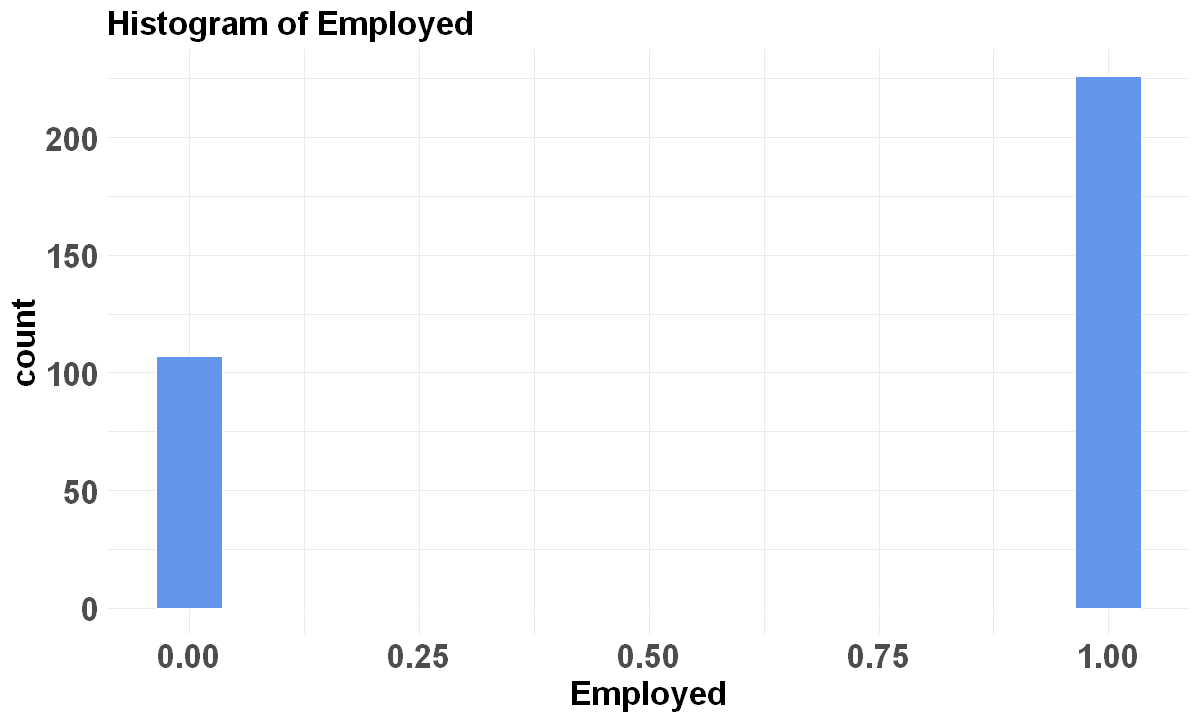

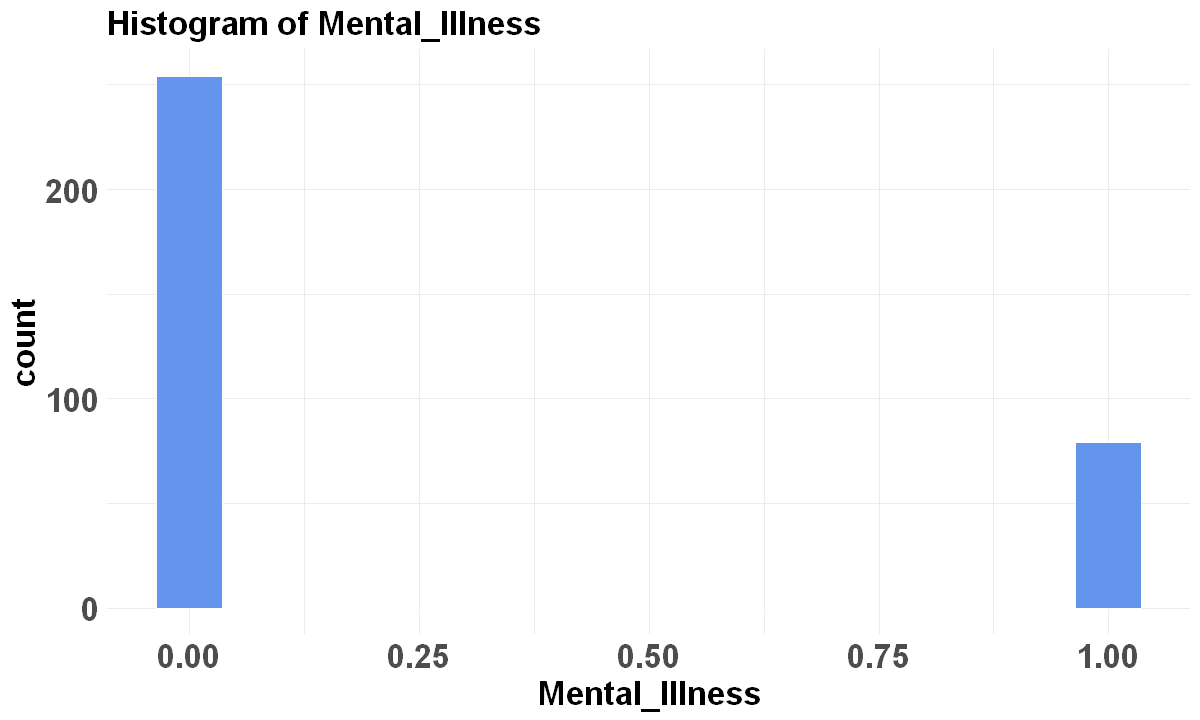

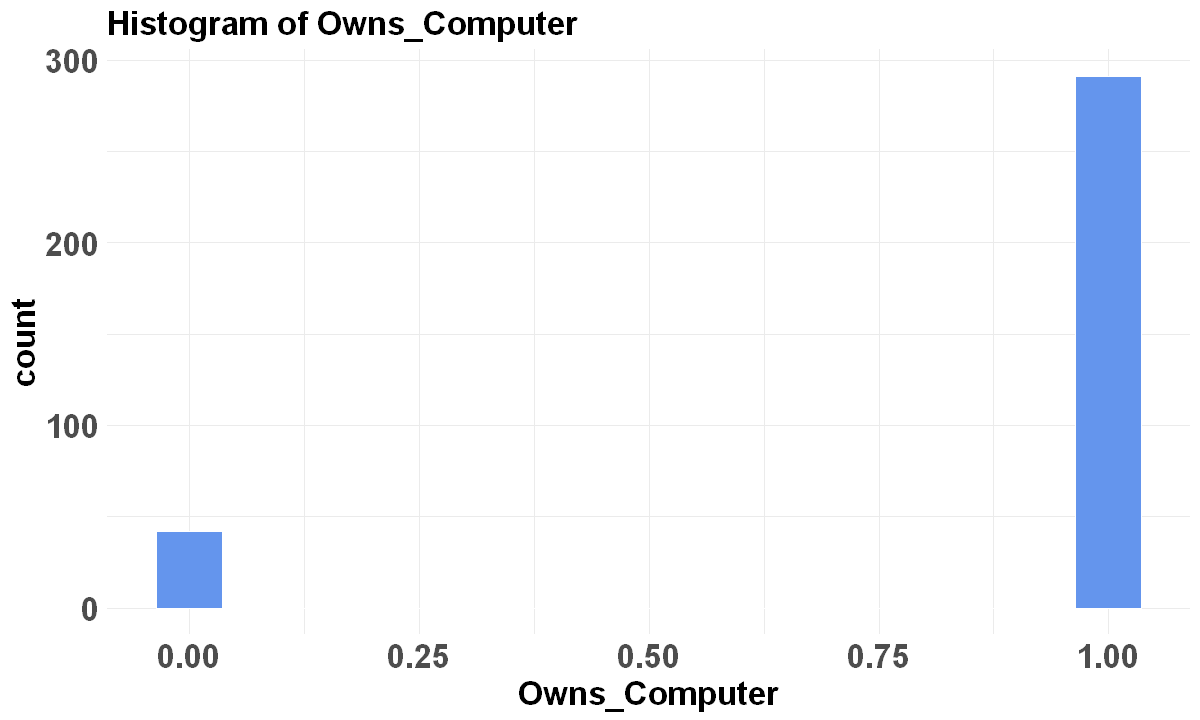

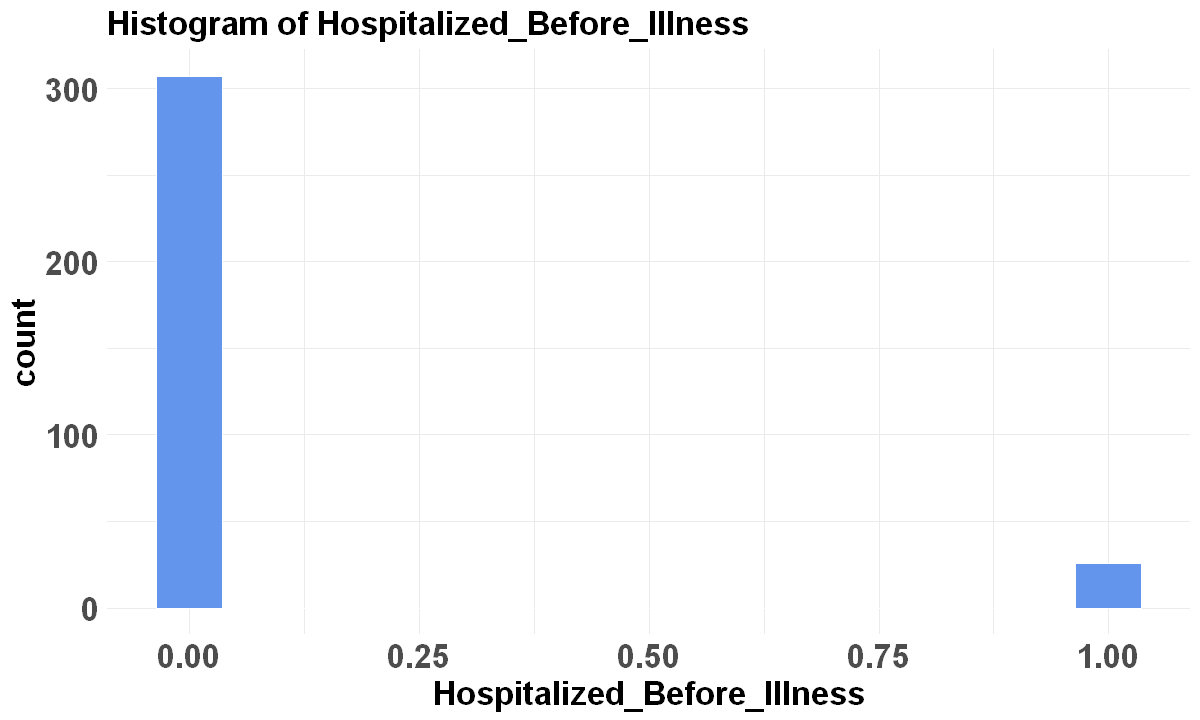

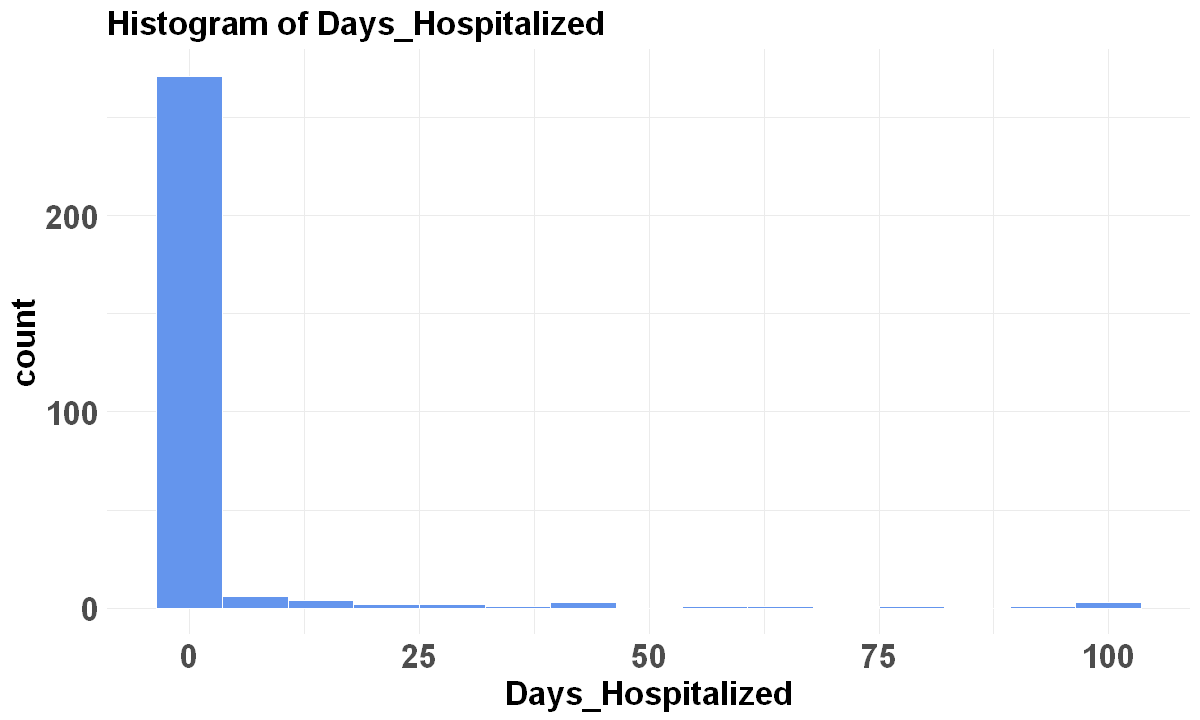

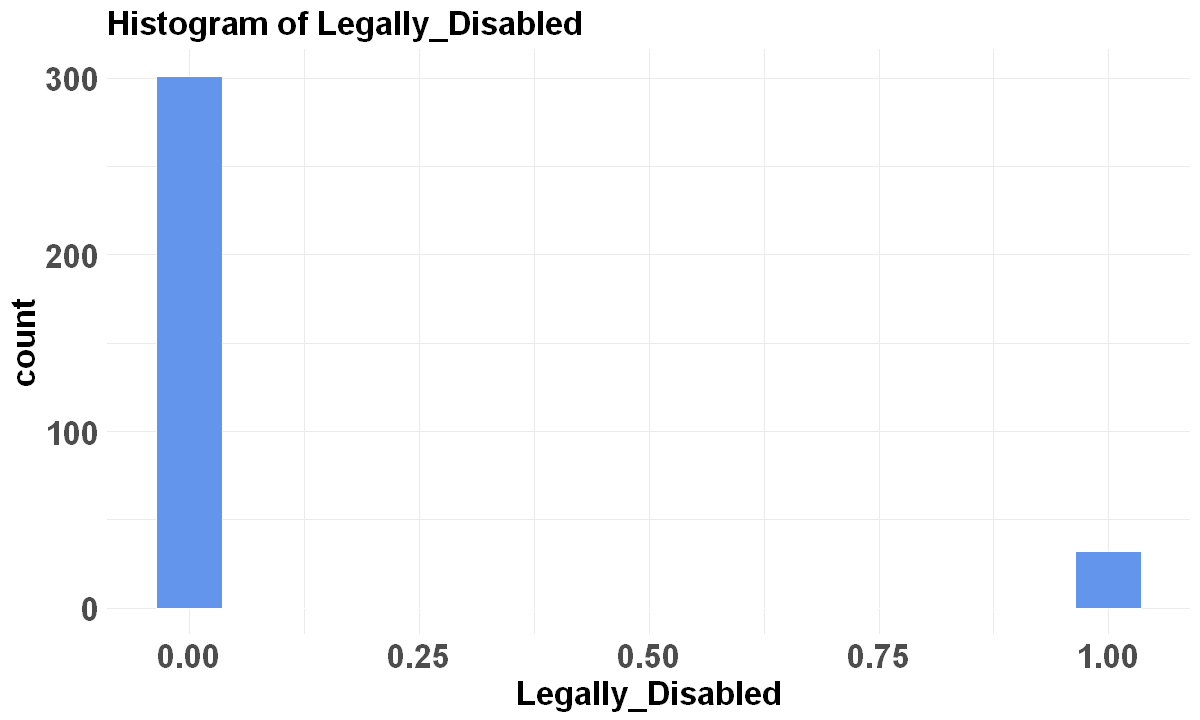

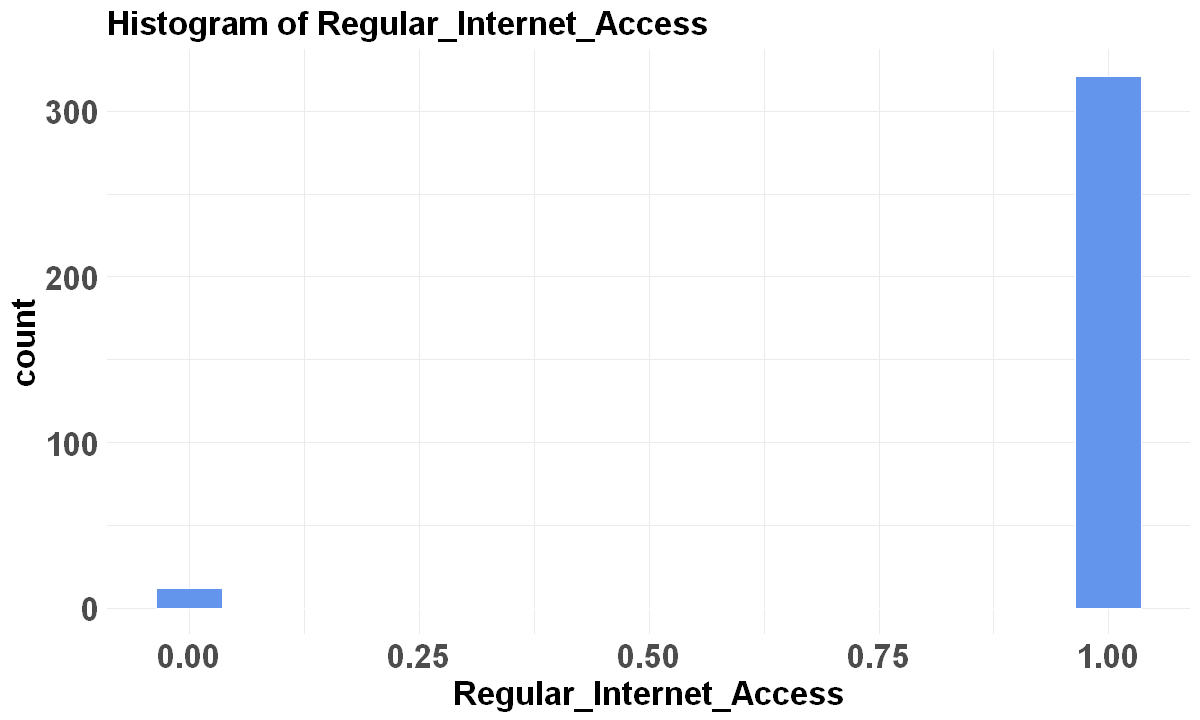

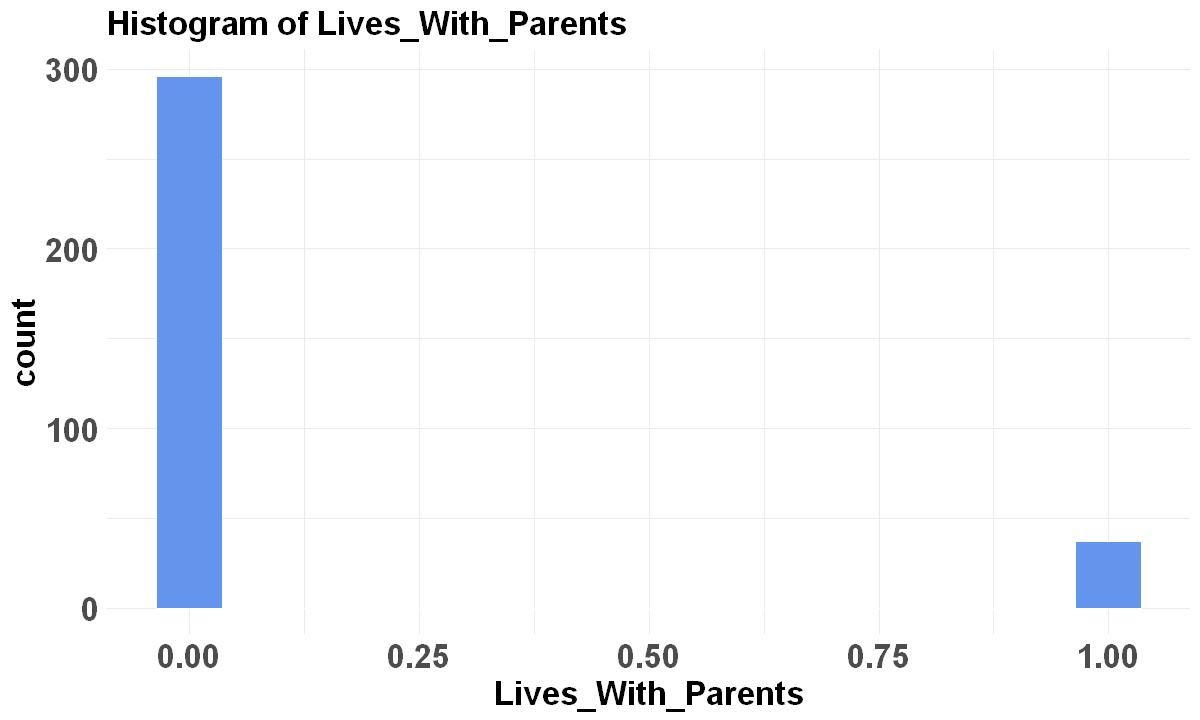

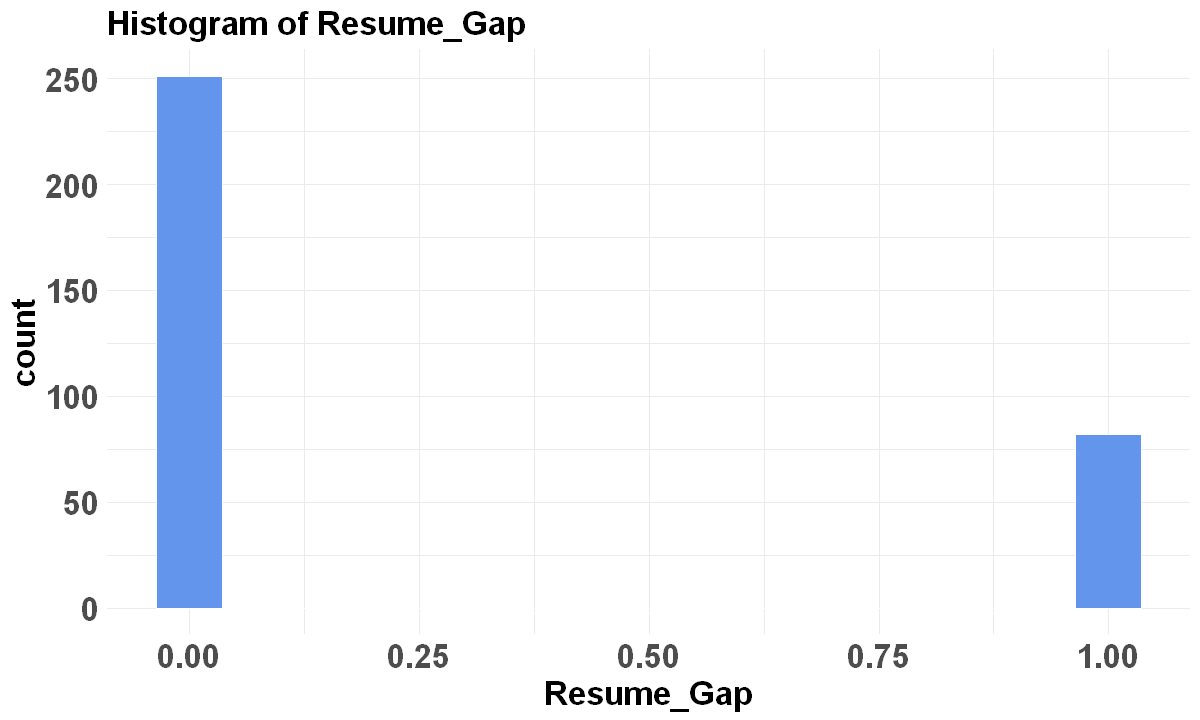

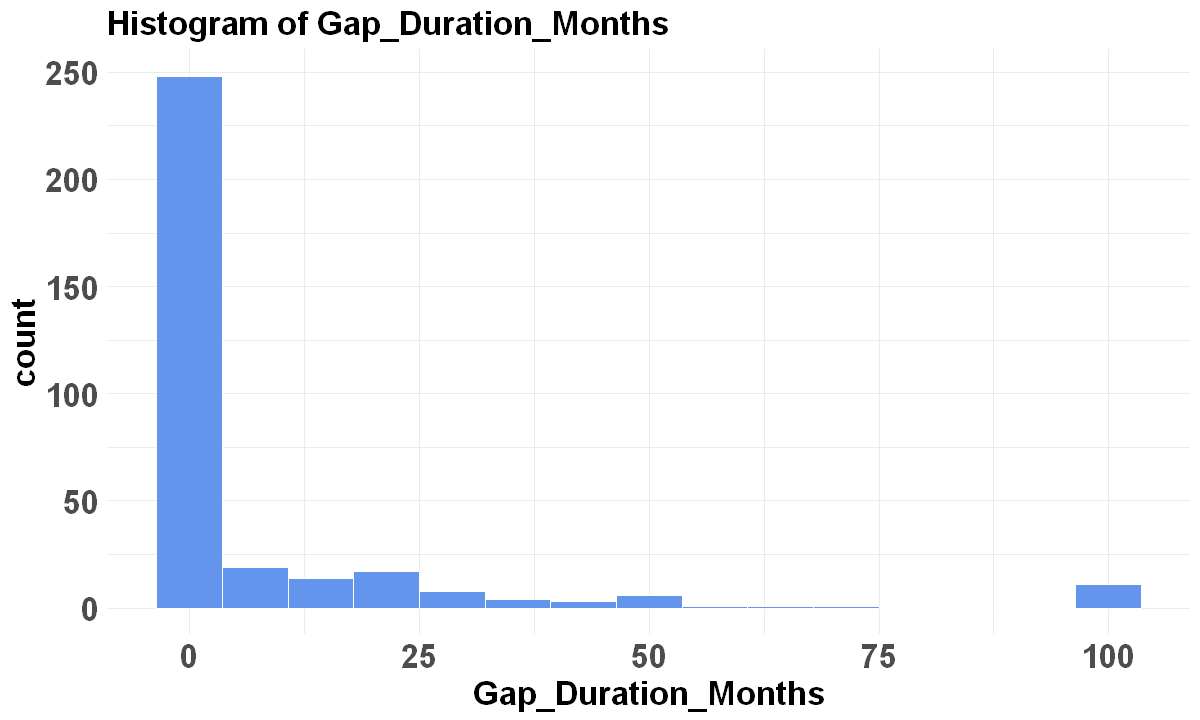

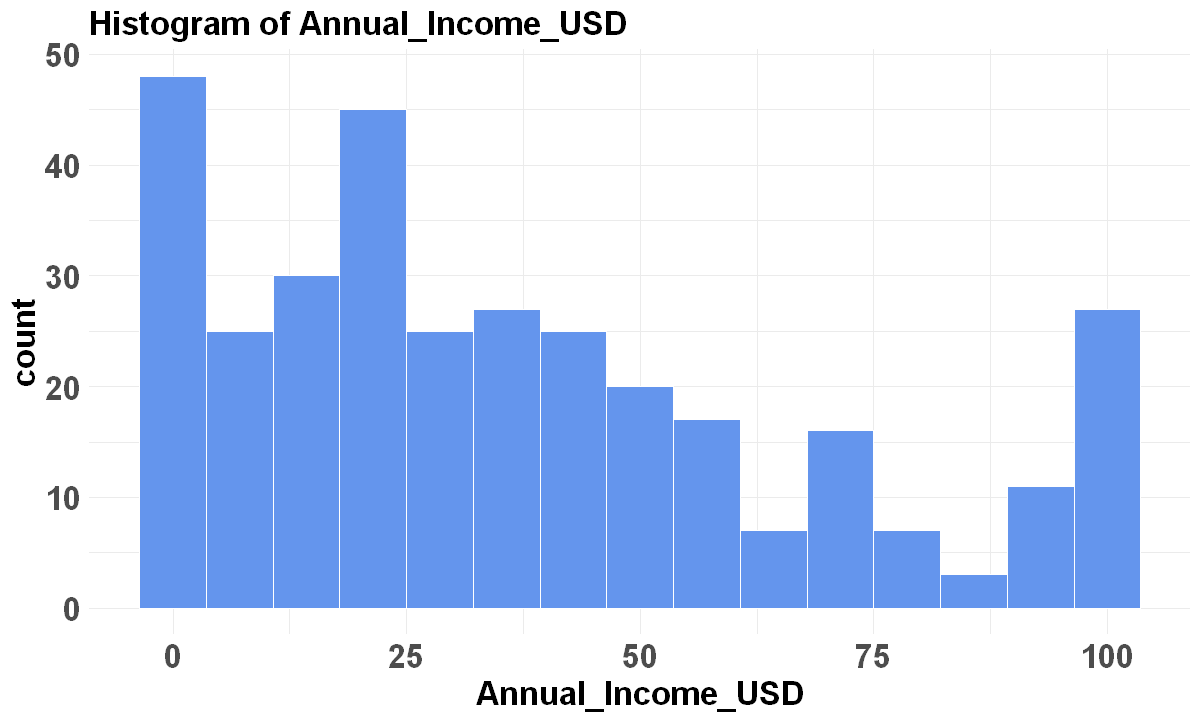

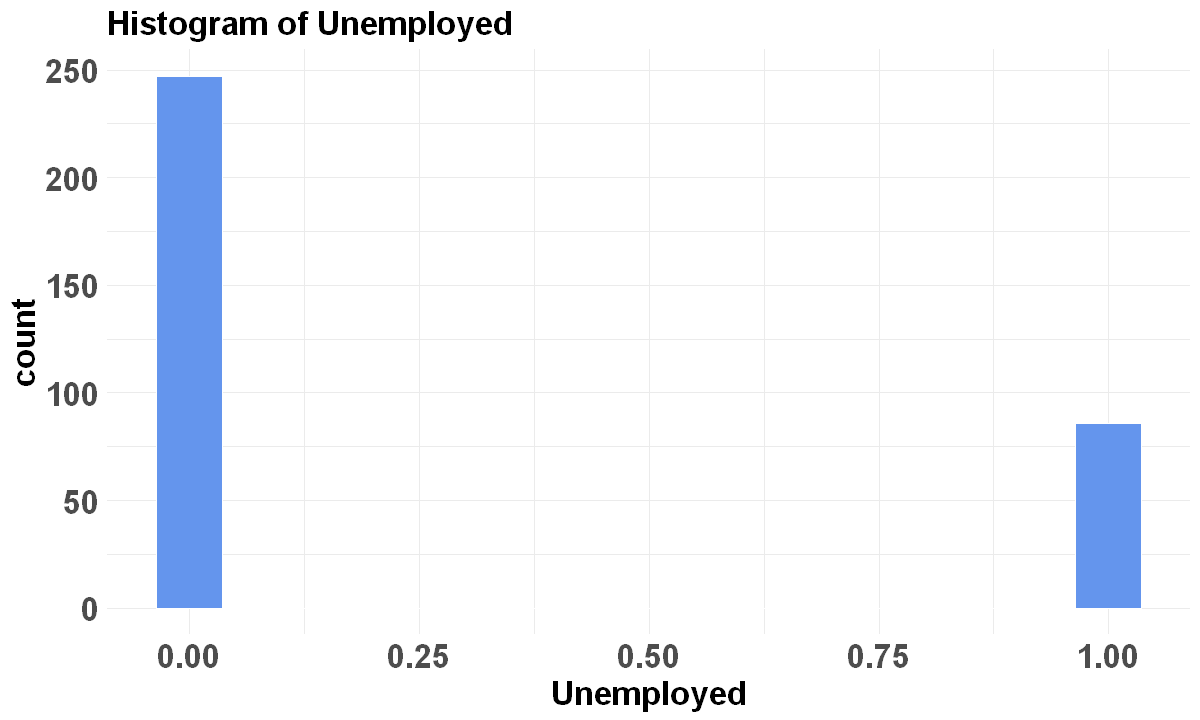

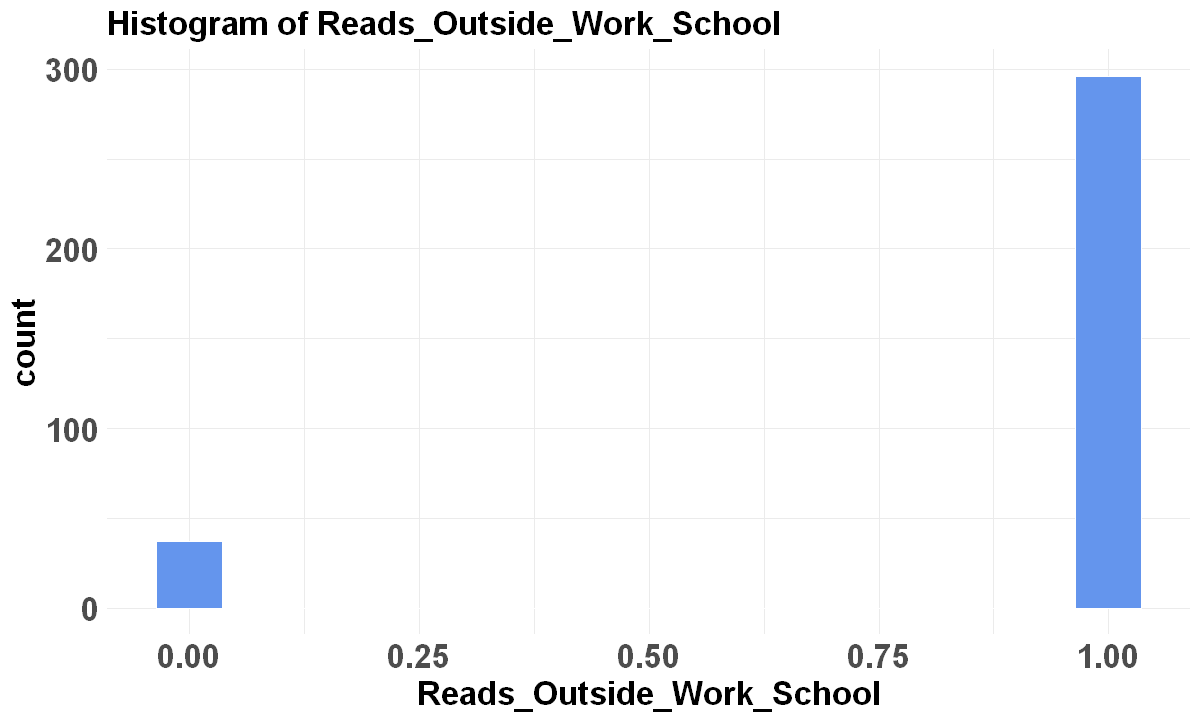

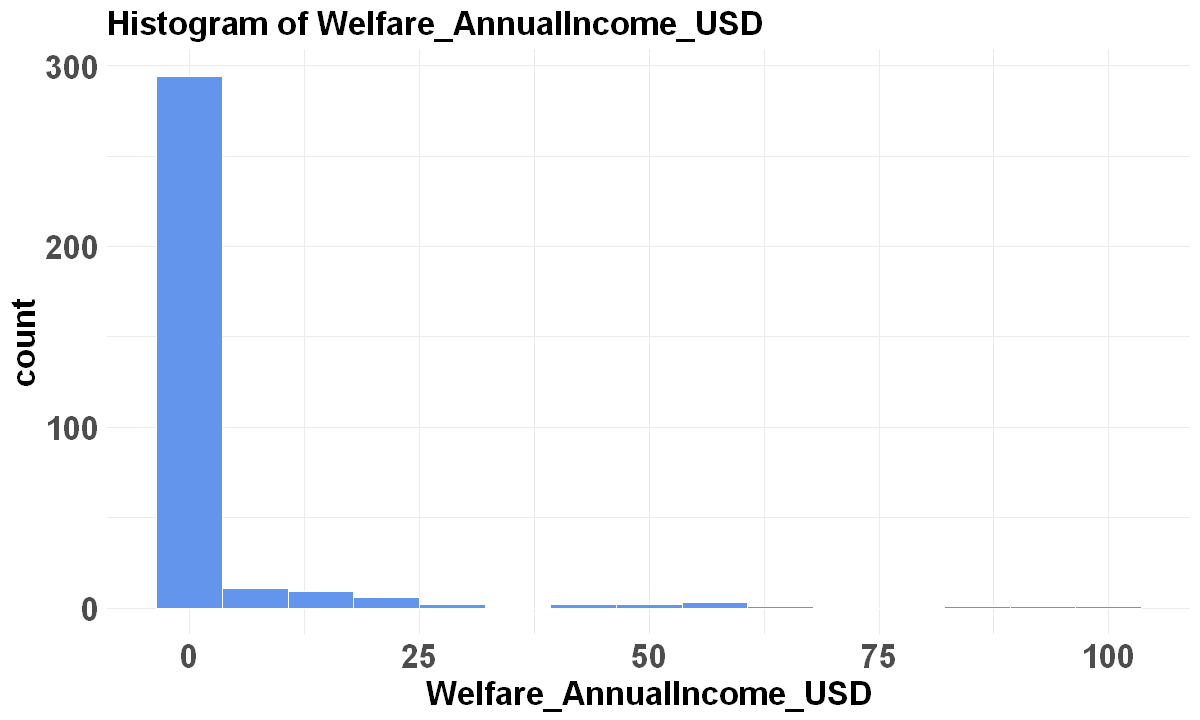

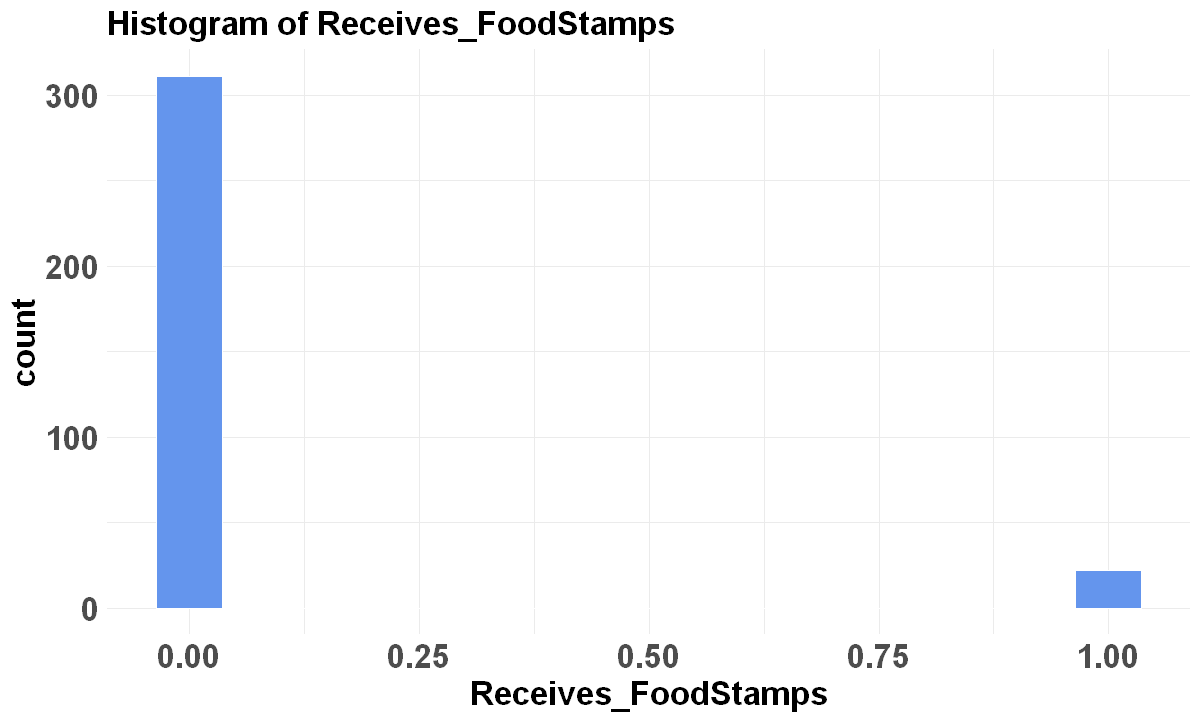

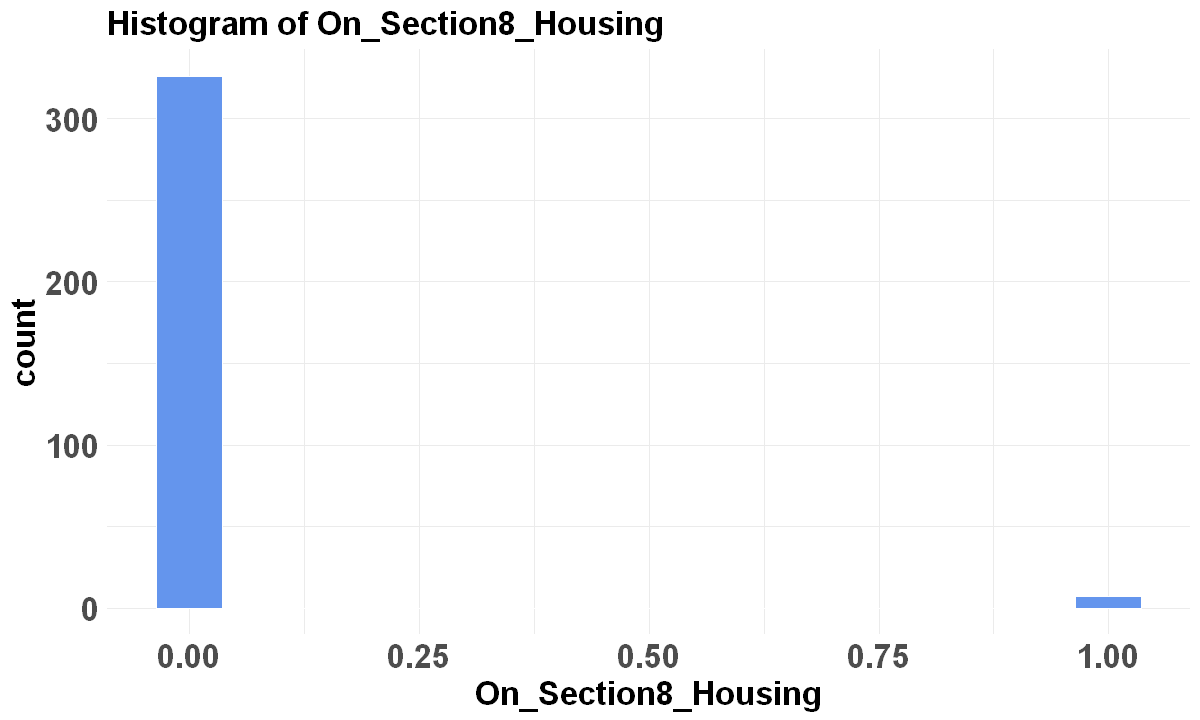

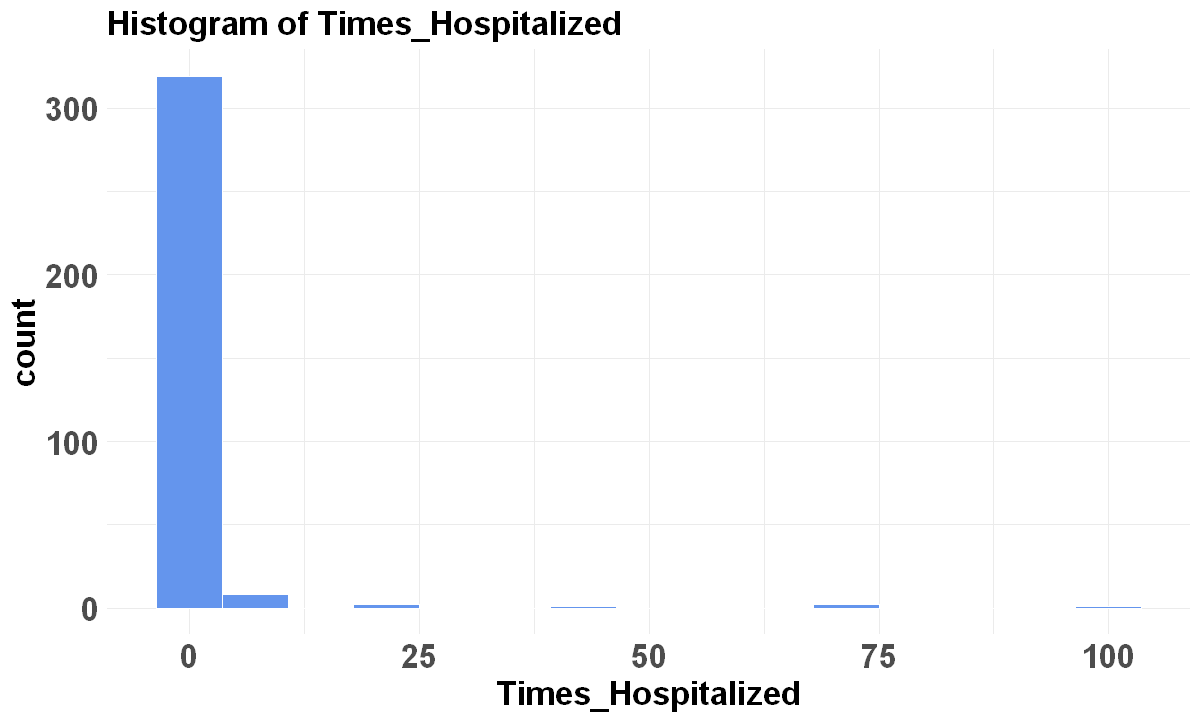

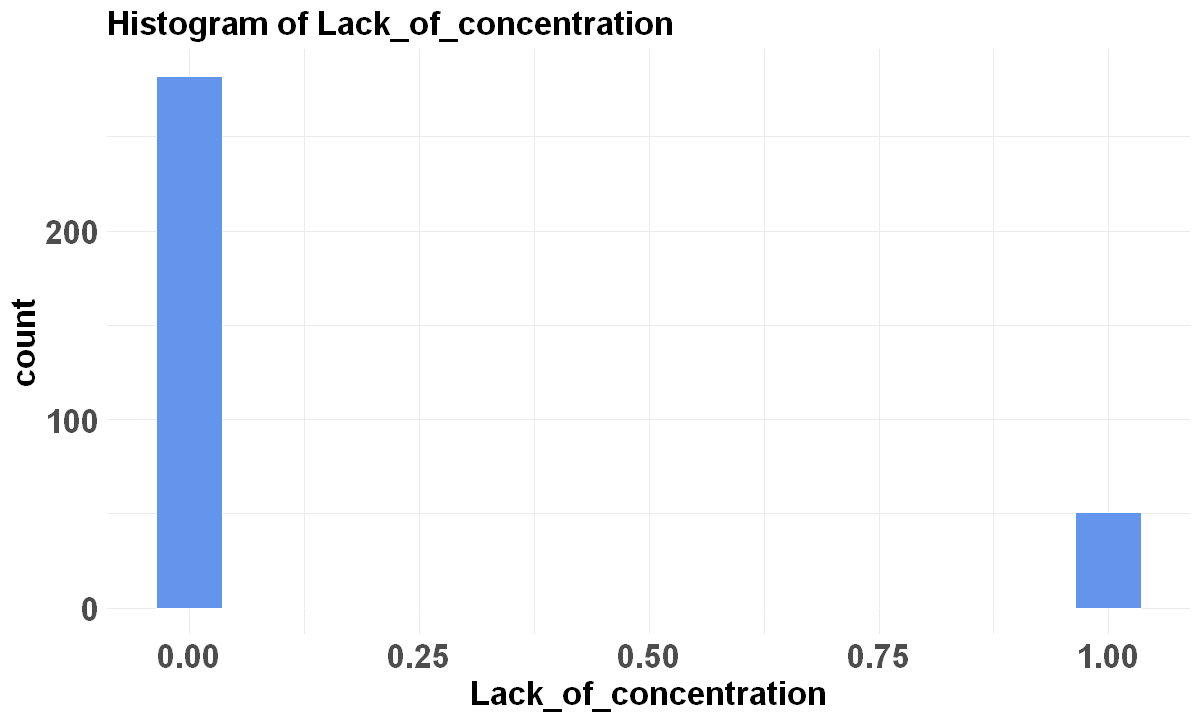

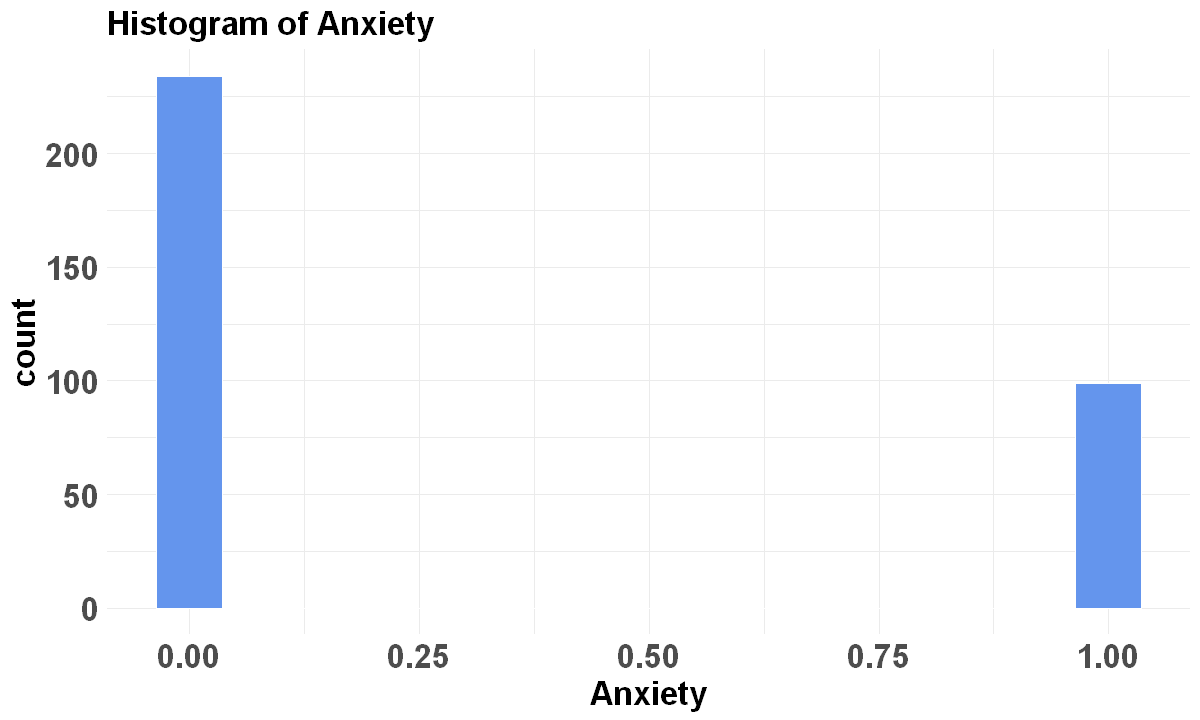

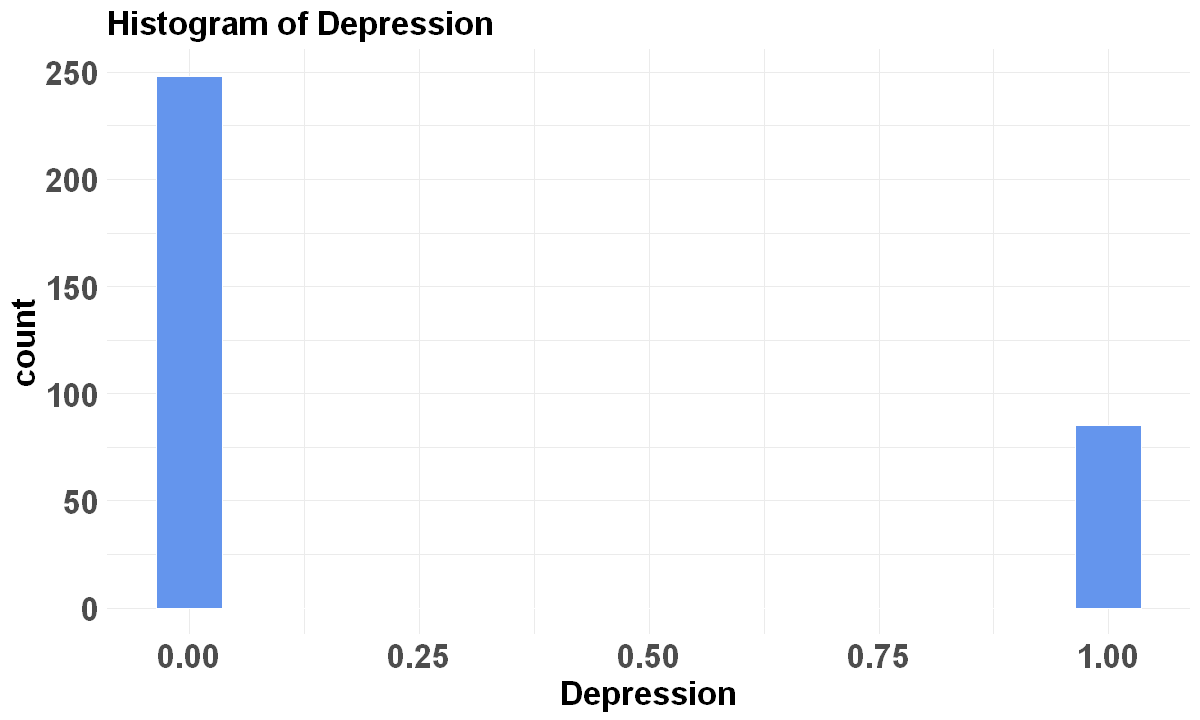

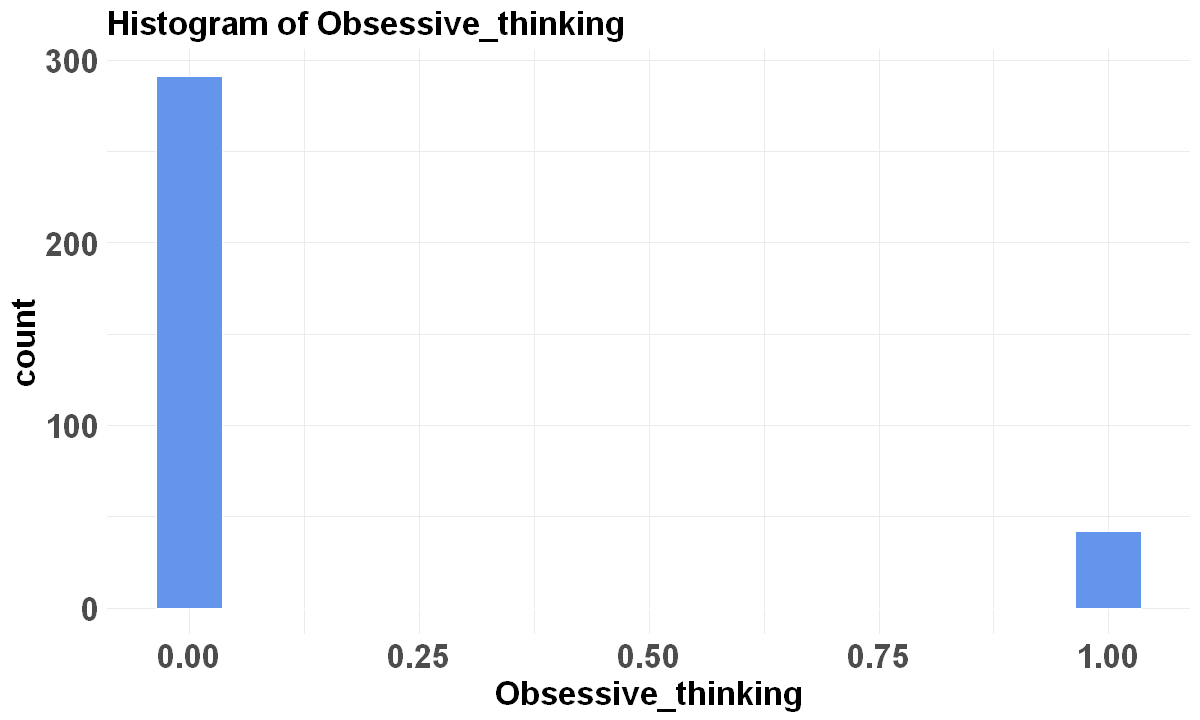

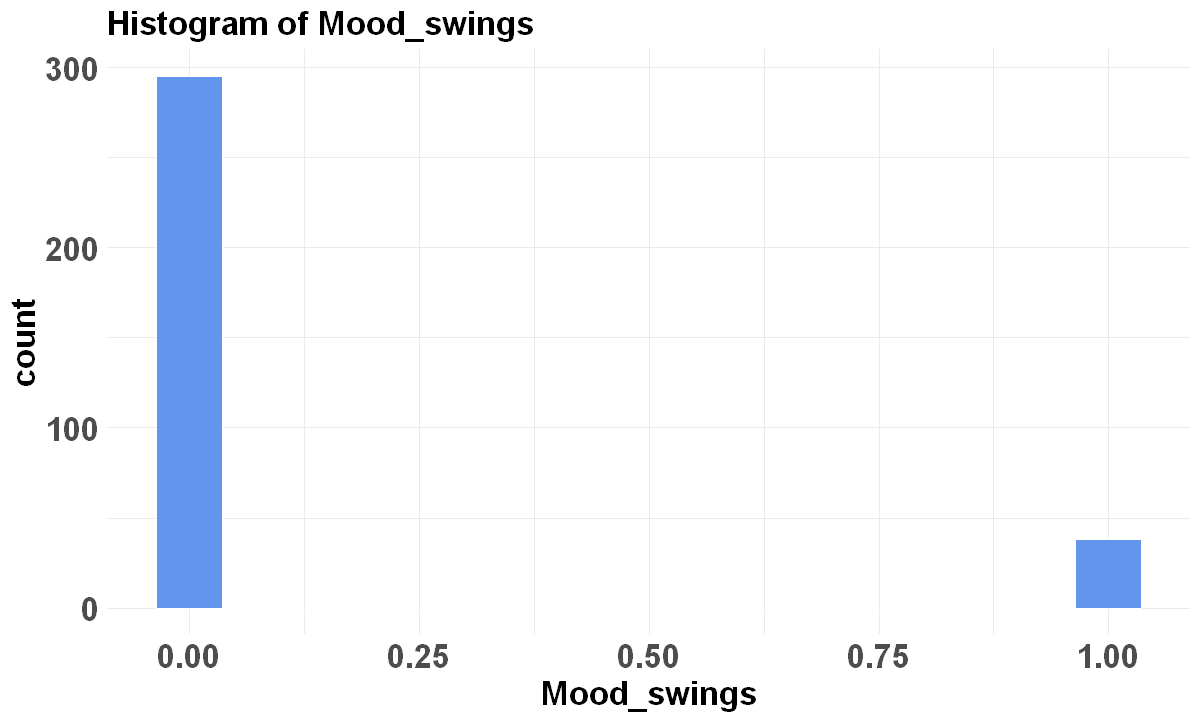

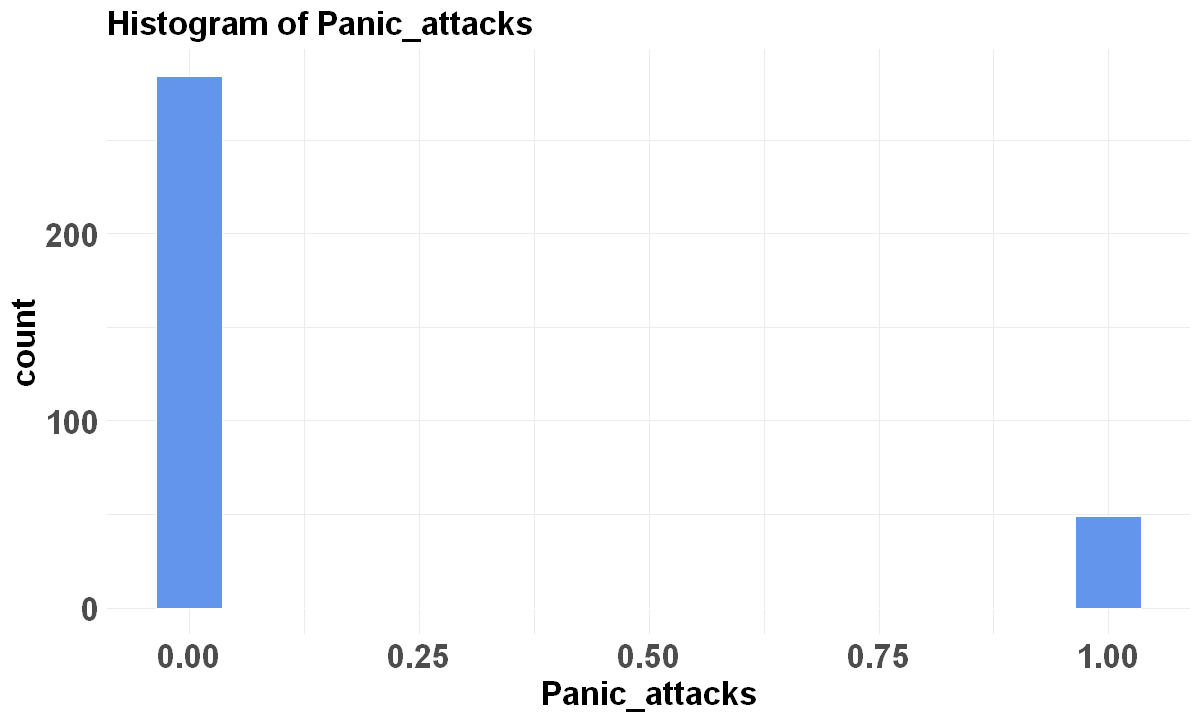

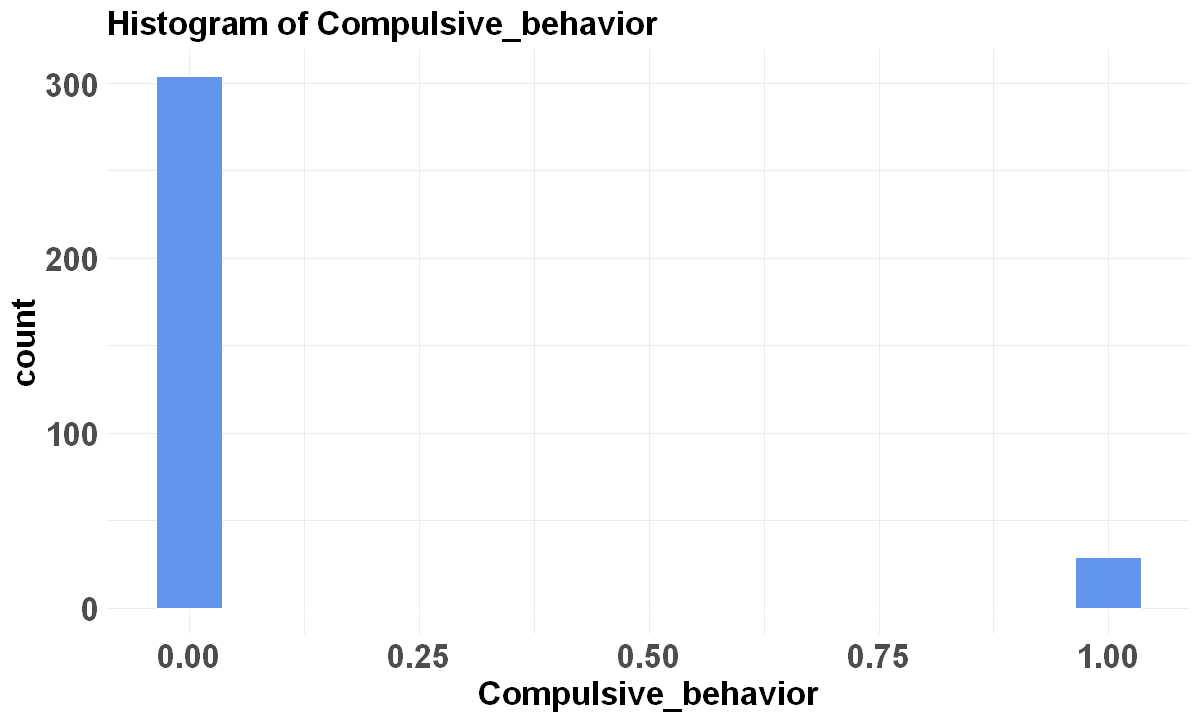

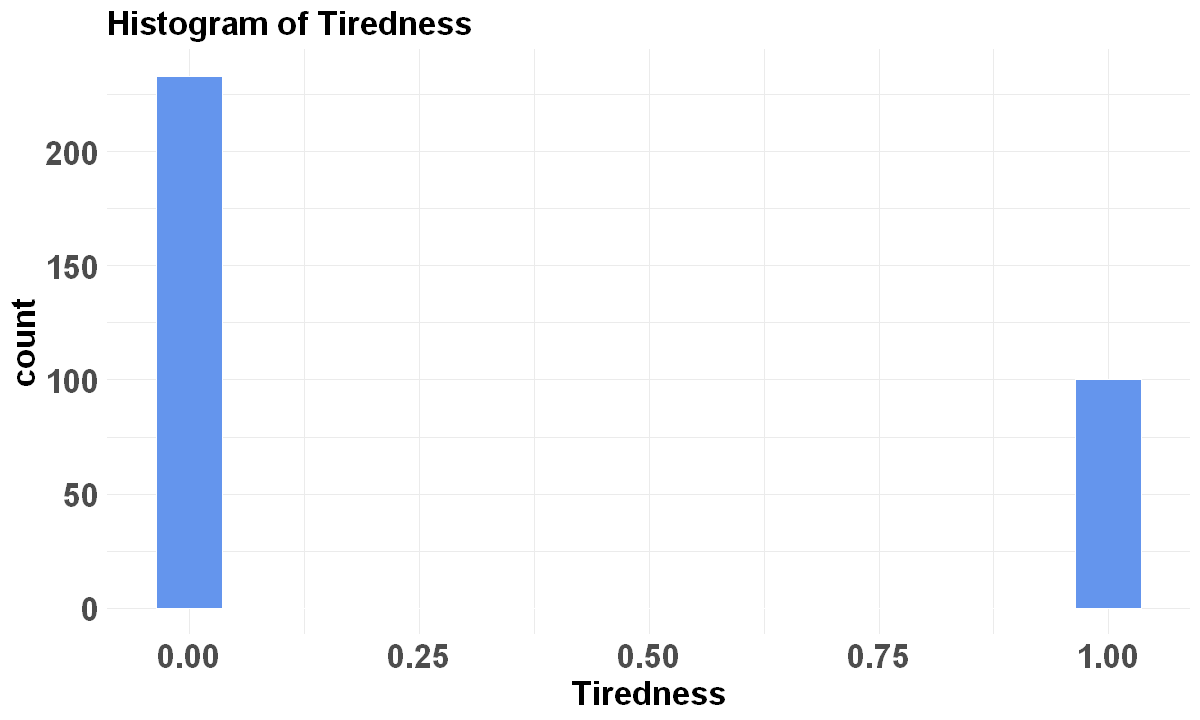

In [16]:
# Histograms for numerical variables

library(repr)                 # Used for representing data objects in different formats. 

# Adjust figure size's width and height
options(repr.plot.width = 10, repr.plot.height = 6)

num_cols <- names(df %>% select_if(is.numeric))

# Loop through each numerical column to create histograms

for (col in num_cols) {
    print(
        ggplot(df, aes_string(x = col)) + 
        geom_histogram(bins = 15,
                       fill = "cornflowerblue", 
                       col = "white",
                       na.rm = TRUE) + 
        ggtitle(paste("Histogram of", col)) +
        theme_minimal()+
        theme(
            plot.title = element_text(size = 20, face = "bold"),
            axis.title = element_text(size = 20, face = "bold"),
            axis.text = element_text(size = 20, face = "bold")
        )
    )
}

# 

- All histograms for the binary features confirm what was observed in the descriptive statistics. 

--------------------------------------------------------------------------------------------------------------------------------

- For other non-binary numerical features: The common pattern across all histograms is the right skewness, indicating that higher values in each category are less frequent.
#
- Gap_Duration_Months:

Skewness: The distribution is highly positively skewed, with a long tail to the right, indicating that most values are concentrated on the left with fewer large values confirming what was observed in the descriptive statistics that the majority of respondents have a gap duration of '0' months, suggesting they were continuously employed or had no significant breaks in their employment history.

Kurtosis: The peak is not particularly tall, but the long tail suggests that the kurtosis might be high, indicating a leptokurtic distribution as the presence of outliers is stretching the tail.

--------------------------------------------------------------------------------------------------------------------------------

- Annual_Income_USD:

Skewness: The distribution appears to be multimodal and does not have a clear direction of skewness. However, the presence of a tail on the right suggests a slight positive skew.

Kurtosis: The distribution shows multiple peaks, which may suggest a platykurtic distribution indicating flatter peaks compared to a normal distribution.

--------------------------------------------------------------------------------------------------------------------------------

- Welfare_AnnualIncome_USD:

Skewness: This distribution is highly positively skewed, similar to the gap duration, with most respondents receiving '0' and a tail stretching to the right.

Kurtosis: The distribution is likely leptokurtic, as there is a sharp peak at '0' with a long right tail indicating the presence of outliers.

--------------------------------------------------------------------------------------------------------------------------------

- Times_Hospitalized & Days_Hospitalized:

Skewness: The distribution is positively skewed, with a concentration of values at '0' and a few extending to the right.

Kurtosis: The distribution appears leptokurtic, with a tall peak at '0' and thin tails, suggesting infrequent occurrences of high values.

## Further Analysis on Distribution:

## Skewness and kurtosis are fundamental statistical descriptions of the shape of data distributions.

Why does skewness and kurtosis matter? The appropriateness and interpretability of most descriptive statistics depends on the shape of the distribution.

In [17]:
# For each of non-binary numerical features:

# Calculating Kurtosis

# Acceptable values range from -10 to 10
# Large negative values indicate platykurtic (too flat), large positive values indicate leptokurtic (too pointy).

library(psych)           # Basic data analysis and psychometric analysis.
options(warn=-1)

kurtosi(df$Days_Hospitalized)
kurtosi(df$Times_Hospitalized)
kurtosi(df$Gap_Duration_Months)
kurtosi(df$Annual_Income_USD)
kurtosi(df$Welfare_AnnualIncome_USD)


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




[1] 29.33354

[1] 93.94521

[1] 10.36364

[1] -0.580331

[1] 27.68142

# 

Kurtosis Interpretation:

- Days_Hospitalized: Kurtosis = 29.448358436889

This value is significantly higher than the acceptable range of -10 to 10, indicating a leptokurtic distribution. It has a sharper peak and fatter tails, meaning there are more outliers than a normal distribution would exhibit.

--------------------------------------------------------------------------------------------------------------------------------

- Times_Hospitalized: Kurtosis = 94.2419709211332

This extremely high value suggests a very sharp peak with very fat tails, indicating a significant number of outliers.

--------------------------------------------------------------------------------------------------------------------------------

- Gap_Duration_Months: Kurtosis = 10.4063719032585

This value is in the acceptable range, suggesting the distribution is leaning towards leptokurtic, with a higher peak and potentially more outliers than a normal distribution.

--------------------------------------------------------------------------------------------------------------------------------

- Annual_Income_USD: Kurtosis = -0.571975224190366

This value is within the acceptable range, indicating a platykurtic distribution. It has a flatter peak and thinner tails, meaning fewer outliers than a normal distribution.

--------------------------------------------------------------------------------------------------------------------------------

- Welfare_AnnualIncome_USD: Kurtosis = 27.7770386014188

This value is well above the acceptable range, indicating a highly leptokurtic distribution with many outliers.


In [18]:
# Calcualting Skewness 

# Acceptable values range from -3 to 3
# Large negative values indicate negative skew, large positive values indicate positive skew.

skew(df$Days_Hospitalized)
skew(df$Times_Hospitalized)
skew(df$Gap_Duration_Months)
skew(df$Annual_Income_USD)
skew(df$Welfare_AnnualIncome_USD)

[1] 5.308272

[1] 9.360523

[1] 3.212519

[1] 0.6890662

[1] 5.011442

# 

- Skewness Interpretation:

- Days_Hospitalized: Skewness = 5.31816796306971

This is well above the acceptable range of -3 to 3, indicating a highly positive skewed distribution. There are more values on the lower end, with some extreme higher values.

--------------------------------------------------------------------------------------------------------------------------------

- Times_Hospitalized: Skewness = 9.3758095661372

This value is extremely high, indicating a very strong positive skew. This means the majority of the data are clustered around the lower end, with very few cases having high values.

--------------------------------------------------------------------------------------------------------------------------------

- Gap_Duration_Months: Skewness = 3.21843174848863

This value is slightly above the acceptable range, indicating a moderately positive skewed distribution, suggesting a concentration of lower values with some higher outliers.

--------------------------------------------------------------------------------------------------------------------------------

- Annual_Income_USD: Skewness = 0.69303685376104

This value falls within the acceptable range, indicating a distribution that is slightly positively skewed.

--------------------------------------------------------------------------------------------------------------------------------

- Welfare_AnnualIncome_USD: Skewness = 5.01975752844773

This value is substantially higher than 3, indicating a highly positively skewed distribution with a concentration of low values and rare high values.


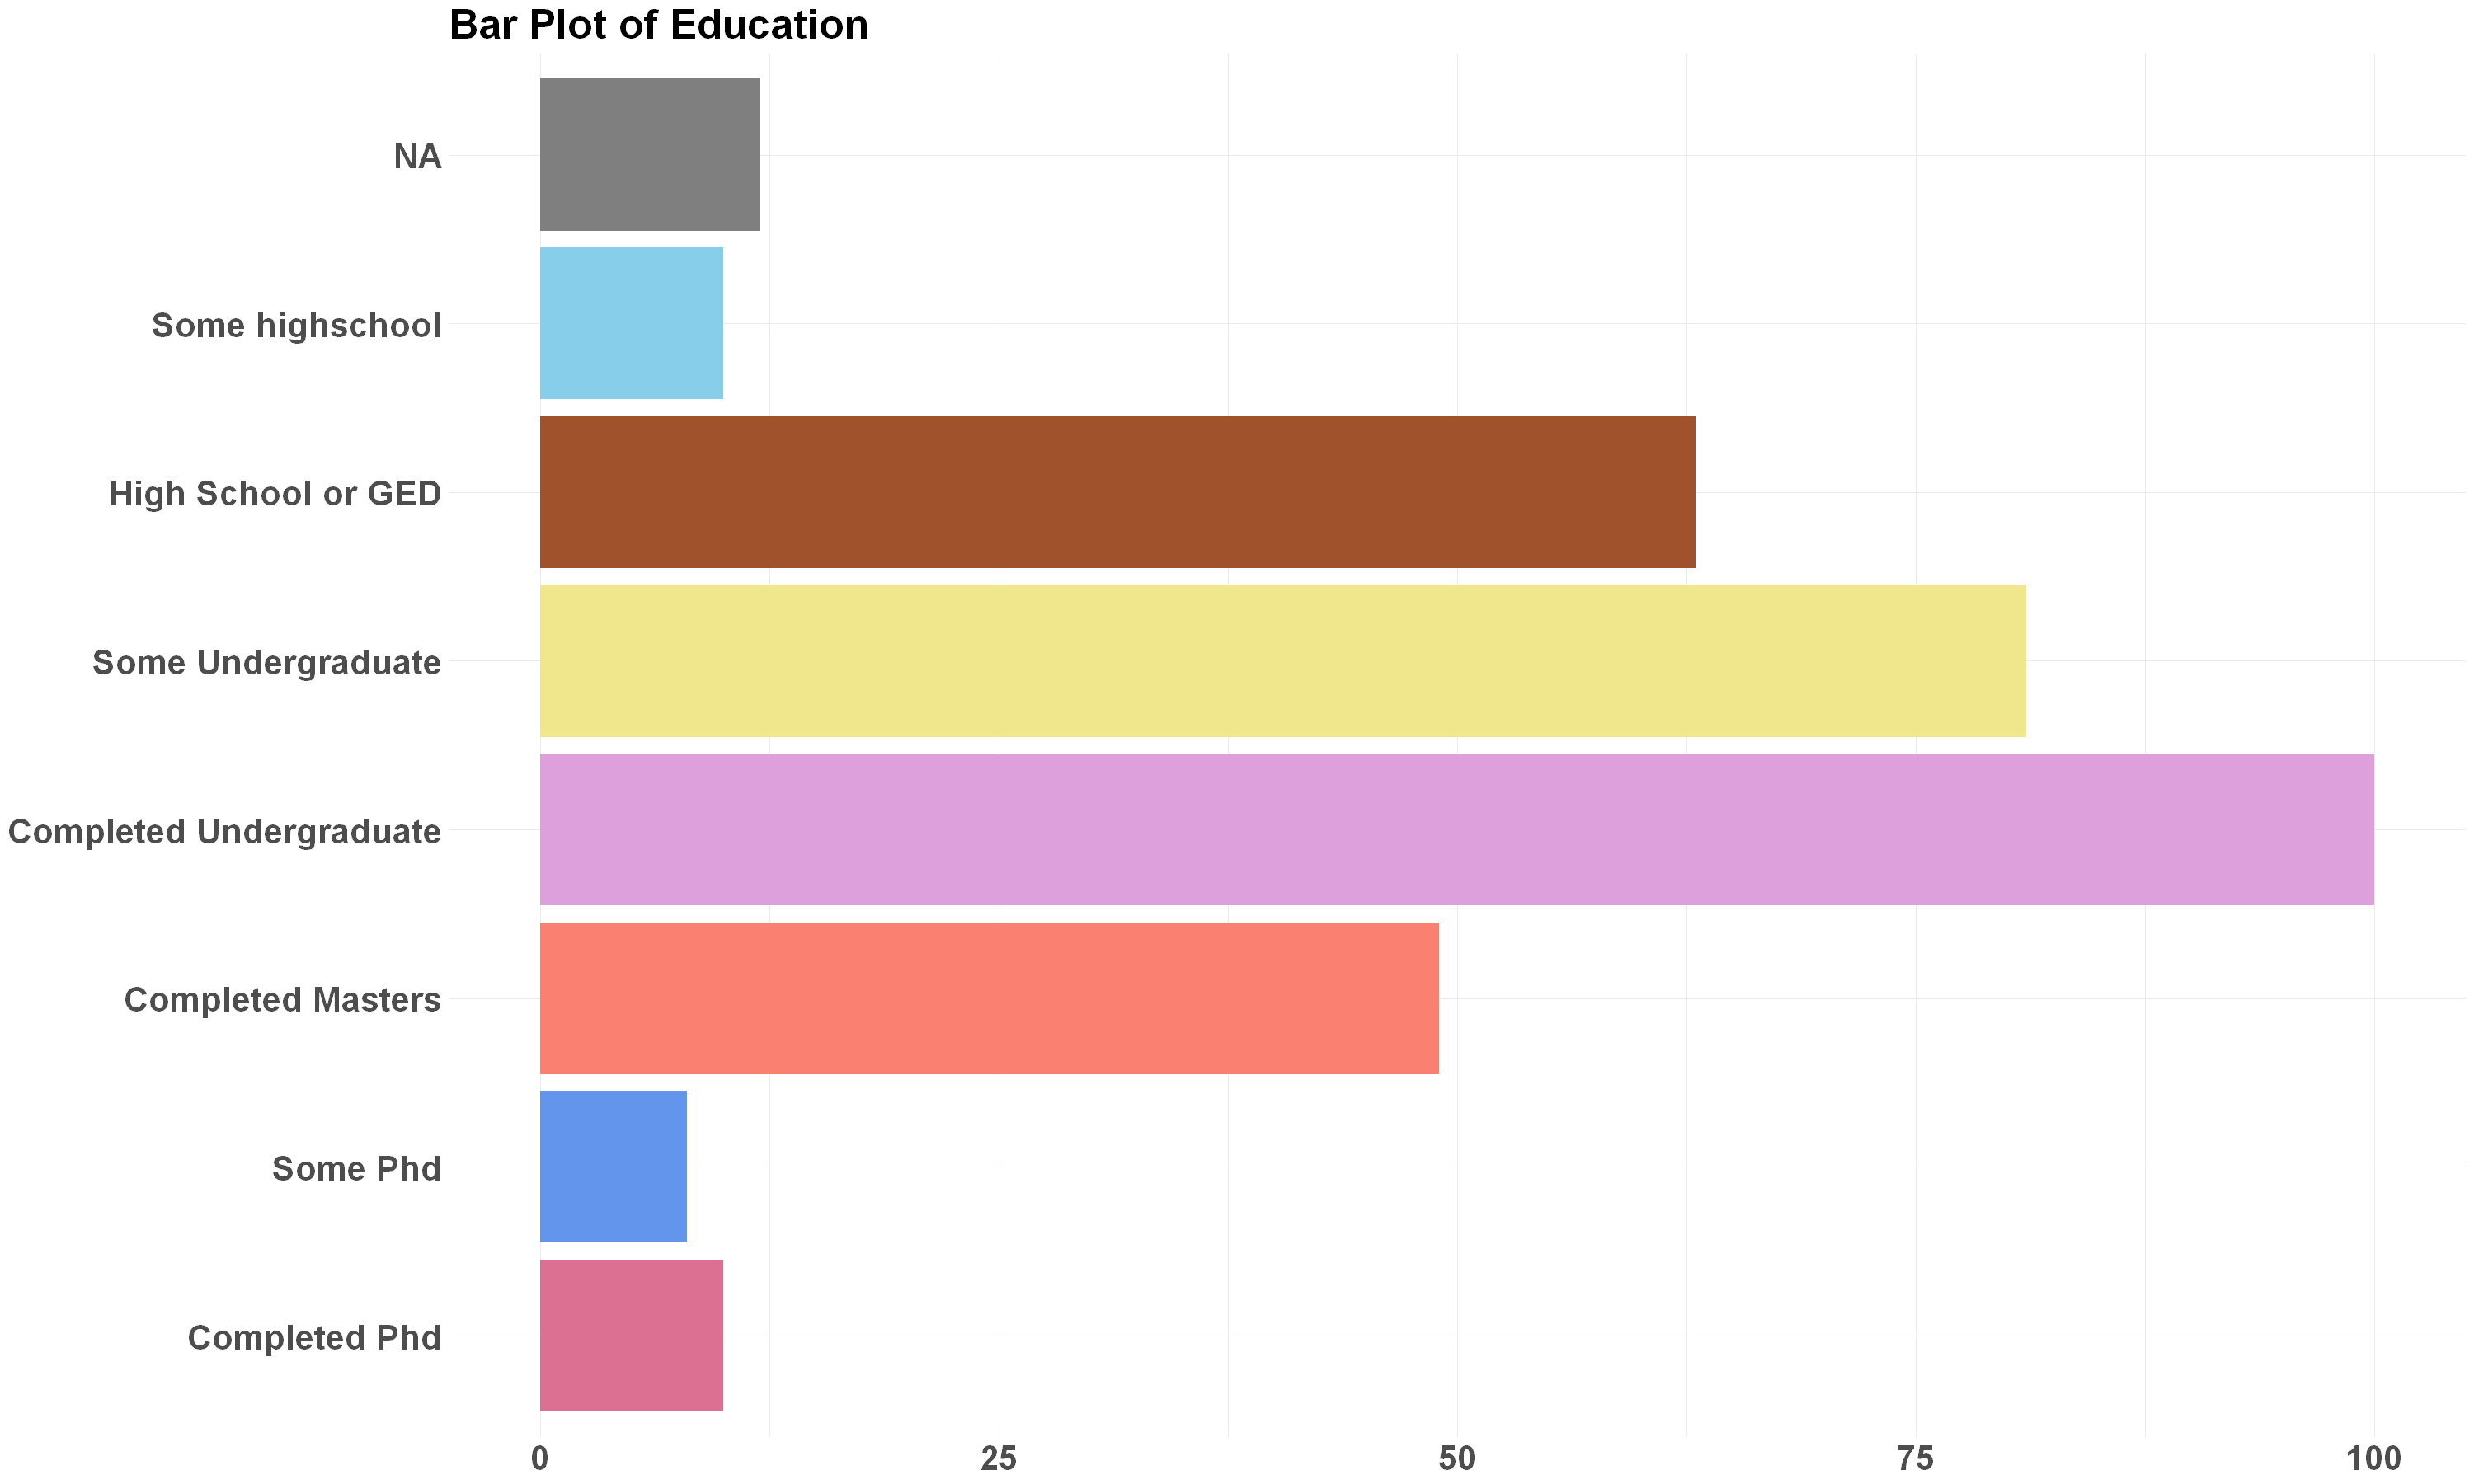

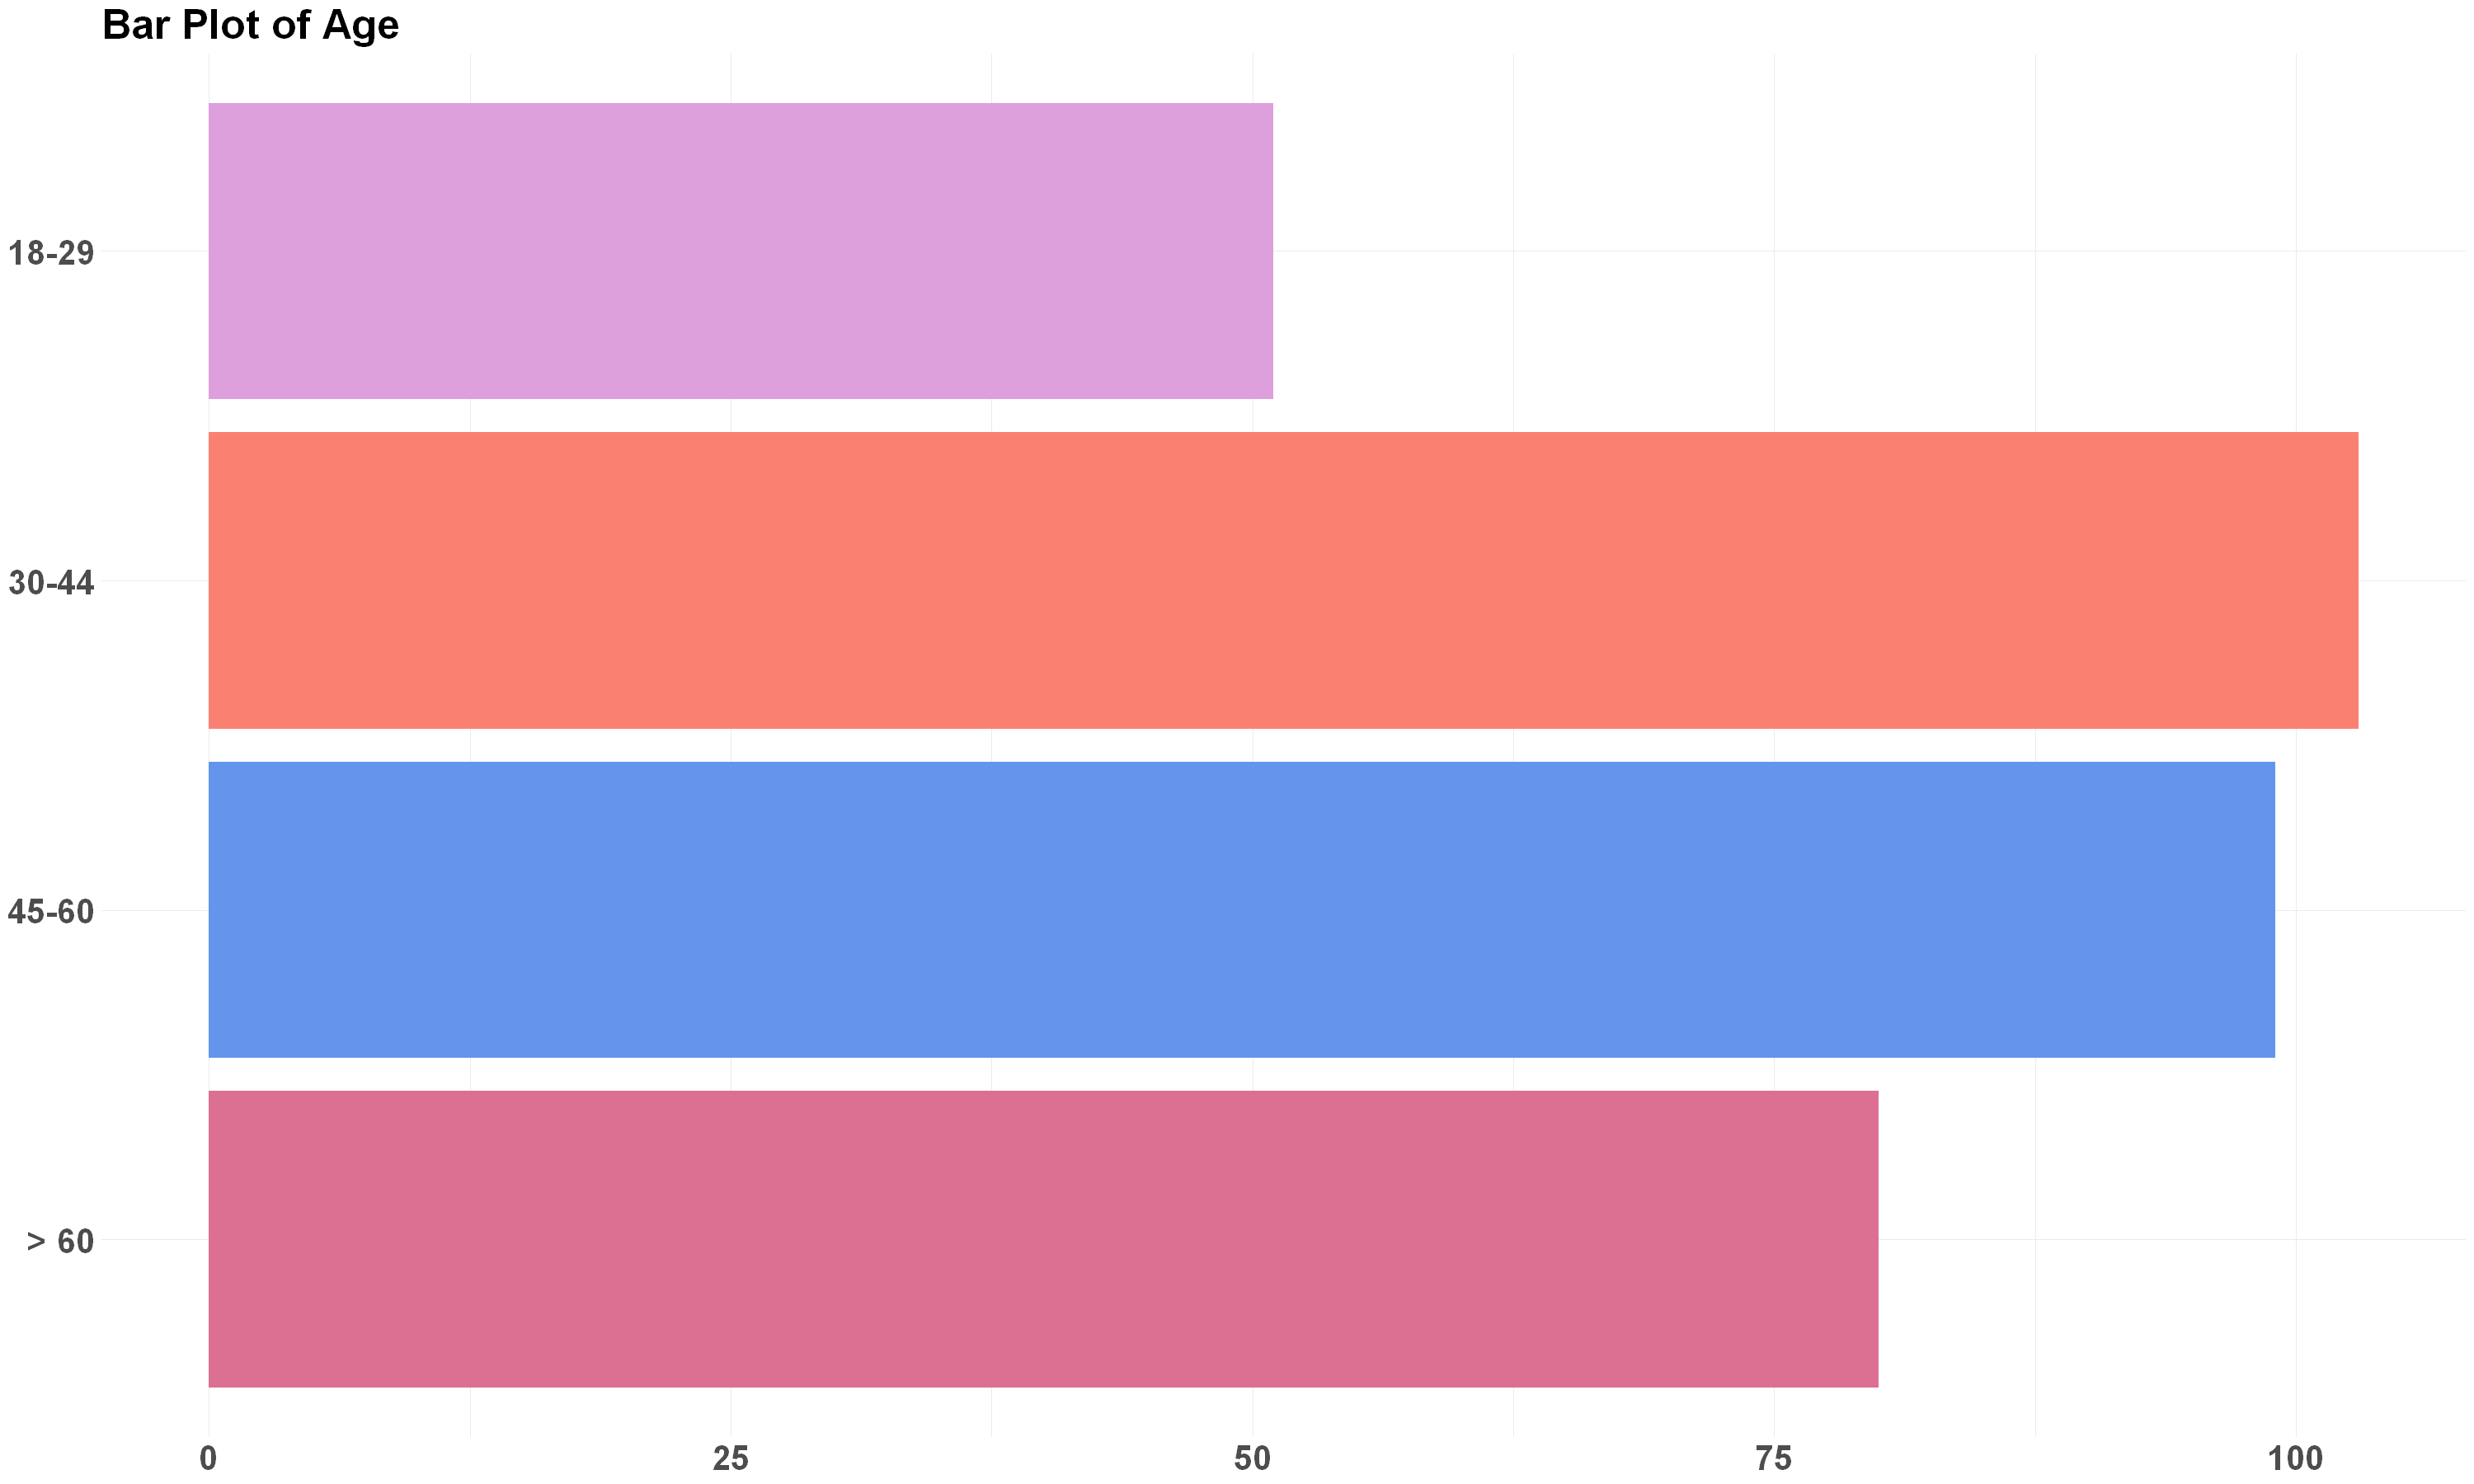

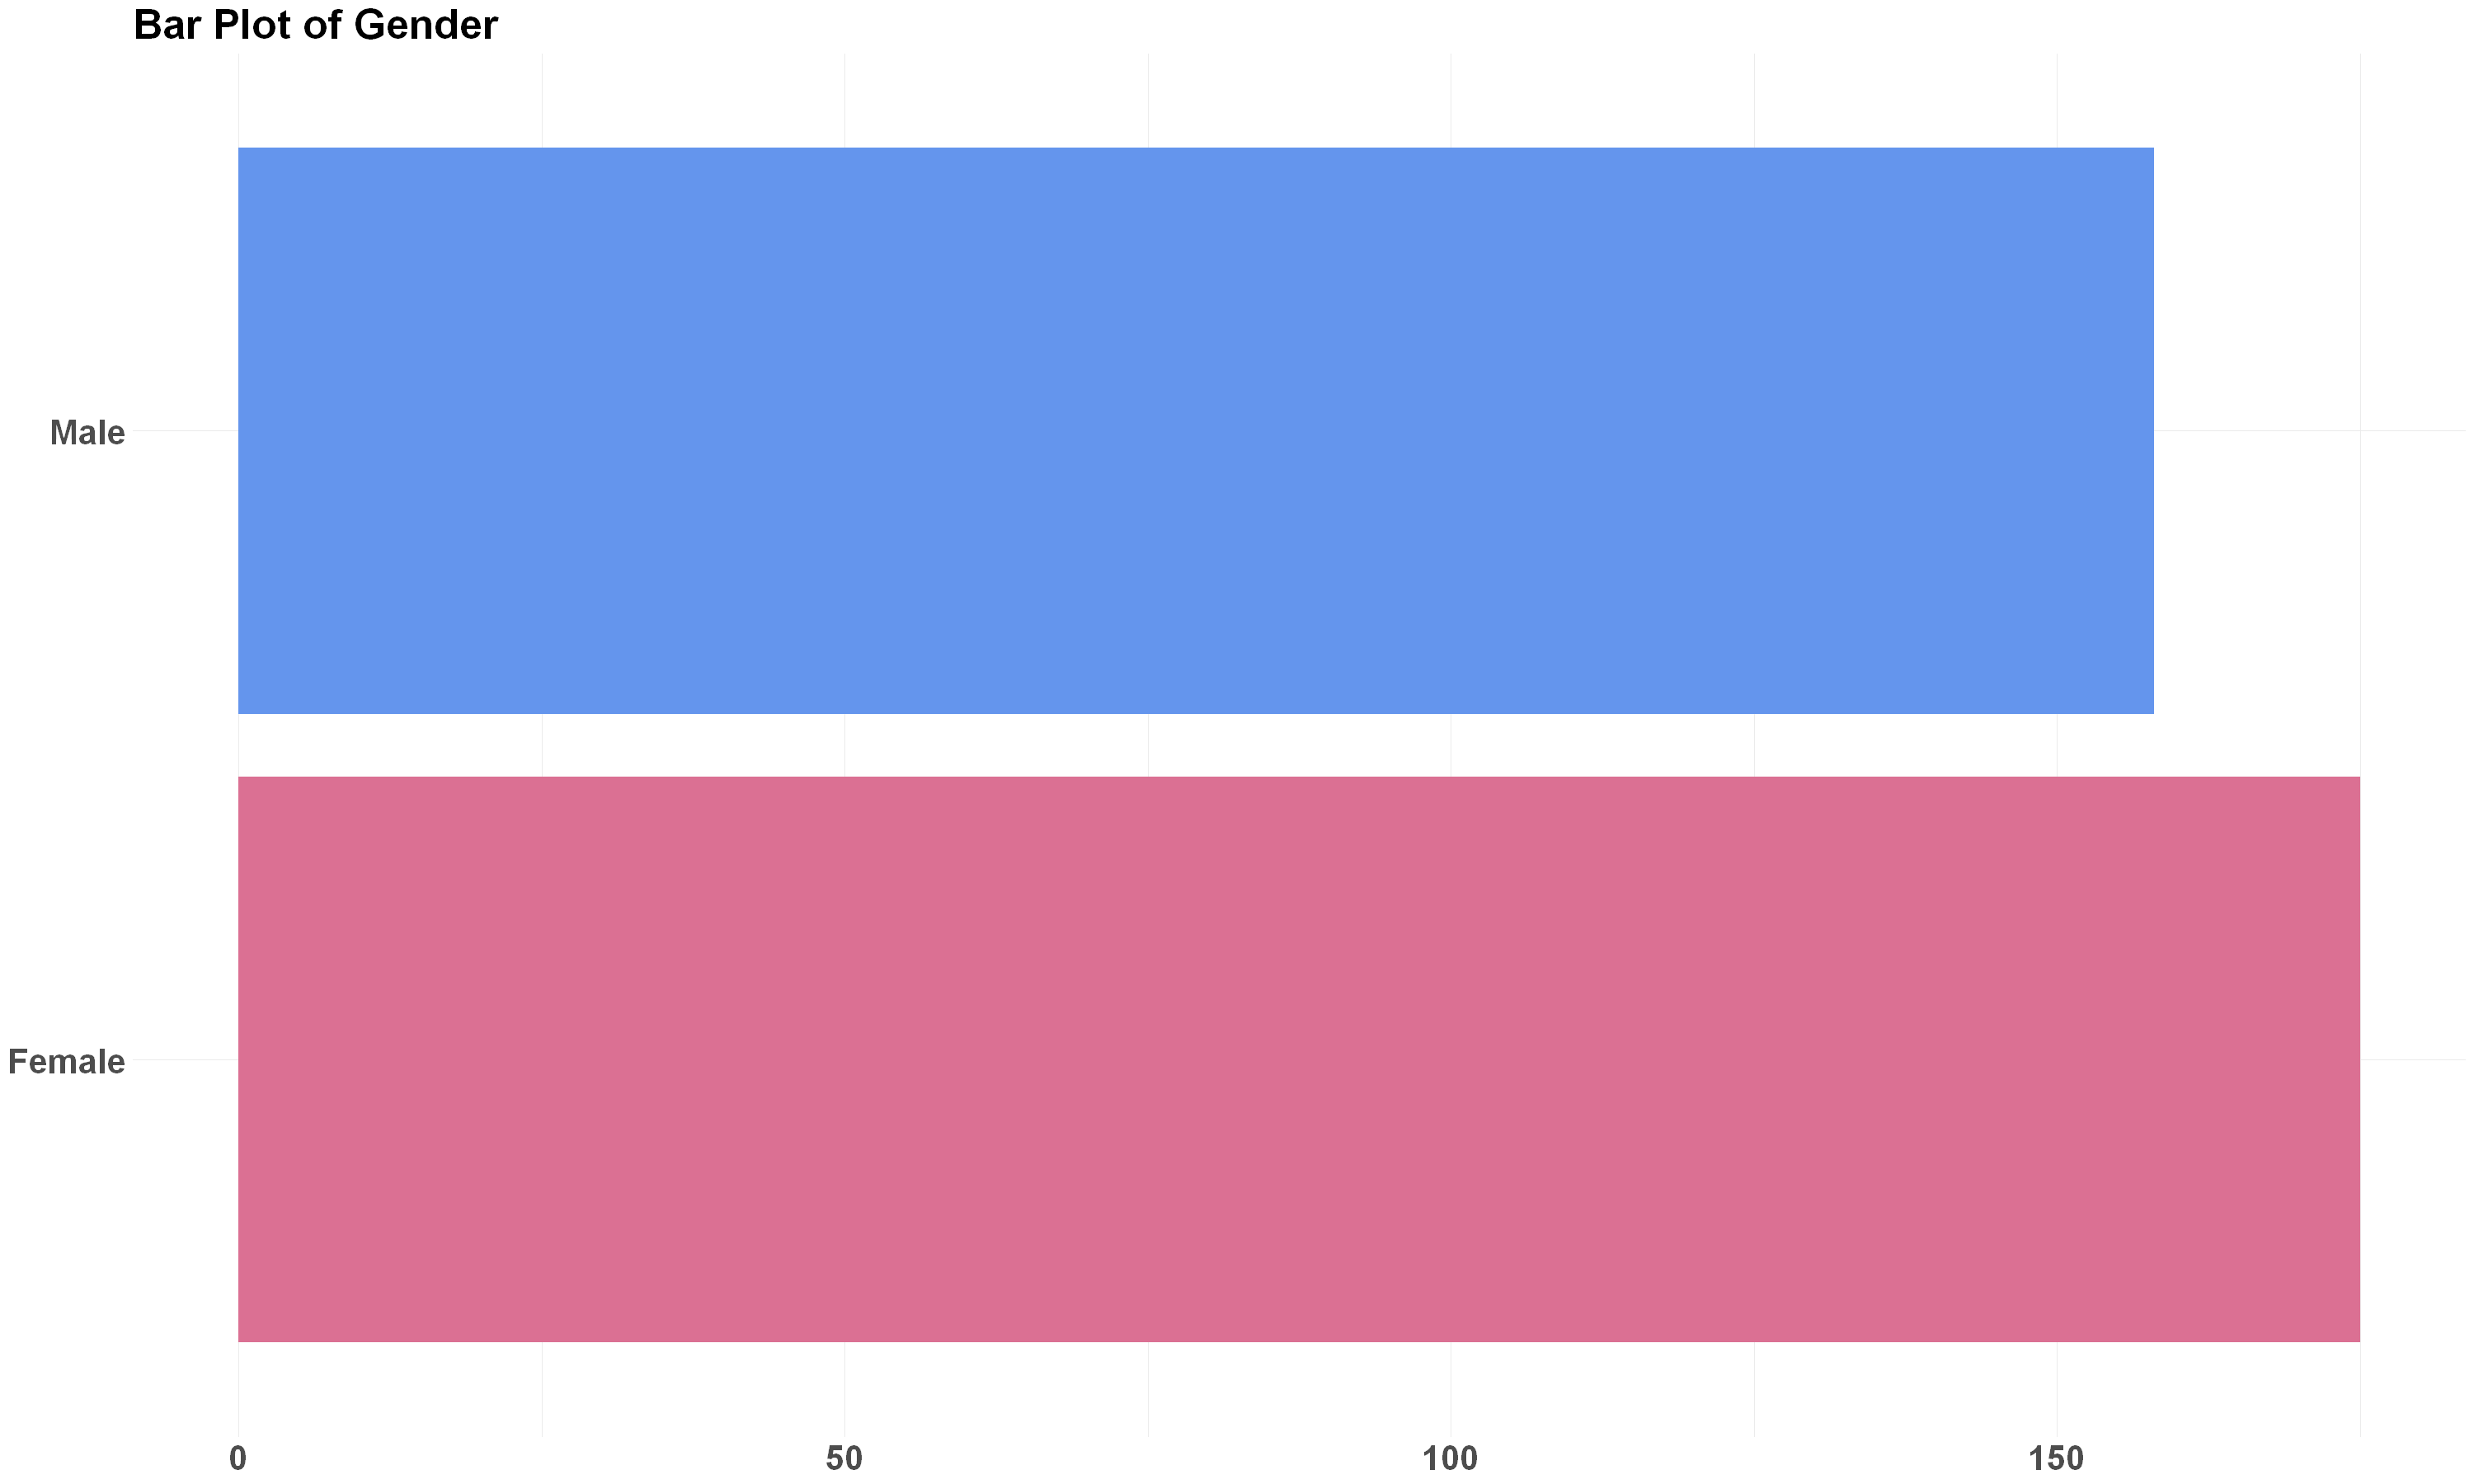

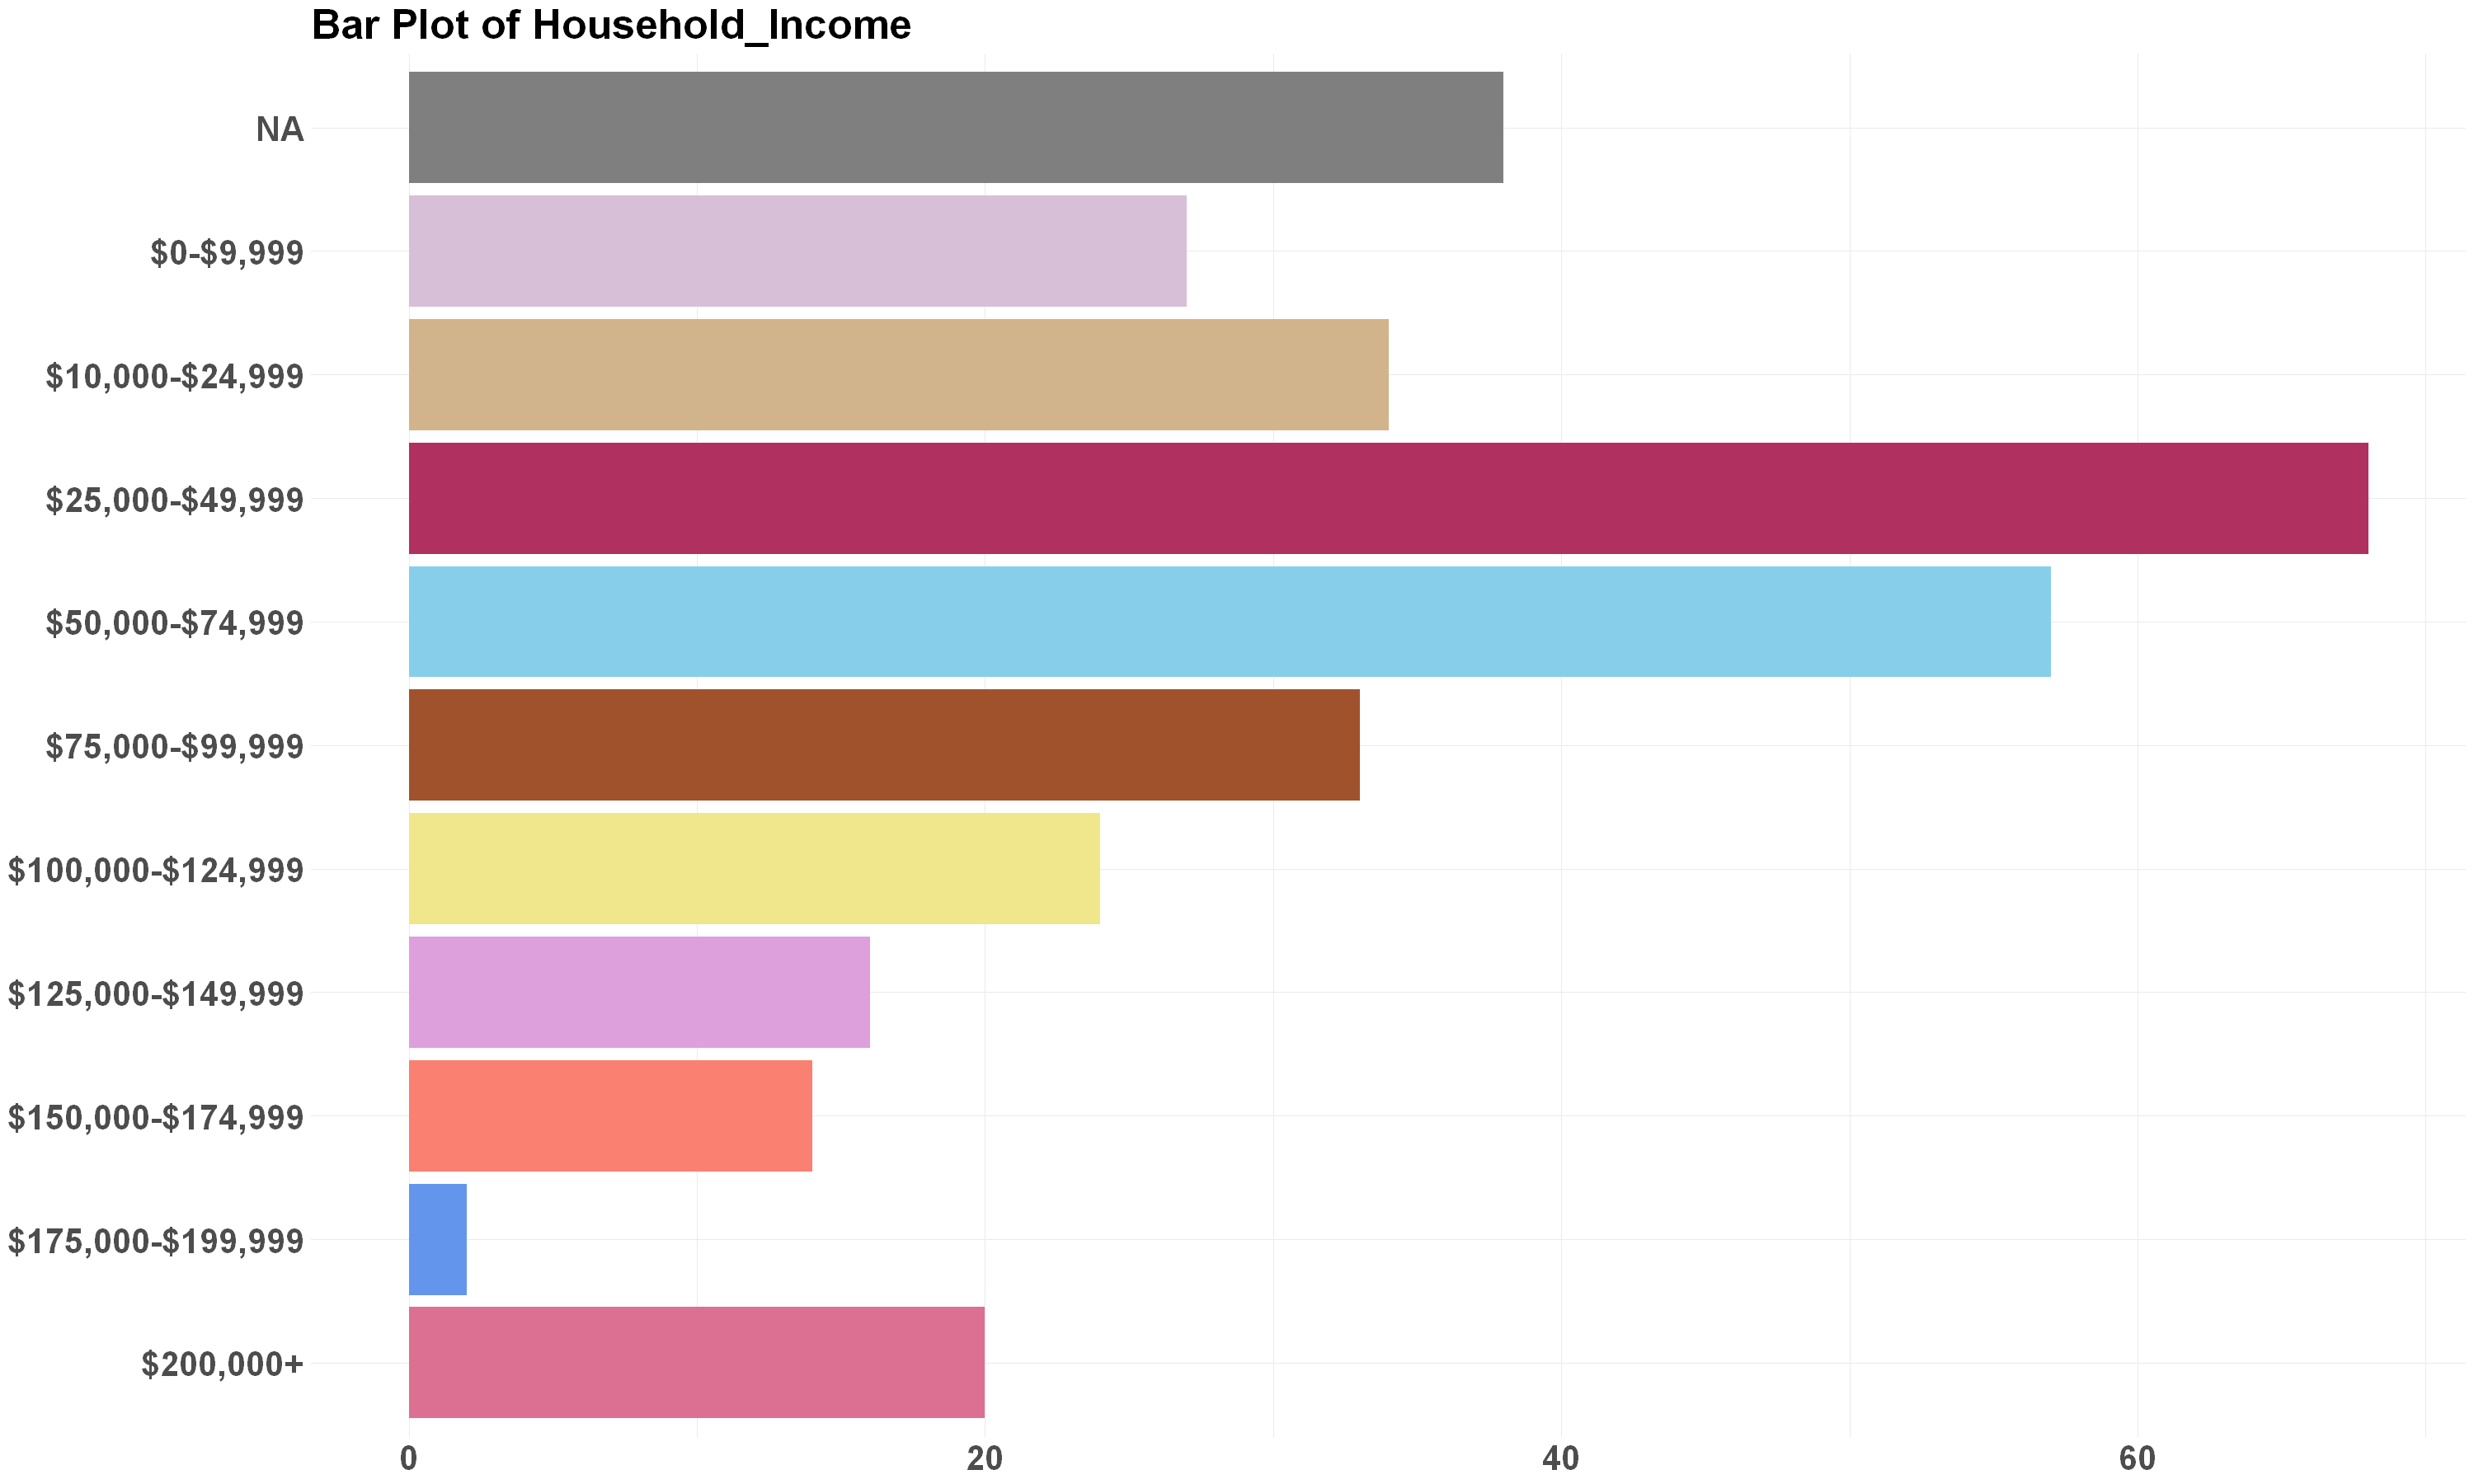

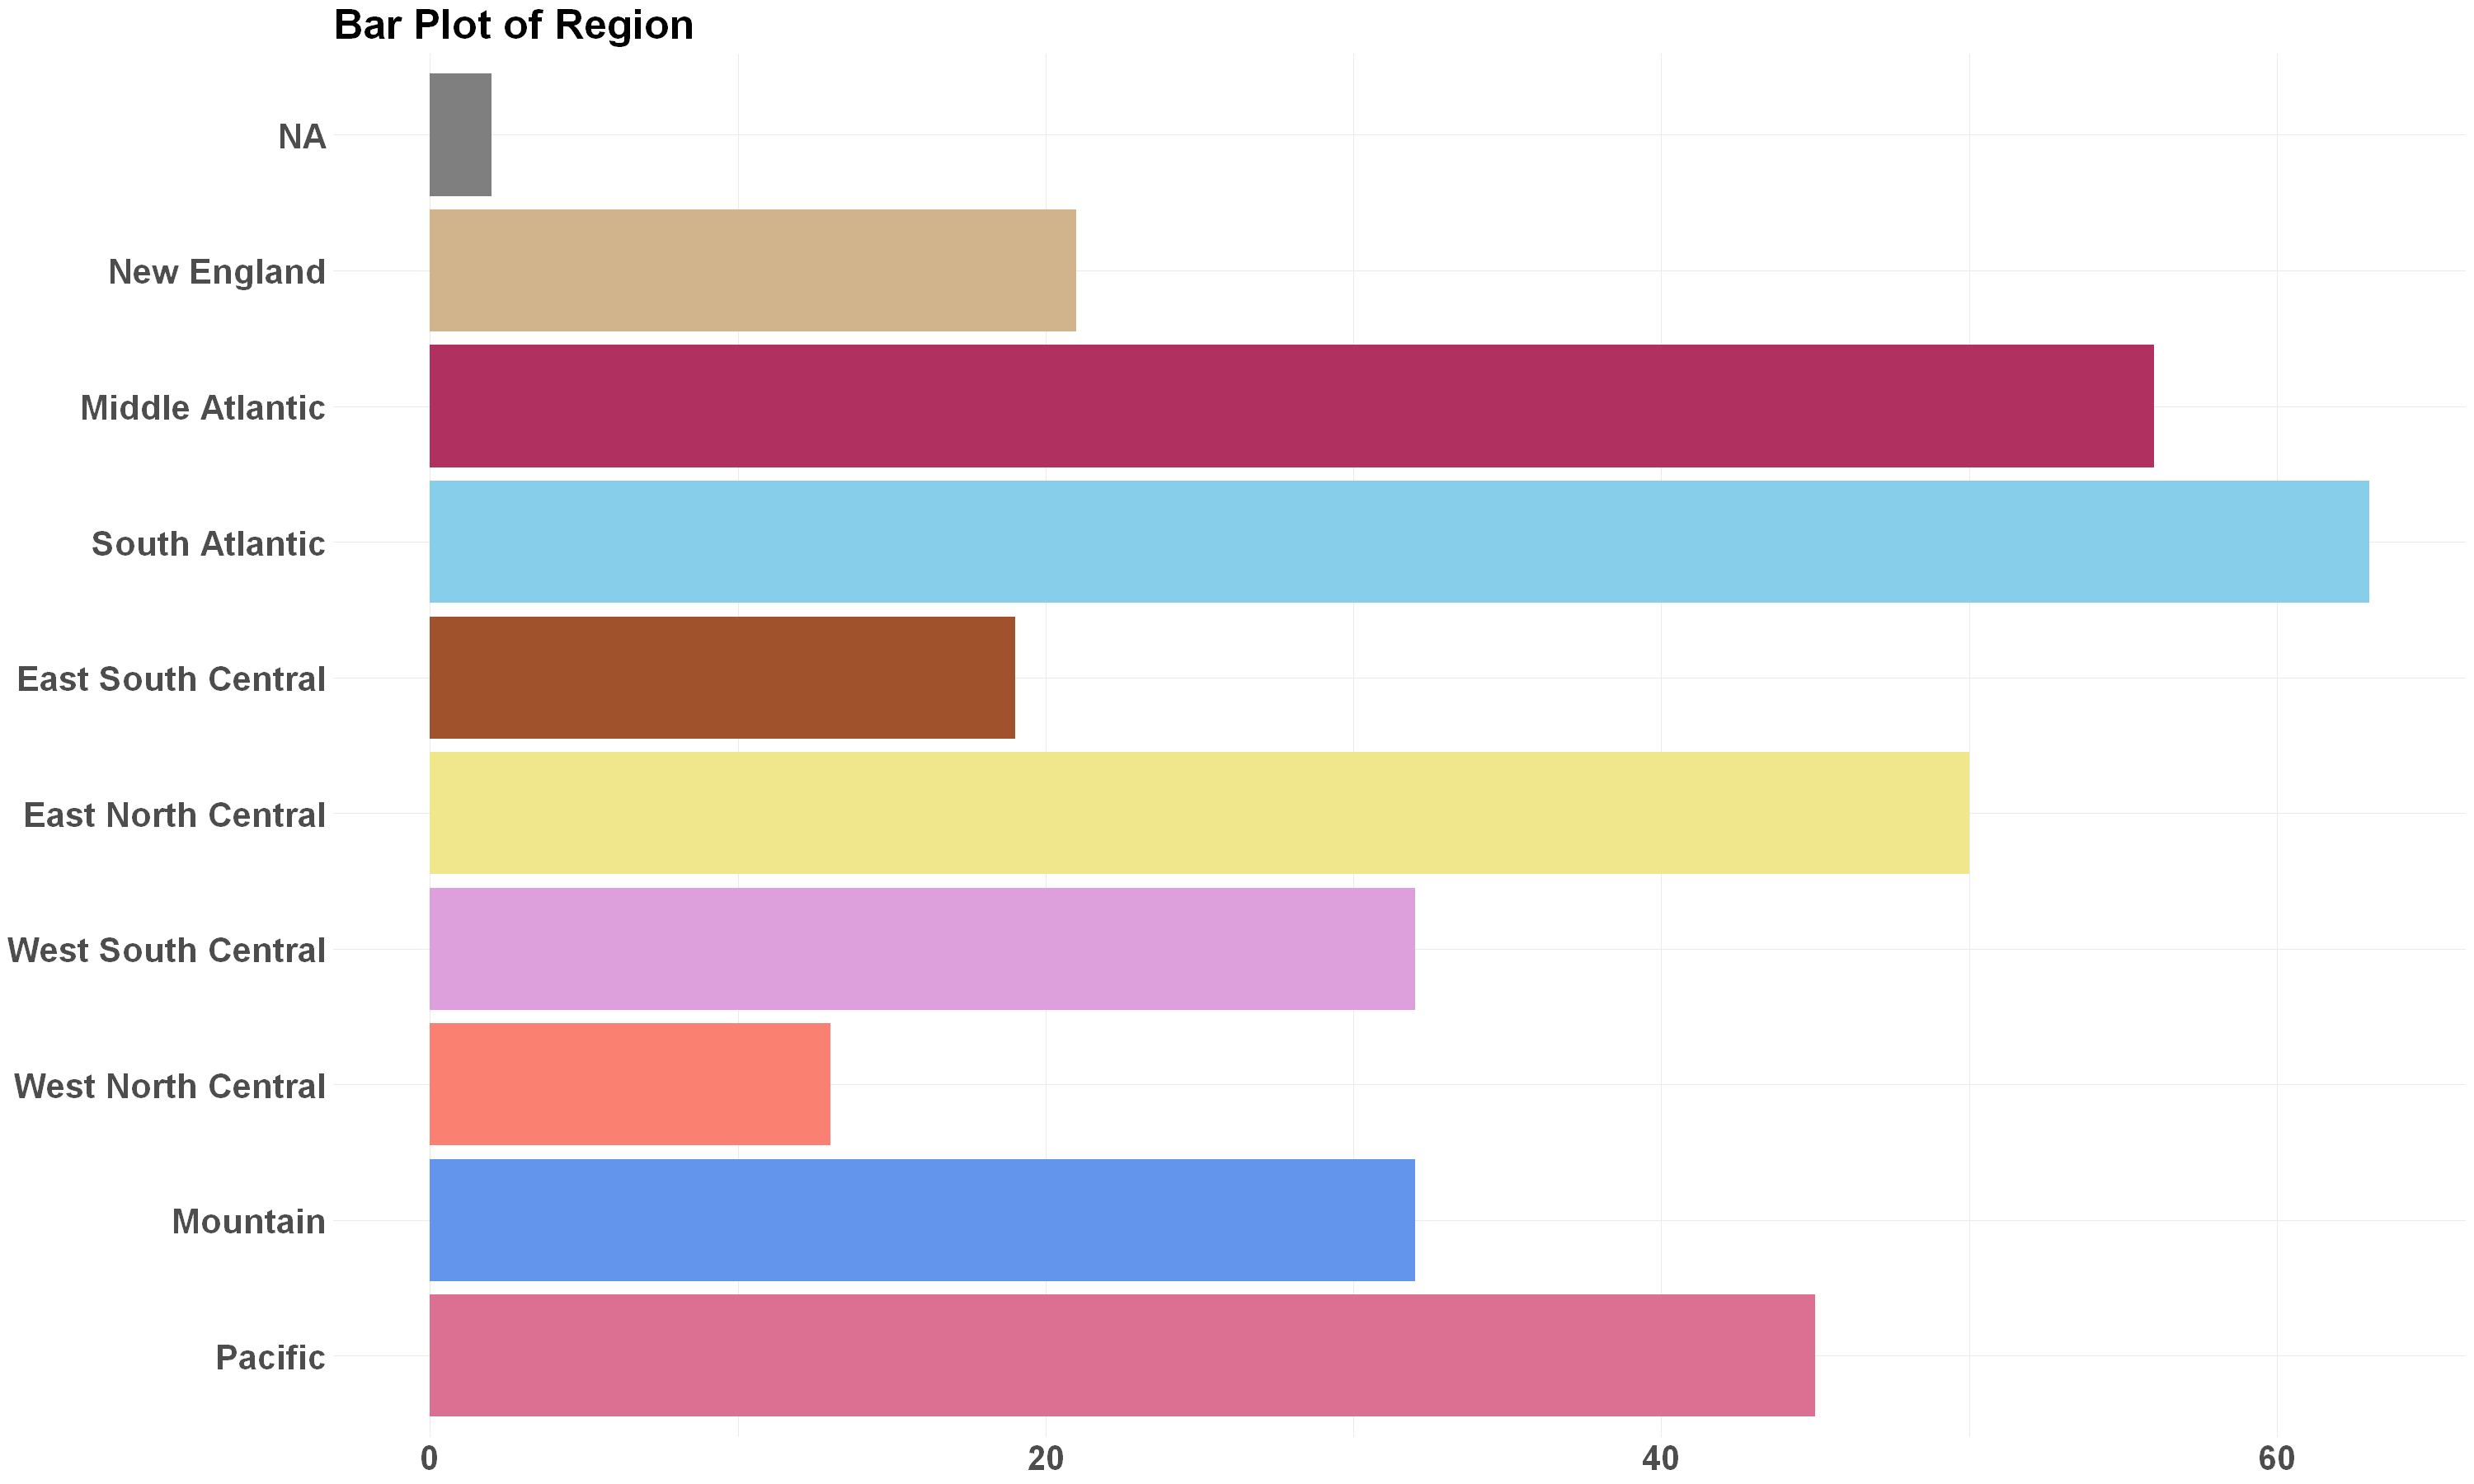

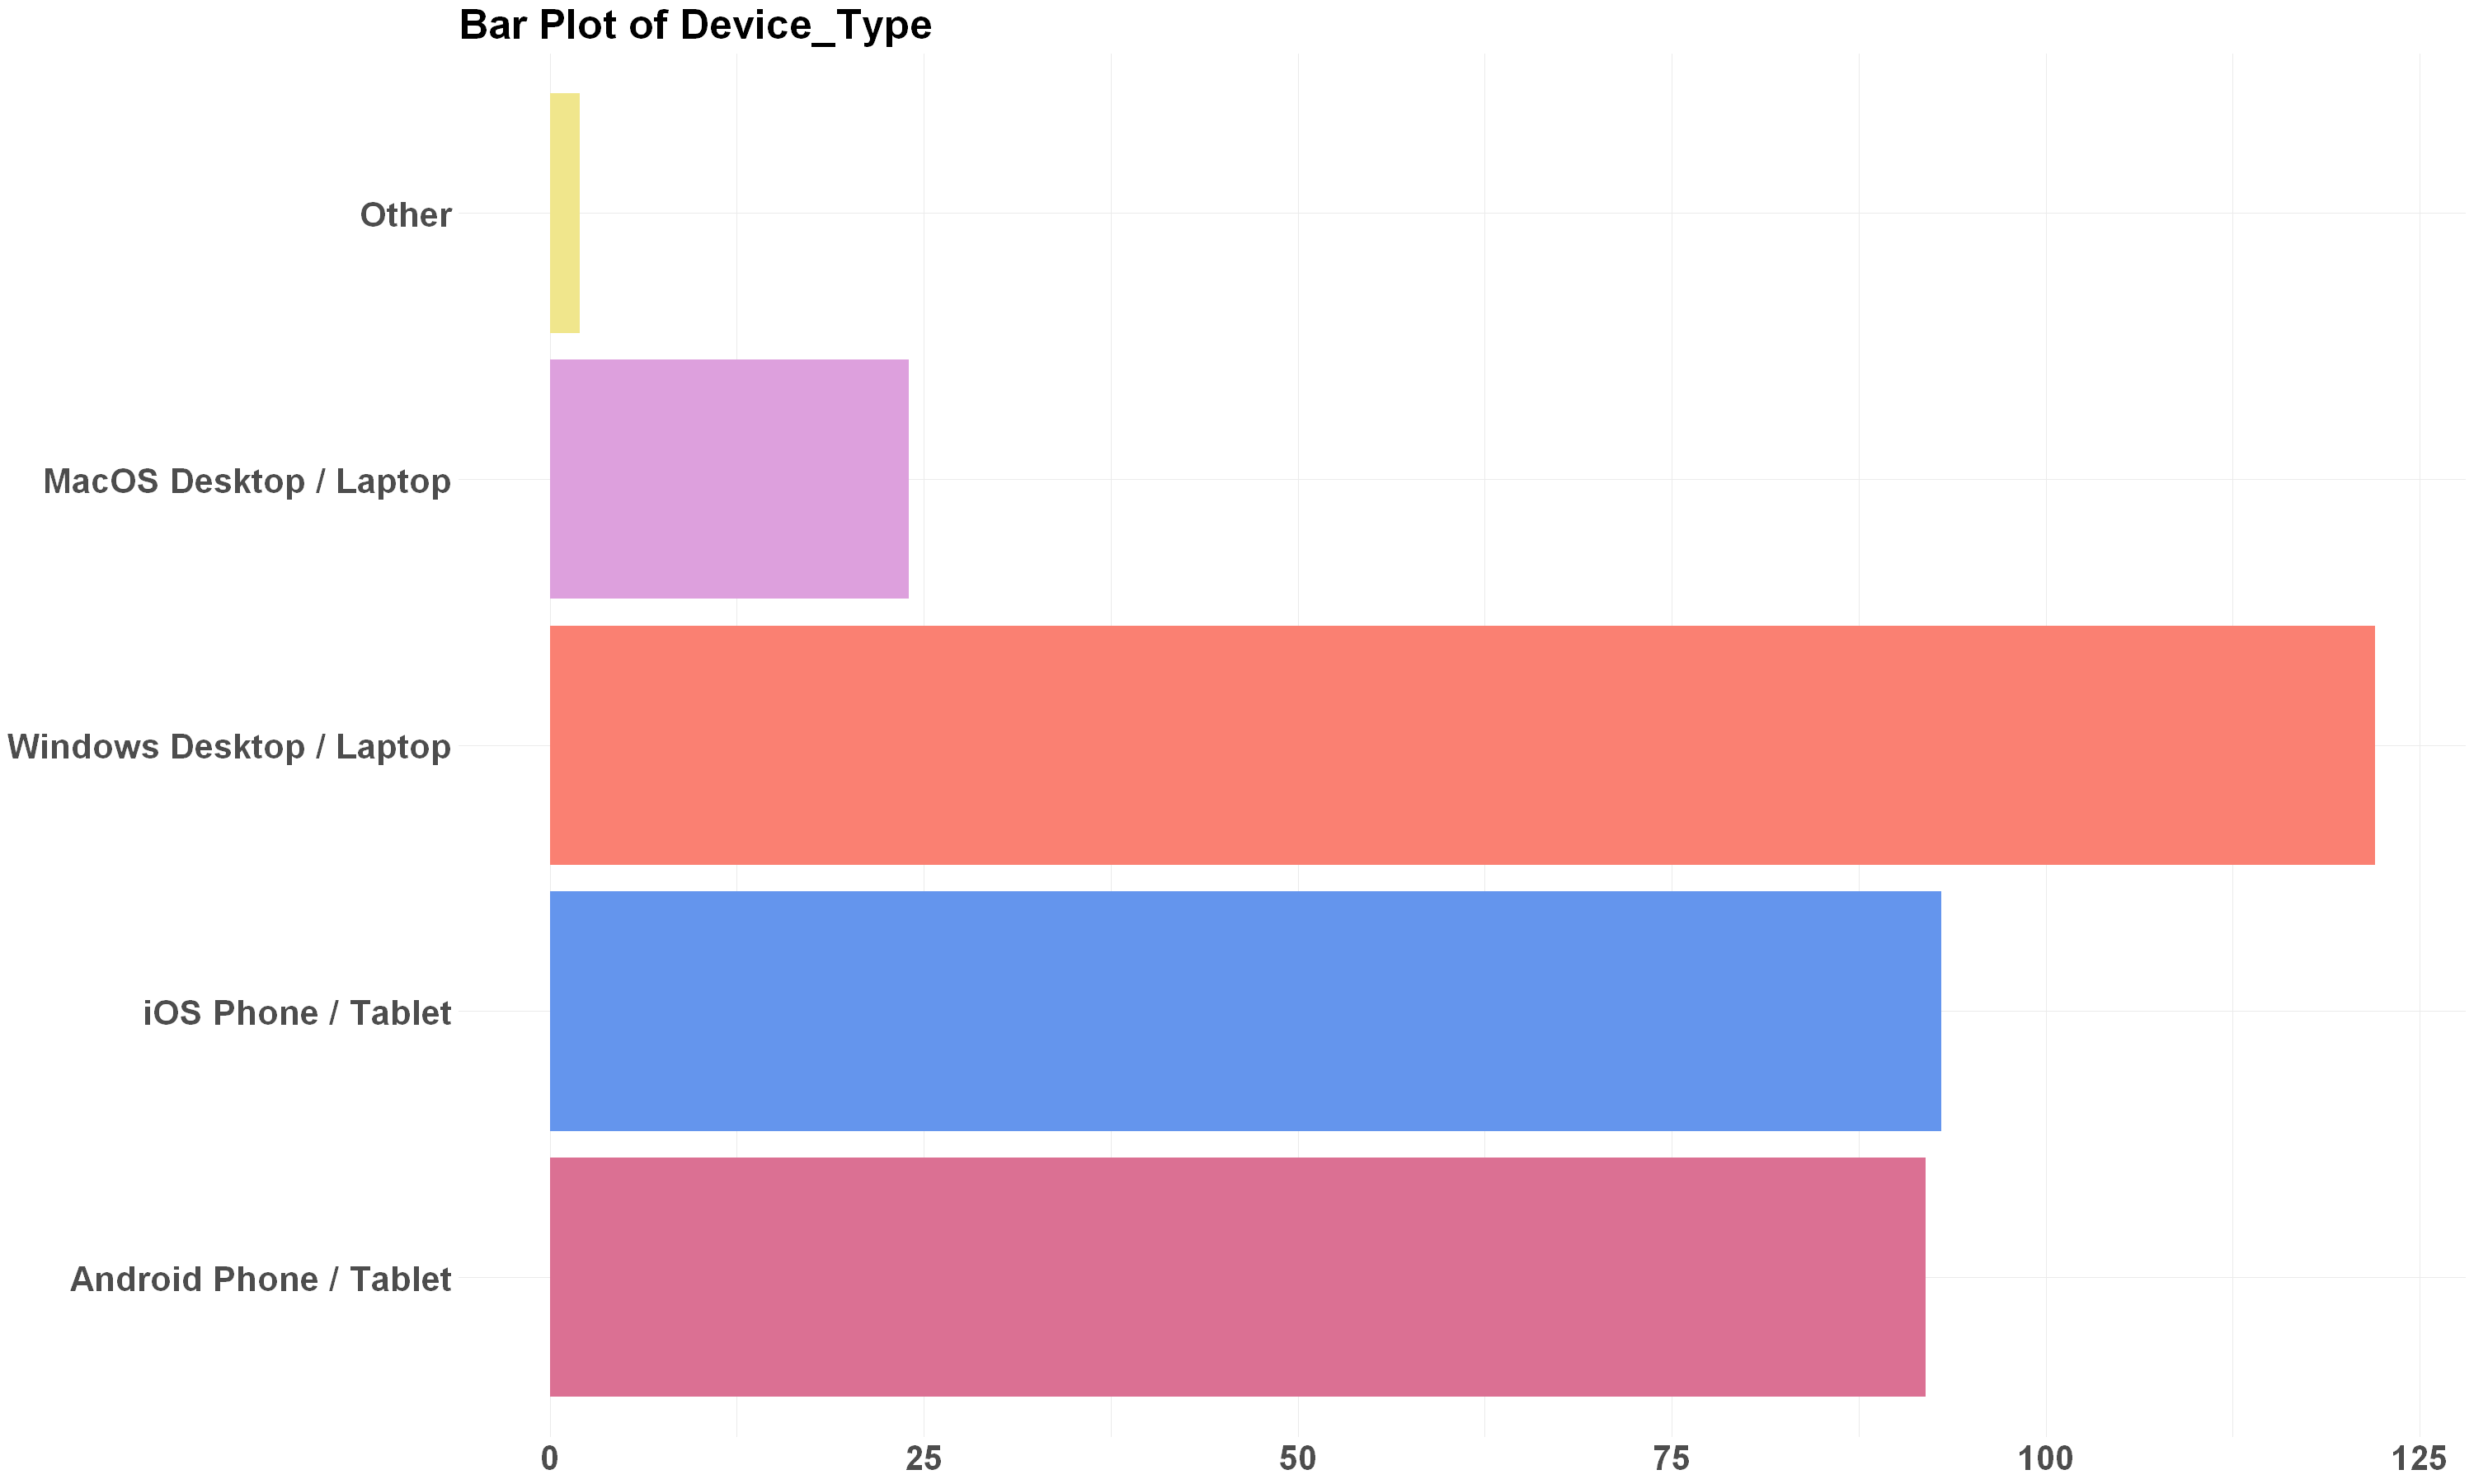

In [19]:
# Bar Plots for Categorical Features

cat_cols <- names(df %>% select_if(is.factor))

options(repr.plot.width = 25, repr.plot.height = 15)

# Ensure this vector has enough colors for your categories
my_colors <- c("palevioletred", "cornflowerblue", "salmon", "plum", "khaki", 
               "sienna", "skyblue", "maroon", "tan", "thistle", 
               "violet") 

# Loop through each categorical column to create bar plots
for (col in cat_cols) {
    print(
        ggplot(df, aes_string(x = col, fill = col)) +
        geom_bar() +
        scale_fill_manual(values = my_colors) + 
        ggtitle(paste("Bar Plot of", col)) +
        theme_minimal() +
        theme(
            plot.title = element_text(size = 30, face = "bold"),
            axis.title.x = element_blank(), 
            axis.title.y = element_blank(),
            axis.text.y = element_text(size = 25, face = "bold"),
            axis.text.x = element_text(size = 25, face = "bold"),
            legend.position = "none") +
        coord_flip()
    )
}

In [20]:
# Correlation Matrix
num_data <- df[, num_cols]

# Compute correlation on the selected numeric data
cor_matrix <- cor(num_data, use = "complete.obs")
cor_matrix

,Employed,Mental_Illness,Owns_Computer,Hospitalized_Before_Illness,Days_Hospitalized,Legally_Disabled,Regular_Internet_Access,Lives_With_Parents,Resume_Gap,Gap_Duration_Months,⋯,On_Section8_Housing,Times_Hospitalized,Lack_of_concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
Employed,1.0000000000,-0.08774024,0.1740703747,-0.15552971,-0.134089703,-0.320637647,0.132736952,-0.16086277,-0.127106618,-0.22467321,⋯,-0.134510104,-0.0060701344,-0.045167564,-0.09619752,-0.087214178,-0.08229566,-0.09573166,-0.16026626,0.0006154369,-0.011981610
Mental_Illness,-0.0877402436,1.00000000,-0.1510167451,0.46995852,0.294272808,0.245596133,-0.092803234,0.15904595,0.248878970,0.23291092,⋯,0.045407661,0.1631289496,0.381938972,0.56818440,0.706918060,0.43148871,0.46500588,0.43863446,0.4138440681,0.290185215
Owns_Computer,0.1740703747,-0.15101675,1.0000000000,-0.15215465,-0.151073057,-0.154368857,0.259928608,-0.16340040,-0.203122423,-0.15919101,⋯,-0.033189415,-0.0357383931,-0.056876687,-0.23559334,-0.140596249,-0.17223907,-0.25061194,-0.14109365,-0.1145291046,-0.036501837
Hospitalized_Before_Illness,-0.1555297063,0.46995852,-0.1521546484,1.00000000,0.540868105,0.340819921,-0.068783749,0.08109532,0.249002199,0.19948816,⋯,0.054464054,0.3104103868,0.150608467,0.24822620,0.346068652,0.35558389,0.25320573,0.31705563,0.2572693727,0.147989040
Days_Hospitalized,-0.1340897031,0.29427281,-0.1510730568,0.54086810,1.000000000,0.252330855,-0.044054833,0.14570006,0.179249374,0.11250135,⋯,0.049304220,0.6622364501,-0.026029567,0.18466415,0.231646953,0.21313836,0.14770735,0.27120050,0.1830537968,0.001428452
Legally_Disabled,-0.3206376470,0.24559613,-0.1543688571,0.34081992,0.252330855,1.000000000,0.006797648,0.15988155,0.171438853,0.21822091,⋯,0.129714739,0.0961947924,0.211002490,0.09438122,0.234649296,0.20576348,0.17760437,0.14287993,0.1797940684,0.075460623
Regular_Internet_Access,0.1327369516,-0.09280323,0.2599286083,-0.06878375,-0.044054833,0.006797648,1.000000000,-0.04125225,-0.053332549,-0.10508989,⋯,0.025752086,-0.0462221945,-0.020376693,-0.06427209,-0.005638942,-0.03138548,-0.16611353,0.03188691,-0.0045566521,0.049635919
Lives_With_Parents,-0.1608627720,0.15904595,-0.1634003955,0.08109532,0.145700060,0.159881547,-0.041252248,1.00000000,0.187175907,0.05422715,⋯,0.034998461,0.1458972833,0.122101184,0.17648105,0.196960774,0.17848606,0.29201055,0.14730733,0.2335030345,0.020674776
Resume_Gap,-0.1271066181,0.24887897,-0.2031224233,0.24900220,0.179249374,0.171438853,-0.053332549,0.18717591,1.000000000,0.65440746,⋯,0.046642358,0.0952586209,0.164489209,0.20111950,0.268160639,0.24902515,0.18825251,0.28968924,0.2490021986,0.090836249
Gap_Duration_Months,-0.2246732077,0.23291092,-0.1591910090,0.19948816,0.112501348,0.218220915,-0.105089891,0.05422715,0.654407456,1.00000000,⋯,0.193238199,0.0474949790,0.197971722,0.19386434,0.180776839,0.15869254,0.15316857,0.25480437,0.2998387526,0.071963622


## Correlation Analysis


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



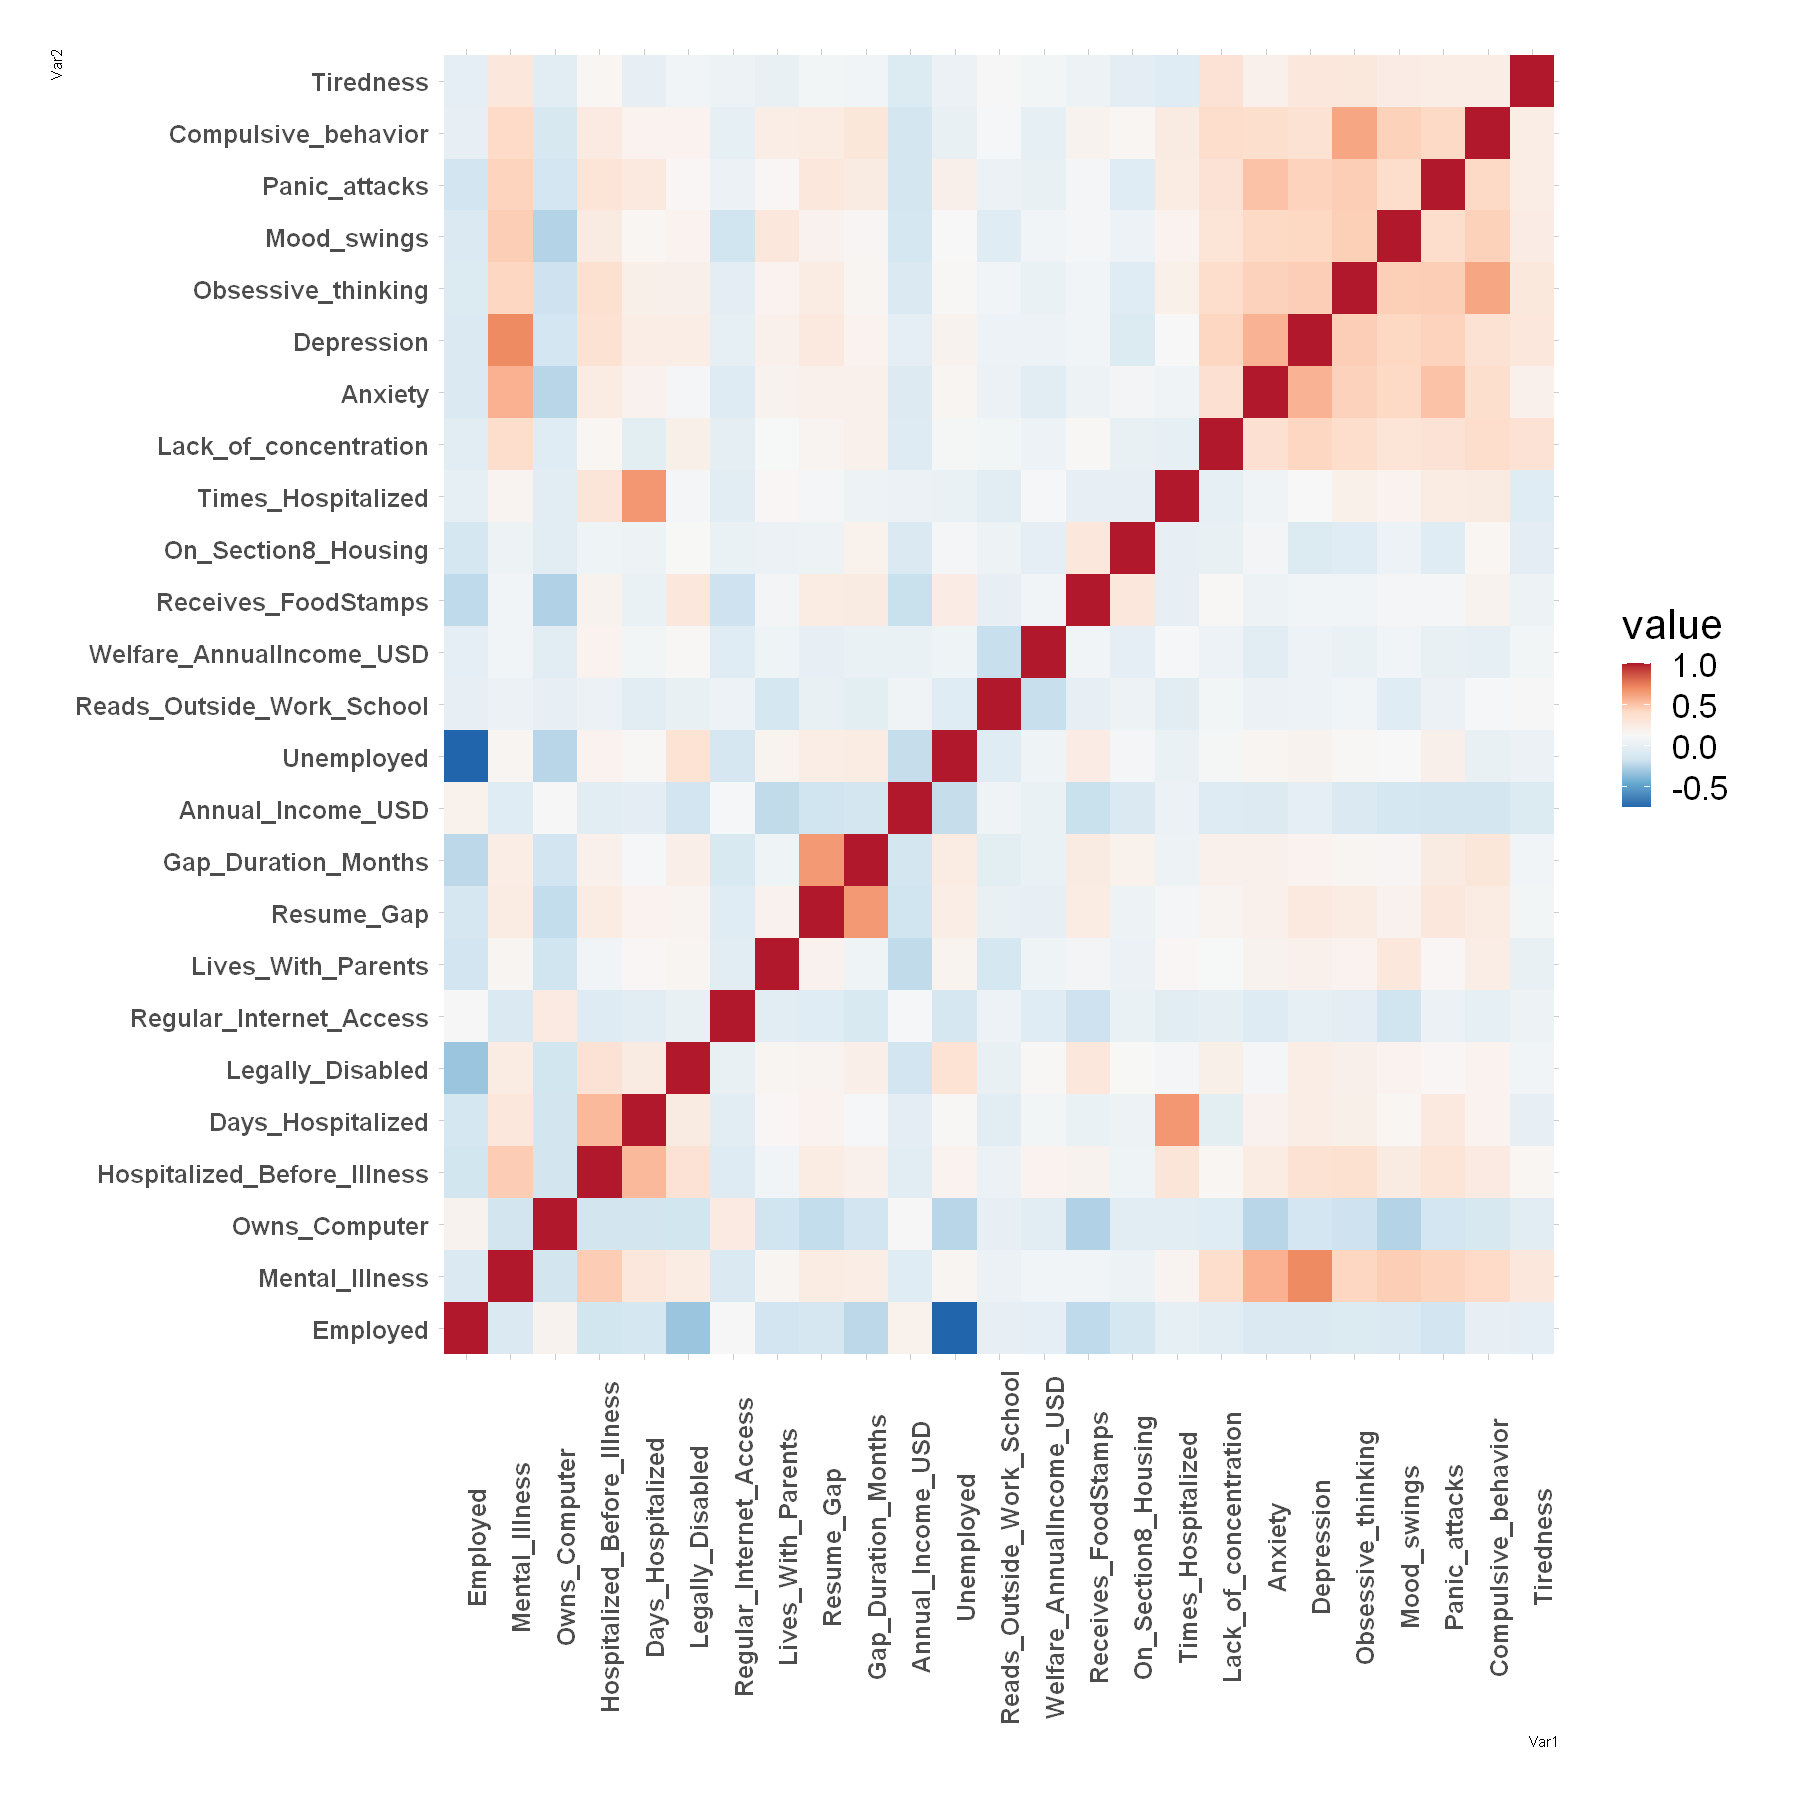

In [21]:
# Spotting correlations from the matrix above is not as efficient as when they are color-coded in a heatmap 
 
library(reshape2)         # Reshaping data between long and wide formats, making it easier to manipulate and visualize data. 
library(hrbrthemes)       # Primarily used to enhance the visual appeal of the plots.
options(warn=-1)

# Melt the correlation matrix for ggplot
melted_cor_matrix <- melt(cor_matrix)

options(repr.plot.width=15, repr.plot.height=15) 

# Plot the heatmap
ggplot(melted_cor_matrix, aes(Var1, Var2, fill = value)) +
geom_tile() +
scale_fill_distiller(palette = "RdBu") +
theme_ipsum(base_size = 25) +  # Apply the increased font size
theme(
    axis.text.x = element_text(angle = 90, size = 15, face = "bold"),  
    axis.text.y = element_text(size = 15, face = "bold")
) 

# 
- High Positive Correlation:

There are several pairs of variables that show a high positive correlation. For instance, the relationship between Hospitalized_Before_Illness and Days_Hospitalized is strong, as more days in the hospital could be associated with prior hospitalization.

Variables related to mental health conditions such as Tiredness, Compulsive_behavior, Panic_attacks, Mood_swings, Obsessive_thinking, Depression, and Anxiety are highly related with one another and with Mnetal_Illness. This suggests that these conditions might co-occur or have common underlying factors.

Economic variables like On_Section_8_Housing, Receives_FoodStamps, Welfare_AnnualIncome_USD, and Unemployed are positively correlated, indicating a link between employment status and the need for financial assistance programs.
High Negative Correlation:

The variable Employed appears to be negatively correlated with several of the financial assistance variables such as Receives_FoodStamps and Welfare_AnnualIncome_USD, which is expected as employment typically reduces the need for welfare.

There is a noticeable negative correlation between Mental_Illness and Employed, suggesting that those with a mental illness diagnosis are less likely to be employed.

--------------------------------------------------------------------------------------------------------------------------------

- Low or No Correlation: 

Variables such as Lives_With_Parents & Reads_Outside_Work_School do not show any relation with other features suggesting that these activities are not strongly associated with the other measured aspects of the individuals' lives.

## How do specific demographic factors interact to influence employment status? Are there identifiable patterns that suggest a compound effect of multiple demographic characteristics on employment opportunities?

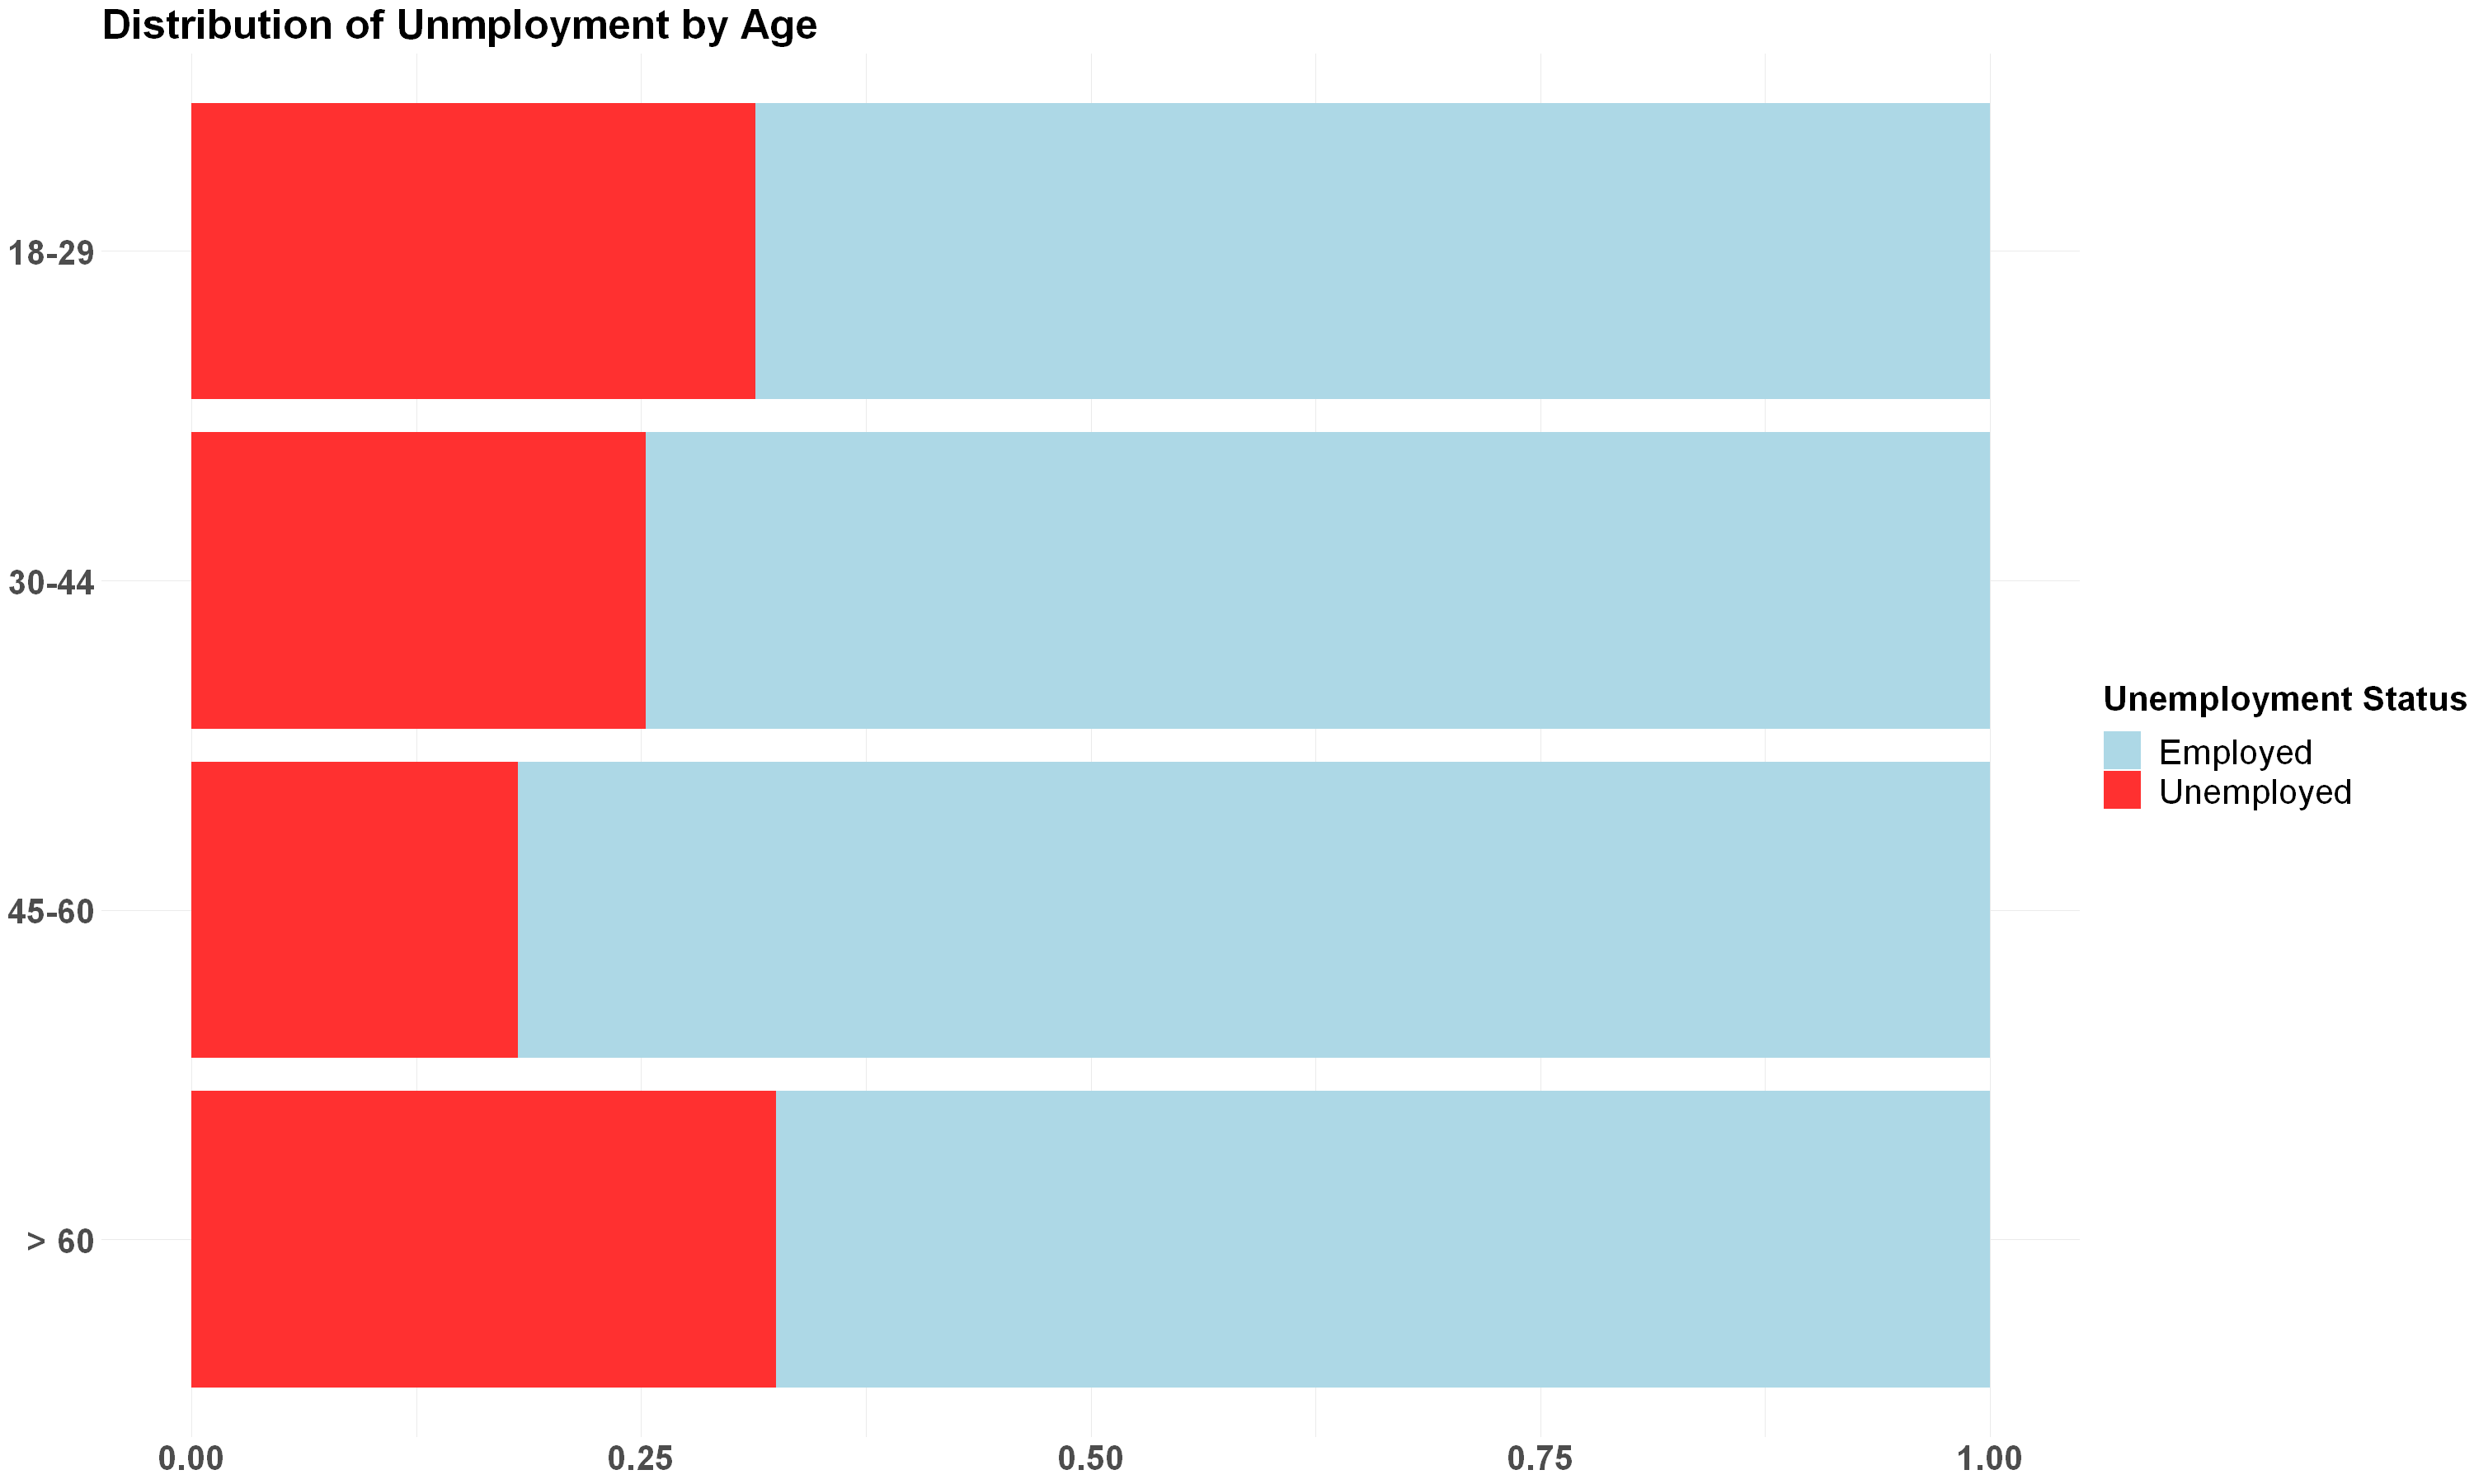

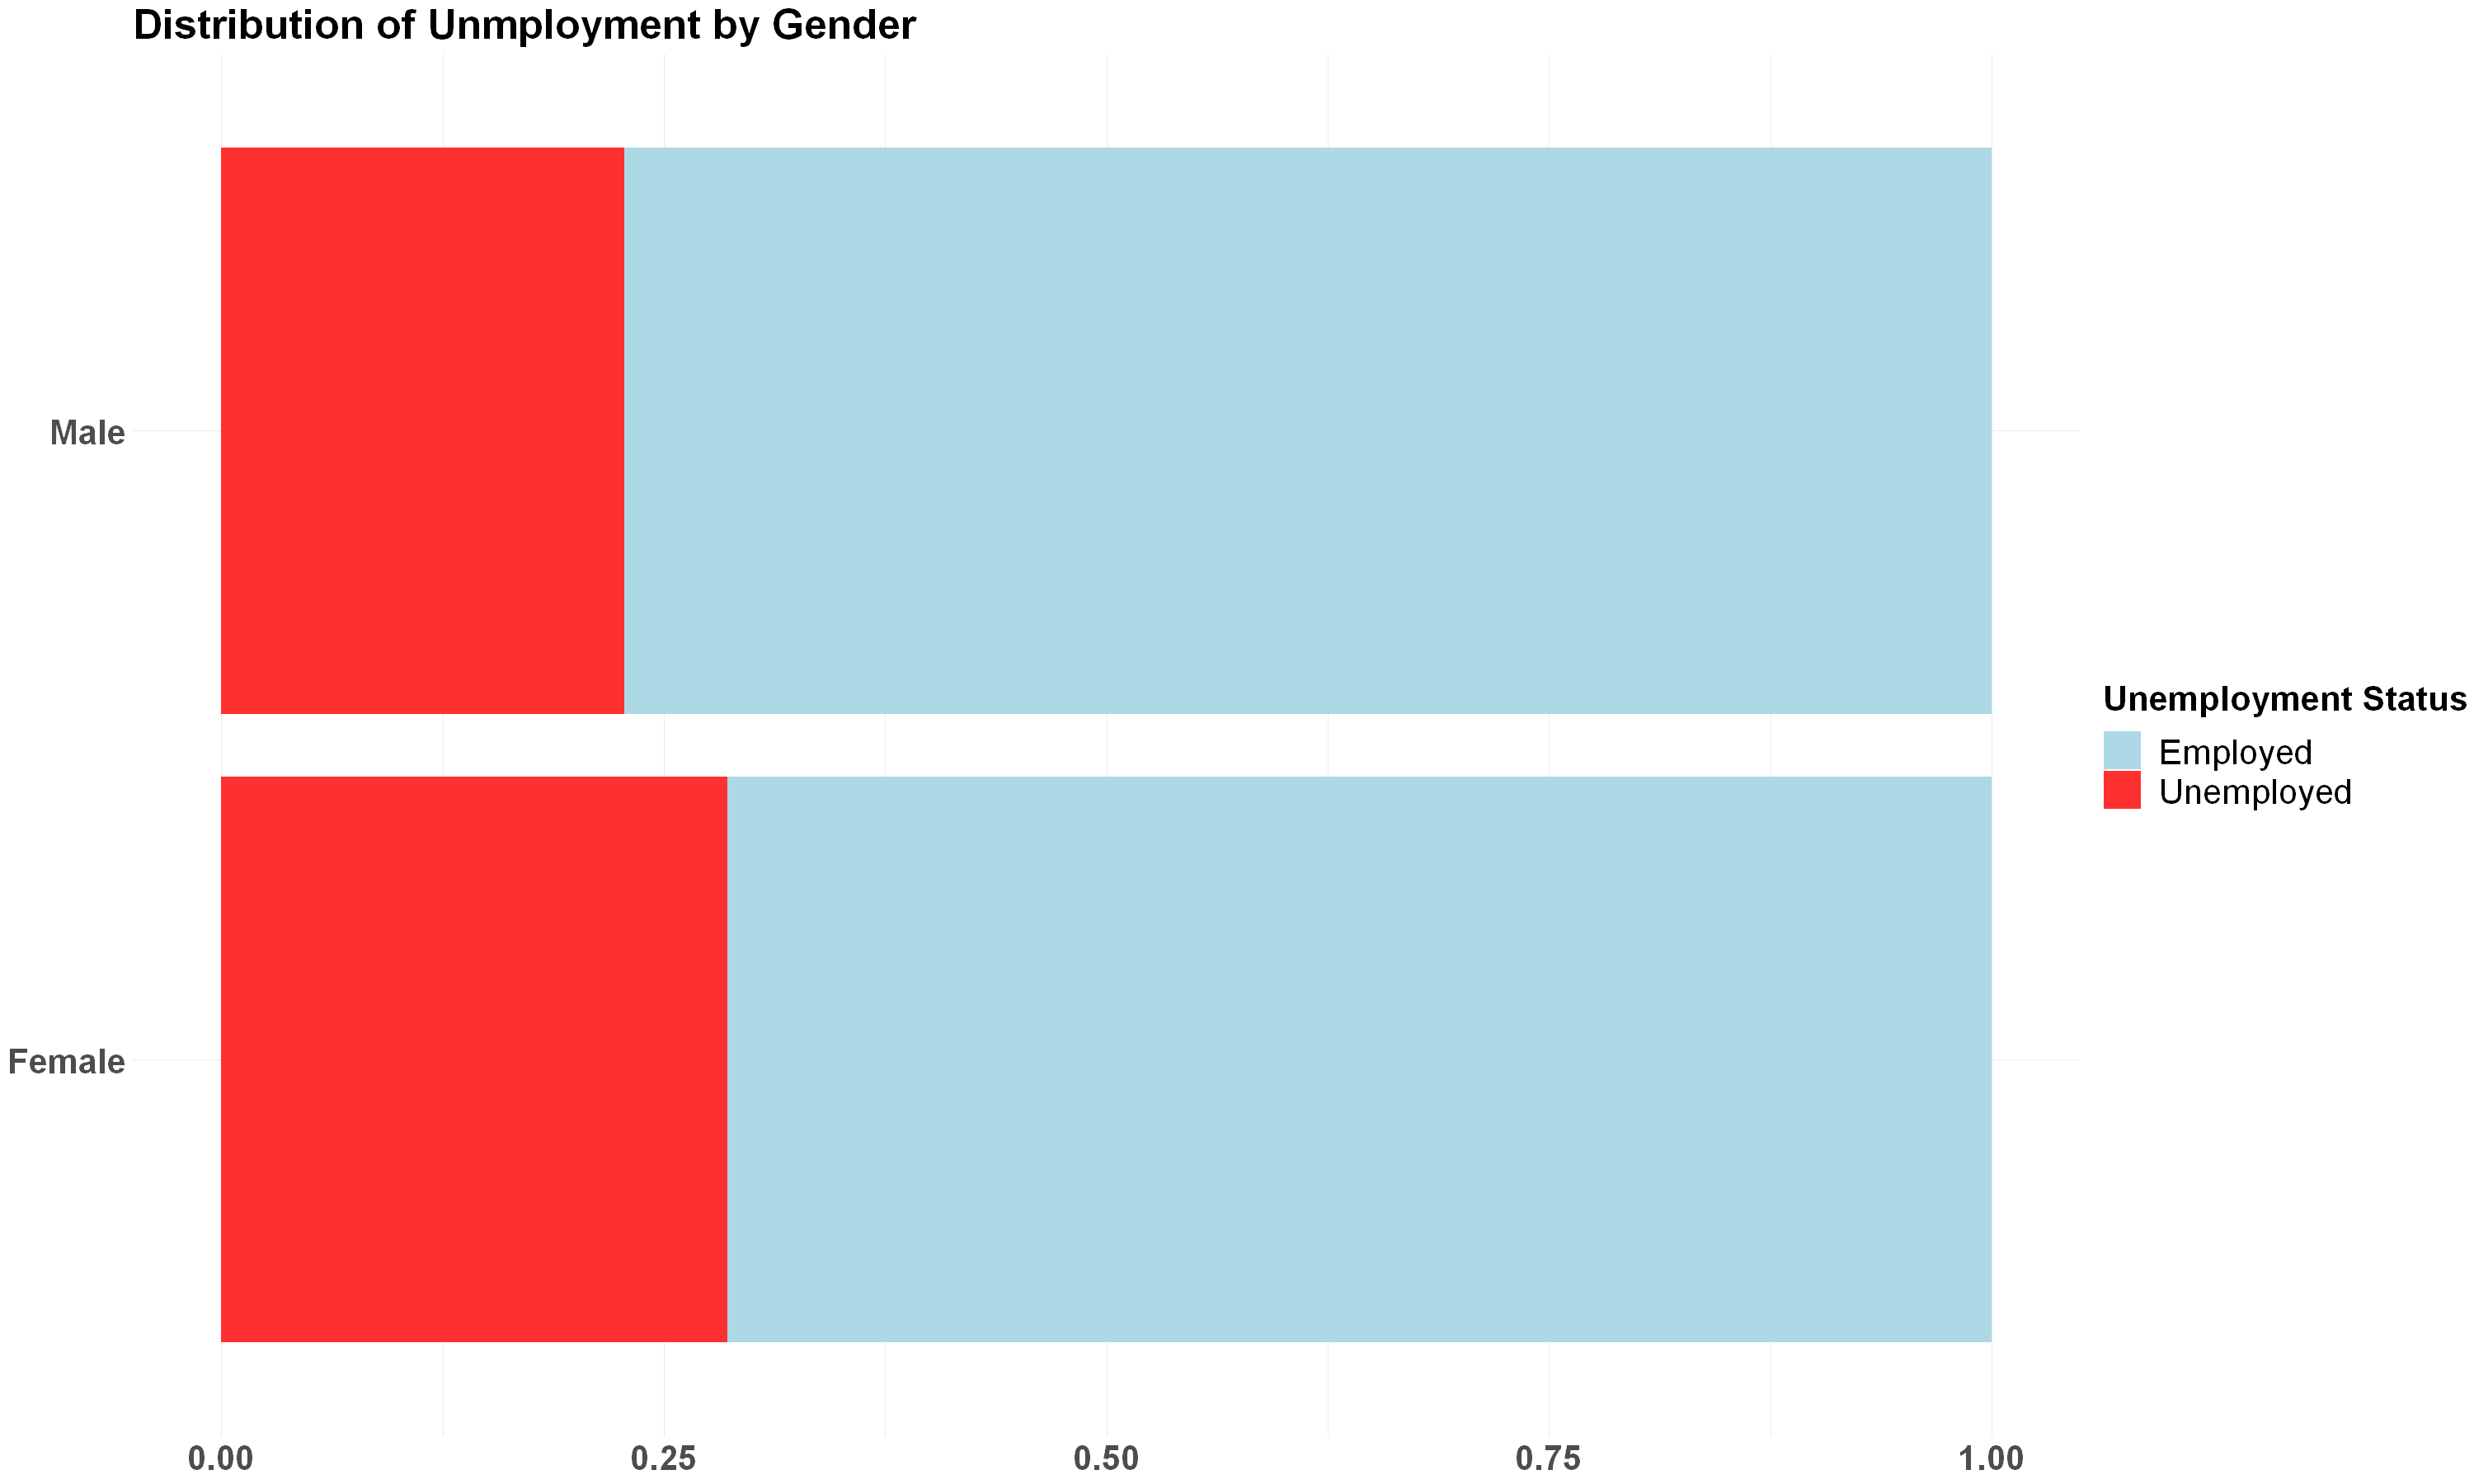

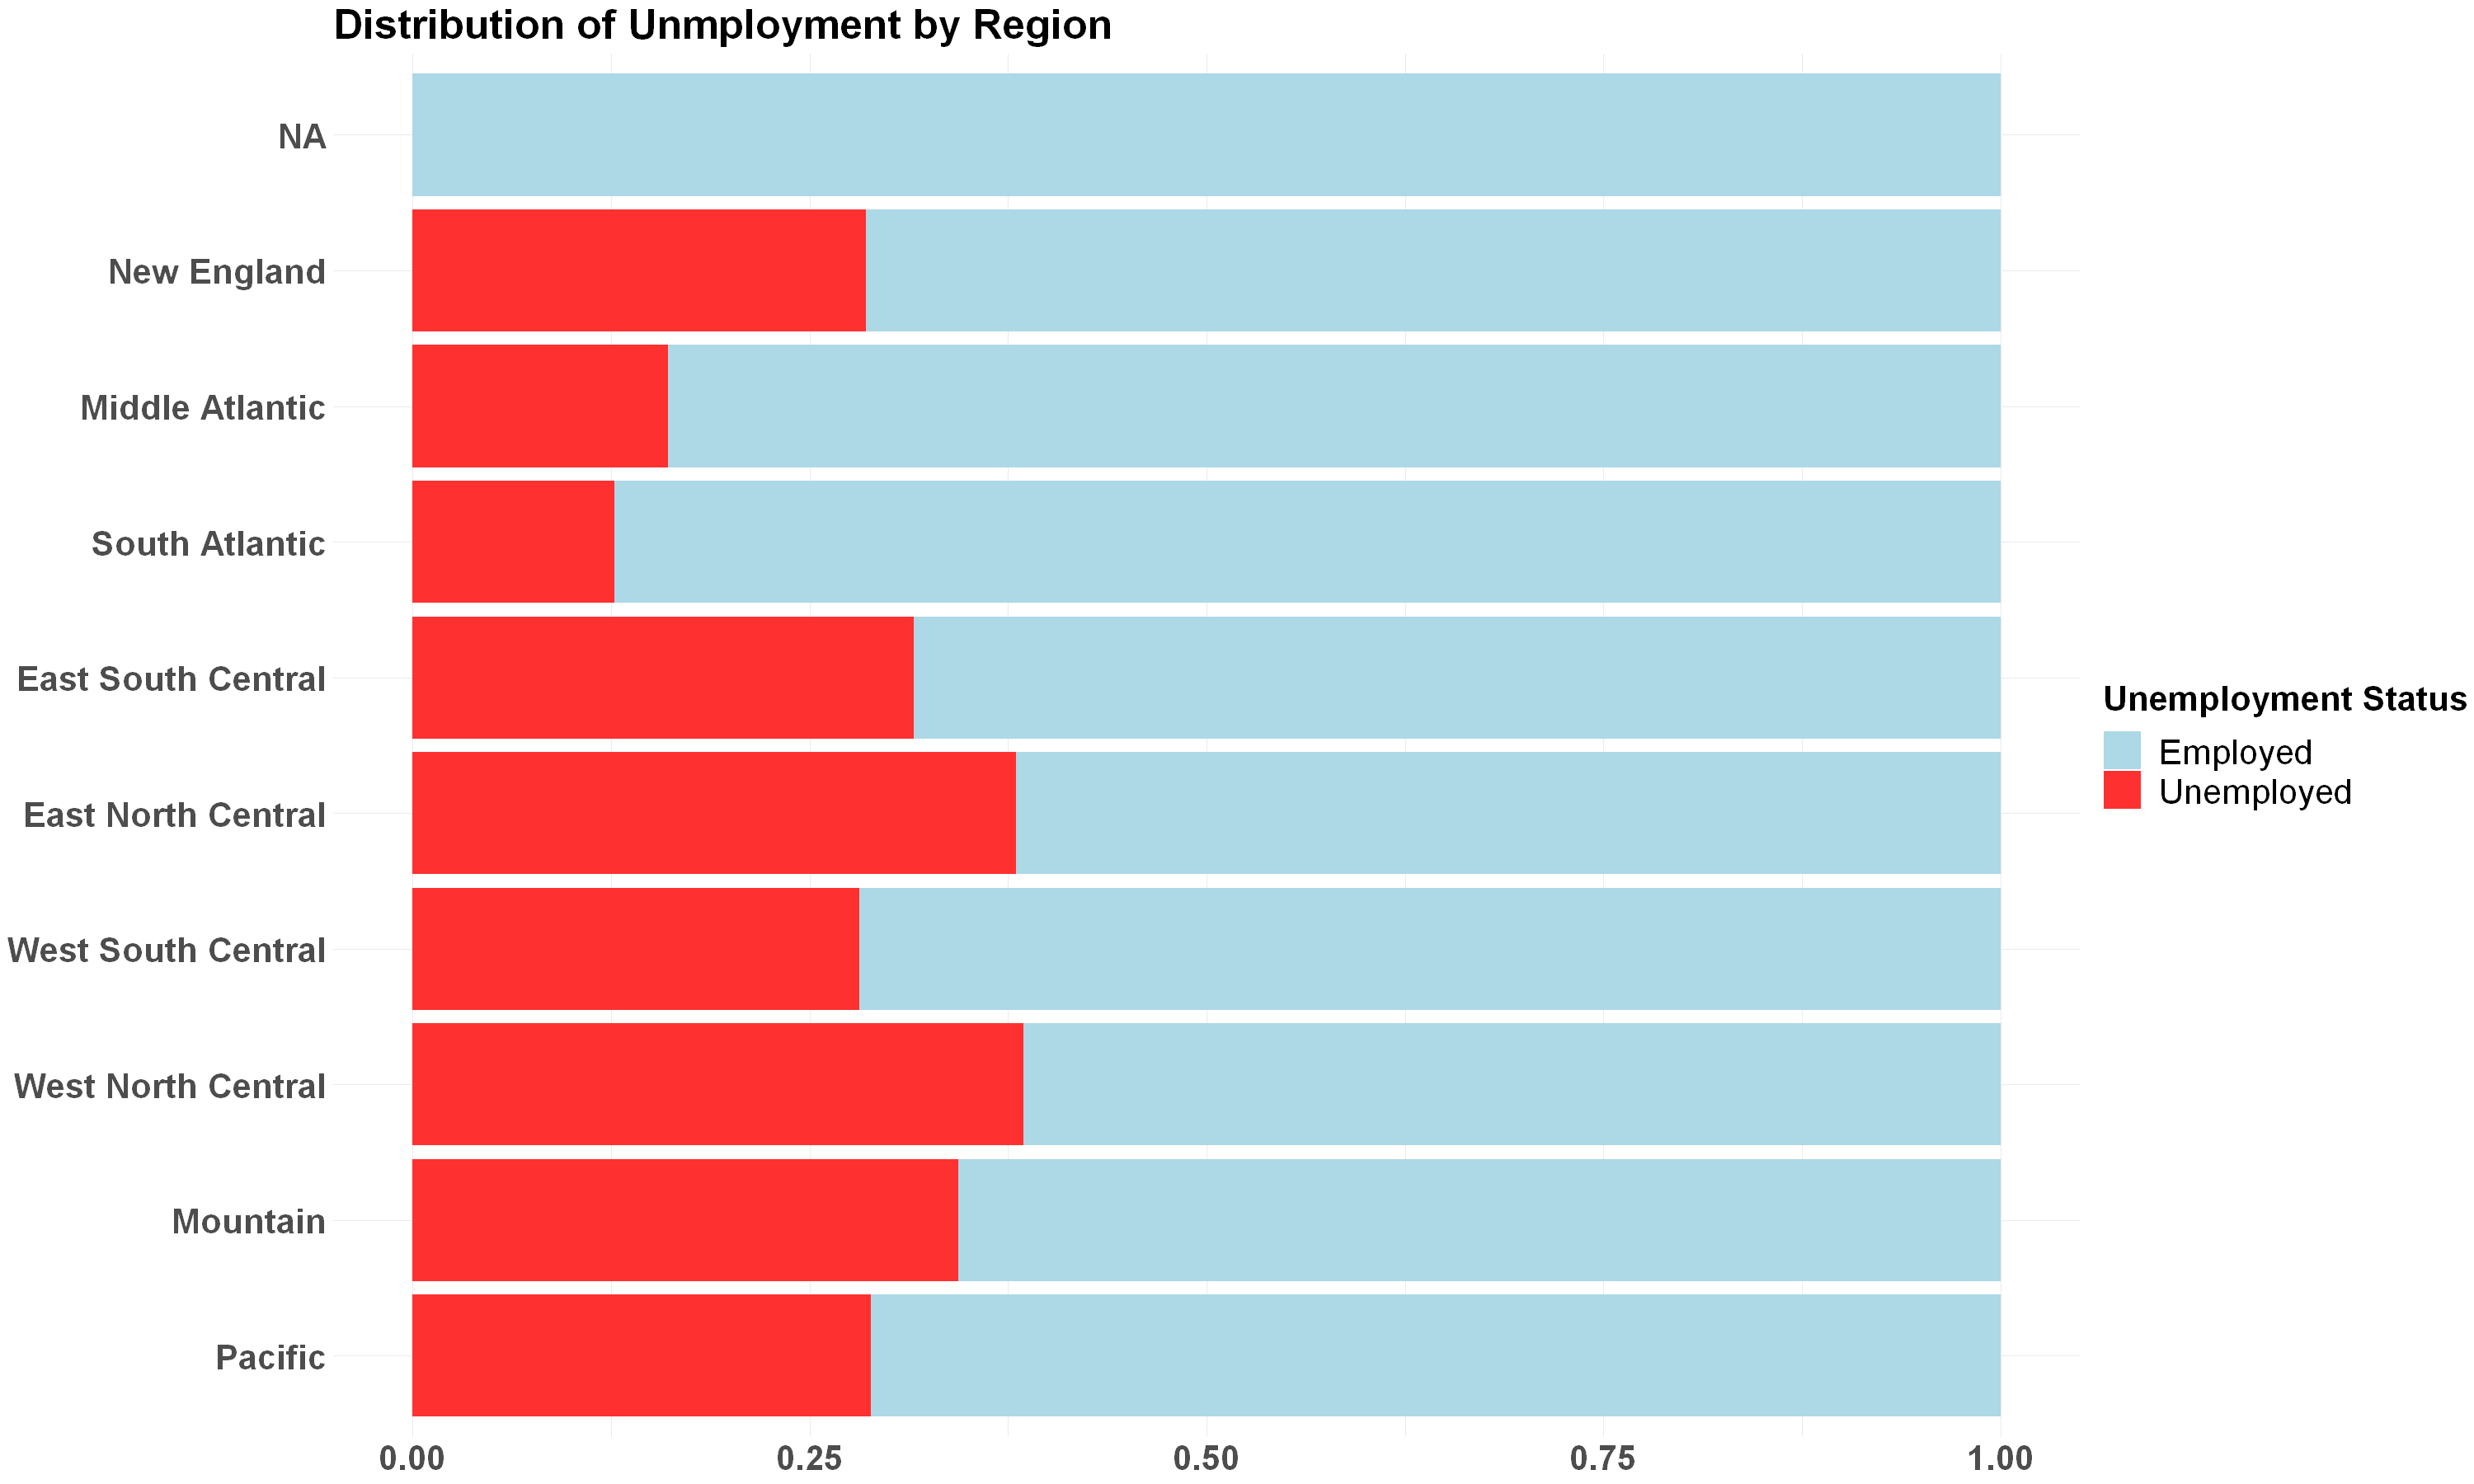

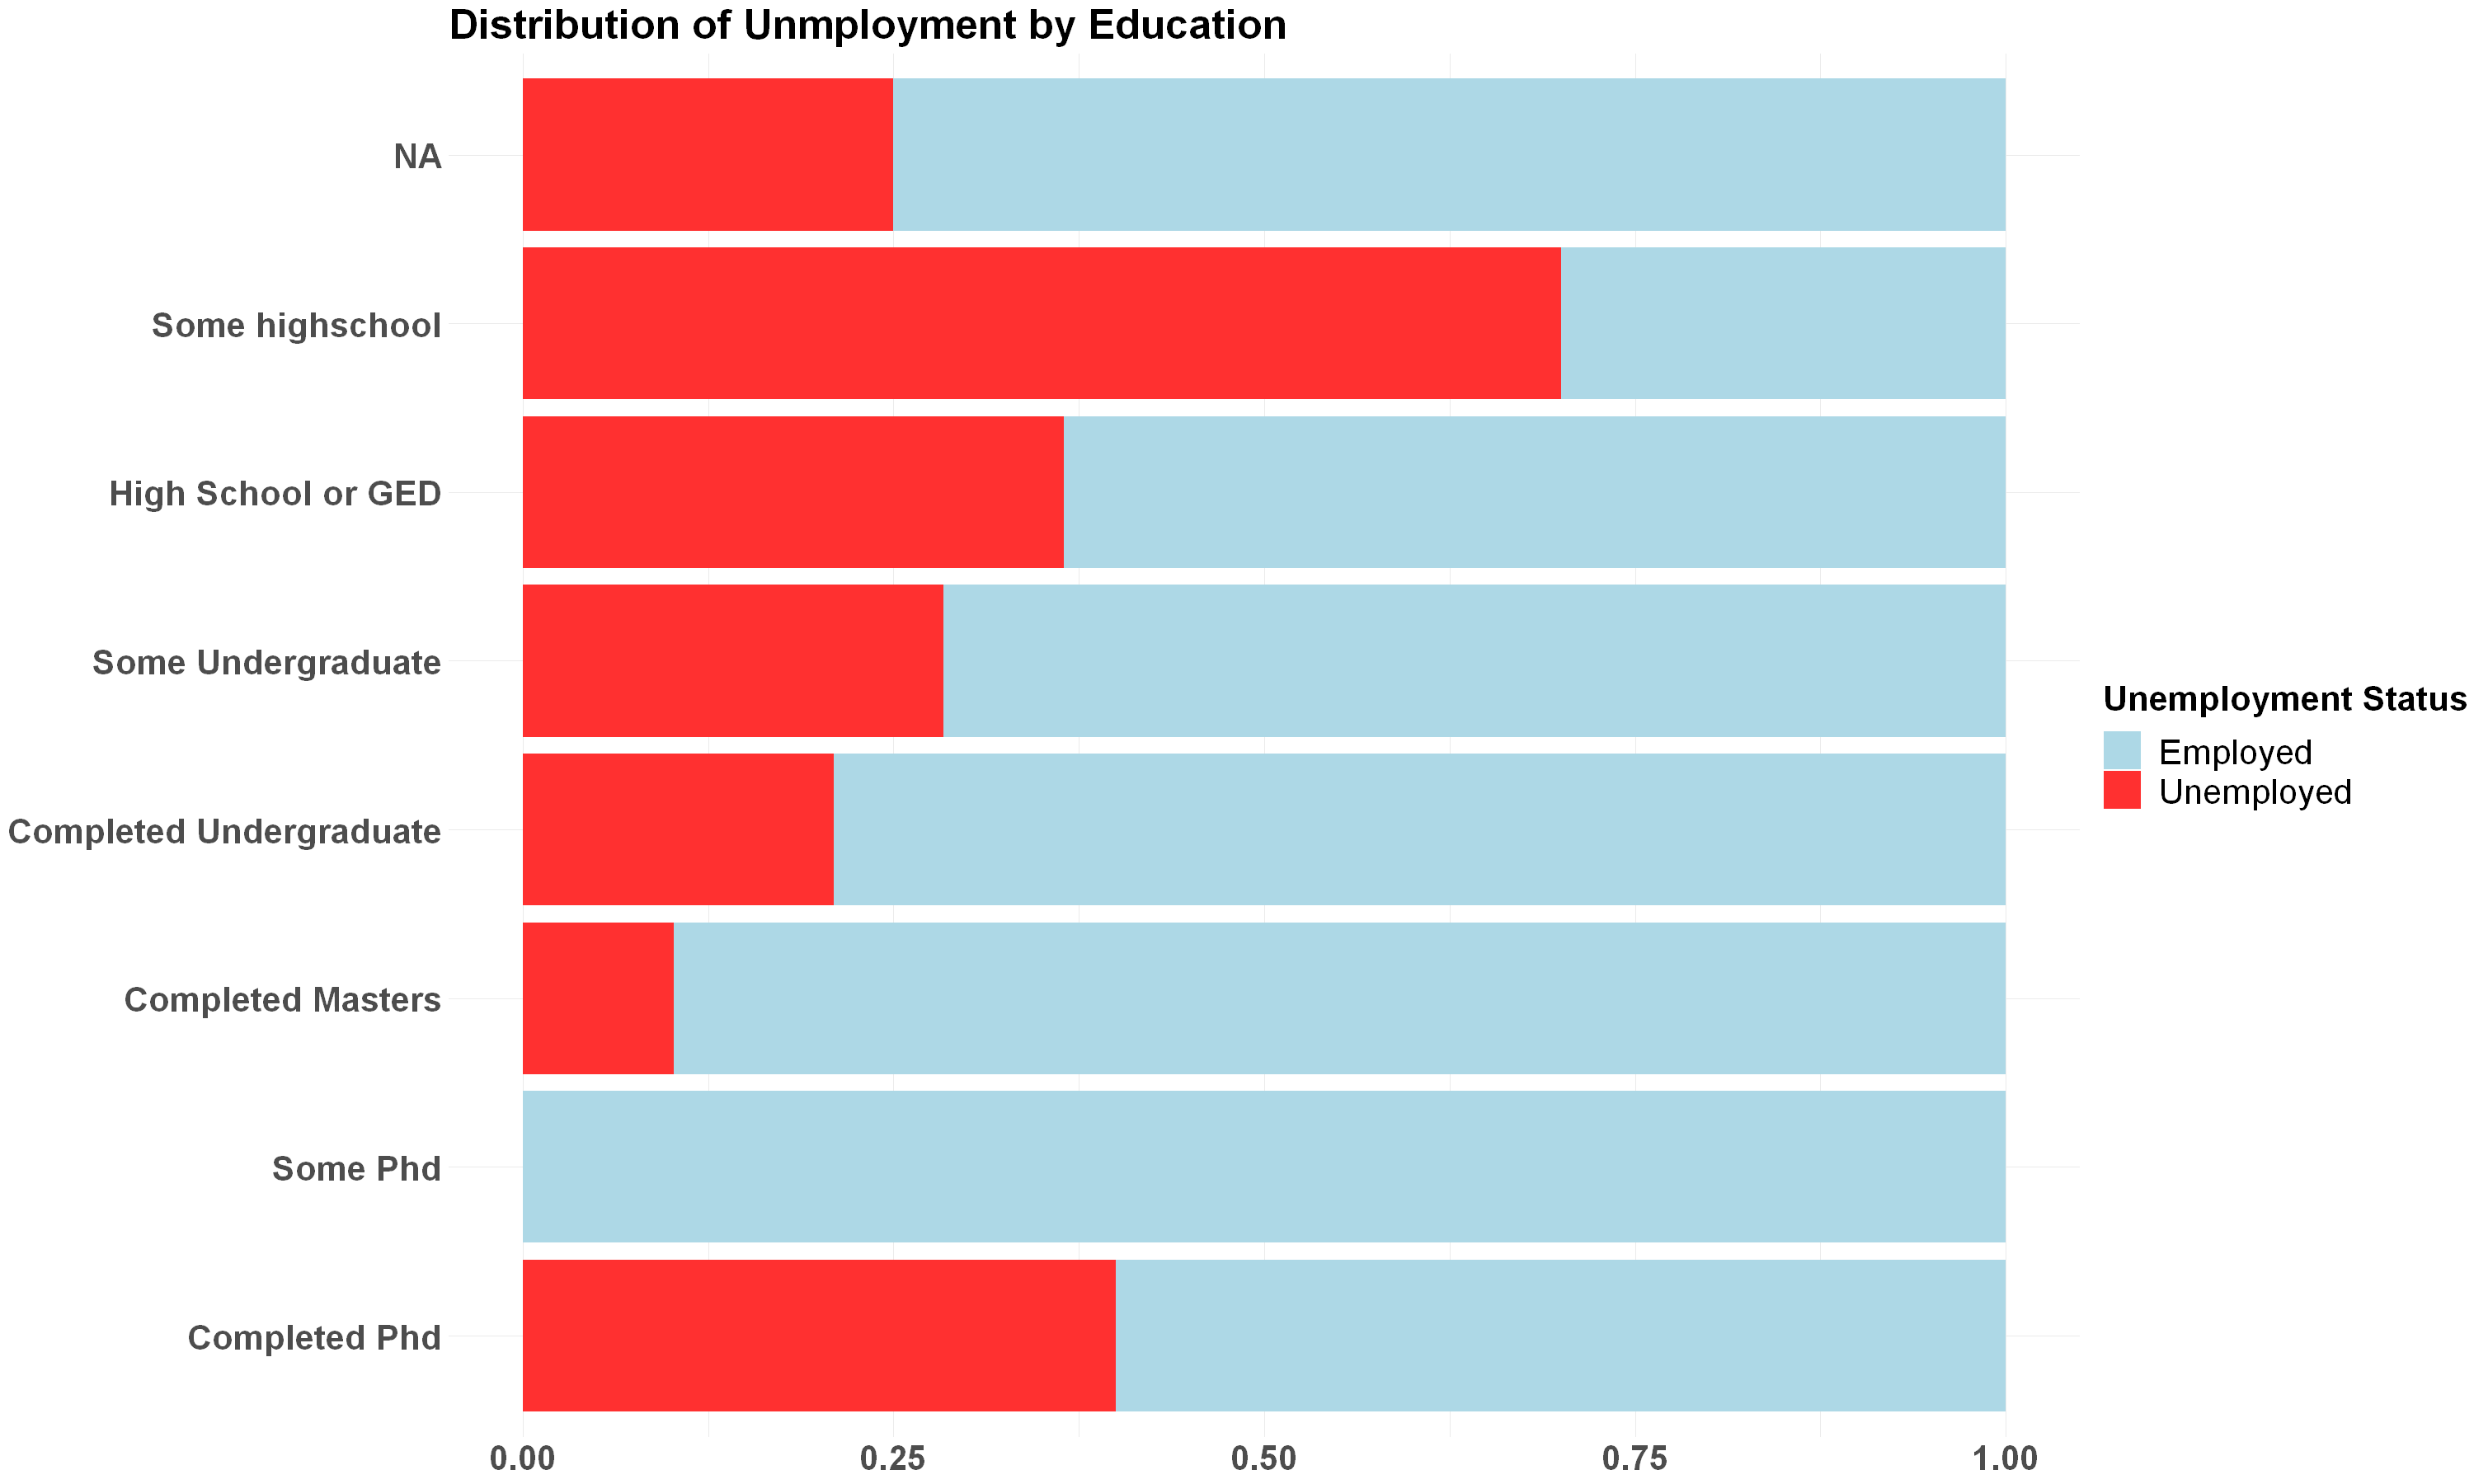

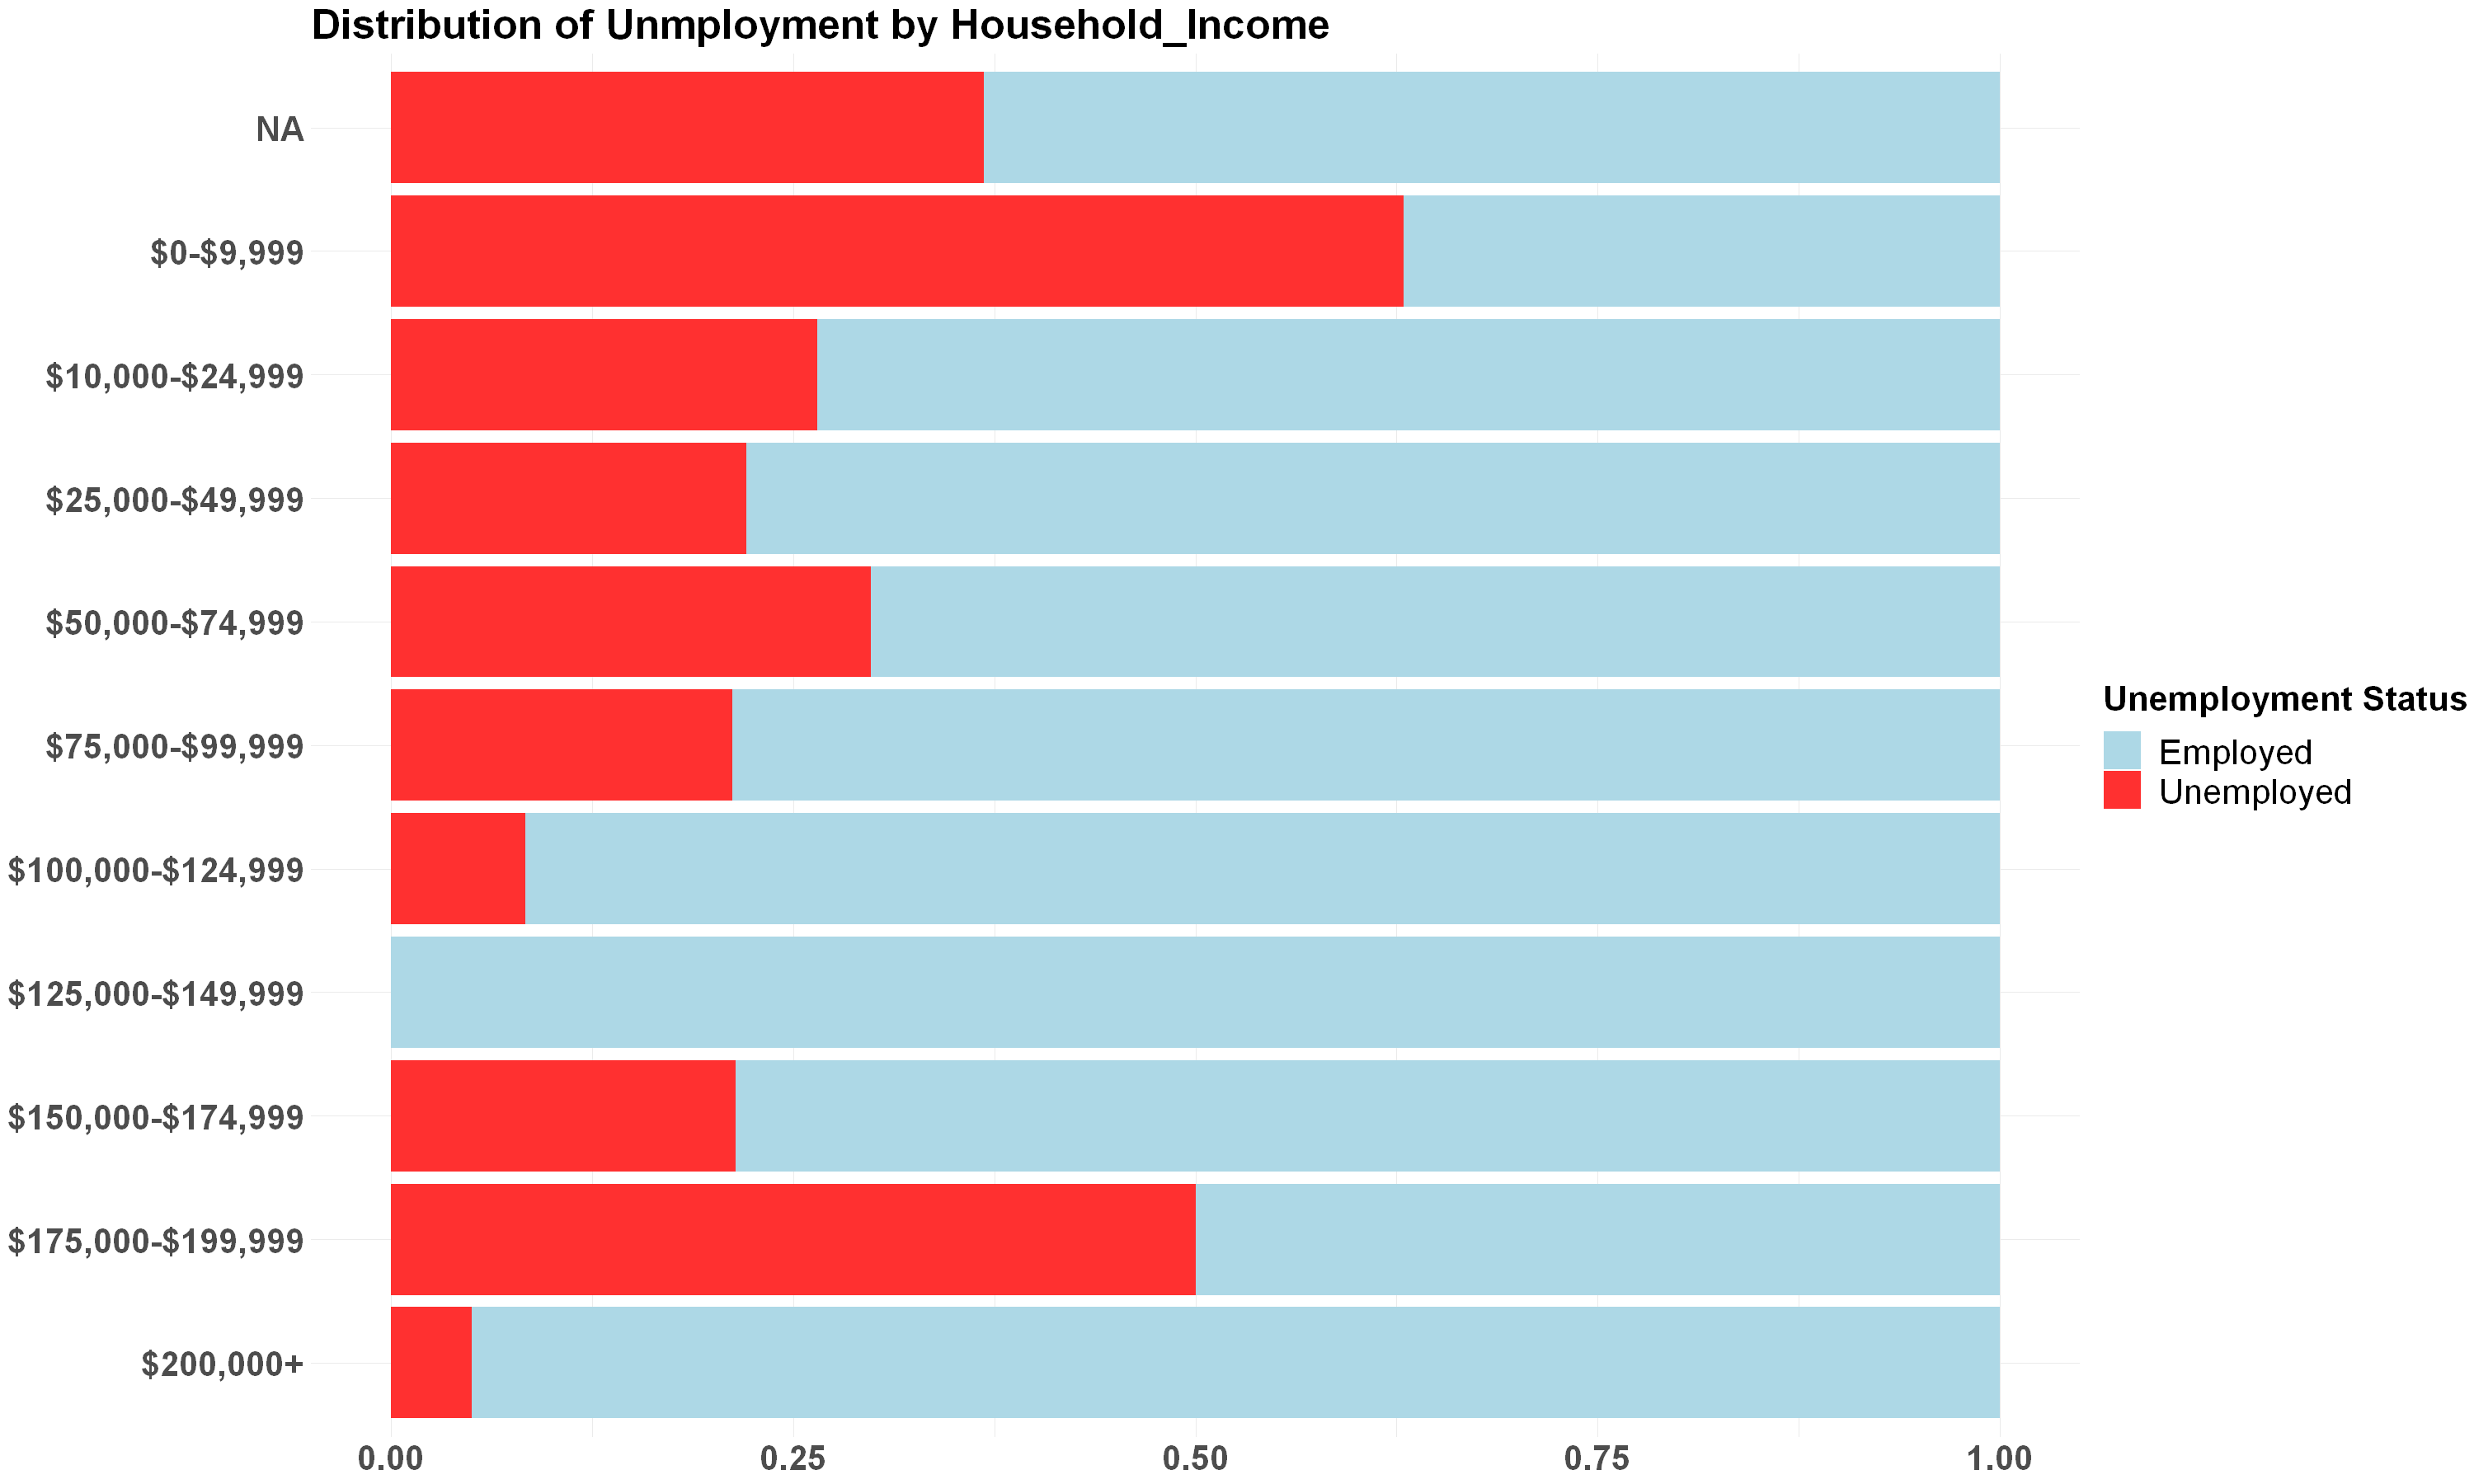

In [22]:
# List of features to plot against Employment
features <- c("Age", "Gender", "Region", "Education", "Household_Income")


df$Unemployed <- factor(df$Unemployed, levels = c(0, 1))

options(repr.plot.width = 25, repr.plot.height = 15)


for (feature in features) {
    print(
        ggplot(df, aes_string(x = feature, fill = "Unemployed")) +
        geom_bar(position = "fill") +
        labs(
            title = paste("Distribution of Unmployment by", feature),
            x = feature,
            y = "Proportion",
            fill = "Unemployment Status") +
        scale_fill_manual(
            values = c("0" = "lightblue", "1" = "firebrick1"),
            labels = c("Employed", "Unemployed")) +
        theme_minimal() +
       theme(
            plot.title = element_text(size = 30, face = "bold"),
            axis.title.x = element_blank(), 
            axis.title.y = element_blank(),
            axis.text.x = element_text(size = 25, face = "bold"),
            axis.text.y = element_text(size = 25, face = "bold"),
            legend.text = element_text(size = 25),
            legend.title = element_text(size = 25, face = "bold"),  
            legend.key.size = unit(2, "lines") 
            ) +
        coord_flip()
    )
}

# 

Similar to what have been observed before:

- Unemployment rates increase as an individual tends to be younger and increase again once they're older than 60 possibly suggesting retirement.

- There isn't a significant gender disparity for unemployment rates between both genders. Females, however, show a slight increase.

- East North Central & West North Central regions show the highest unemployment rates and the Atlantic regions show the lowest.

- Unemployment rates decrease with a higher education level attained which is expected.

- Device type doesn't seem to be of significance.

- Unemployment rates decrease with higher household income ranges.

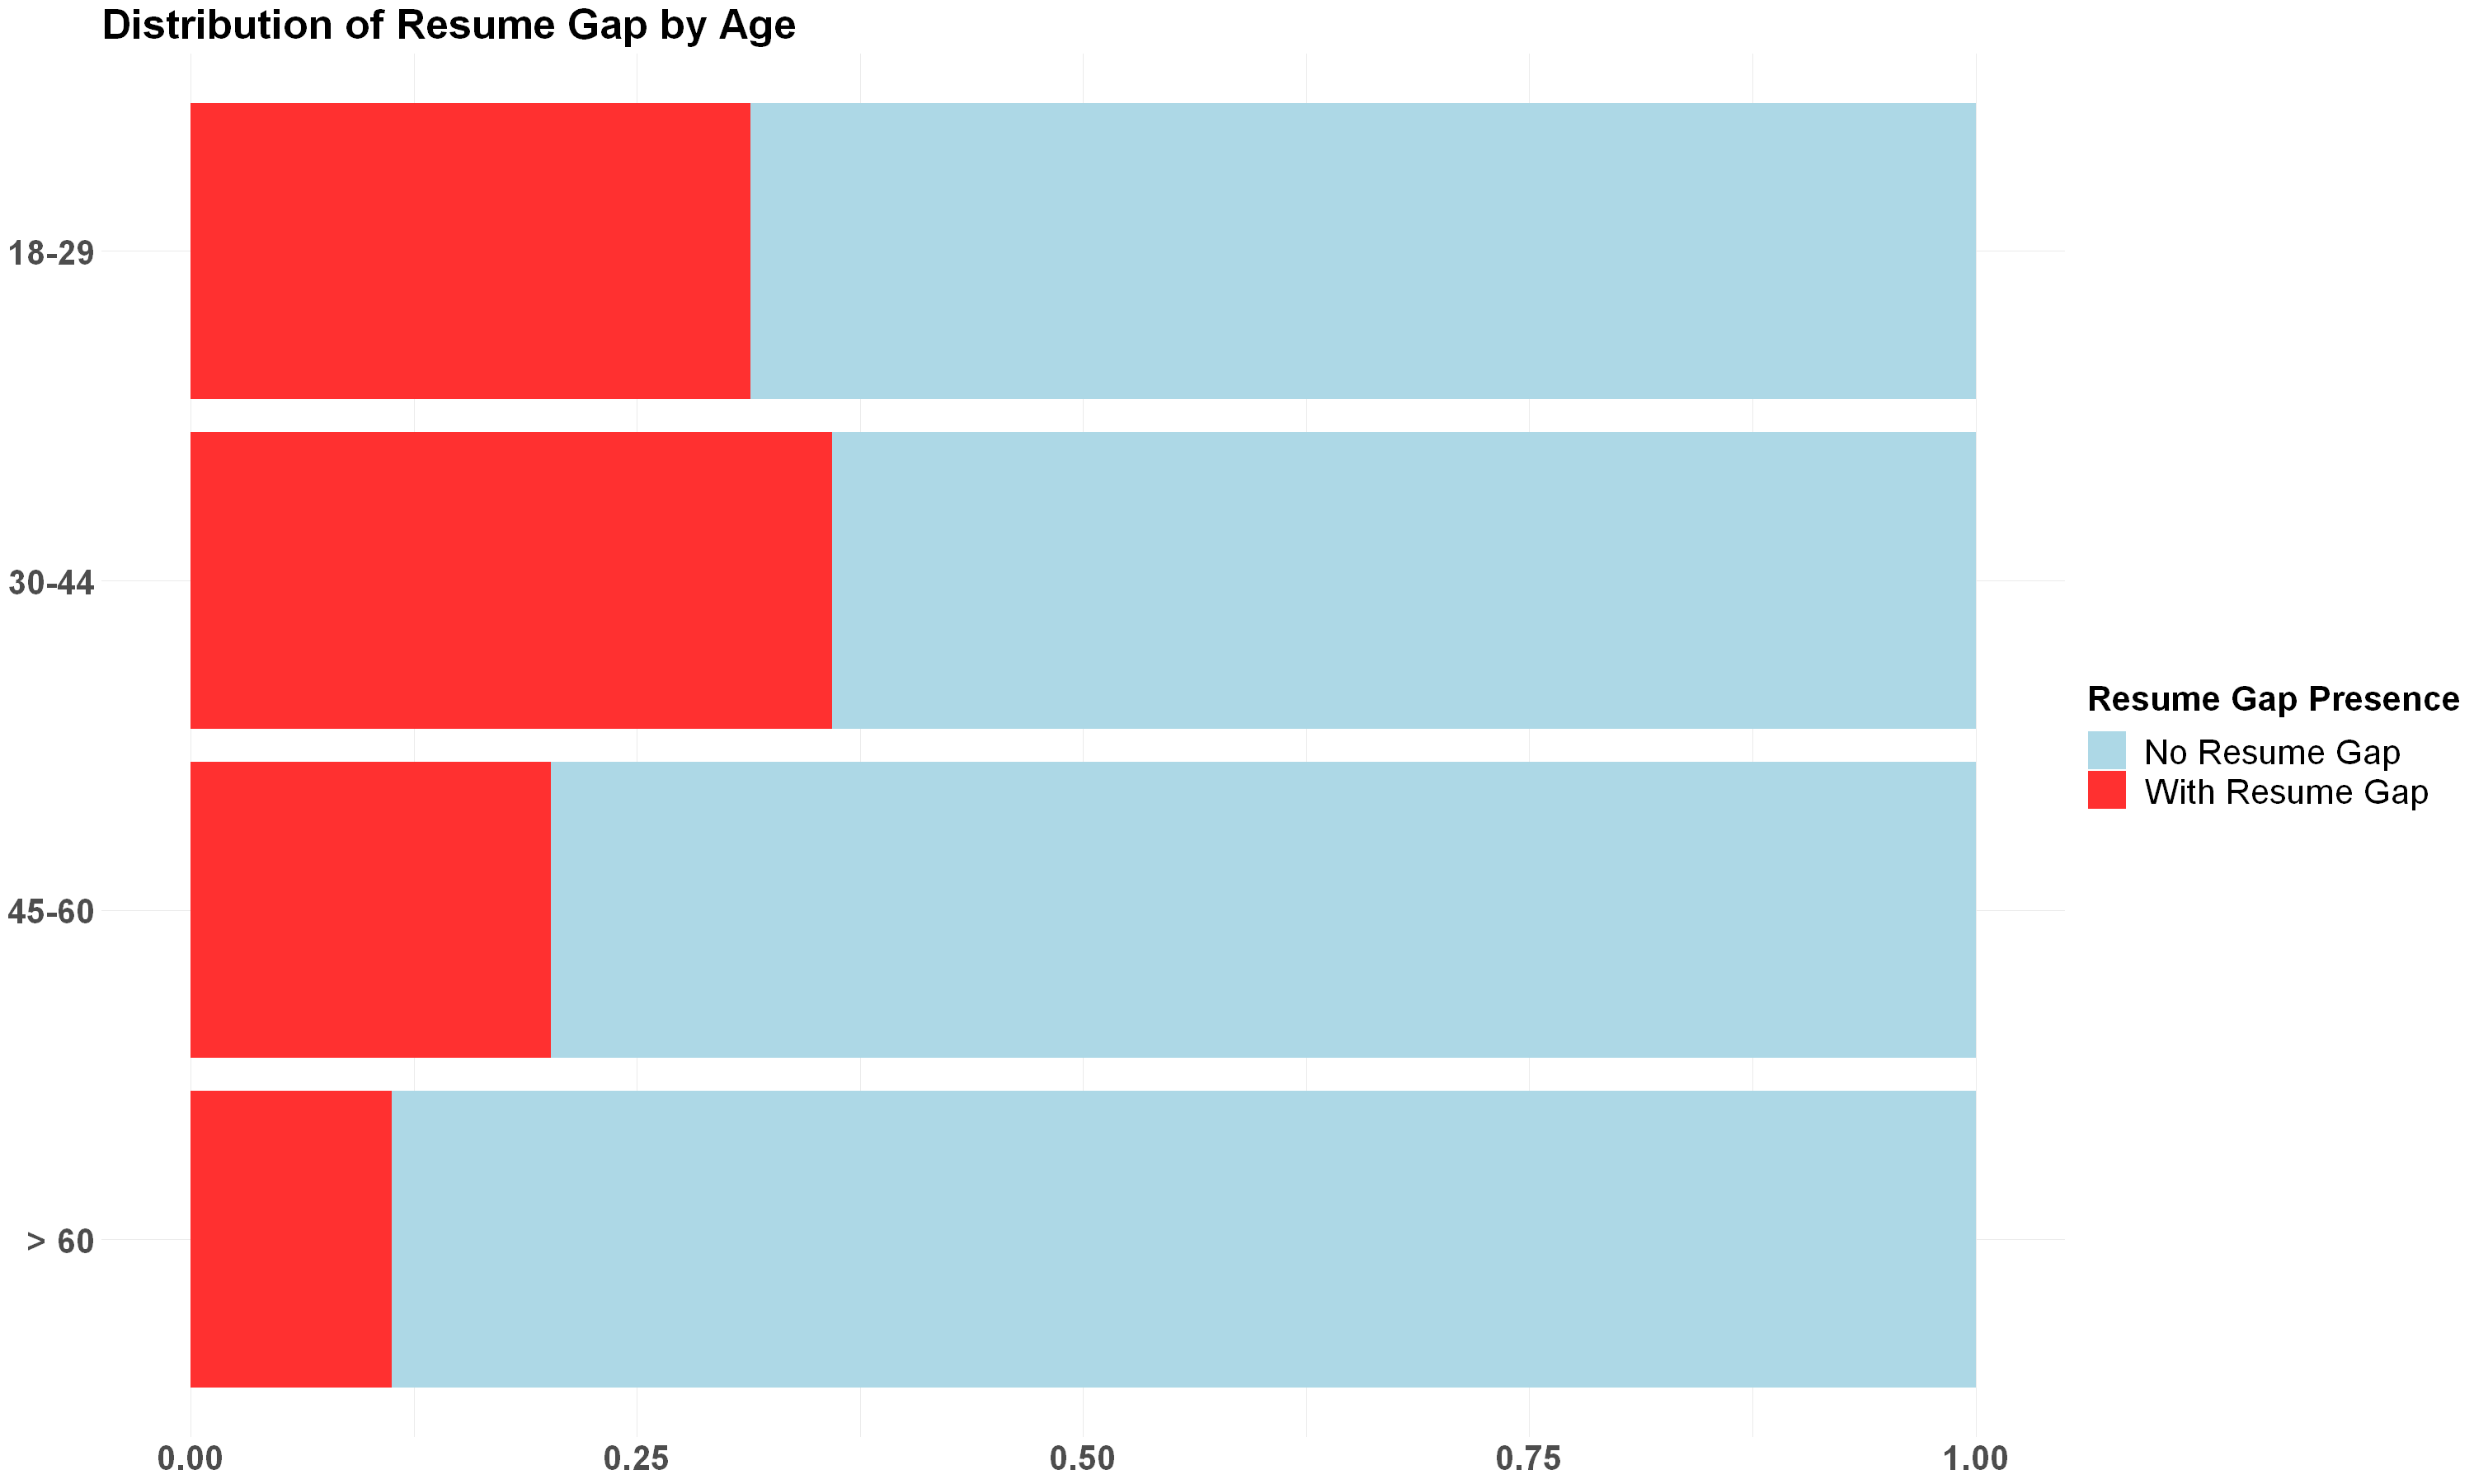

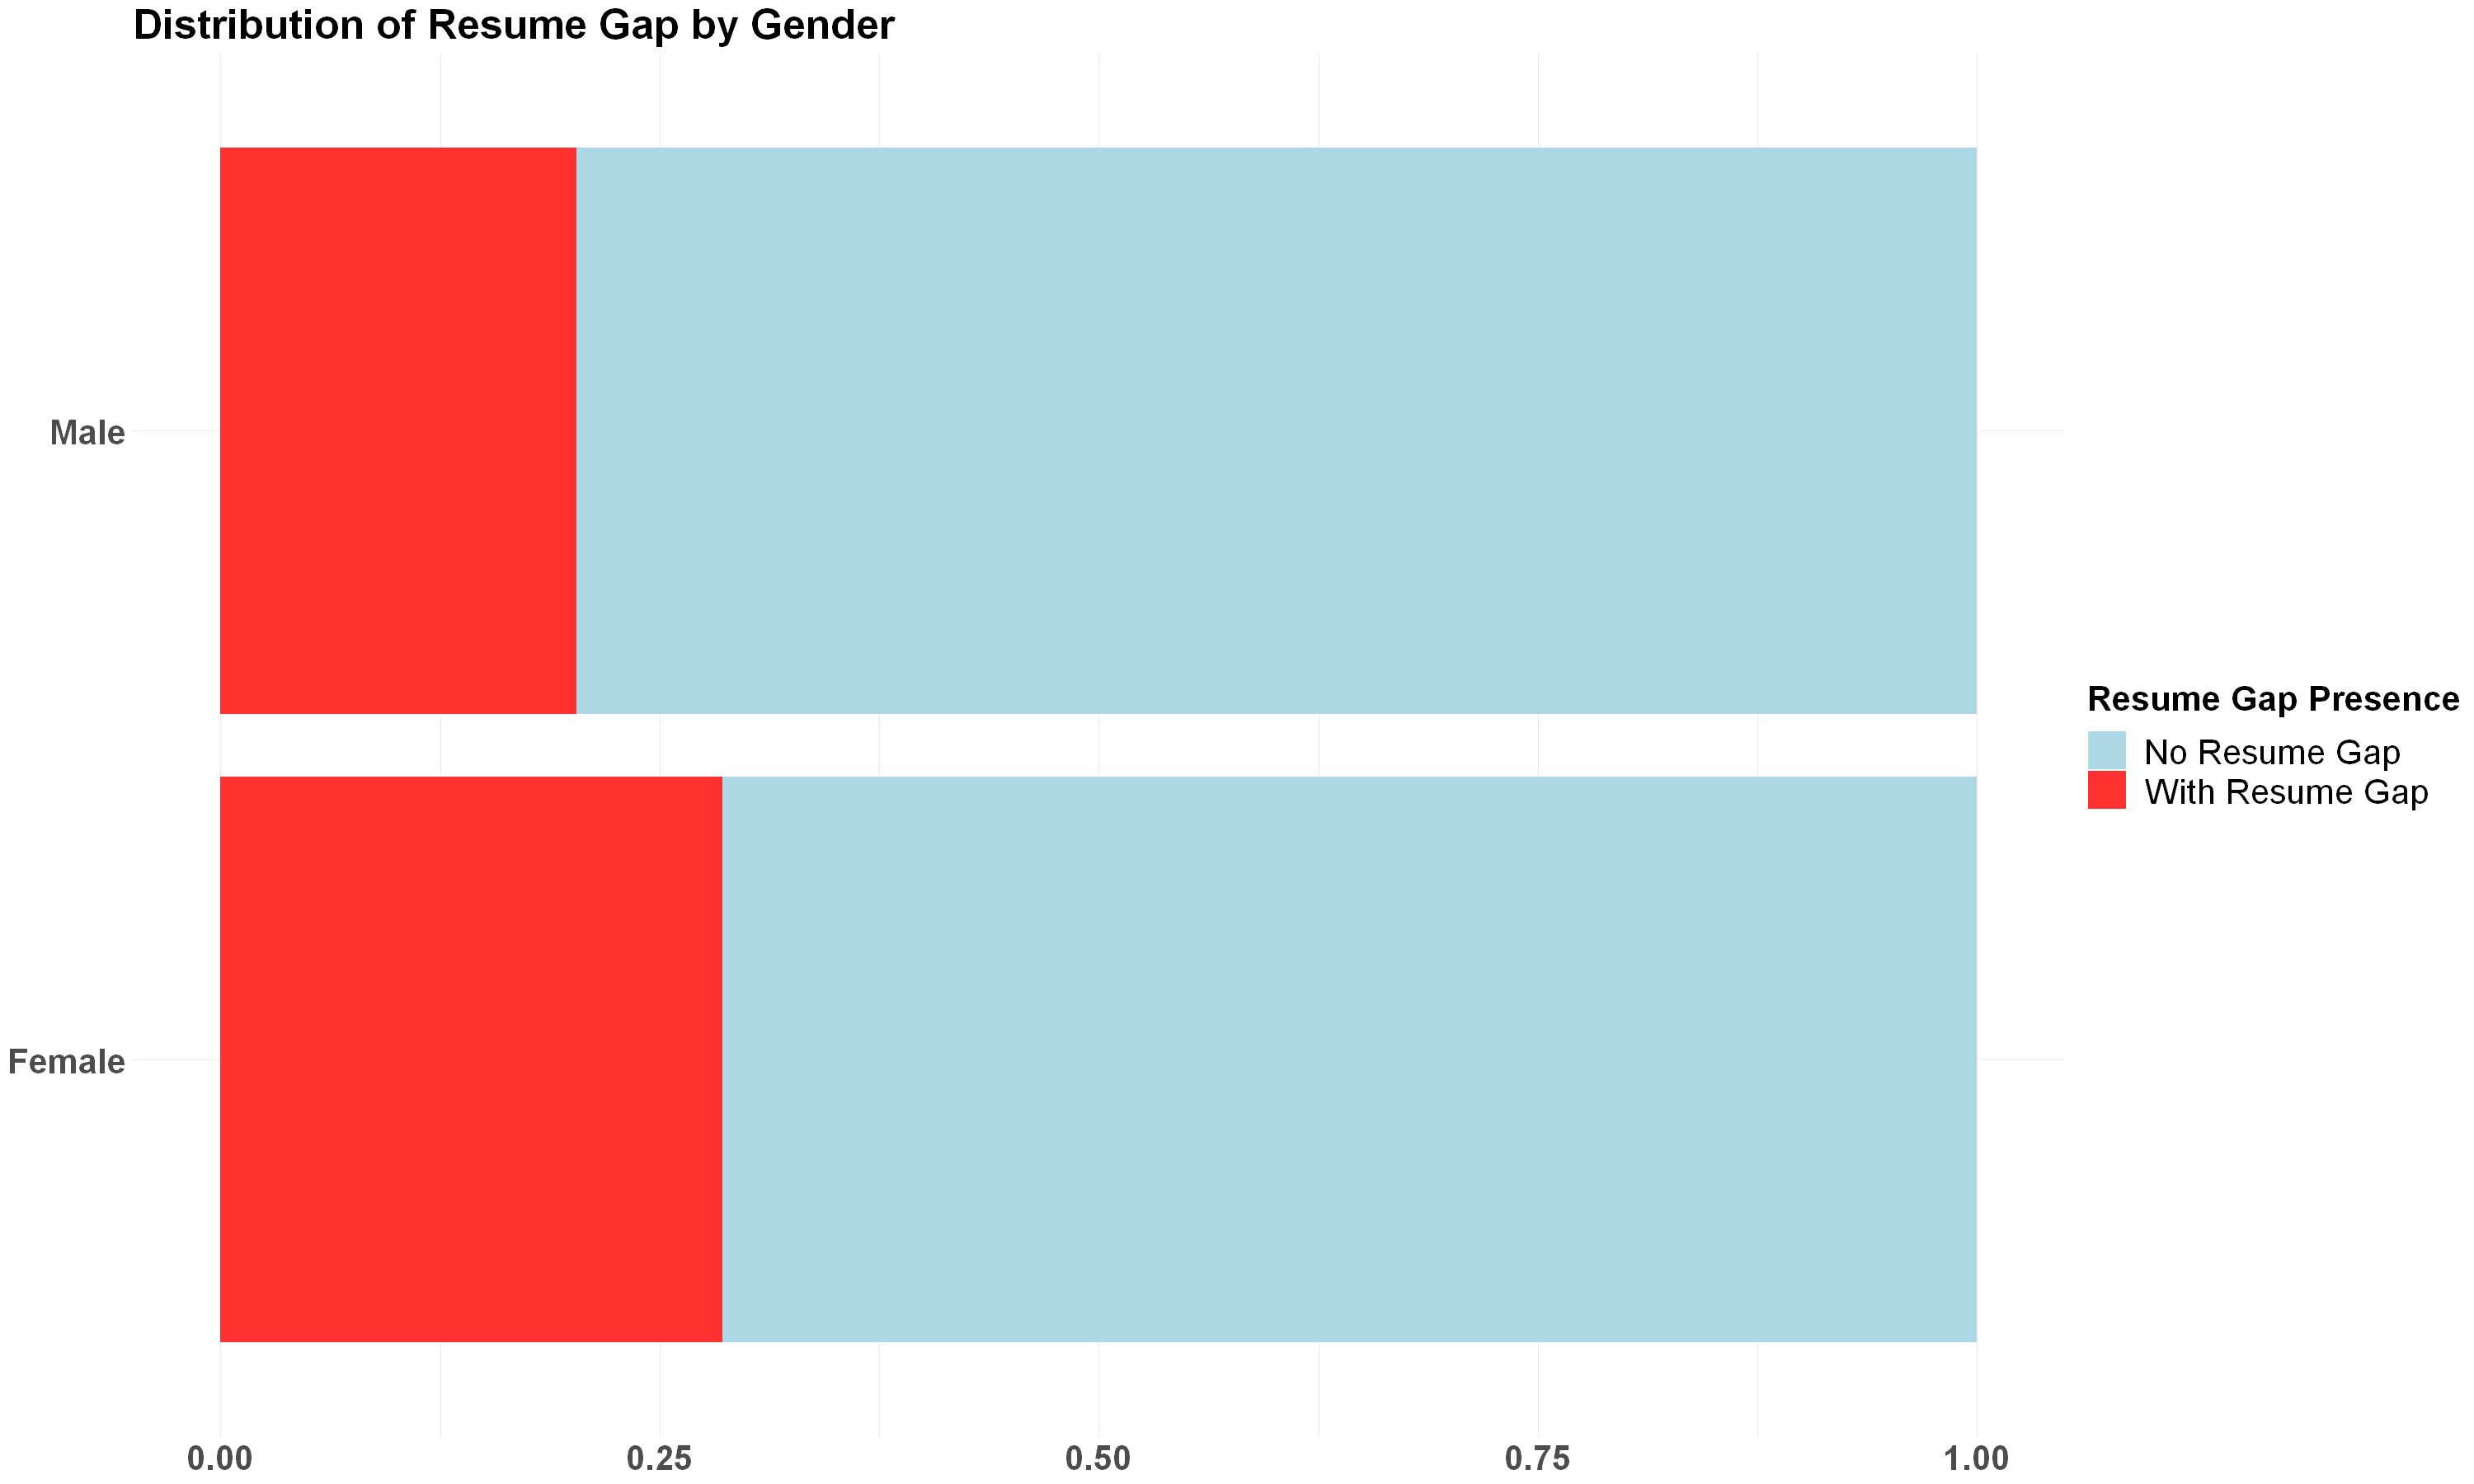

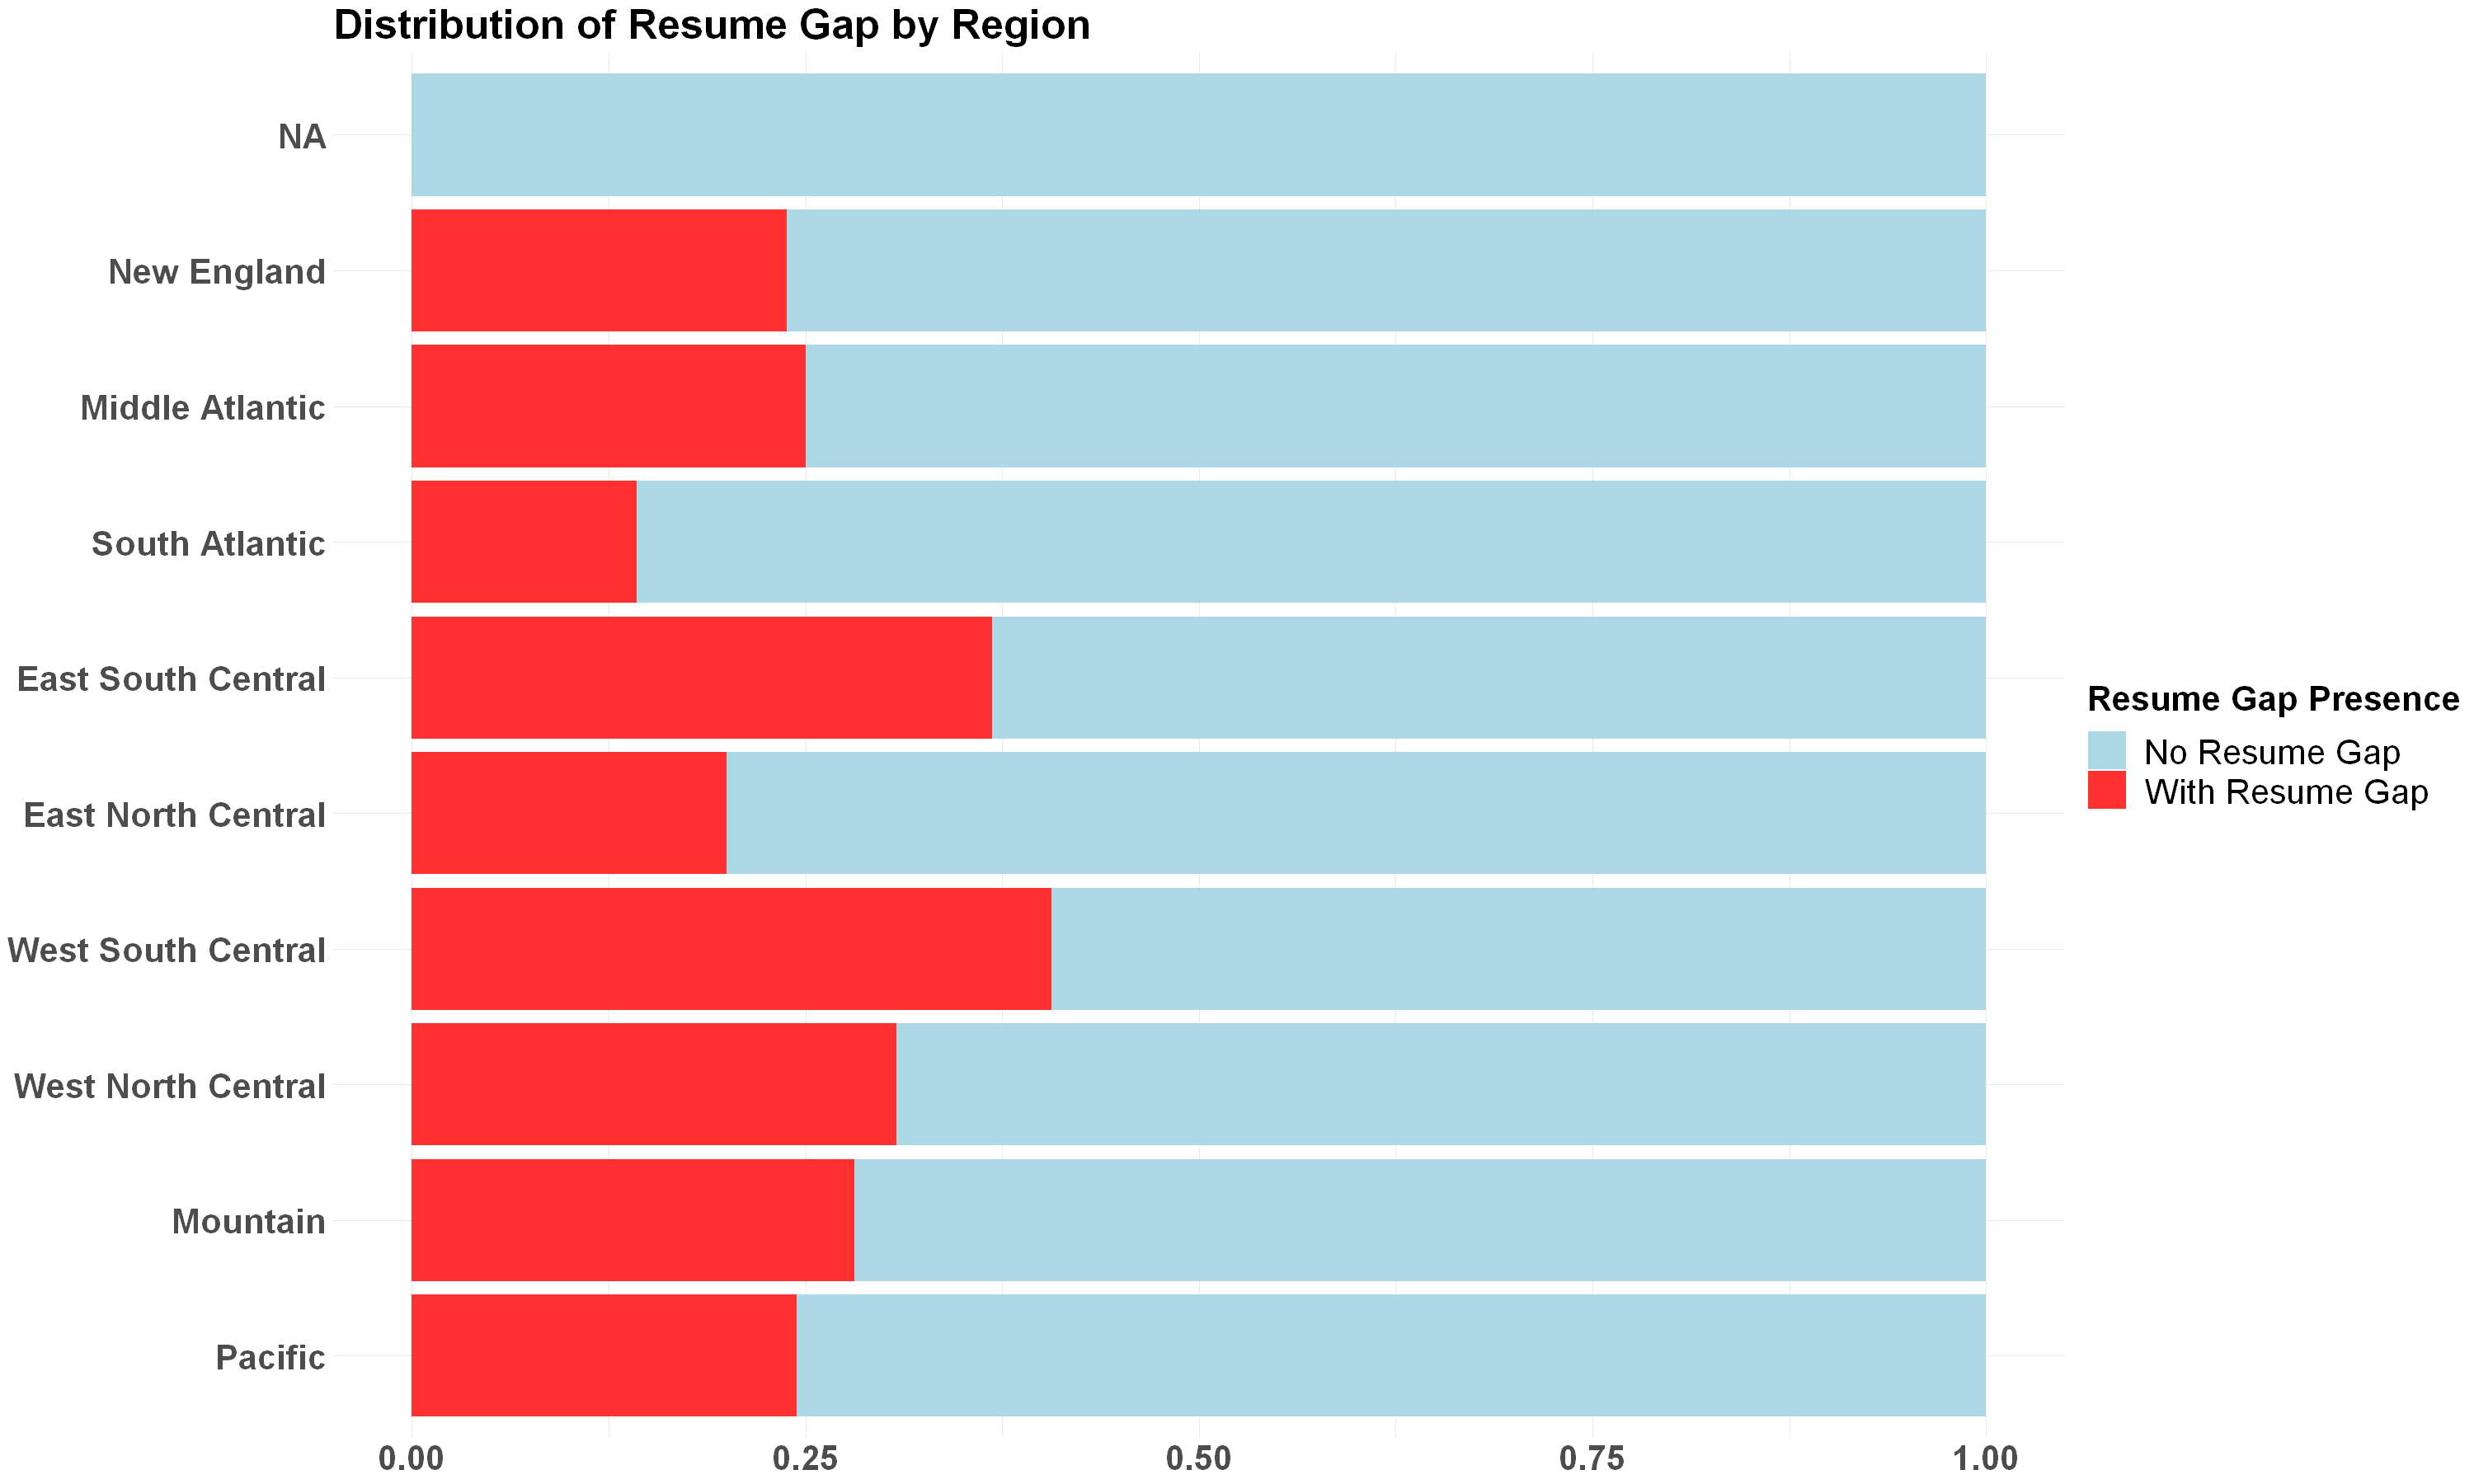

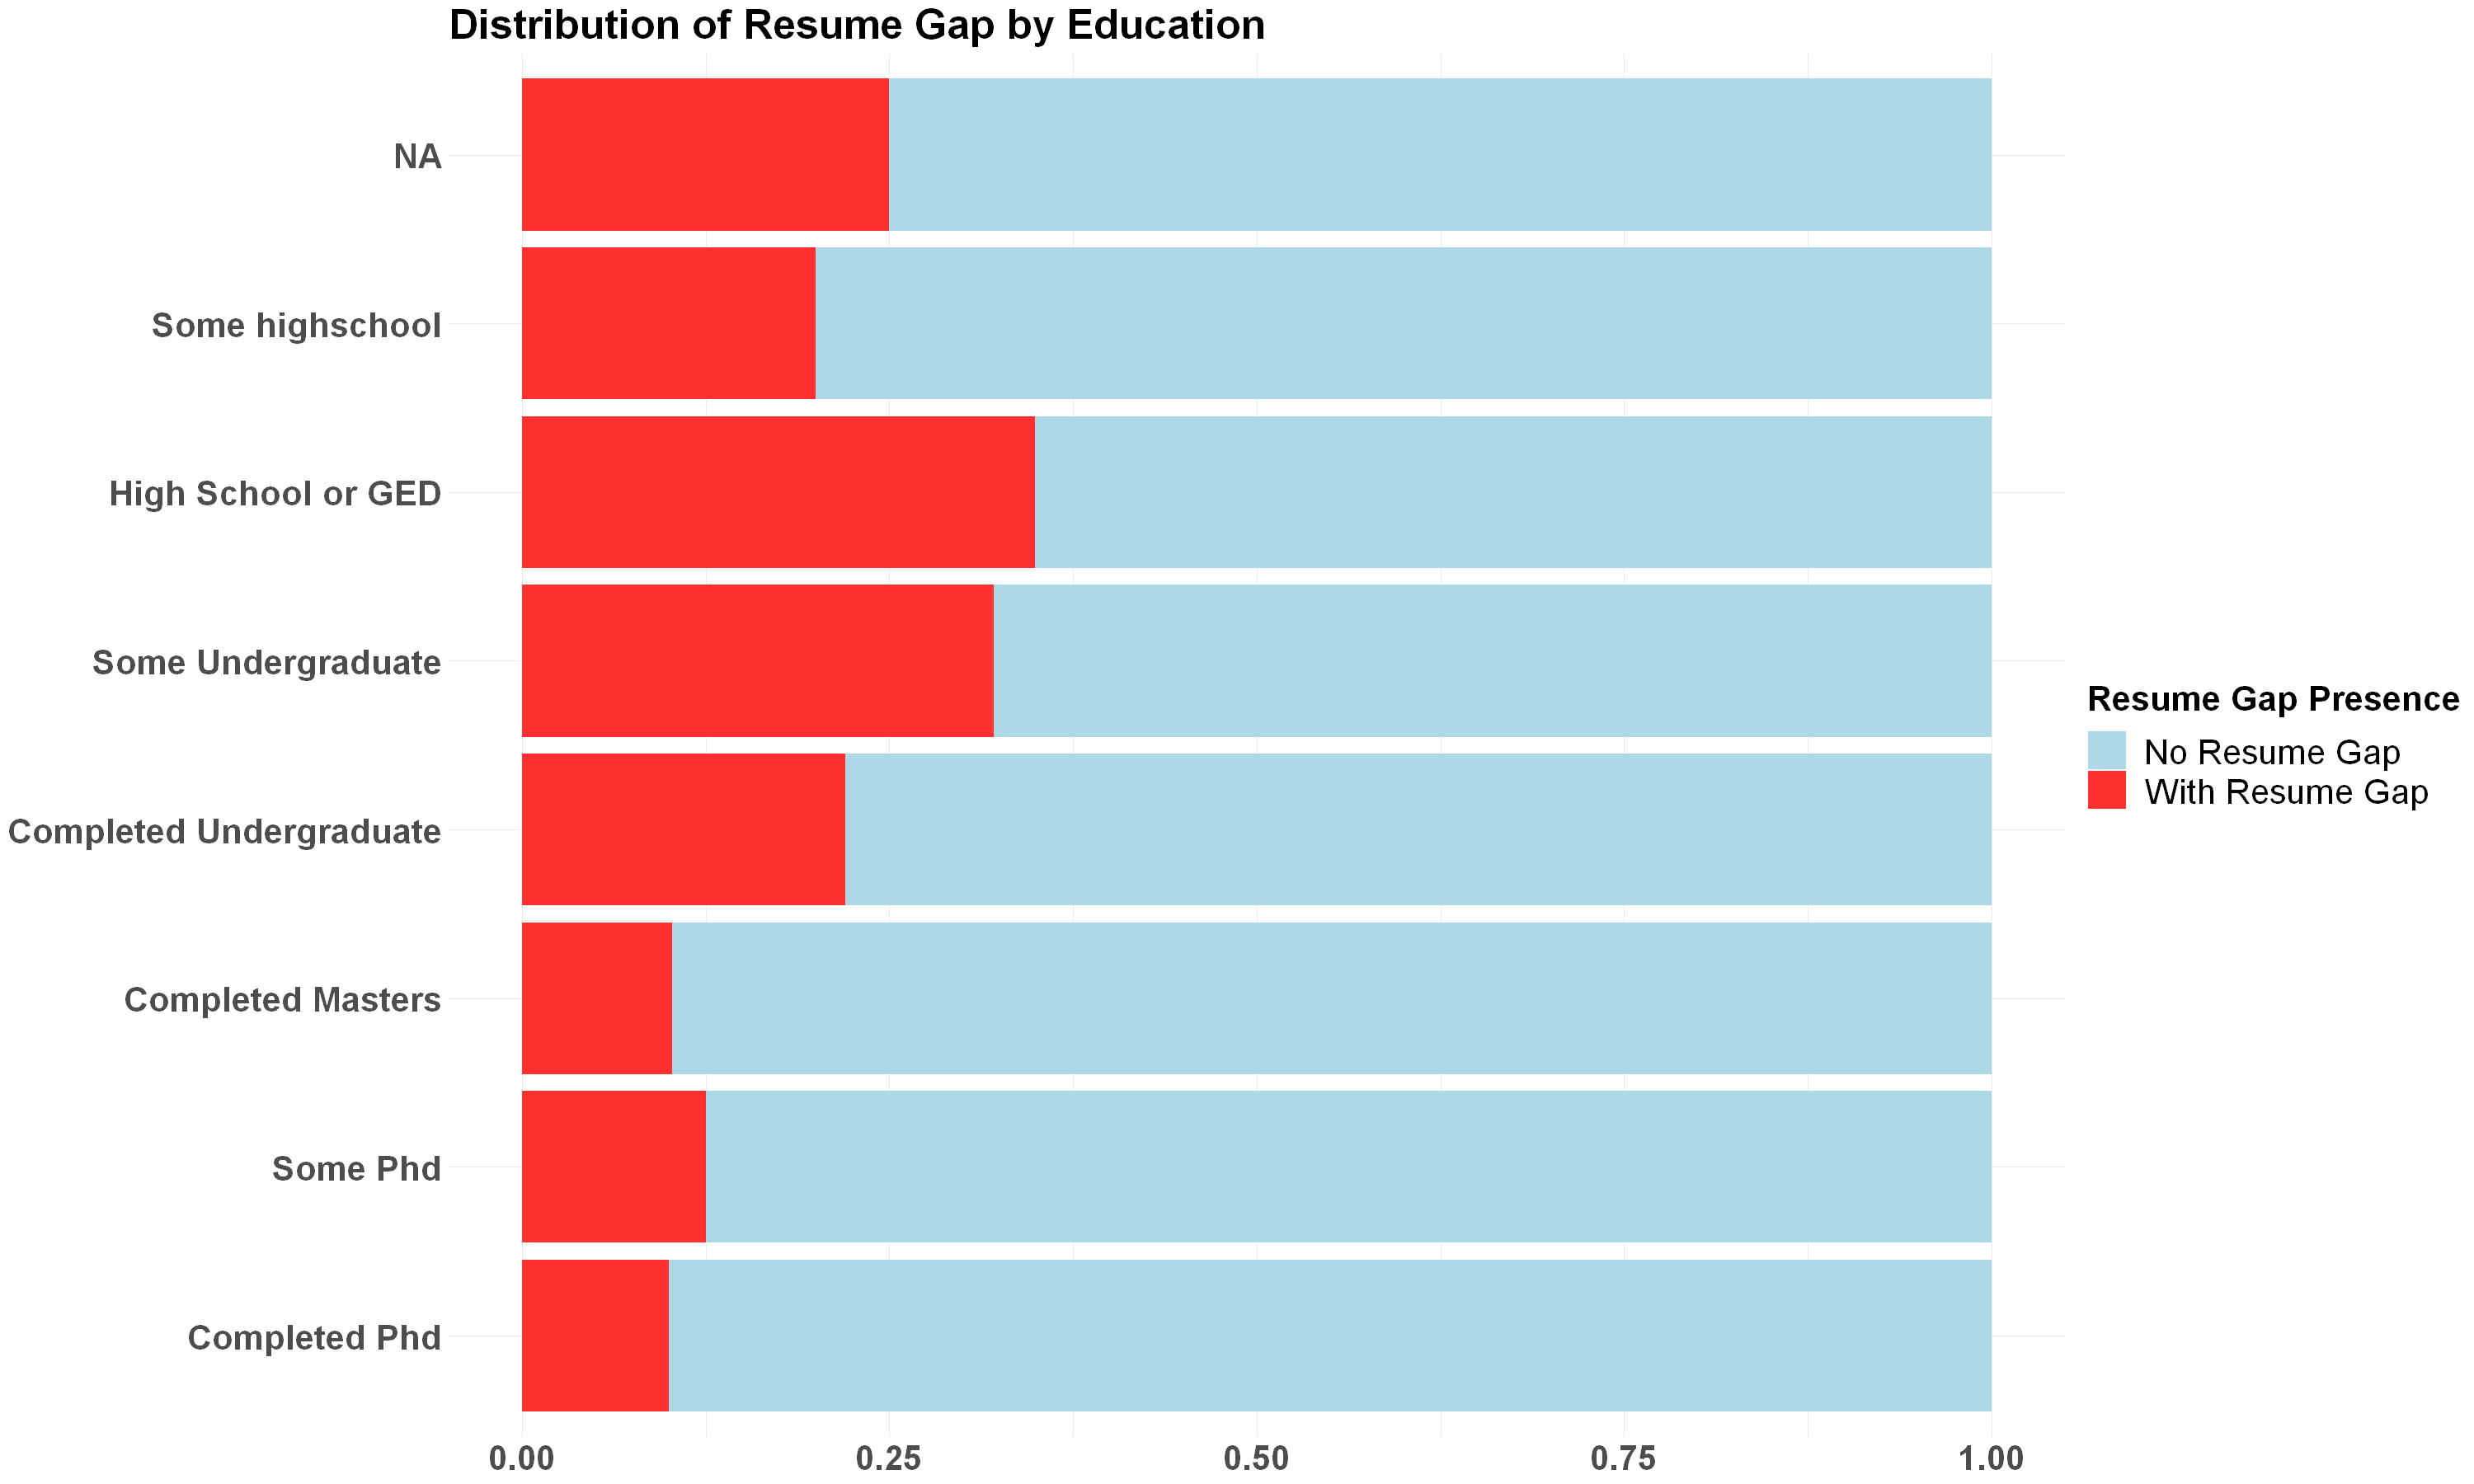

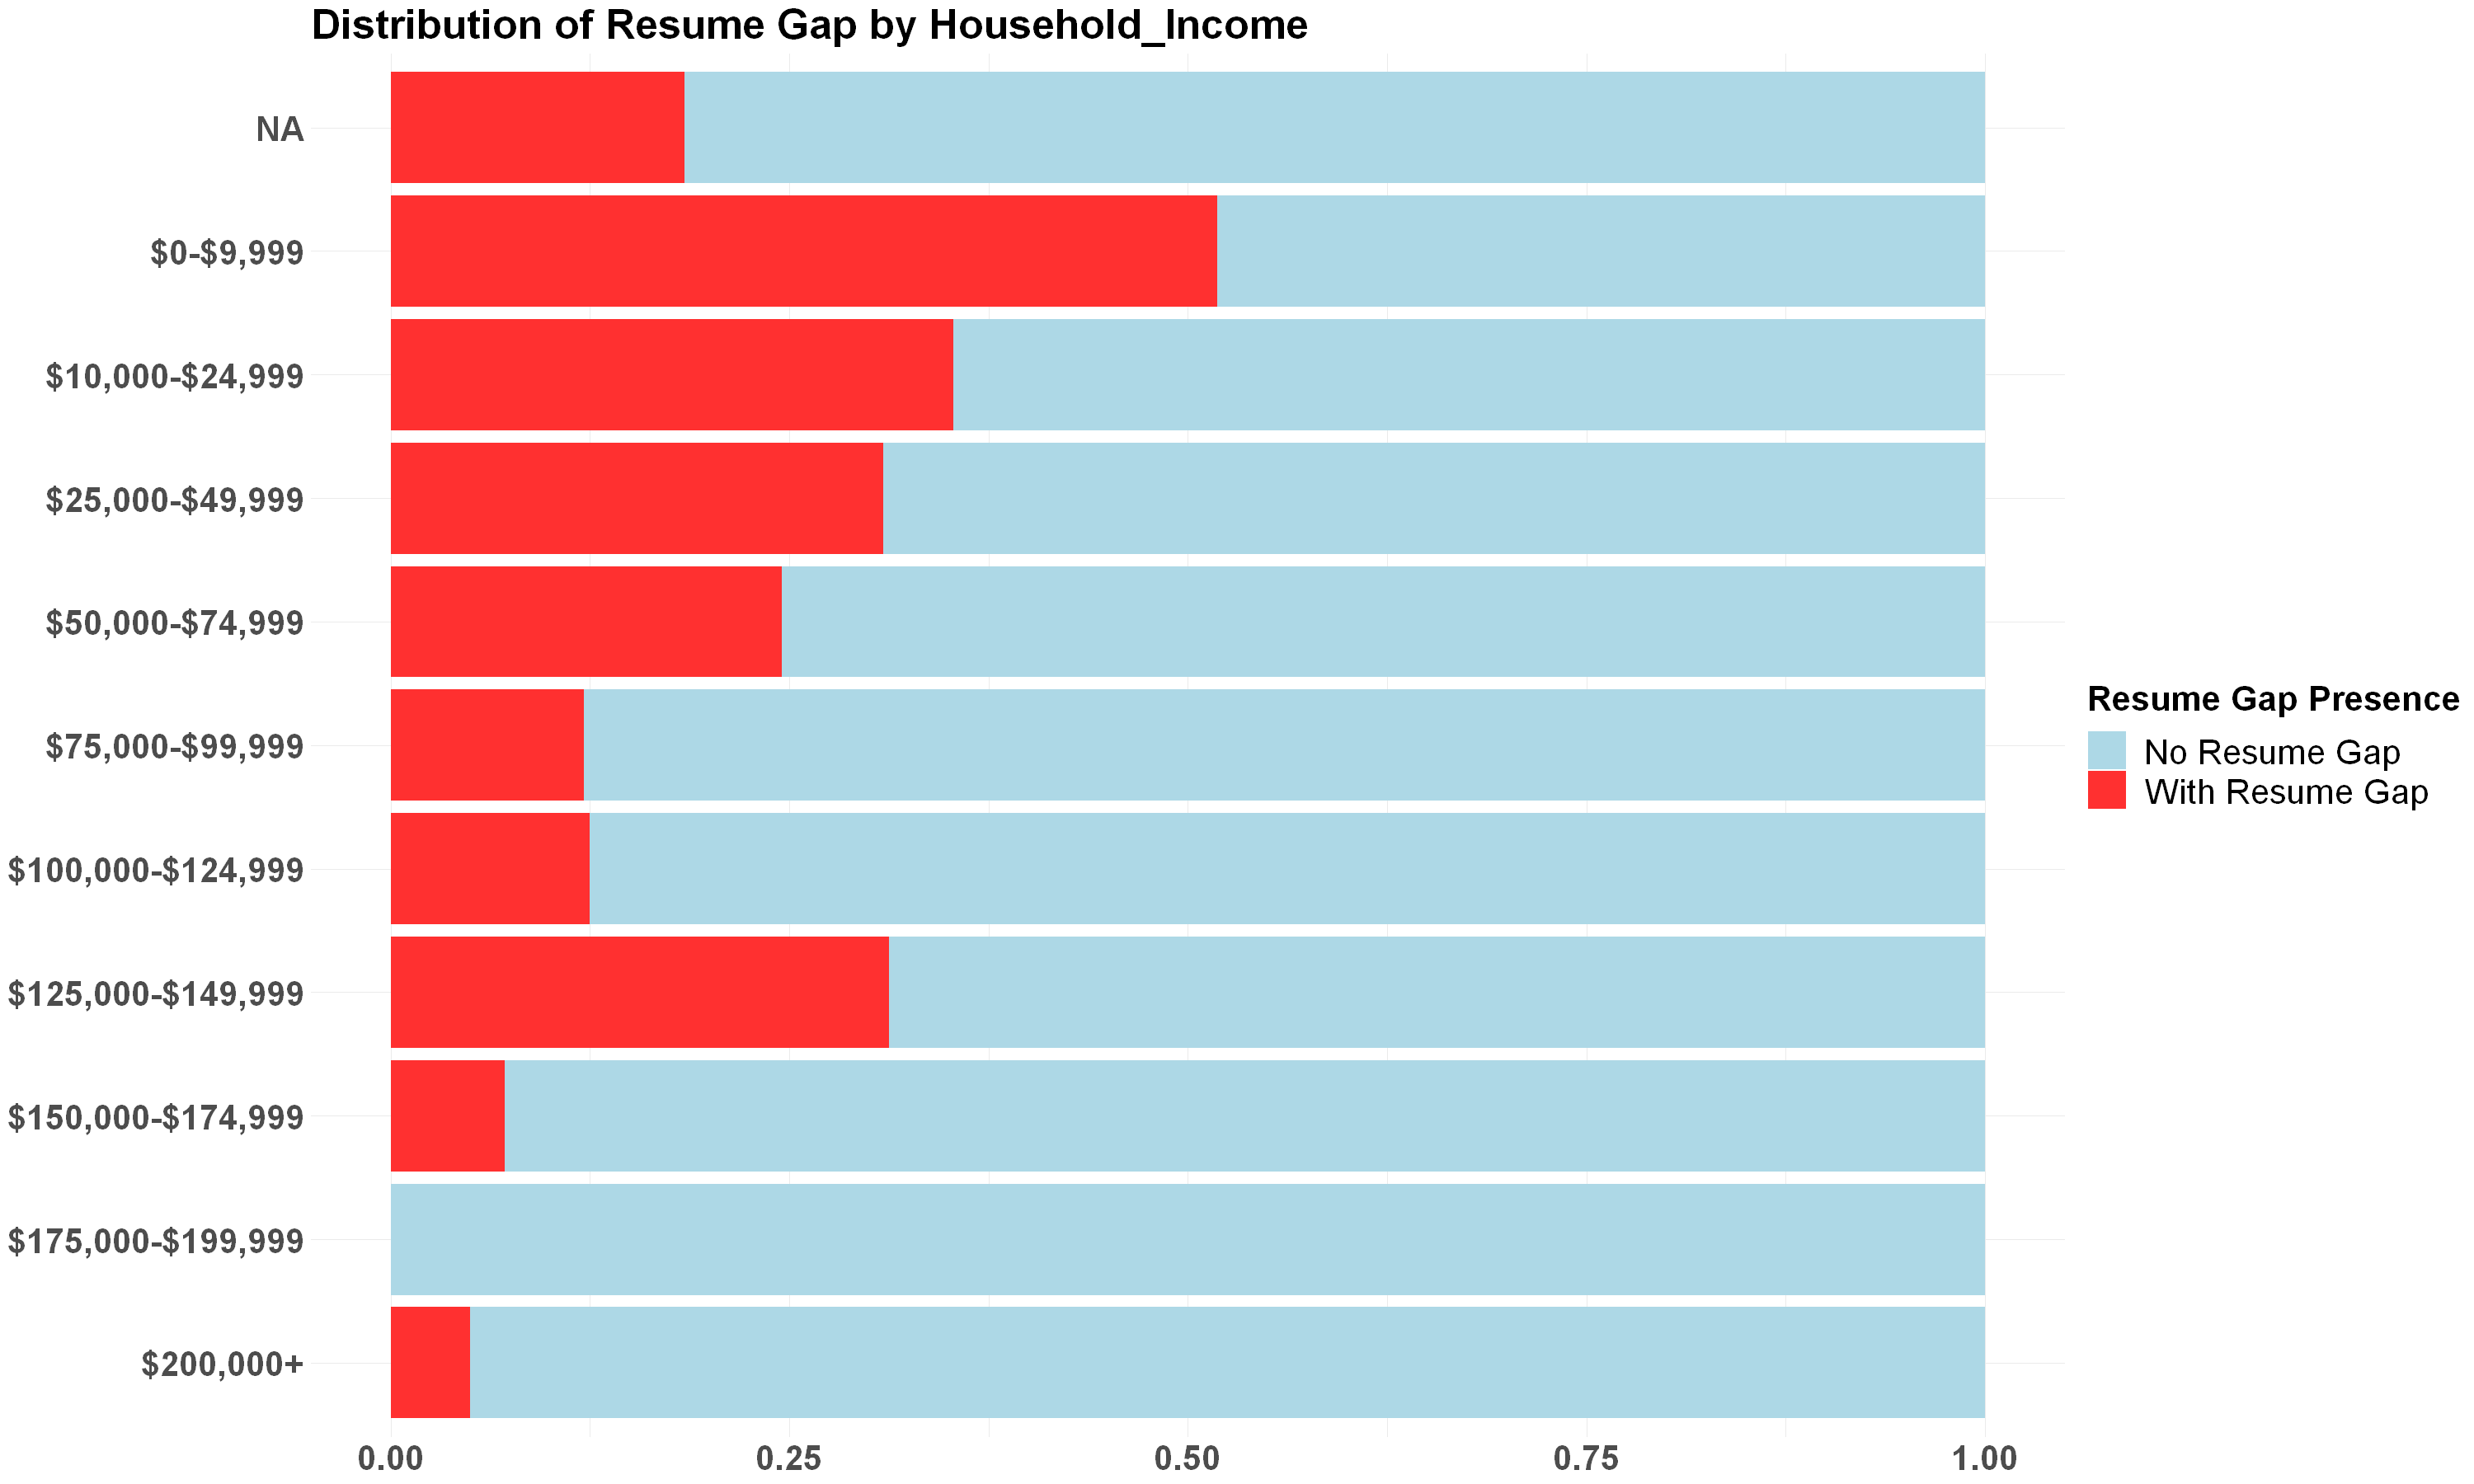

In [23]:
# List of features to plot against Resume Gap
features <- c("Age", "Gender", "Region", "Education", "Household_Income")

df$Resume_Gap <- factor(df$Resume_Gap , levels = c(0, 1))

options(repr.plot.width = 25, repr.plot.height = 15)

for (feature in features) {
    print(
        ggplot(df, aes_string(x = feature, fill = "Resume_Gap")) +
        geom_bar(position = "fill") +
        labs(title = paste("Distribution of Resume Gap by", feature),
             x = feature,
             y = "Proportion",
             fill = "Resume Gap Presence") +
        scale_fill_manual(values = c("0" = "lightblue", "1" = "firebrick1"),
                          labels = c("No Resume Gap", "With Resume Gap")) +
        theme_minimal() +
         theme(
            plot.title = element_text(size = 30, face = "bold"),
            axis.title.x = element_blank(), 
            axis.title.y = element_blank(),
            axis.text.x = element_text(size = 25, face = "bold"),
            axis.text.y = element_text(size = 25, face = "bold"),
            legend.text = element_text(size = 25),
            legend.title = element_text(size = 25, face = "bold"),  
            legend.key.size = unit(2, "lines") 
            ) +
        coord_flip()
    )
}

## How do various socioeconomic and demographic factors interact to influence the prevalence of mental illness? Are there identifiable patterns that suggest specific subgroups within the population are more vulnerable to mental health challenges?

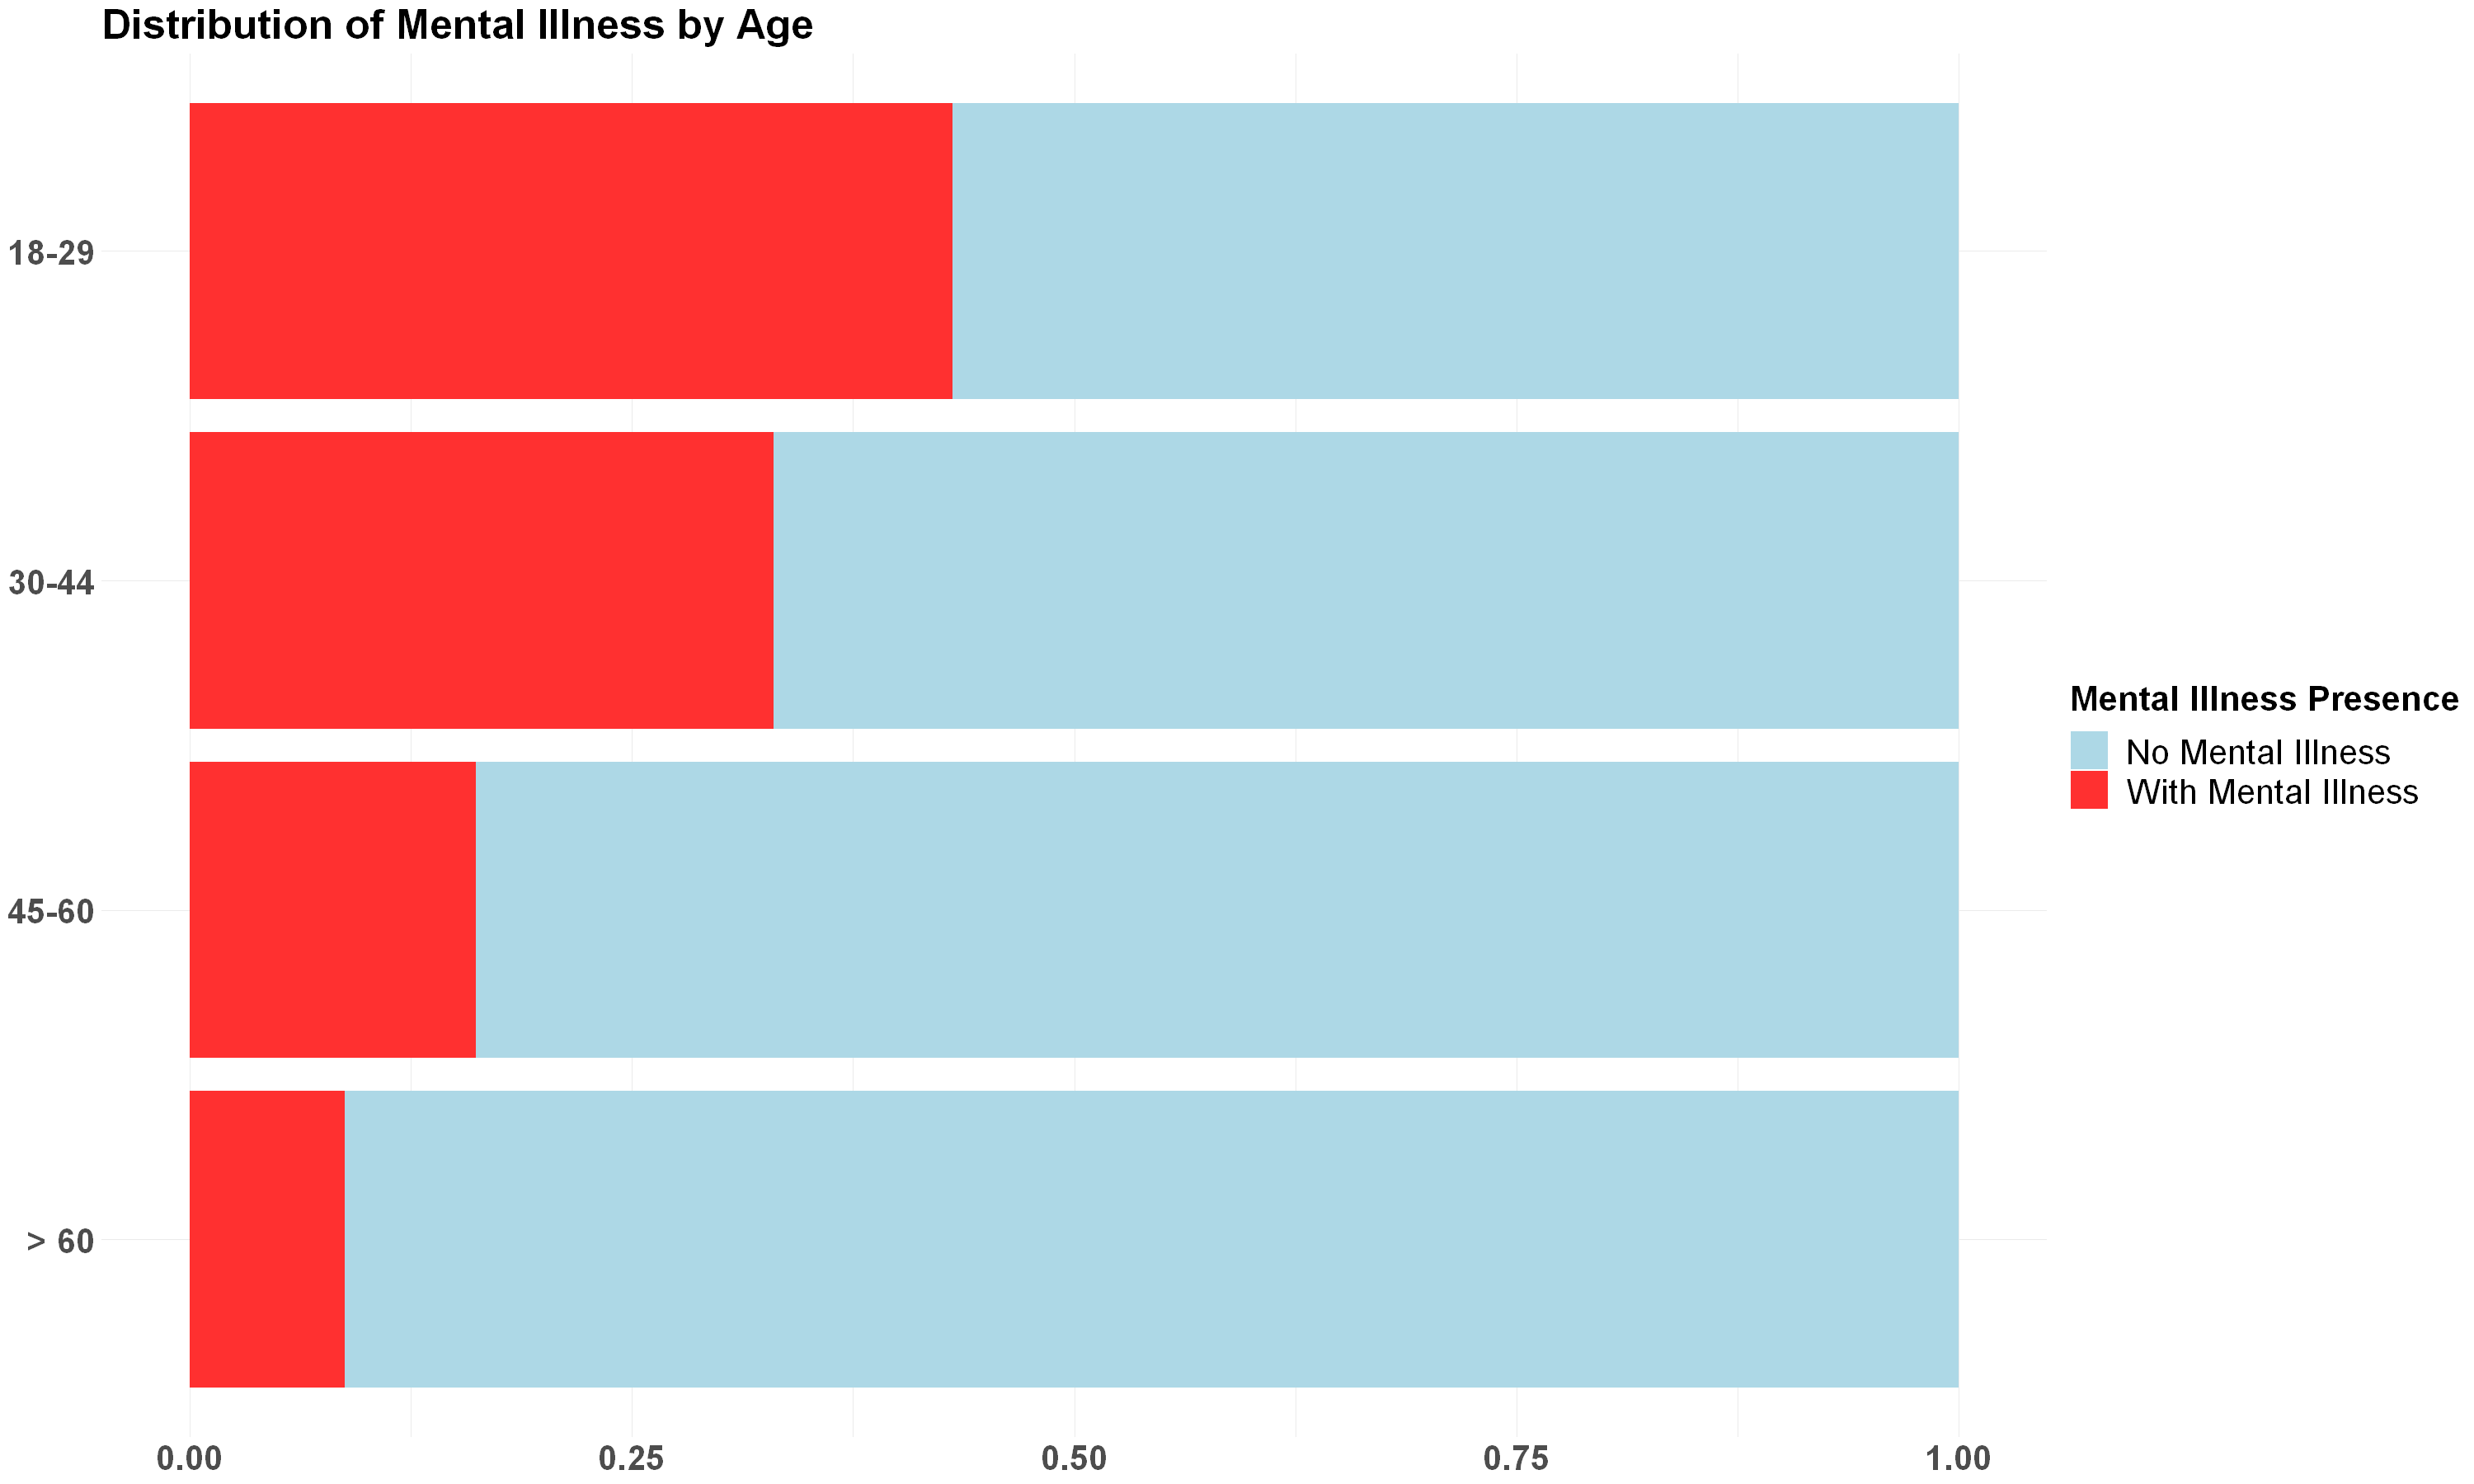

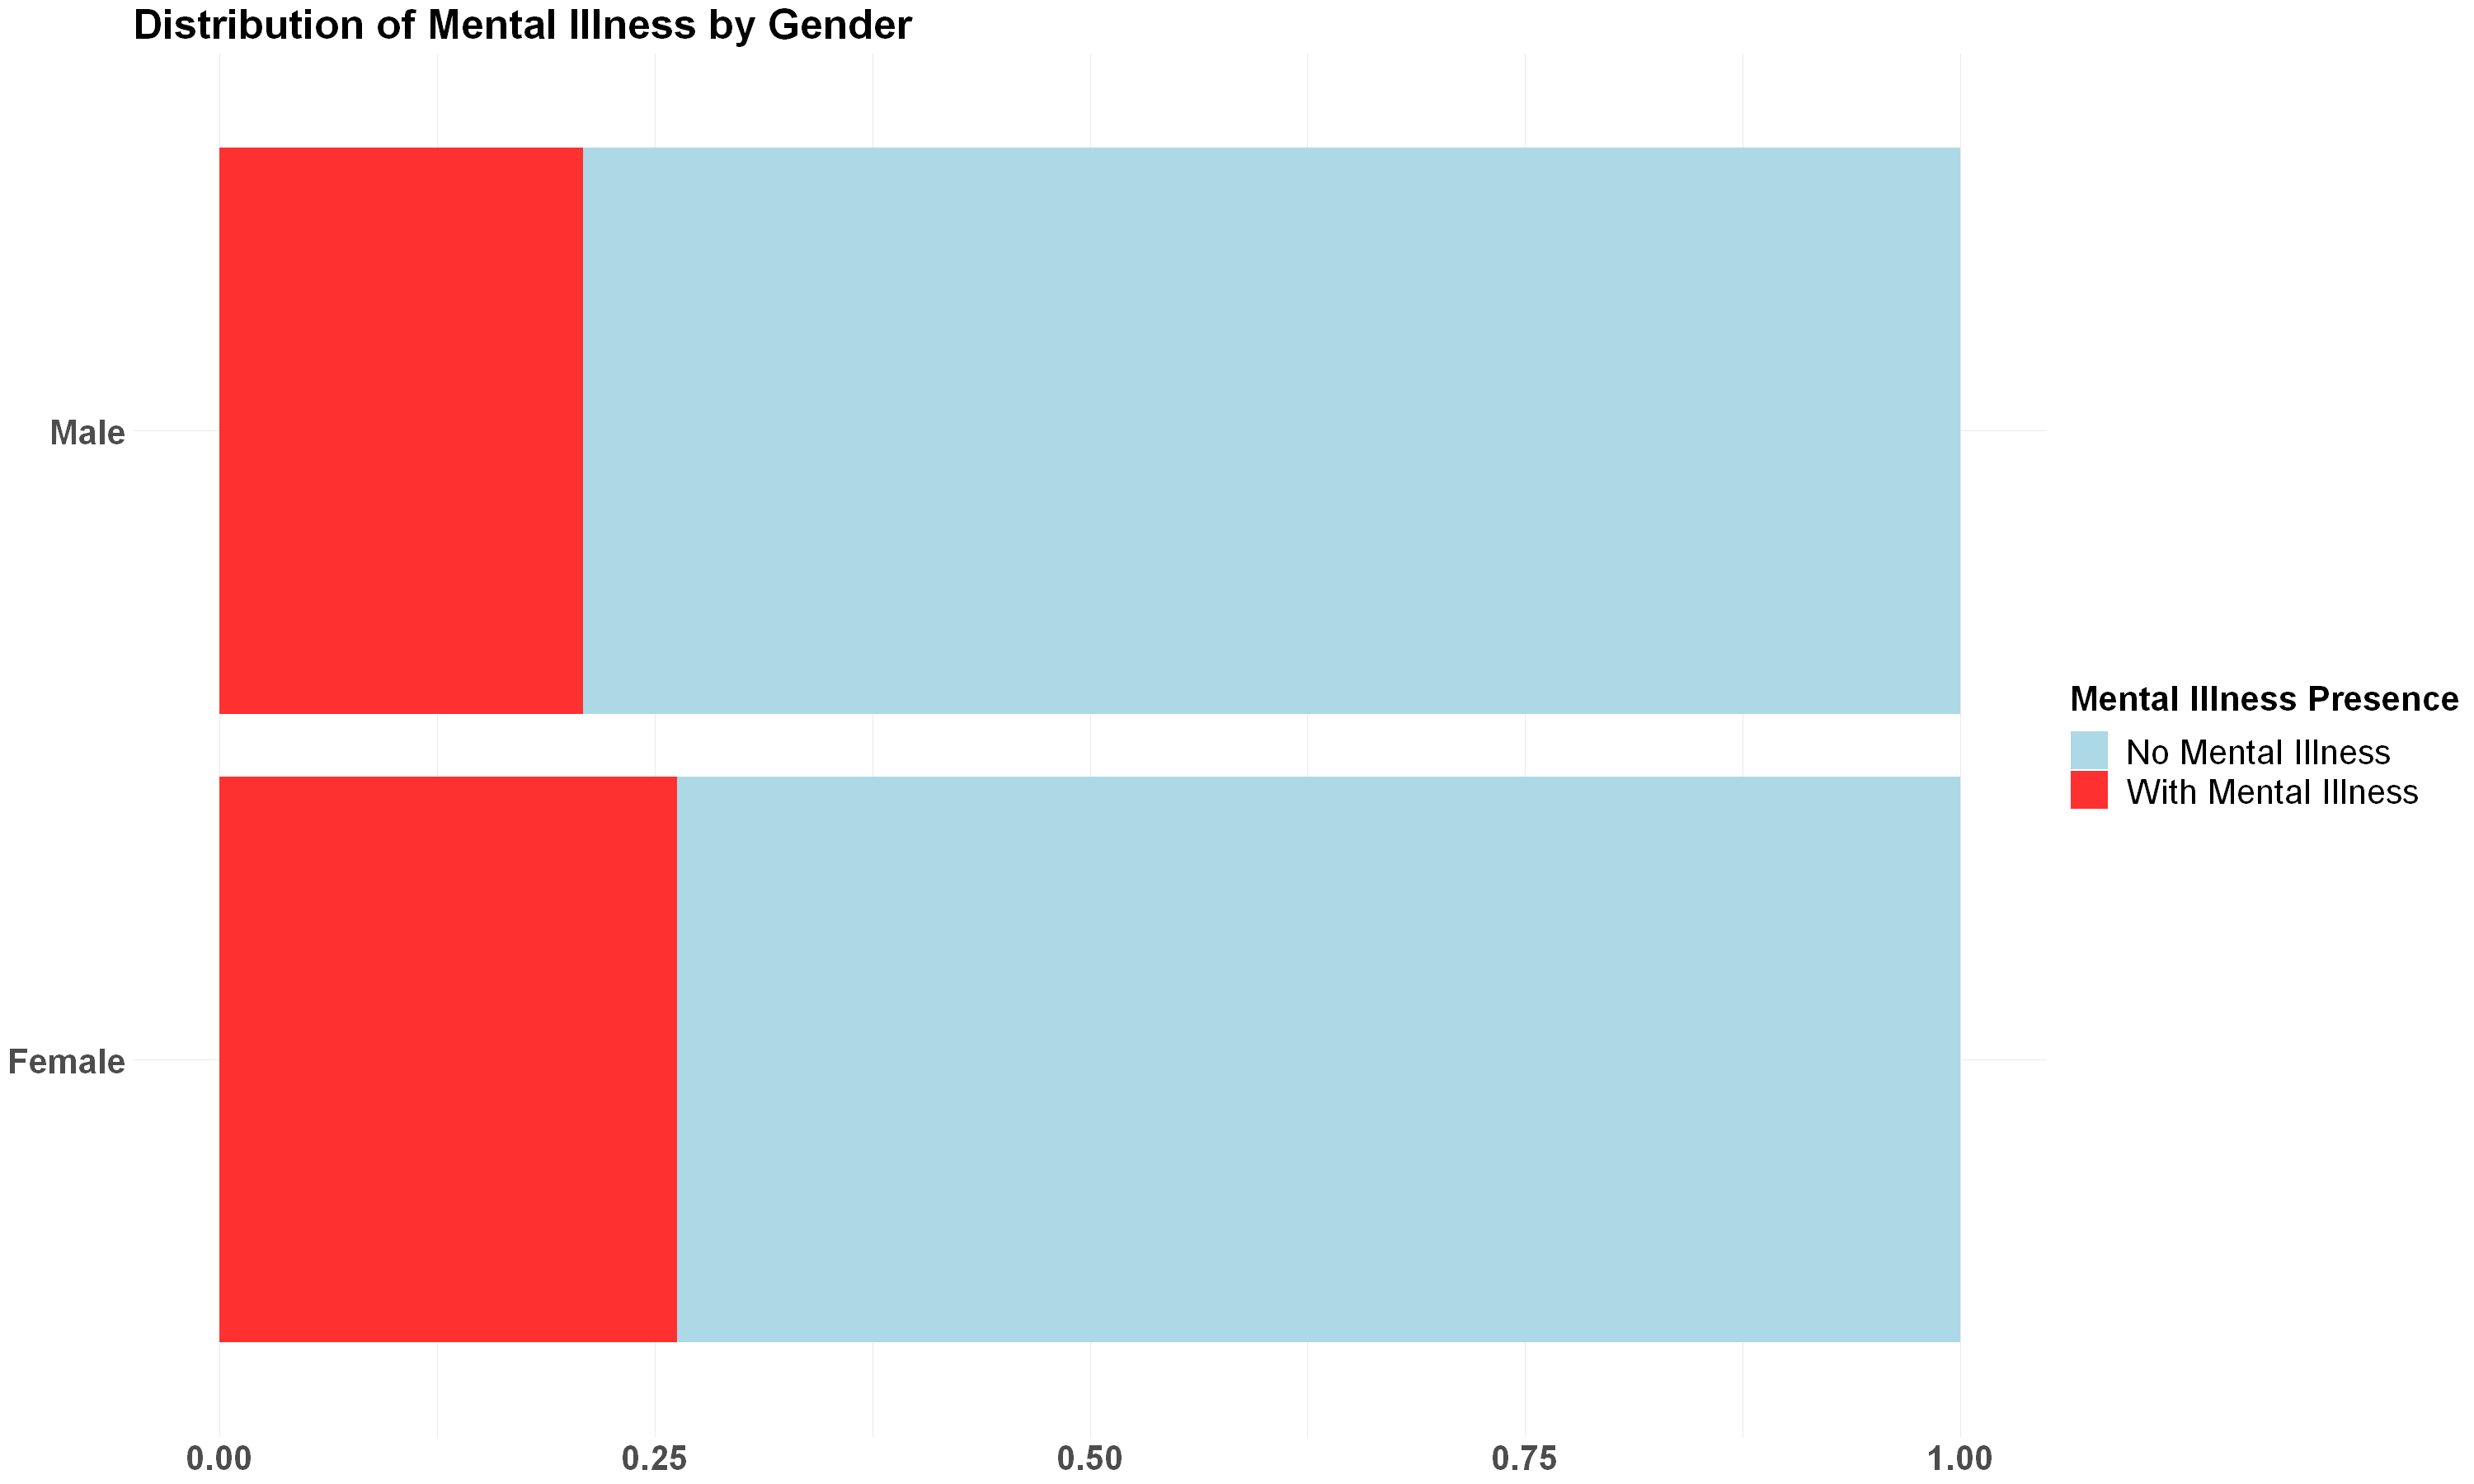

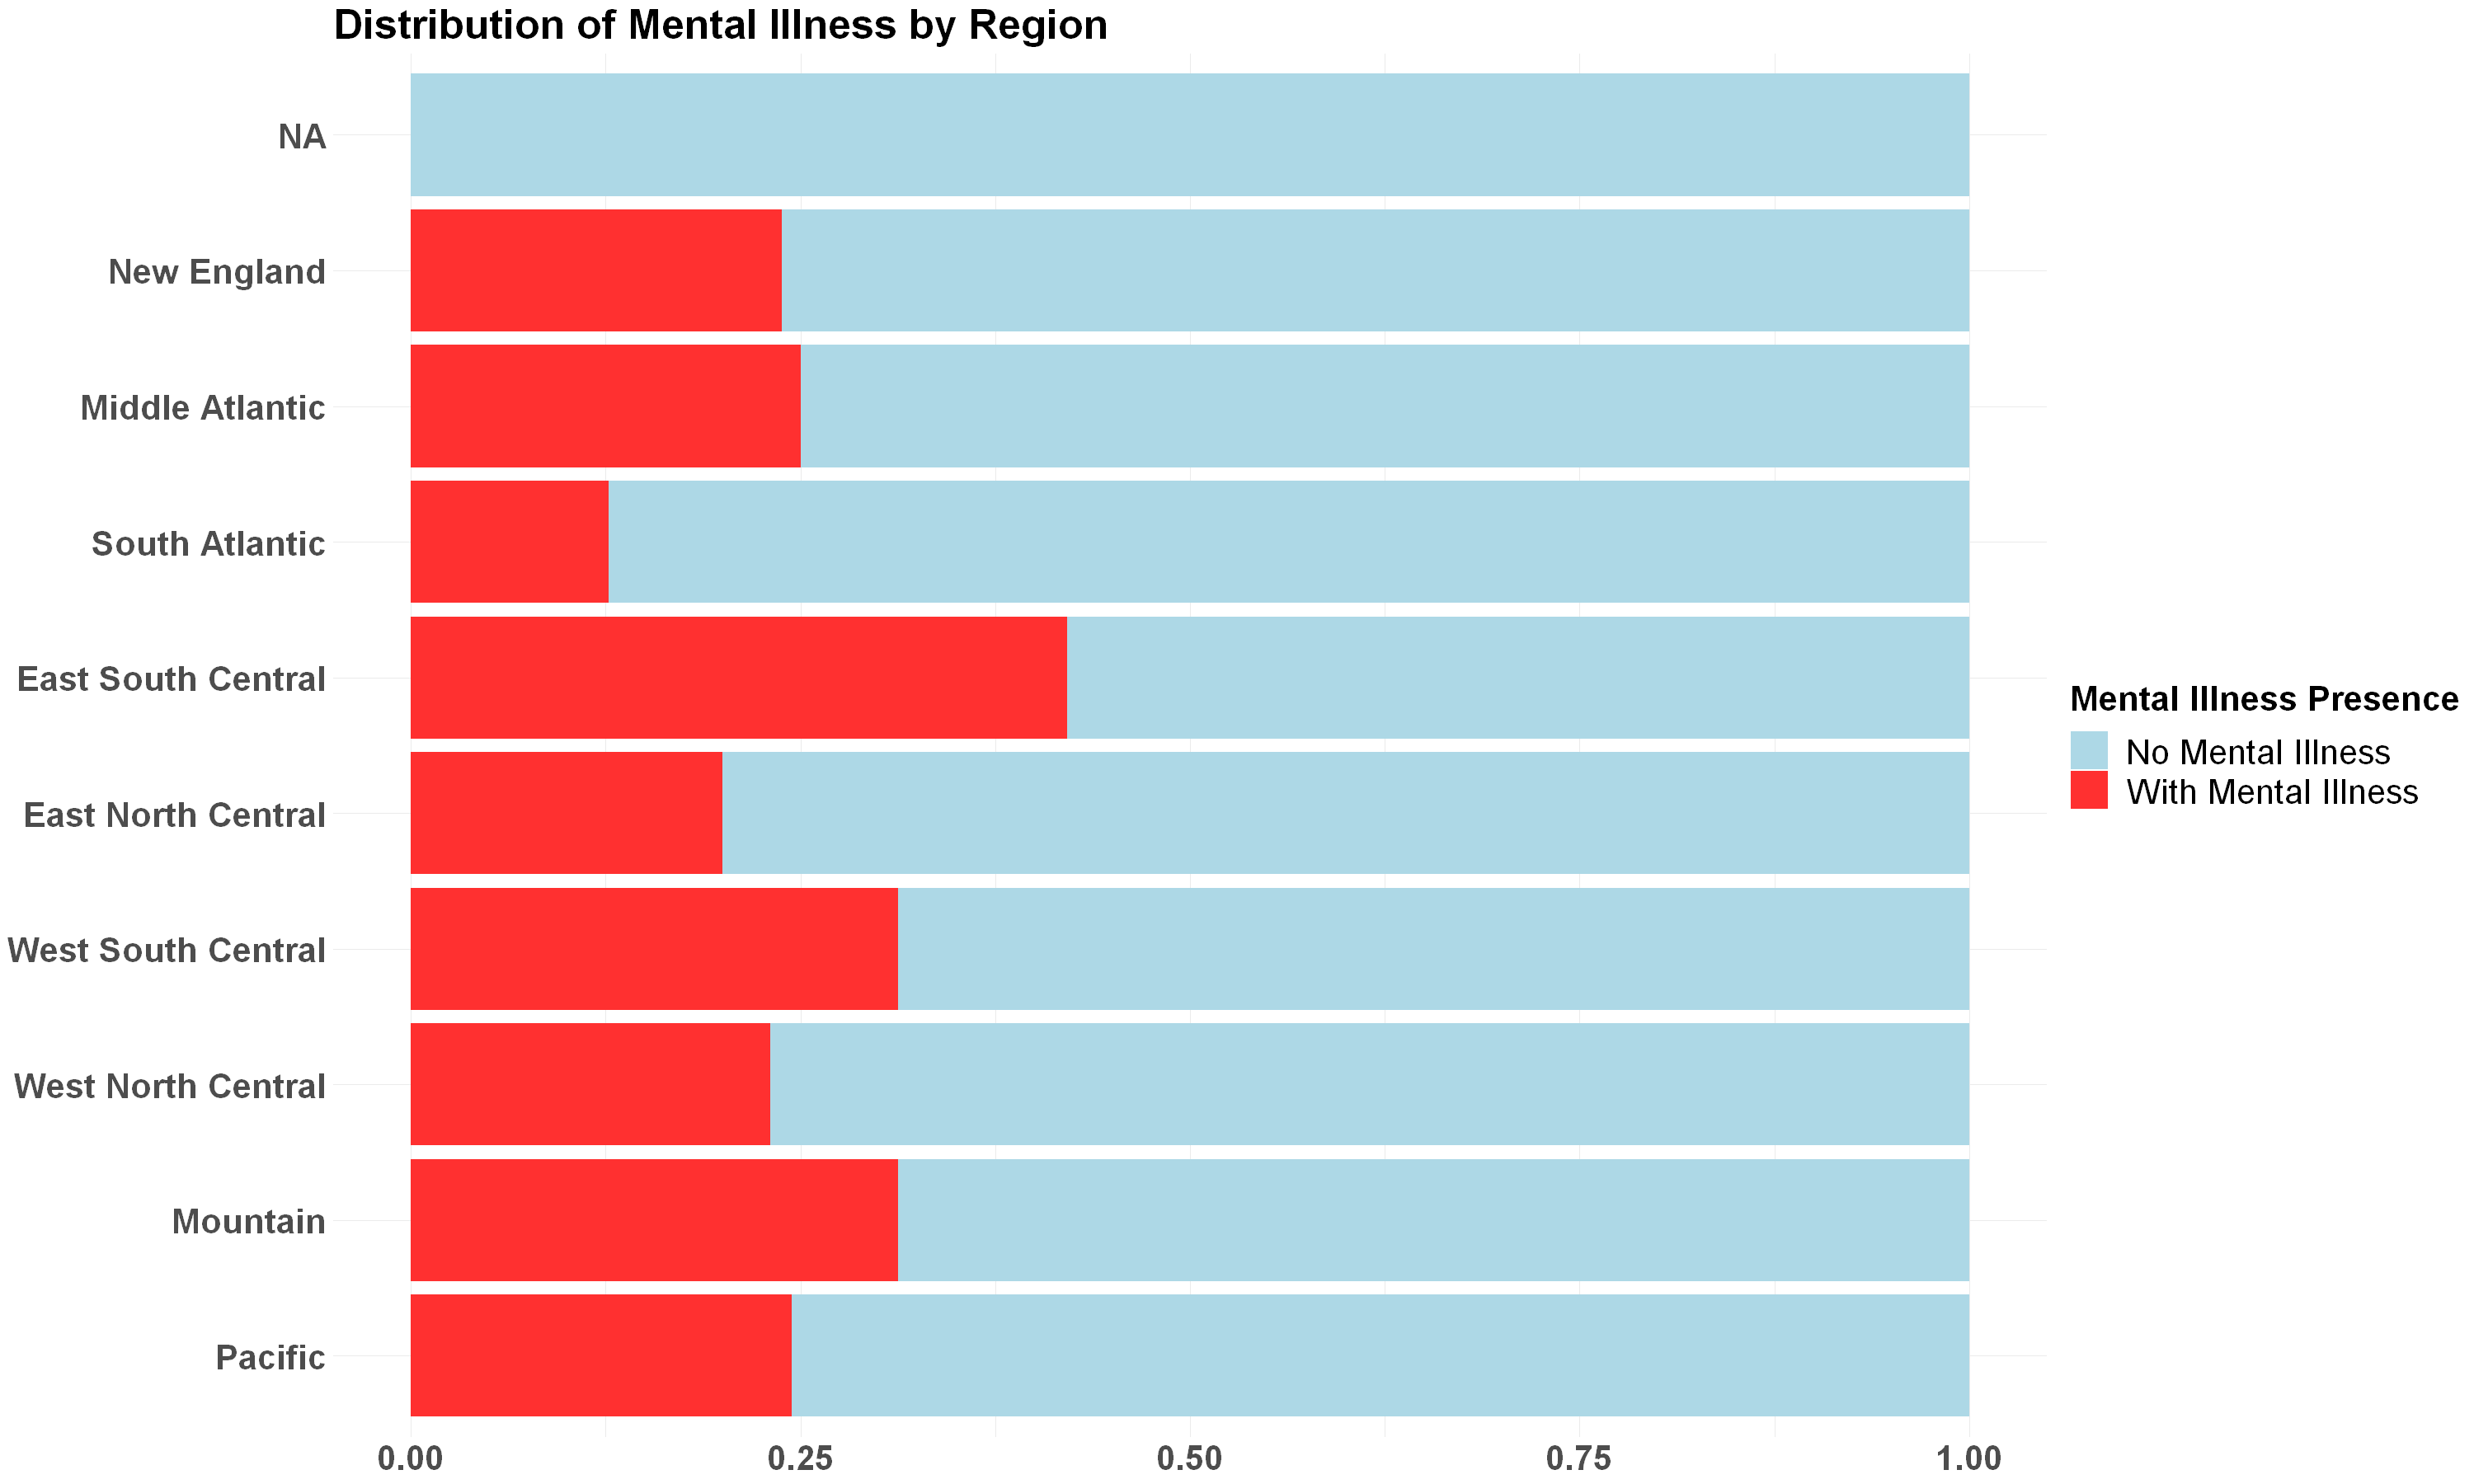

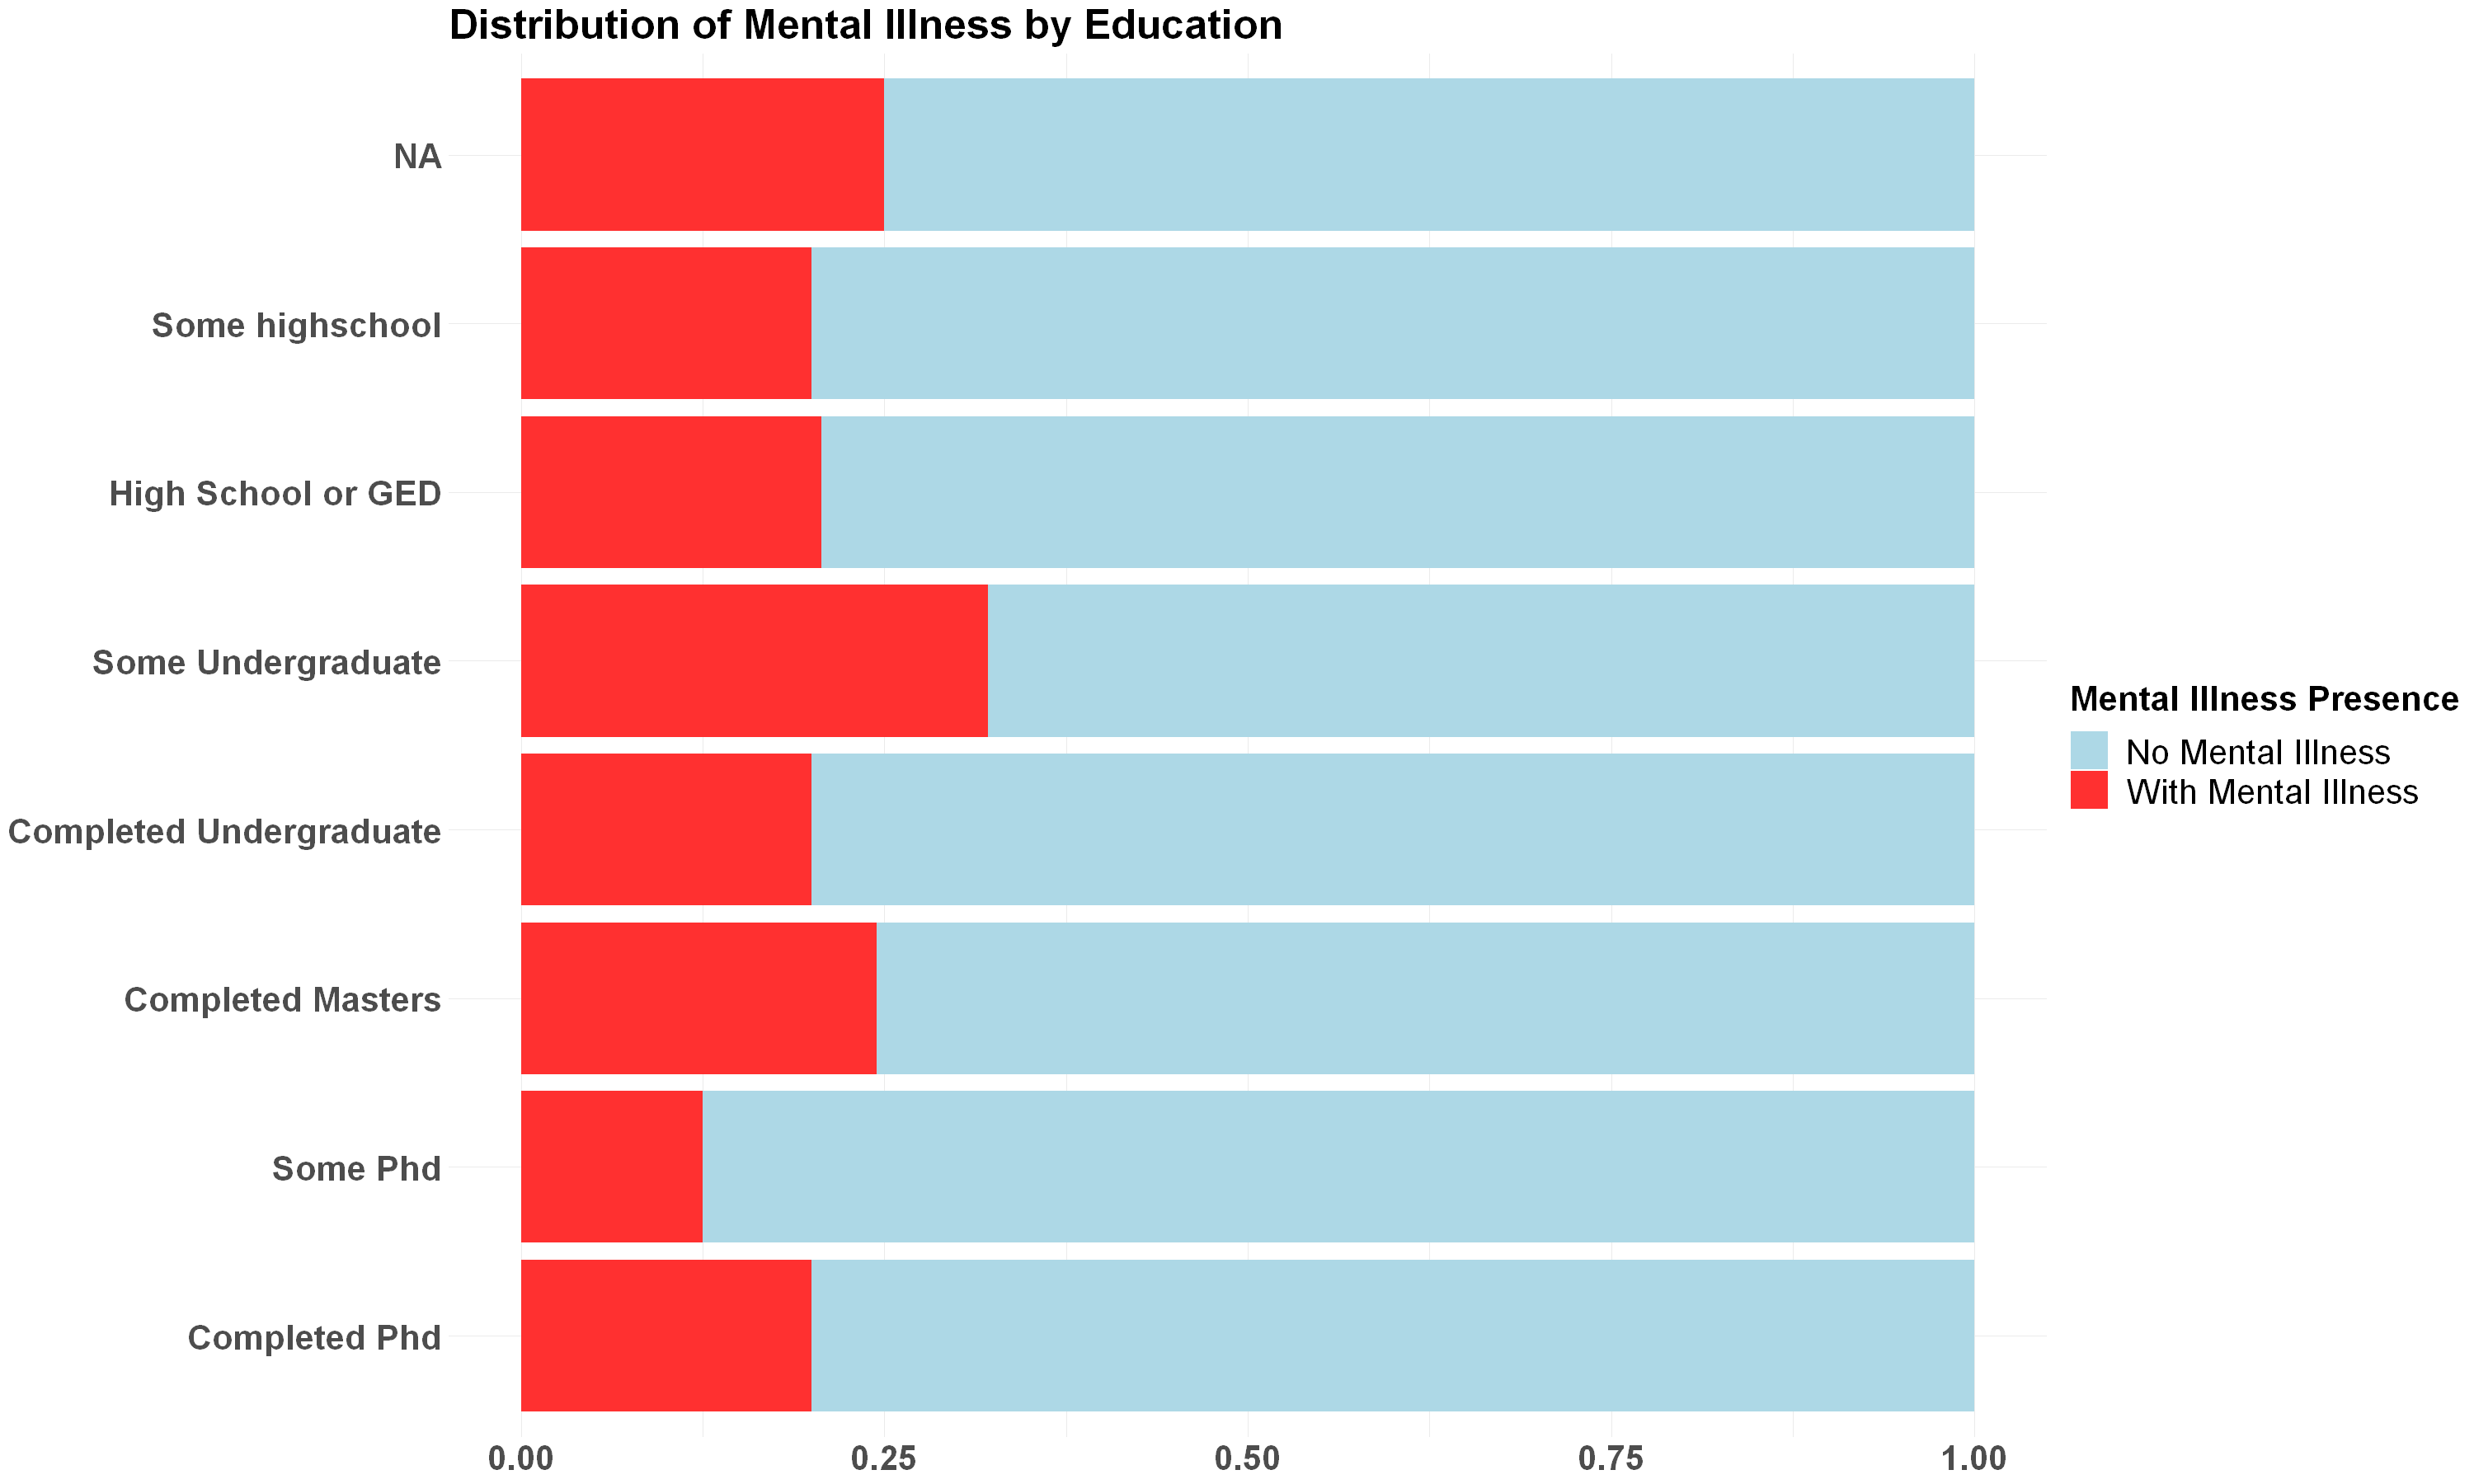

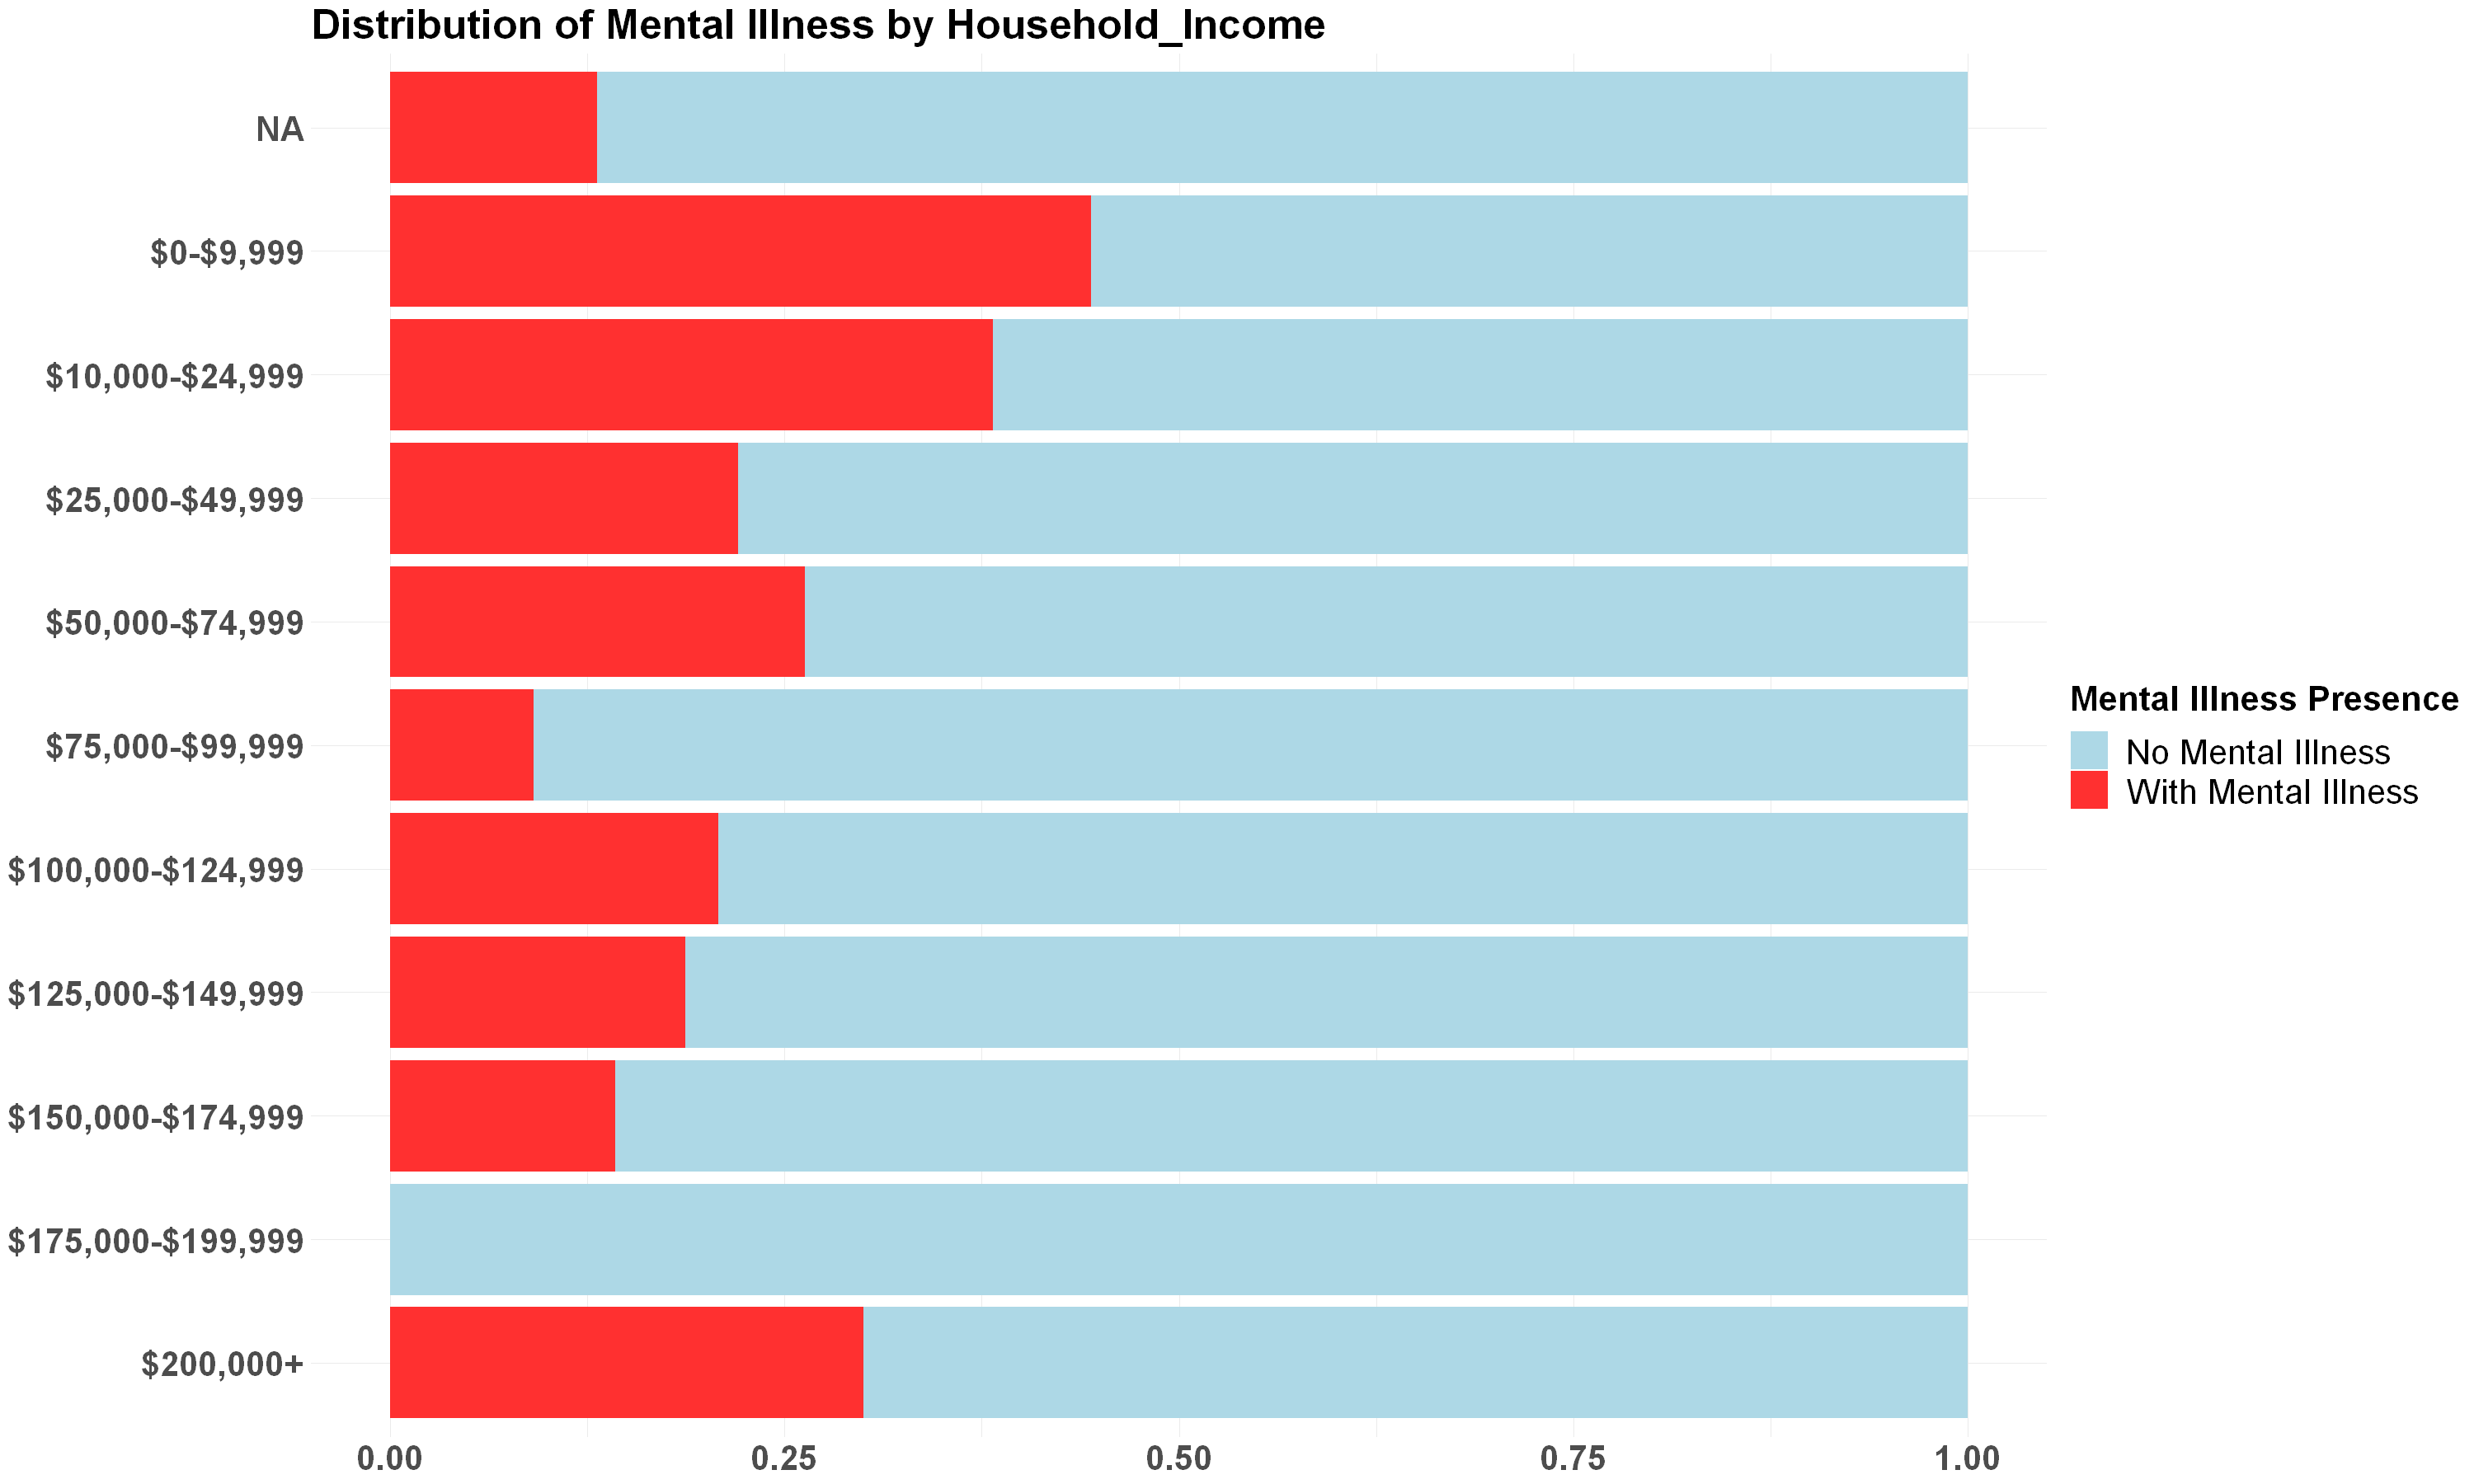

In [24]:
# List of features to plot against Mental Illness
features <- c("Age", "Gender", "Region", "Education", "Household_Income")

df$Mental_Illness <- factor(df$Mental_Illness, levels = c(0, 1))

options(repr.plot.width = 25, repr.plot.height = 15)

for (feature in features) {
    print(
        ggplot(df, aes_string(x = feature, fill = "Mental_Illness")) +
        geom_bar(position = "fill") +
        labs(title = paste("Distribution of Mental Illness by", feature),
             x = feature,
             y = "Proportion",
             fill = "Mental Illness Presence") +
        scale_fill_manual(values = c("0" = "lightblue", "1" = "firebrick1"),
                          labels = c("No Mental Illness", "With Mental Illness")) +
        theme_minimal() +
       theme(
            plot.title = element_text(size = 30, face = "bold"),
            axis.title.x = element_blank(), 
            axis.title.y = element_blank(),
            axis.text.x = element_text(size = 25, face = "bold"),
            axis.text.y = element_text(size = 25, face = "bold"),
            legend.text = element_text(size = 25),
            legend.title = element_text(size = 25, face = "bold"),  
            legend.key.size = unit(2, "lines") 
            ) +
        coord_flip()
    )
}

- Mental Illness by Education:

The proportion of individuals with mental illness appears relatively consistent across different levels of education.

Notably, individuals with 'Some Phd' levels of education has the lowest representation of mental illness and the highest in 'Some Undergraduate'.

--------------------------------------------------------------------------------------------------------------------------------

- Mental Illness by Region:

The highest representation of mental illness is seen in the East South Central Region and the lowest in South Atlantic and East North Central.

--------------------------------------------------------------------------------------------------------------------------------

- Mental Illness by Gender:

There isn't a notable difference in the prevalence of reported mental illness between genders, with females showing a higher proportion of mental illness than males. This could be due to a variety of factors including biological, psychological, social, and cultural influences on mental health and reporting behaviors.

--------------------------------------------------------------------------------------------------------------------------------

- Mental Illness by Age:

Younger age groups, particularly '18-29', show a higher prevalence of mental illness compared to older age groups. This may reflect generational differences in mental health awareness, reporting, or the unique stressors faced by younger individuals.
Mental illnesses clearly decreases with age.

--------------------------------------------------------------------------------------------------------------------------------

- Mental Illness by Household Income:

Those earning the least typically ($0-25K) report to have the highest representation of mental illness, with it becoming fairly consistent in the other income ranges. 

## The key takeaways from the previous bivariate analysis conducted above is that both Employment and Mental Illness seem to have the highest correlation in order with Household Income, Age, and Region. This might suggest a correlation between Mental Illness and Employment. However, further analysis is still needed.

# 

## Statistical Analysis through Statistical Significance

## Chi-square Test: 

A statistical analysis that tests if there's a significant association between two categorical (nominal/ordinal) variables.

- This is useful for a number of reasons:

Validity: Checking for statistical significance helps validate the observations from the data. Instead of relying on just visual or intuitive differences between groups, statistical tests give a measure of how likely these differences are due to actual associations versus occurring by chance.


Decision Making: P-values and statistical tests assist in decision-making. 

Refining Focus: By understanding which variables are statistically significant, researchers can refine their focus, making subsequent analyses or experiments more targeted and efficient.

# 

It has been observed that there are certain regions with higher Employment Status and Lower/Higher Mental Illness.

Let's see if that is caused by chance or because of certain factors such as: Education or Household Income.

- Research Question: 

What is the relationship between the Region of Residence and Individual's Education Levels and Household Income?

- Directional Alternative Hypothesis (H1): 

There is a relationship between both variables: Individuals in certain regions are more likely to have higher education levels compared to individuals in other regions.
Individuals in certain regions are more likely to have higher household incomes compared to individuals in other regions.

- Null Hypothesis (H0): 

The variables are independent; There is no relationship.

In [25]:
# Chi-Square Test for Region and Education
chisq_test1 <- chisq.test(df$Region, df$Education)
print(chisq_test1)

# Chi-Square Test for Region and Household Income
chisq_test2 <- chisq.test(df$Region, df$Household_Income)
print(chisq_test2)


	Pearson's Chi-squared test

data:  df$Region and df$Education
X-squared = 36.326, df = 48, p-value = 0.8916


	Pearson's Chi-squared test

data:  df$Region and df$Household_Income
X-squared = 70.186, df = 72, p-value = 0.5385



# 

- Region & Education:

The p-value is 0.9039, which is much higher than the common alpha level of 0.05. This high p-value suggests that there is no statistically significant association between Region and Education levels in the dataset.

We fail to reject the null hypothesis, which states that the two variables are independent. 
This implies that, based on the data, the region where individuals live does not significantly affect their education level, or vice versa.

--------------------------------------------------------------------------------------------------------------------------------

- Region & Household Income:

The p-value here is 0.544, also well above the typical alpha level of 0.05. This indicates a lack of statistically significant association between the Region and Household Income categories in the dataset.

We also fail to reject the null hypothesis, suggesting that the region of residence is not significantly associated with the household income levels of individuals in the sample.

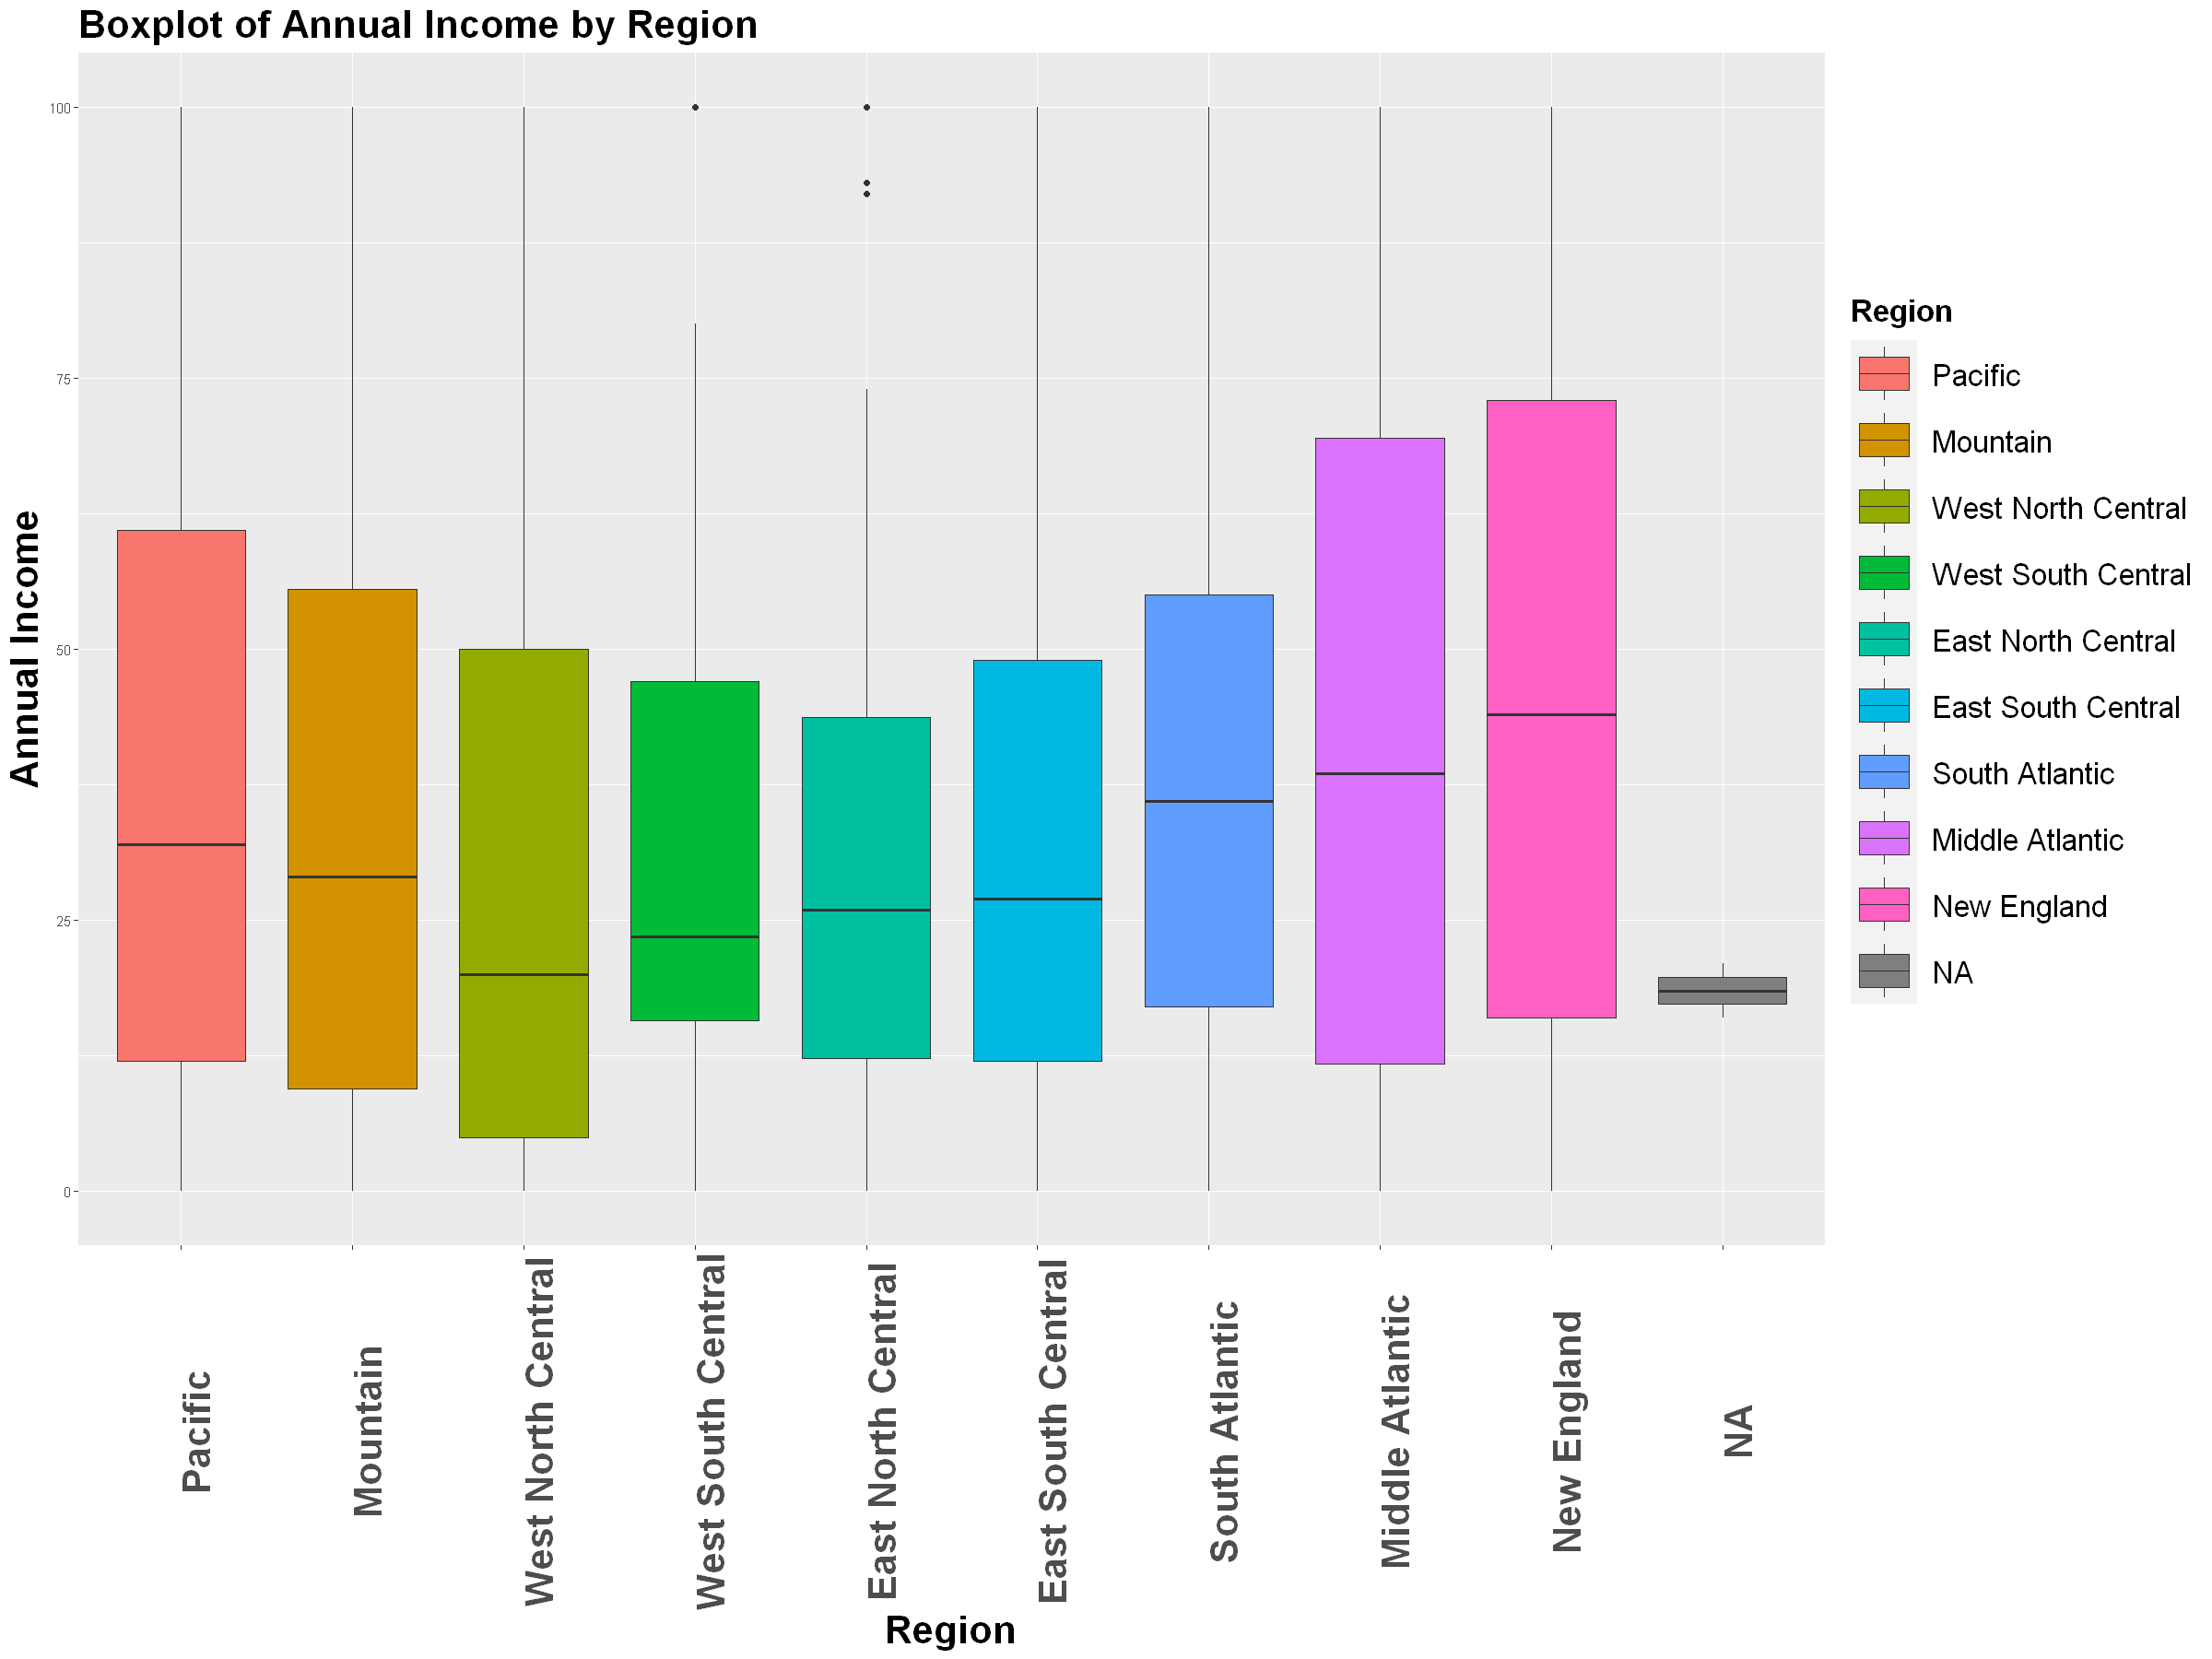

In [26]:
# I can make the assumption that this is also the case with Annual Income, but let's double check
# Boxplot for Annual Income and Region

options(repr.plot.width = 20, repr.plot.height = 15)
ggplot(df, aes(x = Region, y = Annual_Income_USD)) +
geom_boxplot(aes(fill=factor(Region))) +
labs(title = "Boxplot of Annual Income by Region",
     x = "Region",
     y = "Annual Income",
     fill = "Region")+
theme(plot.title = element_text(size = 25, face = "bold"),
      axis.title = element_text(size = 25, face = "bold"),
      axis.text.x = element_text(size = 25, face = "bold", angle = 90),
      legend.text = element_text(size = 20),
      legend.title = element_text(size = 20, face = "bold"),  
      legend.key.size = unit(3, "lines")
     )

# 

From this visual, one can conclude that there is some relationship between region of residence and income, as the median income and spread vary across regions. This suggests that certain regions are associated with higher or lower incomes.

There appears to be a variation in median income across regions. Some regions have higher median incomes, and others lower.

- Wealthier Regions:

Middle Atlantic and New England: These regions show higher median incomes compared to the others. Their interquartile range (IQR) is also higher, indicating a larger spread of income around the median.

South Atlantic: This region has a wide range of incomes as evidenced by the long box and whiskers, suggesting a high variance in income.

- Less Wealthy Regions:

West North Central and East South Central: These regions appear to have lower median incomes. The boxes are shorter, suggesting less variation in income.

# 

## Logistic Regression for Classification:

- This statistical test will provide me with valuable insights on the probability of a certain feature (dependent variable) being in a certain category or occuring based on other certain features (independent variables). 

In [27]:
logistic_model1 <- glm(Unemployed ~ Region + Age + Education,
                              family = "binomial", data = df)

summary(logistic_model1)


Call:
glm(formula = Unemployed ~ Region + Age + Education, family = "binomial", 
    data = df)

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)                        1.06588    0.83382   1.278  0.20114   
RegionMountain                     0.24616    0.55106   0.447  0.65509   
RegionWest North Central          -0.07203    0.70656  -0.102  0.91880   
RegionWest South Central          -0.23946    0.57145  -0.419  0.67519   
RegionEast North Central           0.22609    0.49556   0.456  0.64823   
RegionEast South Central          -0.17404    0.66441  -0.262  0.79337   
RegionSouth Atlantic              -1.25568    0.56730  -2.213  0.02687 * 
RegionMiddle Atlantic             -0.78115    0.54489  -1.434  0.15169   
RegionNew England                 -0.03291    0.63799  -0.052  0.95886   
Age45-60                          -1.16710    0.41349  -2.823  0.00476 **
Age30-44                          -0.93562    0.40656  -2.301  0.02137 * 


# 

- Research Question:

Is there an association between household income with education level and age in the population?

- Null Hypothesis (H0): 

There is no association.

- Directional Alternative Hypothesis (H1): 

There is an association between household income and education level. The distribution of education levels and ages vary across different household income brackets.

In [28]:
# Chi-Square Test for Education and Household Income 
chisq_test3 <- chisq.test(df$Household_Income, df$Education)
print(chisq_test3)

# Chi-Square Test for Age and Household Income
chisq_test4 <- chisq.test(df$Age, df$Household_Income)
print(chisq_test4)


	Pearson's Chi-squared test

data:  df$Household_Income and df$Education
X-squared = 126.27, df = 54, p-value = 1.011e-07


	Pearson's Chi-squared test

data:  df$Age and df$Household_Income
X-squared = 47.348, df = 27, p-value = 0.009071



# 

- Household Income & Education:

The p-value is very low approximately 0.0000001165 (1.165e-07), which is significantly lower than the conventional alpha level of 0.05. This suggests that there is a statistically significant association between Household Income and Education levels in the dataset.

We reject the null hypothesis of independence, implying that in the data set, an individual's education level is likely to be related to their household income. This could reflect the impact of educational attainment on earning potential.

--------------------------------------------------------------------------------------------------------------------------------

- Household Income & Age: 

The p-value is 0.009219, which is less than the standard threshold of 0.05. This indicates that the association between Age and Household Income is statistically significant.

We reject the null hypothesis in this case, it suggests that there is a statistically significant relationship between a person’s age and their household income. This could be indicative of various life cycle income patterns, such as increasing income with age due to career advancement or decreasing income post-retirement.

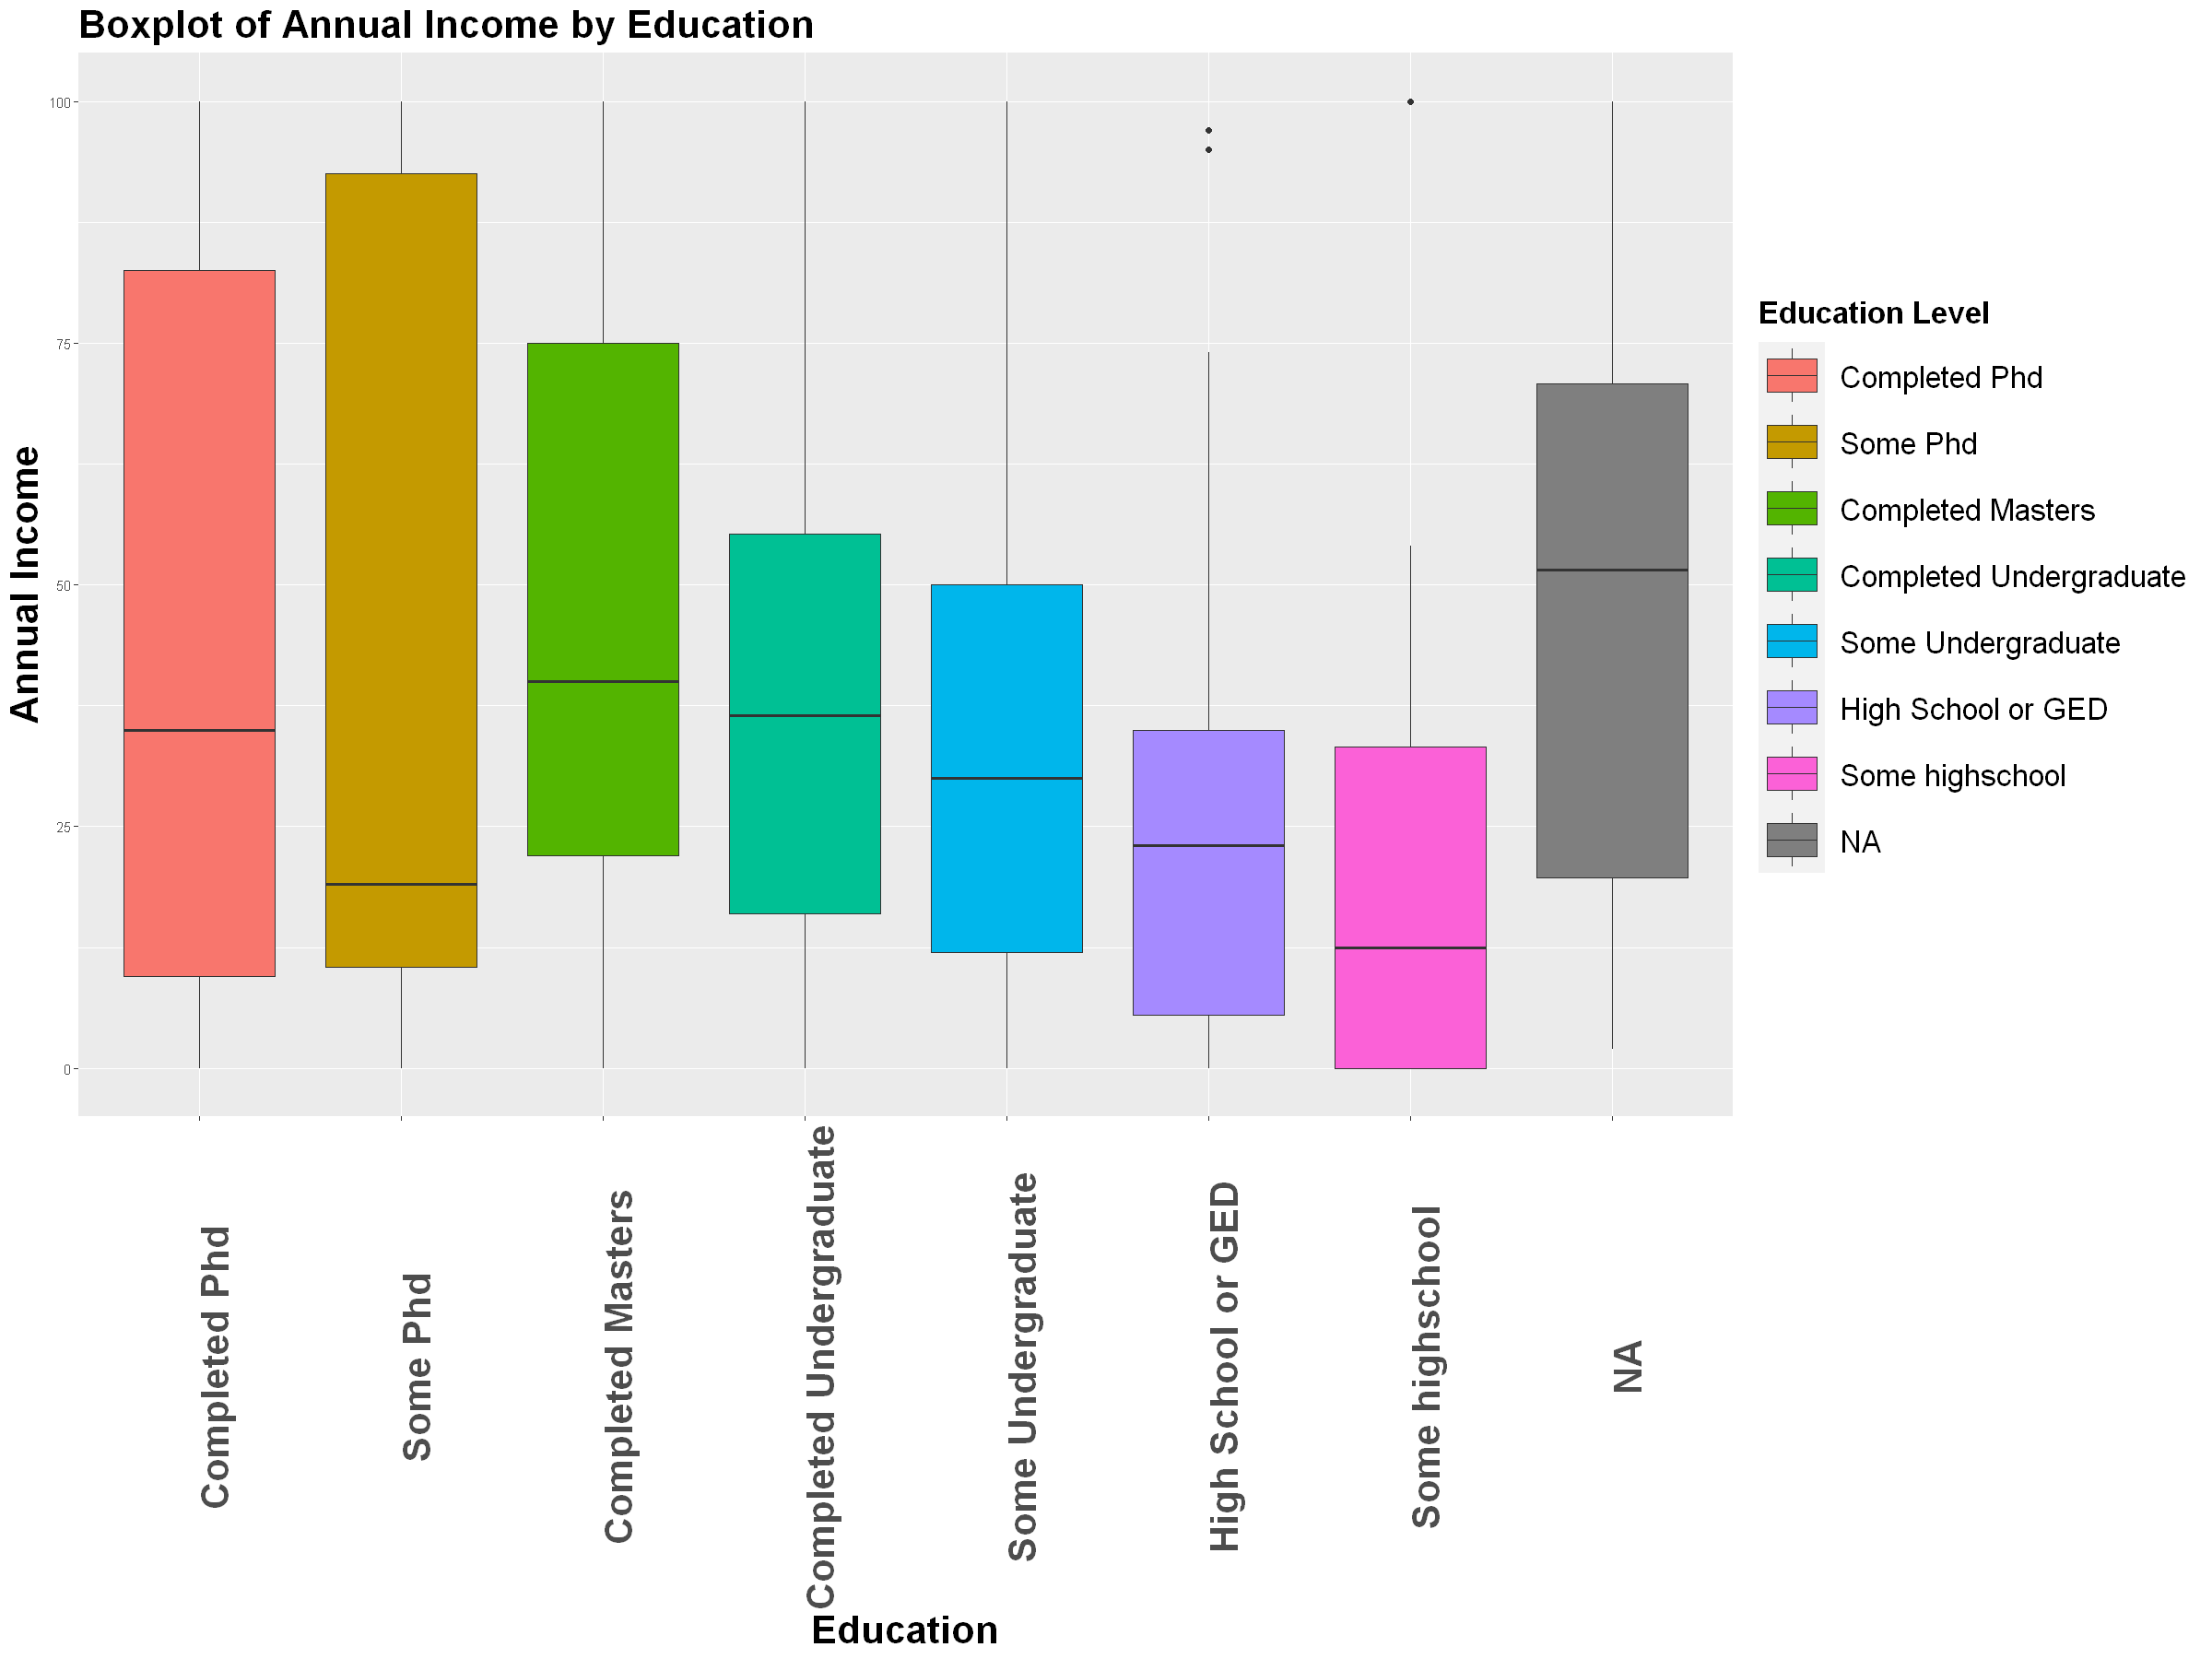

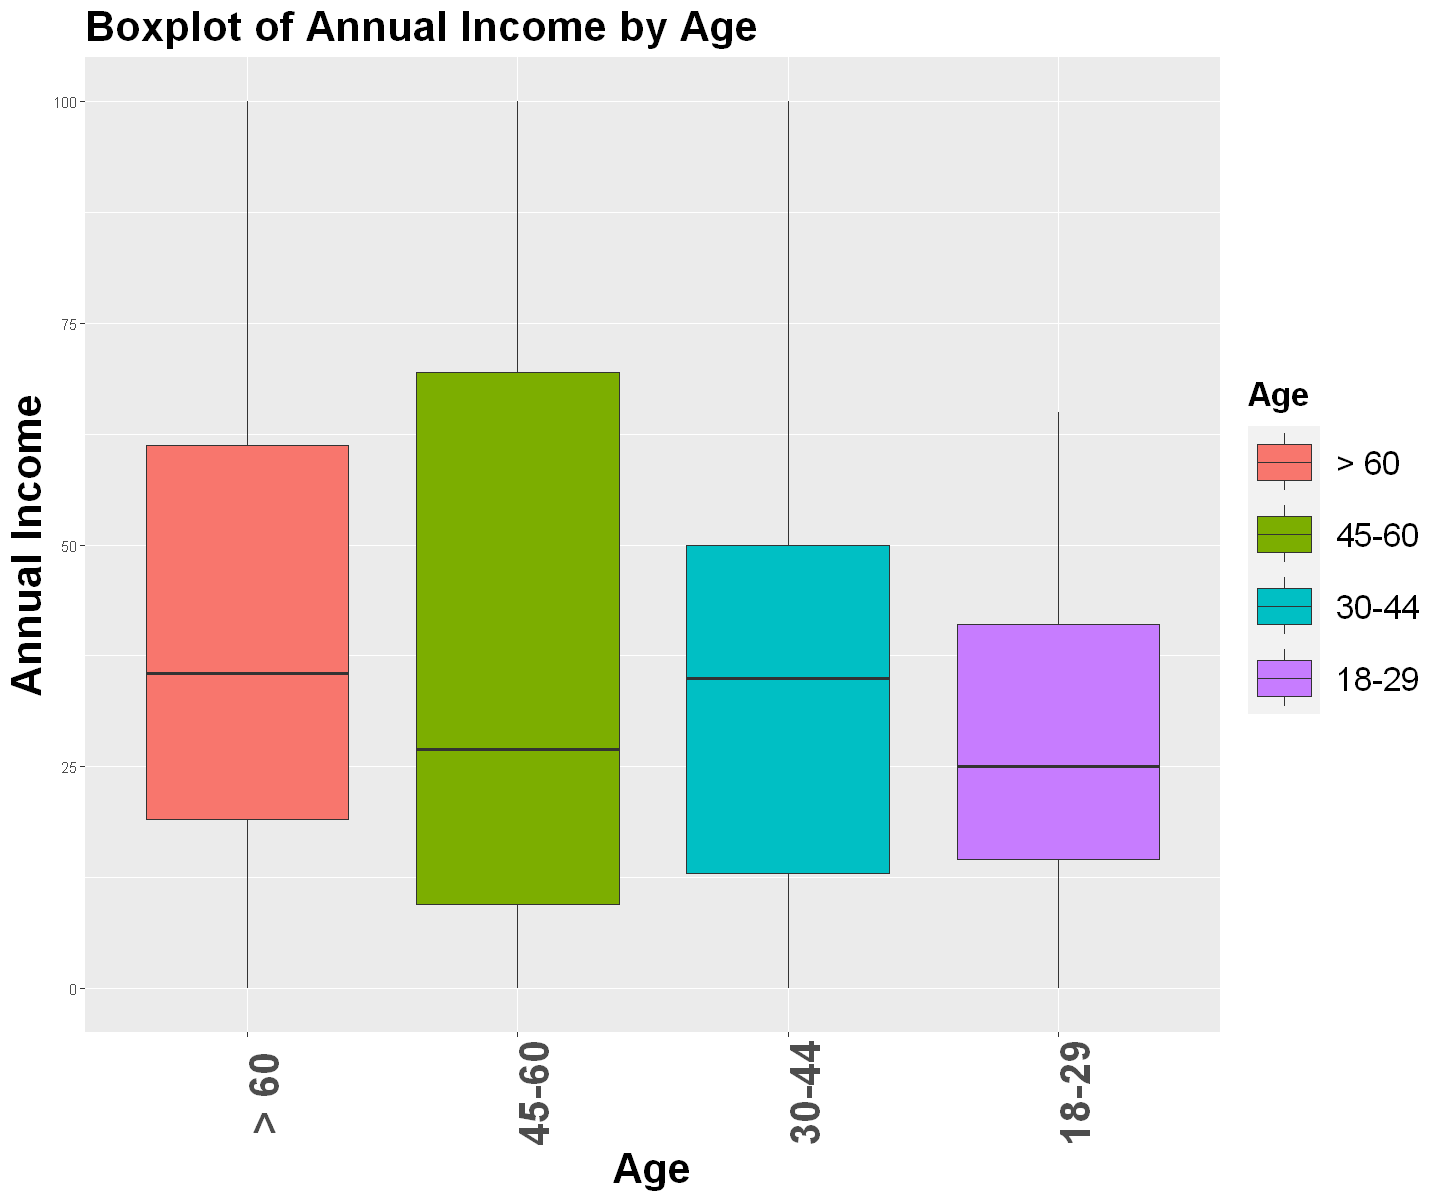

In [29]:
# Since there is a significant relationship for Education & Age with Household Income:
# I can make the assumption that this is also the case with Annual Income

# Boxplot for Annual Income and Education

options(repr.plot.width = 20, repr.plot.height = 15)
ggplot(df, aes(x = Education, y = Annual_Income_USD)) +
geom_boxplot(aes(fill=factor(Education))) +
labs(title = "Boxplot of Annual Income by Education",
     x = "Education",
     y = "Annual Income",
     fill = "Education Level")+
theme(plot.title = element_text(size = 25, face = "bold"),
      axis.title = element_text(size = 25, face = "bold"),
      axis.text.x = element_text(size = 25, face = "bold", angle = 90),
      legend.text = element_text(size = 20),
      legend.title = element_text(size = 20, face = "bold"),  
      legend.key.size = unit(3, "lines")
     )

# Boxplot for Annual Income and Age

options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(df, aes(x = Age, y = Annual_Income_USD)) +
geom_boxplot(aes(fill=factor(Age))) +
labs(title = "Boxplot of Annual Income by Age",
     x = "Age",
     y = "Annual Income",
     fill = "Age")+
theme(plot.title = element_text(size = 25, face = "bold"),
      axis.title = element_text(size = 25, face = "bold"),
      axis.text.x = element_text(size = 25, face = "bold", angle = 90),
      legend.text = element_text(size = 20),
      legend.title = element_text(size = 20, face = "bold"),  
      legend.key.size = unit(3, "lines")
     )

# 

- Boxplot of Annual Income by Education:

There is a general trend of increasing median income with higher educational attainment, which supports the idea that education can be linked to higher earning potential.

Individuals with a Ph.D. have the highest median income, suggesting that advanced education may lead to higher-paying jobs.
The "Some Undergraduate" and "Completed Undergraduate" categories have similar median incomes, but those who completed their undergraduate degree have a slightly higher 75th percentile, indicating a better upper earning potential.

The "Completed Masters" category has a notably higher median income compared to the "Completed Undergraduate," which might reflect the additional value of a graduate degree in the job market.

--------------------------------------------------------------------------------------------------------------------------------

- Boxplot of Annual Income by Age:

The median annual income appears to increase with age up to the 45-60 age group, which could indicate career progression and increased earning potential with age and experience.

The 45-60 age group has the highest median income, which is consistent with peak earning years in many careers.

The >60 age group shows a decrease in median income, which may reflect retirement or a shift to lower-income or part-time work.
There is considerable overlap in the income ranges (interquartile ranges) between the age groups, indicating variability in income within each age group.

The >60 age group has a slightly higher variation in income (as indicated by the length of the box), which could suggest a diverse set of circumstances affecting income post-retirement.

There are a few outliers in the 18-29 and 45-60 age groups, indicating that there are individuals with substantially higher incomes than the majority in these age categories.

## - Overall, those findings align with the chi-square test analysis that there is significant relationship between Age and Income & Education and Income.

# 

## Logistic Regression for Classification:

- This statistical test will provide me with valuable insights on the probability of a certain feature (dependent variable) being in a certain category or occuring based on other certain features (independent variables). 

## To what extent does mental illness predict unemployment?

- Null hypothesis (H0):

Mental Illness does not have any association with the likelihood of being unemployed.

- Directional Alternative Hypothesis (H1):

Mental Illness or at least one type of mental illness disorder can influence unemployment likelihood.

In [30]:
logistic_model2 <- glm(Unemployed ~ Mental_Illness + Panic_attacks + Tiredness + Depression + Anxiety,
                      data = df, family = "binomial")
summary(logistic_model2)


Call:
glm(formula = Unemployed ~ Mental_Illness + Panic_attacks + Tiredness + 
    Depression + Anxiety, family = "binomial", data = df)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.37425    0.17540  -7.835 4.69e-15 ***
Mental_Illness1 -0.09203    0.42645  -0.216    0.829    
Panic_attacks    0.90022    0.39883   2.257    0.024 *  
Tiredness       -0.07715    0.29911  -0.258    0.796    
Depression       0.42342    0.42681   0.992    0.321    
Anxiety          0.25294    0.36627   0.691    0.490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 363.38  on 327  degrees of freedom
AIC: 375.38

Number of Fisher Scoring iterations: 4


The coefficients represent log odds in the context of a logistic regression model, which means they show the log odds of being unemployed for a one-unit increase in the predictor variable, holding all other variables constant.
 
Intercept: The model's intercept is statistically significant, indicating that when all other variables are at their reference levels (which is typically the absence or baseline level of the conditions), the log odds of being unemployed is -1.38952.

Panic Attacks: The coefficient for panic attacks is positive and significant (p = 0.0217), indicating that individuals who experience panic attacks have a higher likelihood of being unemployed. The effect size is moderate, with an odds ratio of exp(0.98045), indicating that the odds of unemployment are about 2.67 times higher for those with panic attacks compared to those without.

Compulsive Behavior: The coefficient for compulsive behavior is negative and significant (p = 0.0417), suggesting that individuals who exhibit compulsive behavior have a lower likelihood of being unemployed. This is somewhat counterintuitive and may require further exploration to understand the underlying reasons.

In [31]:
logistic_model3 <- glm(Unemployed ~ Resume_Gap + Gap_Duration_Months,
                      data = df, family = "binomial")
summary(logistic_model3)


Call:
glm(formula = Unemployed ~ Resume_Gap + Gap_Duration_Months, 
    family = "binomial", data = df)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.432599   0.159523  -8.980   <2e-16 ***
Resume_Gap1          0.689148   0.360080   1.914   0.0556 .  
Gap_Duration_Months  0.017155   0.007577   2.264   0.0236 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 355.16  on 330  degrees of freedom
AIC: 361.16

Number of Fisher Scoring iterations: 4


# 
Resume Gap: The presence of a resume gap (Resume_Gap1) has a positive coefficient, indicating that individuals with a gap in their resume are more likely to be unemployed. However, the p-value is just above the conventional threshold for significance (p = 0.0556), suggesting a marginal effect.

Gap Duration: Each additional month in the duration of the resume gap (Gap_Duration_Months) increases the likelihood of being unemployed. The coefficient is statistically significant (p = 0.0236), which means that as the length of the employment gap increases, so does the probability of being unemployed.

Model Significance: The intercept is significant, meaning that for individuals with no resume gap and a gap duration of zero, the log odds of being unemployed is -1.432599. Given that the intercept is significant, the relationship between the variables and unemployment is not purely due to chance.

Effect Size and Interpretation: For Resume_Gap1, the odds ratio is exp(0.689148), which suggests that having a resume gap almost doubles the odds of unemployment (1.99 times more likely). For Gap_Duration_Months, the odds ratio is exp(0.017155), indicating that for each additional month of gap duration, the odds of being unemployed increase by about 1.7%.

The model suggests that both having a resume gap and the length of that gap are relevant factors in unemployment. This could have implications for job seekers and those supporting them, highlighting the importance of minimizing employment gaps and returning to work swiftly.

In [32]:
logistic_model4 <- glm(Unemployed ~ Resume_Gap * Anxiety, 
                              family = "binomial", data = df)

summary(logistic_model4)


Call:
glm(formula = Unemployed ~ Resume_Gap * Anxiety, family = "binomial", 
    data = df)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.4534     0.1851  -7.851 4.12e-15 ***
Resume_Gap1           0.5844     0.3788   1.543   0.1228    
Anxiety               0.1472     0.3634   0.405   0.6854    
Resume_Gap1:Anxiety   1.2609     0.5952   2.118   0.0342 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 351.11  on 329  degrees of freedom
AIC: 359.11

Number of Fisher Scoring iterations: 4


# 
Resume_Gap1:Anxiety: The estimated change in log odds of being unemployed for someone who has both a resume gap and experiences anxiety is 1.2609. This is statistically significant (p-value 0.0342), indicating that the combination of having a resume gap and experiencing anxiety significantly increases the likelihood of being unemployed. The interaction term suggests that the effect of anxiety on unemployment is different (in this case, stronger) for those with a resume gap compared to those without.

Interpretation: The key takeaway from this model is that the interaction between having a resume gap and experiencing anxiety is a significant predictor of unemployment. While neither having a resume gap nor experiencing anxiety alone significantly predicts unemployment, their combined effect does. This suggests that these two factors may interact in a way that exacerbates the likelihood of being unemployed.

In [33]:
logistic_model5 <- glm(Unemployed ~ Resume_Gap * Depression, 
                              family = "binomial", data = df)

summary(logistic_model5)


Call:
glm(formula = Unemployed ~ Resume_Gap * Depression, family = "binomial", 
    data = df)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.40487    0.17645  -7.962  1.7e-15 ***
Resume_Gap1             0.50408    0.37324   1.351   0.1768    
Depression             -0.06147    0.40974  -0.150   0.8808    
Resume_Gap1:Depression  1.57536    0.62821   2.508   0.0122 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 349.89  on 329  degrees of freedom
AIC: 357.89

Number of Fisher Scoring iterations: 4


In [34]:
logistic_model6 <- glm(Unemployed ~ Resume_Gap * Mental_Illness, 
                              family = "binomial", data = df)
summary(logistic_model6)


Call:
glm(formula = Unemployed ~ Resume_Gap * Mental_Illness, family = "binomial", 
    data = df)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.3984     0.1744  -8.019 1.07e-15 ***
Resume_Gap1                   0.7370     0.3538   2.083   0.0372 *  
Mental_Illness1              -0.1057     0.4280  -0.247   0.8050    
Resume_Gap1:Mental_Illness1   1.1725     0.6301   1.861   0.0628 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 355.17  on 329  degrees of freedom
AIC: 363.17

Number of Fisher Scoring iterations: 4


In [45]:
logistic_model6 <- glm(Unemployed ~ Resume_Gap * Legally_Disabled, 
                              family = "binomial", data = df)
summary(logistic_model6)


Call:
glm(formula = Unemployed ~ Resume_Gap * Legally_Disabled, family = "binomial", 
    data = df)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -1.6672     0.1792  -9.301  < 2e-16 ***
Resume_GapYes                    1.1876     0.3072   3.865 0.000111 ***
Legally_Disabled                 2.3603     0.5312   4.444 8.84e-06 ***
Resume_GapYes:Legally_Disabled  -0.5815     0.8767  -0.663 0.507169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 331.89  on 329  degrees of freedom
AIC: 339.89

Number of Fisher Scoring iterations: 4


## Linear Regression for Prediction:

- This is a statistical test to help observe to what extent our predictor(s) (independent variables) can predict the outcome's (dependent continuous variable) occurence.

## What socioeconomic, demographic, and welfare-related factors contribute to the frequency of hospitalization in a population, and how might these factors interrelate to impact health outcomes?

- Null hypothesis (H0):

Employment status has no effect on the frequency of hospitalization.

- Directional Alternative Hypothesis (H1):

Employment affects the frequency of hospitalization.

In [35]:
# Linear Regression for Times Hospitalized based on different predictors

# number of days hospitalized is predicted based on employment status 
linear_model1 <- lm(Days_Hospitalized ~ Unemployed,
                    data = df)
summary(linear_model1)


Call:
lm(formula = Days_Hospitalized ~ Unemployed, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.649 -2.105 -2.105 -2.105 97.895 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   2.1050     0.9481   2.220   0.0272 *
Unemployed1   4.5443     1.8589   2.445   0.0151 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.03 on 294 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.01992,	Adjusted R-squared:  0.01659 
F-statistic: 5.976 on 1 and 294 DF,  p-value: 0.01509


# 

Being unemployed is associated with an increase in the average number of days hospitalized by 4.5443. This is also statistically significant (p-value = 0.0151).

In [36]:
# Linear Regression for Times Hospitalized based on different predictors

# To what extent can the resume gap and gap duration predict days hospitalized

linear_model2 <- lm(Days_Hospitalized ~ Resume_Gap + Gap_Duration_Months,
                    data = df)
summary(linear_model2)


Call:
lm(formula = Days_Hospitalized ~ Resume_Gap + Gap_Duration_Months, 
    data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.891 -1.842 -1.842 -1.842 98.158 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)          1.842425   0.935929   1.969   0.0499 *
Resume_Gap1          6.053822   2.490698   2.431   0.0157 *
Gap_Duration_Months -0.005663   0.051259  -0.110   0.9121  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.97 on 293 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.03217,	Adjusted R-squared:  0.02556 
F-statistic:  4.87 on 2 and 293 DF,  p-value: 0.008308


# 

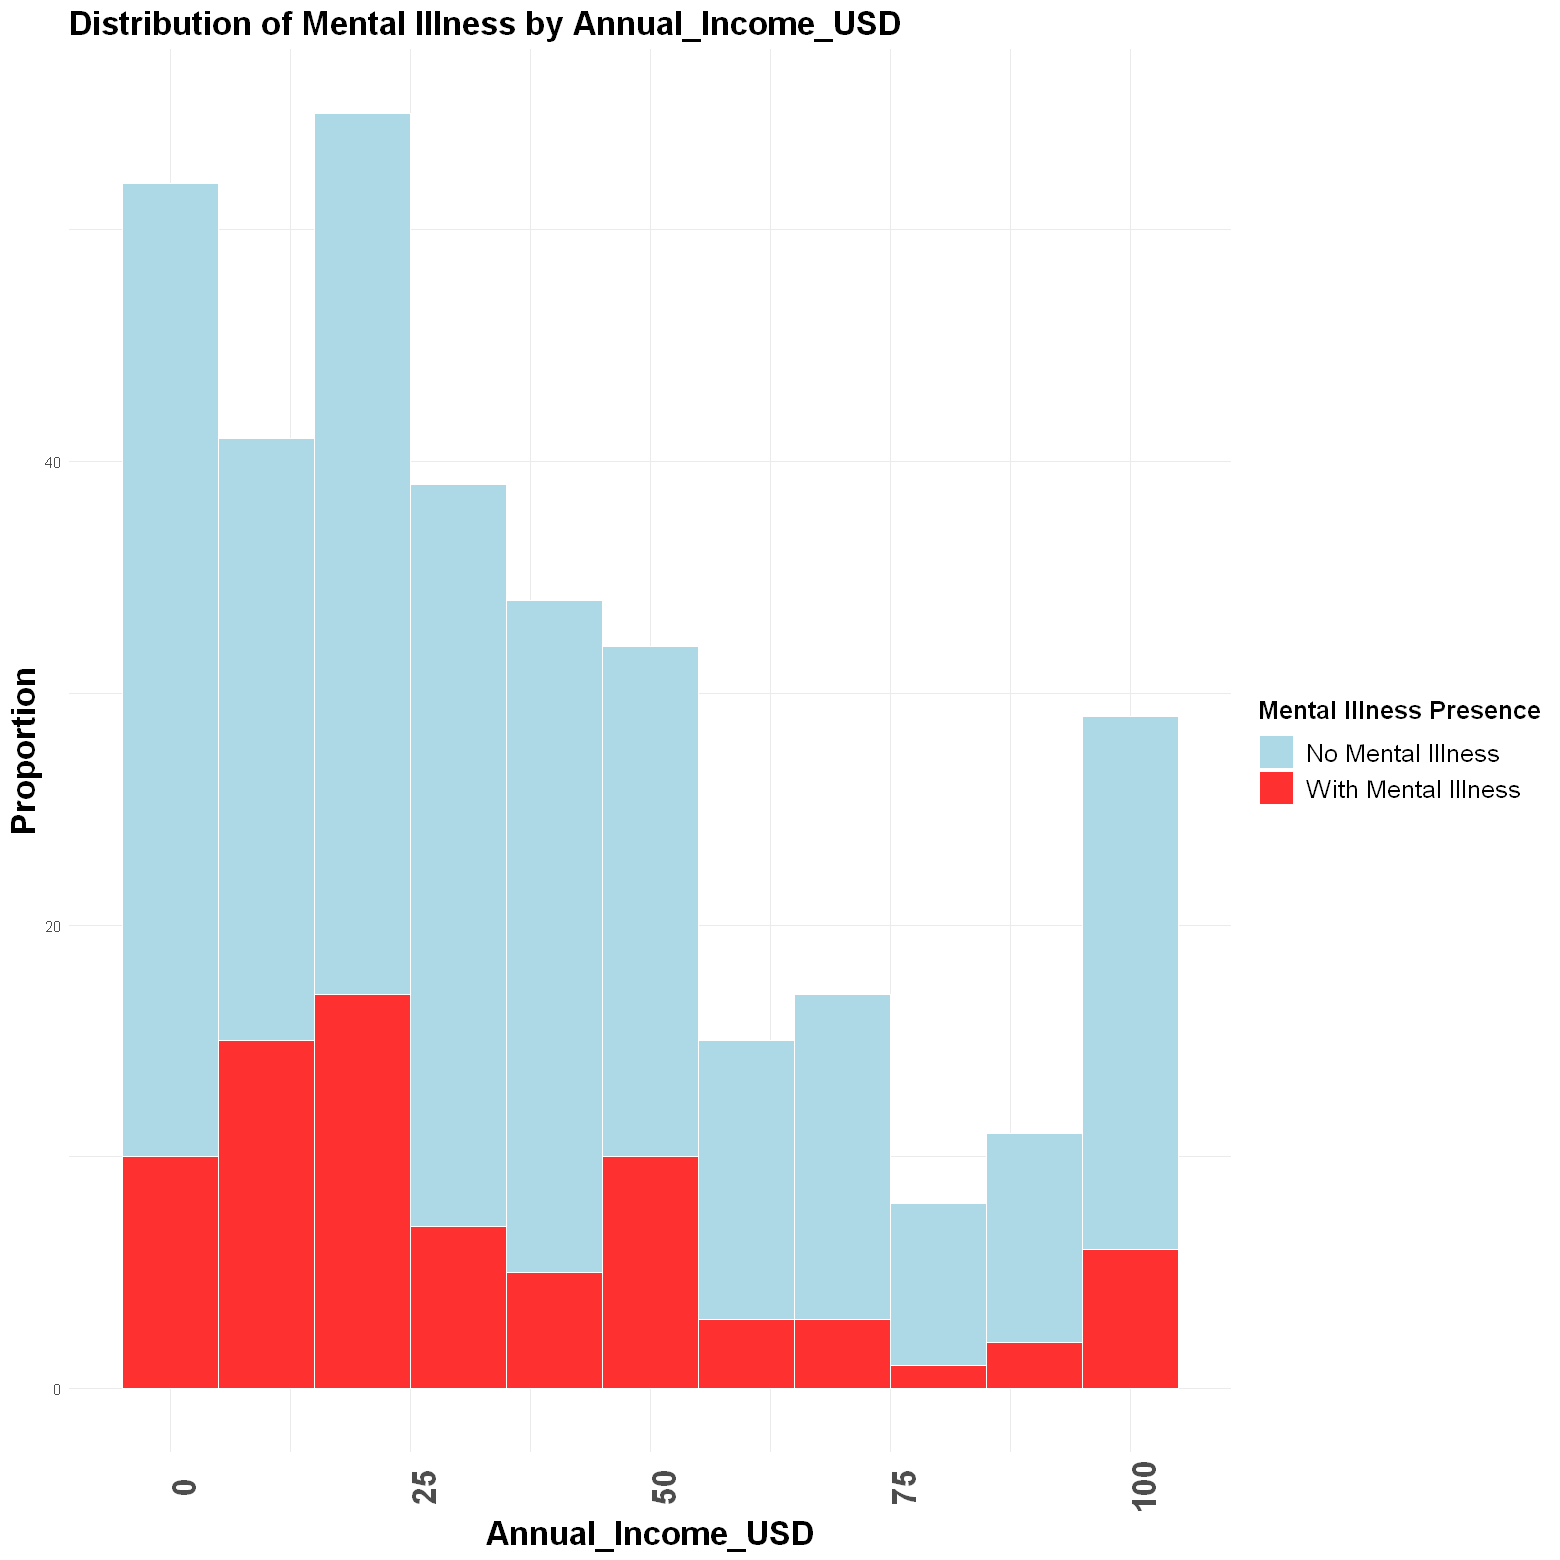

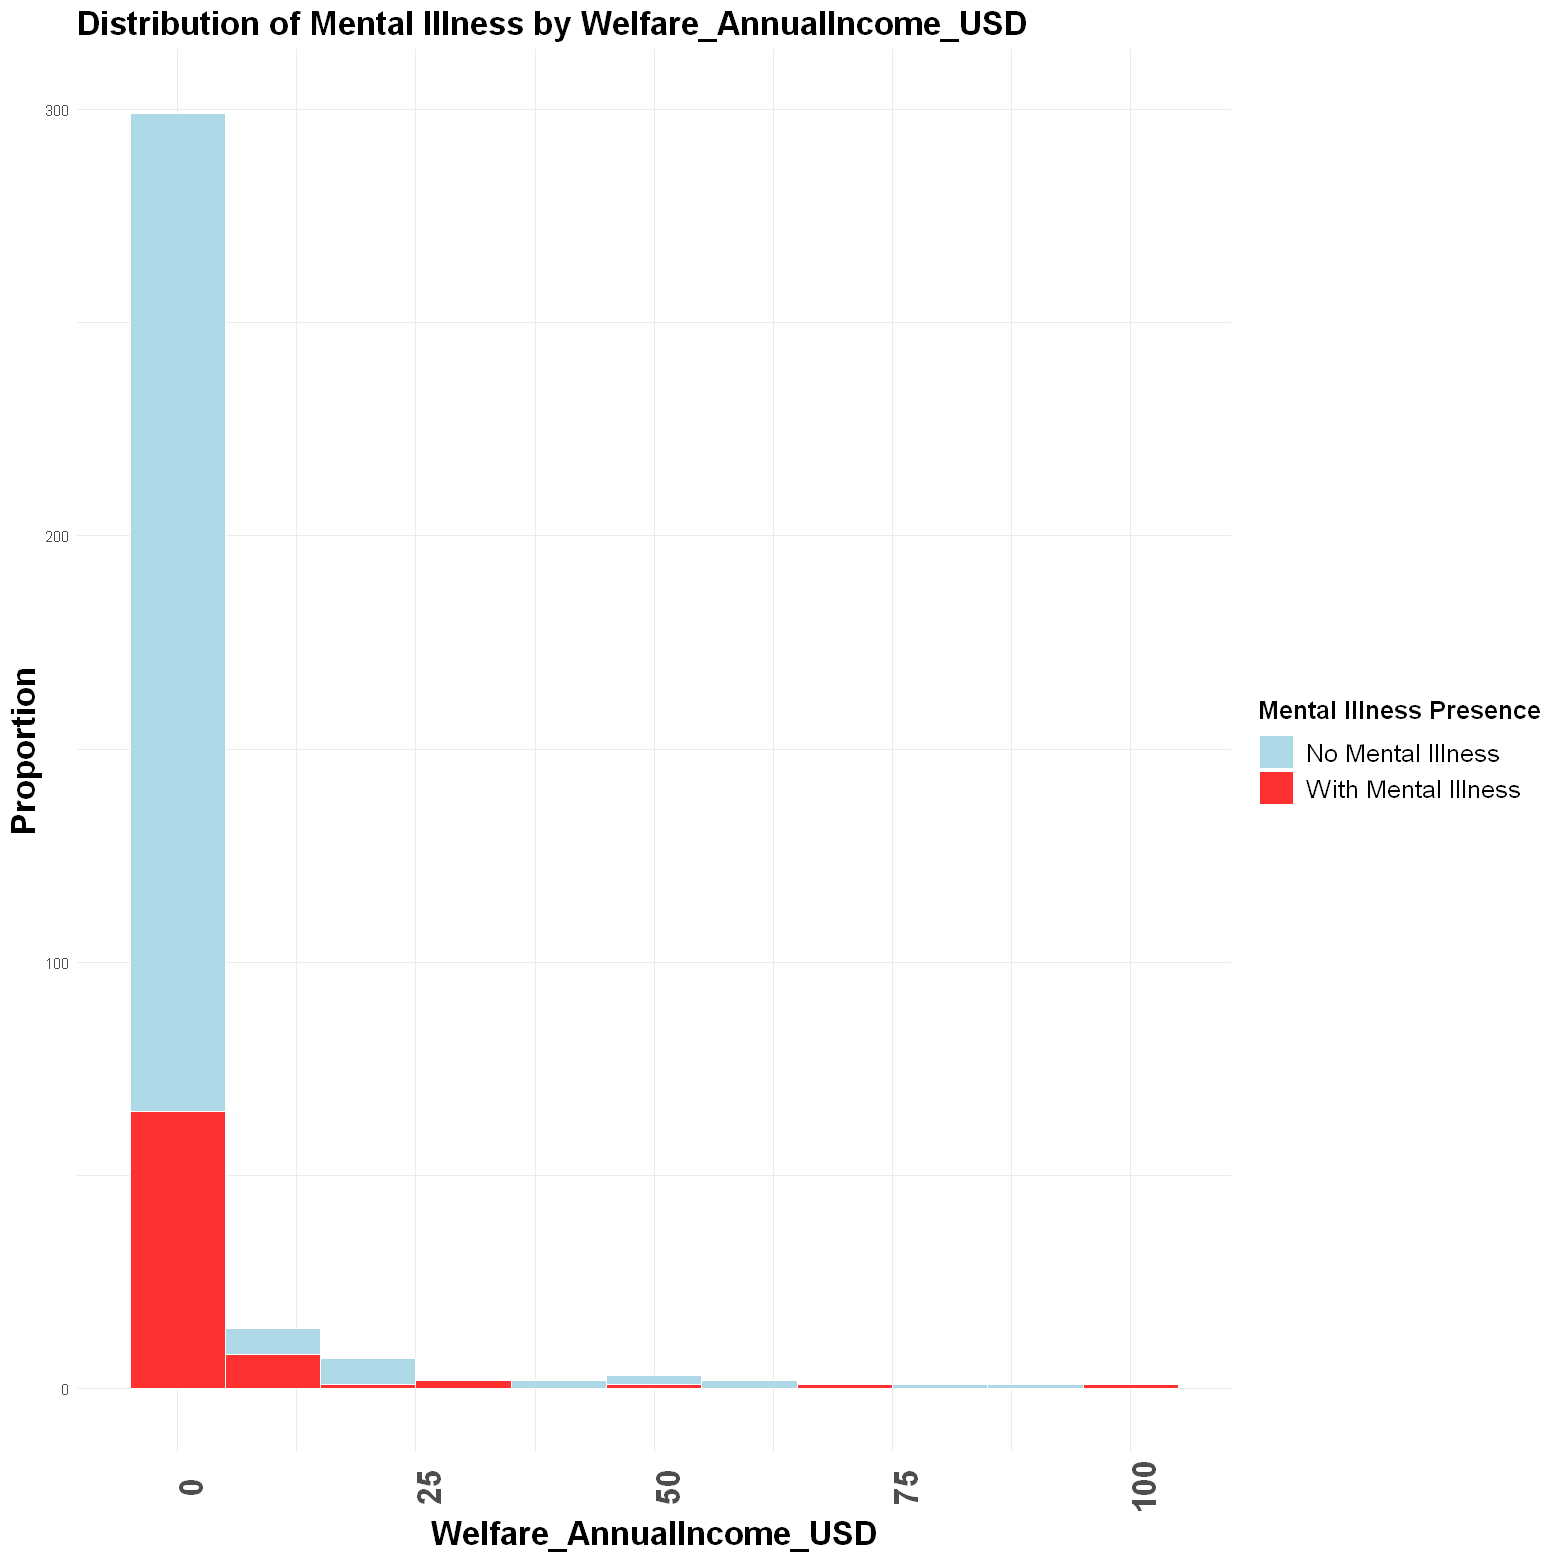

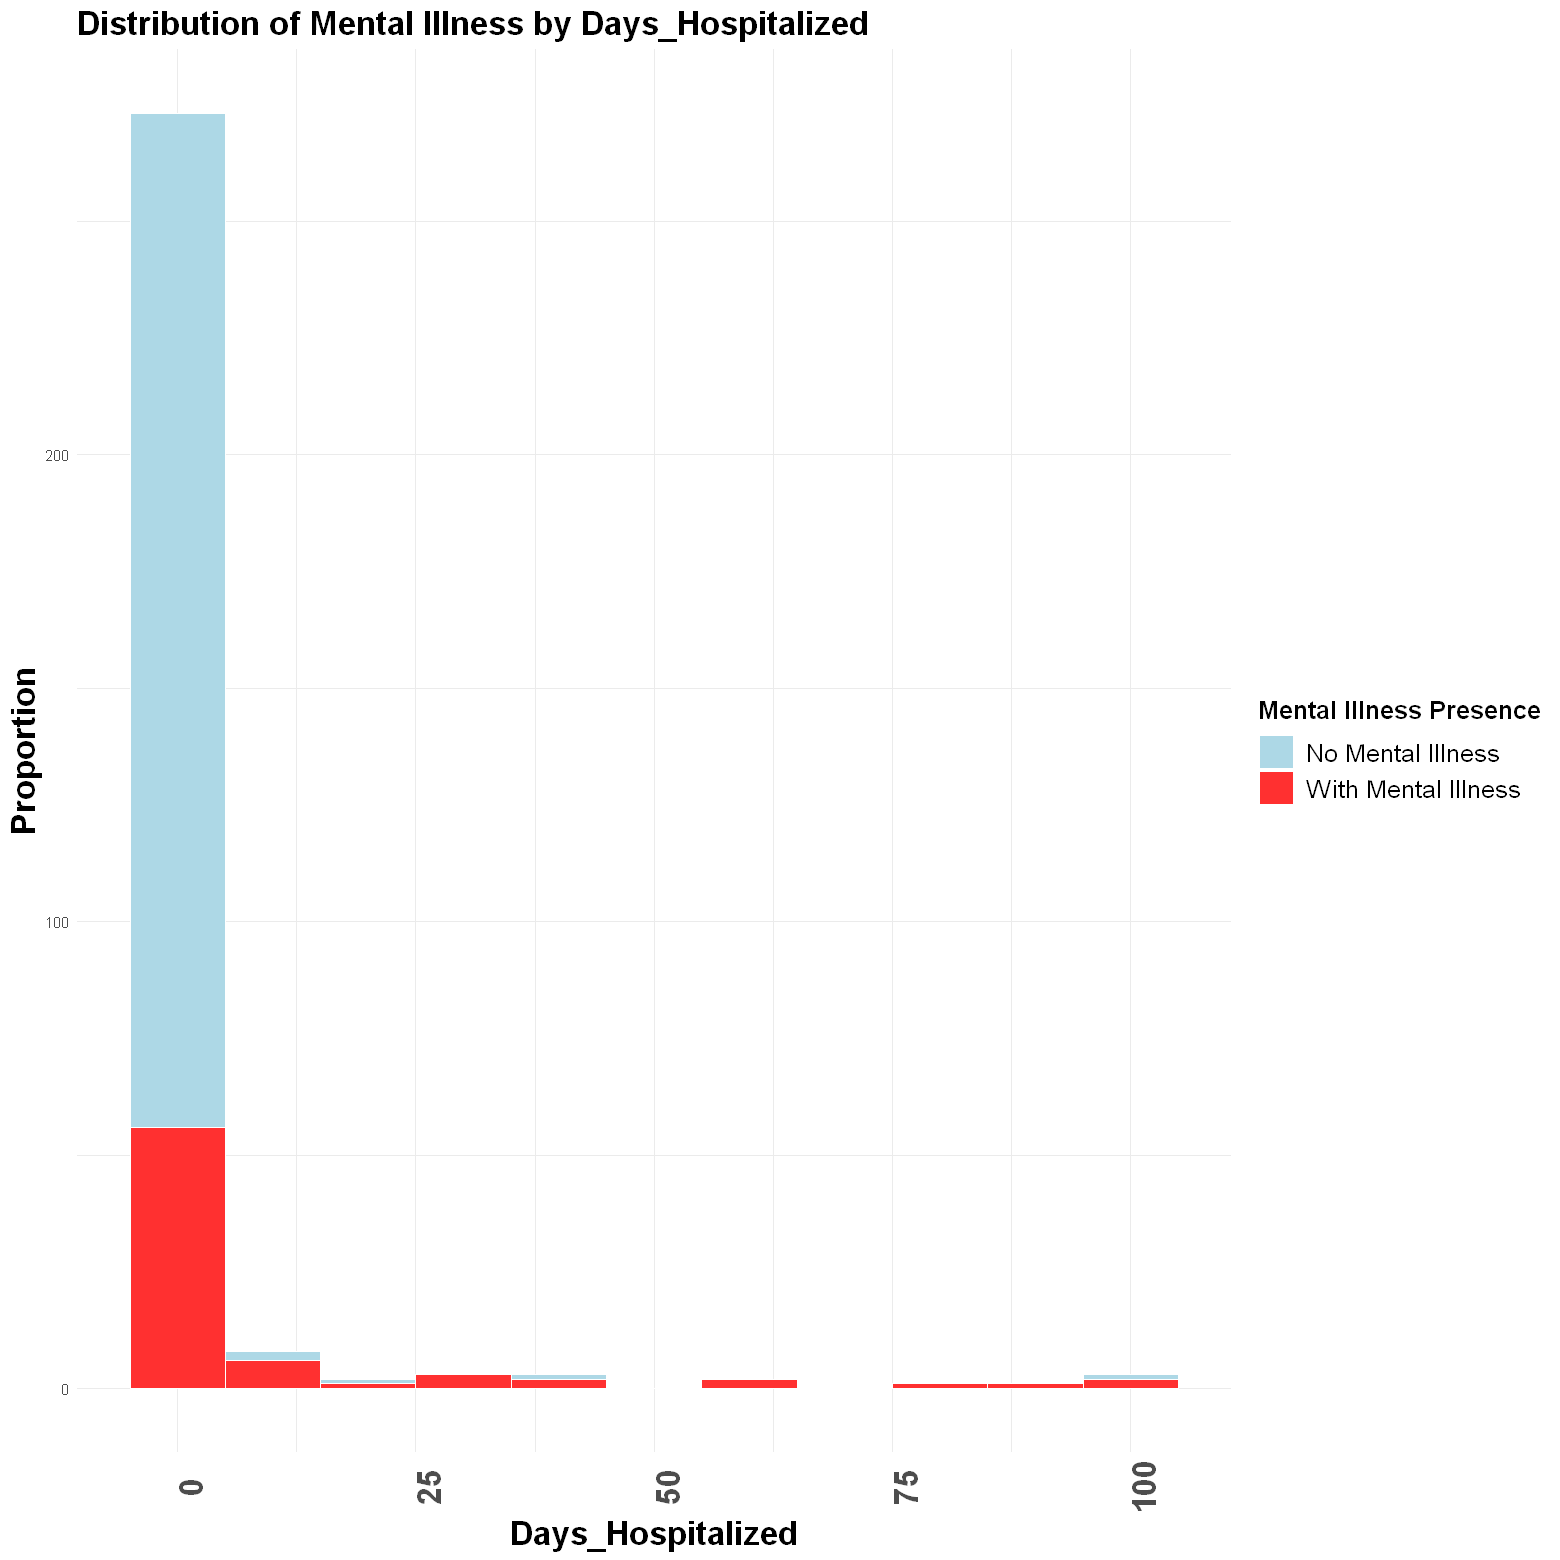

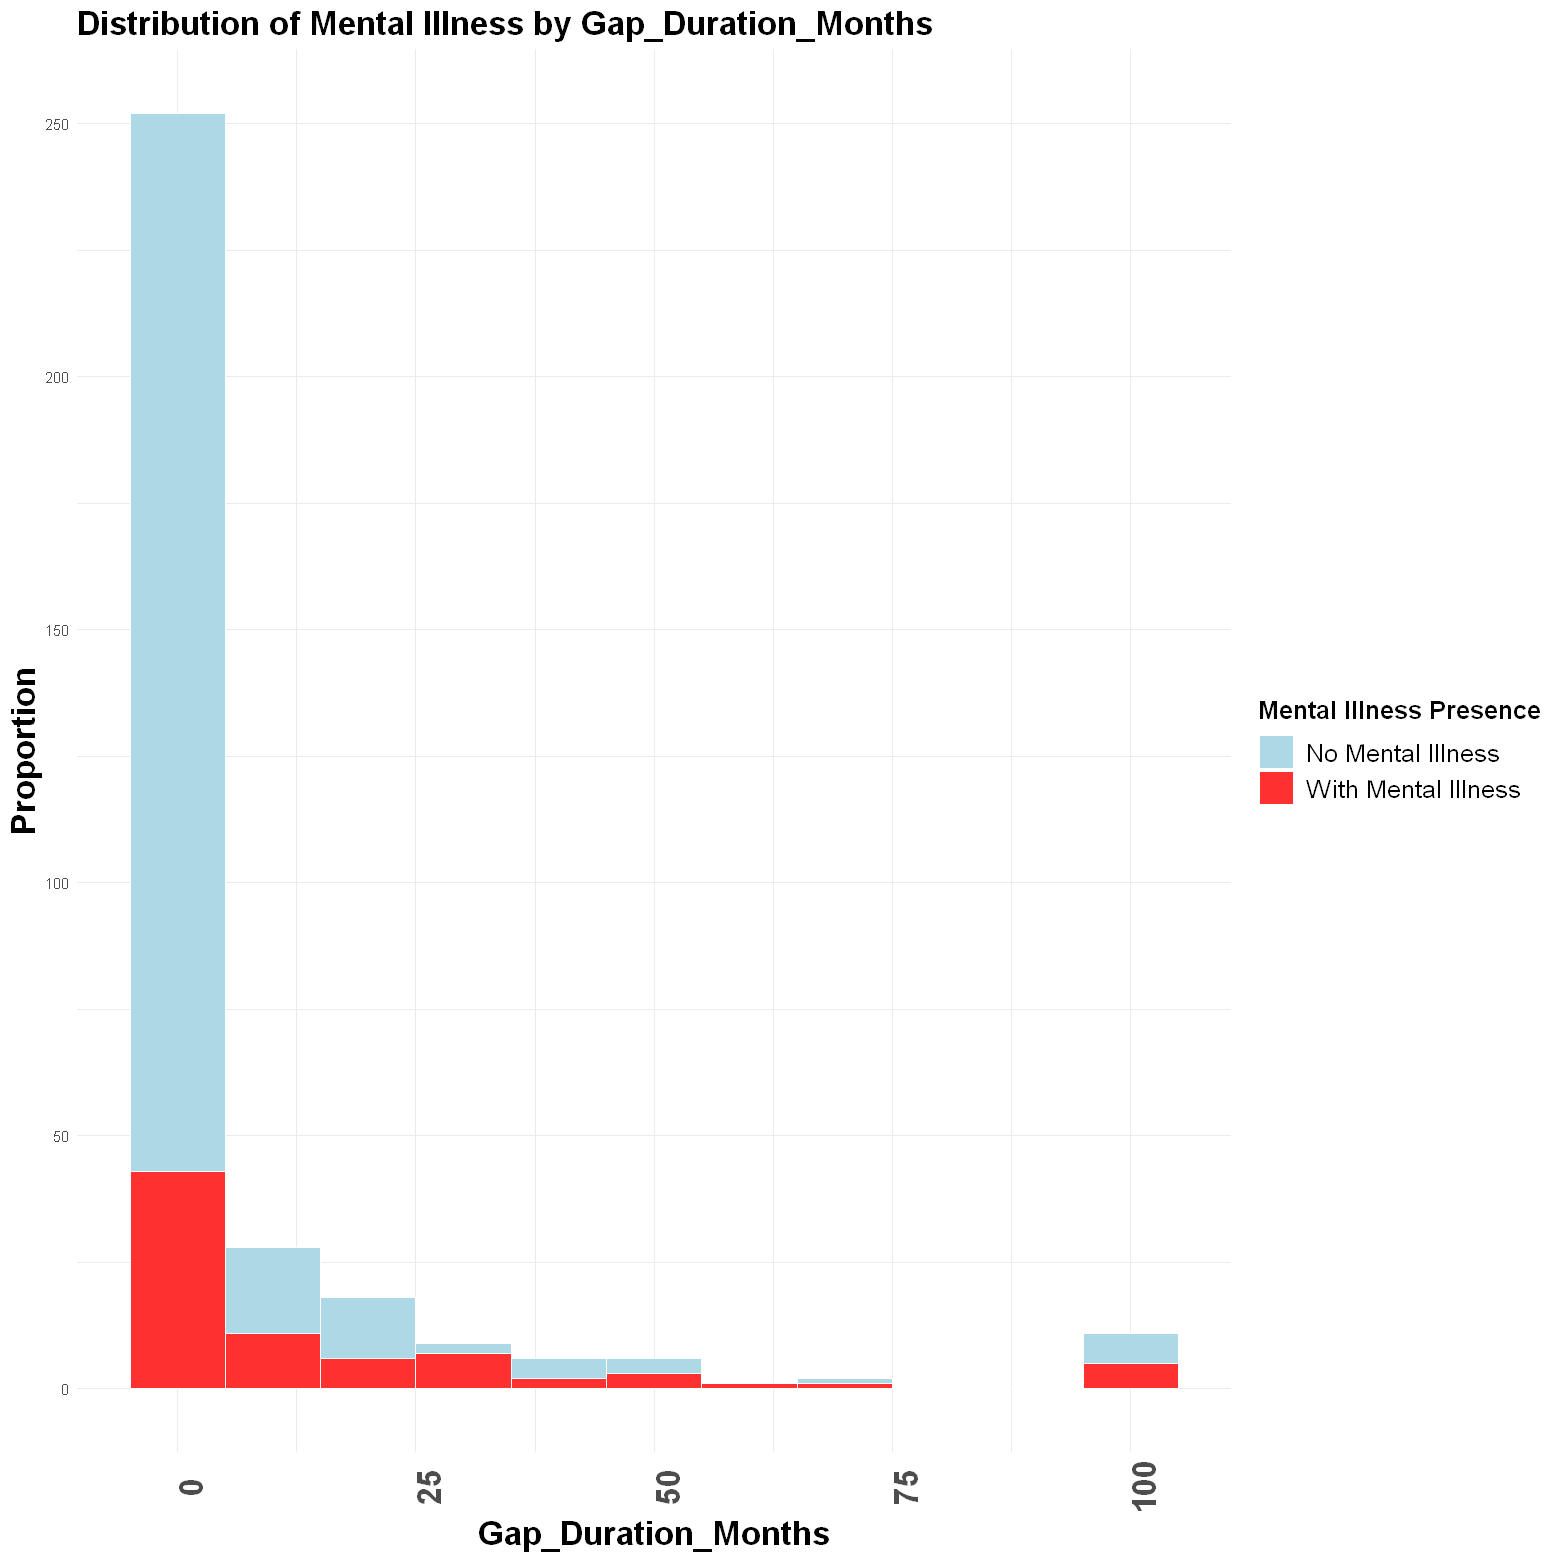

In [37]:
features <- c("Annual_Income_USD", "Welfare_AnnualIncome_USD", "Days_Hospitalized", "Gap_Duration_Months")

# Convert Mental_Illness to a factor
df$Mental_Illness <- factor(df$Mental_Illness, levels = c(0, 1))

# Set plot dimensions
options(repr.plot.width = 13, repr.plot.height = 13)

# Loop through features and create plots
for (feature in features){
    print(
        ggplot(df, aes_string(x = feature, fill = "Mental_Illness")) +
        geom_histogram(binwidth = 10, col = "white") +
        labs(title = paste("Distribution of Mental Illness by", feature),
             x = feature,
             y = "Proportion",
             fill = "Mental Illness Presence") +
        scale_fill_manual(values = c("0" = "lightblue", "1" = "firebrick1"),
                          labels = c("No Mental Illness", "With Mental Illness")) +
        theme_minimal() +
        theme(
            plot.title = element_text(size = 20, face = "bold"),
            axis.title = element_text(size = 20, face = "bold"),
            axis.text.x = element_text(size = 20, face = "bold", angle = 90),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 15, face = "bold"),  
            legend.key.size = unit(1.5, "lines")
        )
    )
}


# 

- The presence of mental illness is more prevalent among those with lower income, whether it be welfare income or general annual income.

- There is a visible disparity in income distribution between those with and without mental illness, with mental illness more common in lower income brackets.

- While these graphs do not establish causality, they suggest a correlation where lower income might be associated with higher reported instances of mental illness.

## Why might individuals in Section 8 housing have a significantly higher number of hospitalizations, and what factors associated with this housing status contribute to this outcome?

## How do socioeconomic support systems and access to technology correlate with employment status and mental health conditions?

In [38]:
df$On_Section8_Housing <- factor(df$On_Section8_Housing, levels = c(0, 1), labels = c("No", "Yes"))
df$Receives_FoodStamps <- factor(df$Receives_FoodStamps, levels = c(0, 1), labels = c("No", "Yes"))
df$Lives_With_Parents <- factor(df$Lives_With_Parents, levels = c(0, 1), labels = c("No", "Yes"))
df$Regular_Internet_Access <- factor(df$Regular_Internet_Access, levels = c(0, 1), labels = c("No", "Yes"))

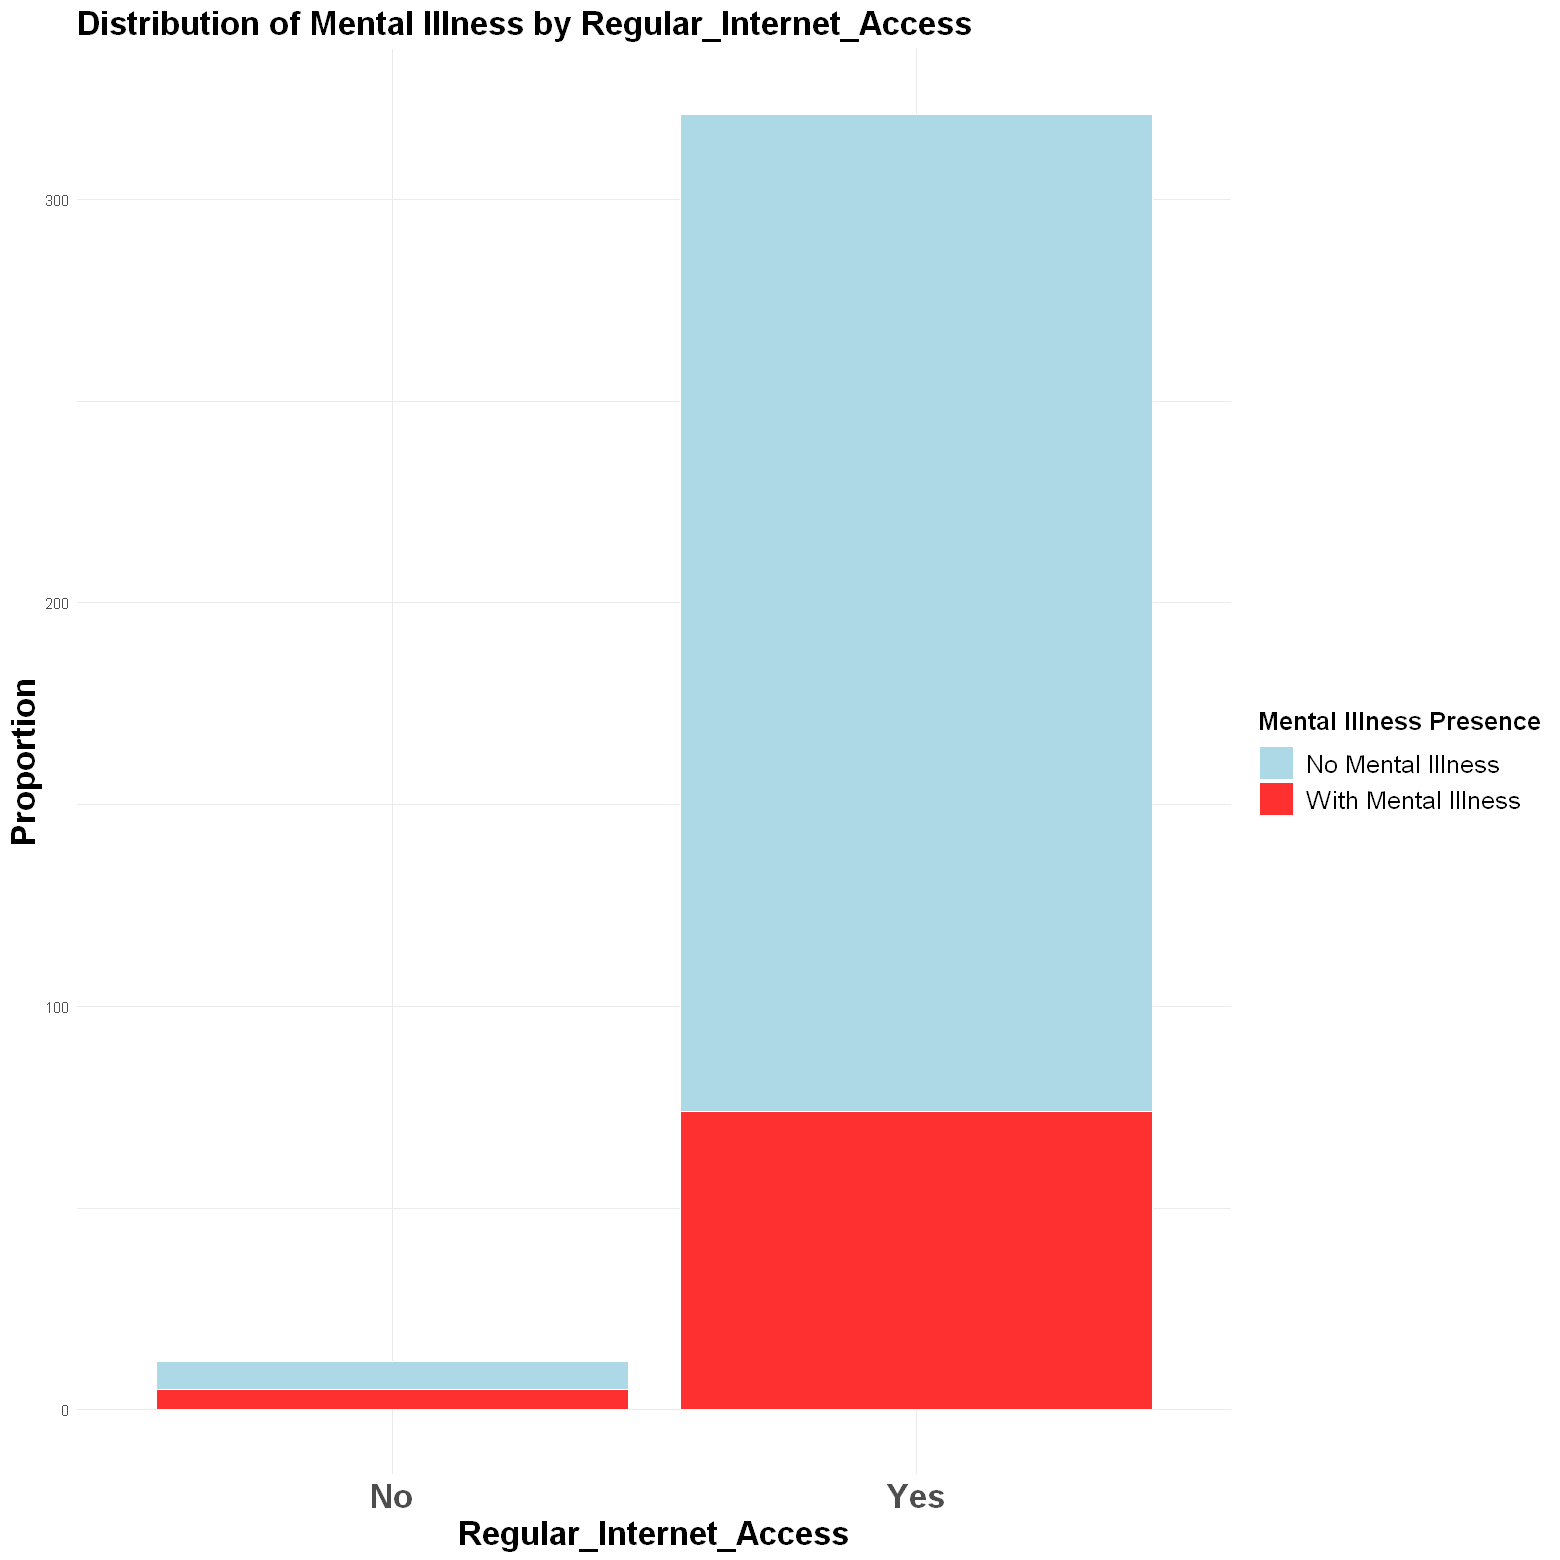

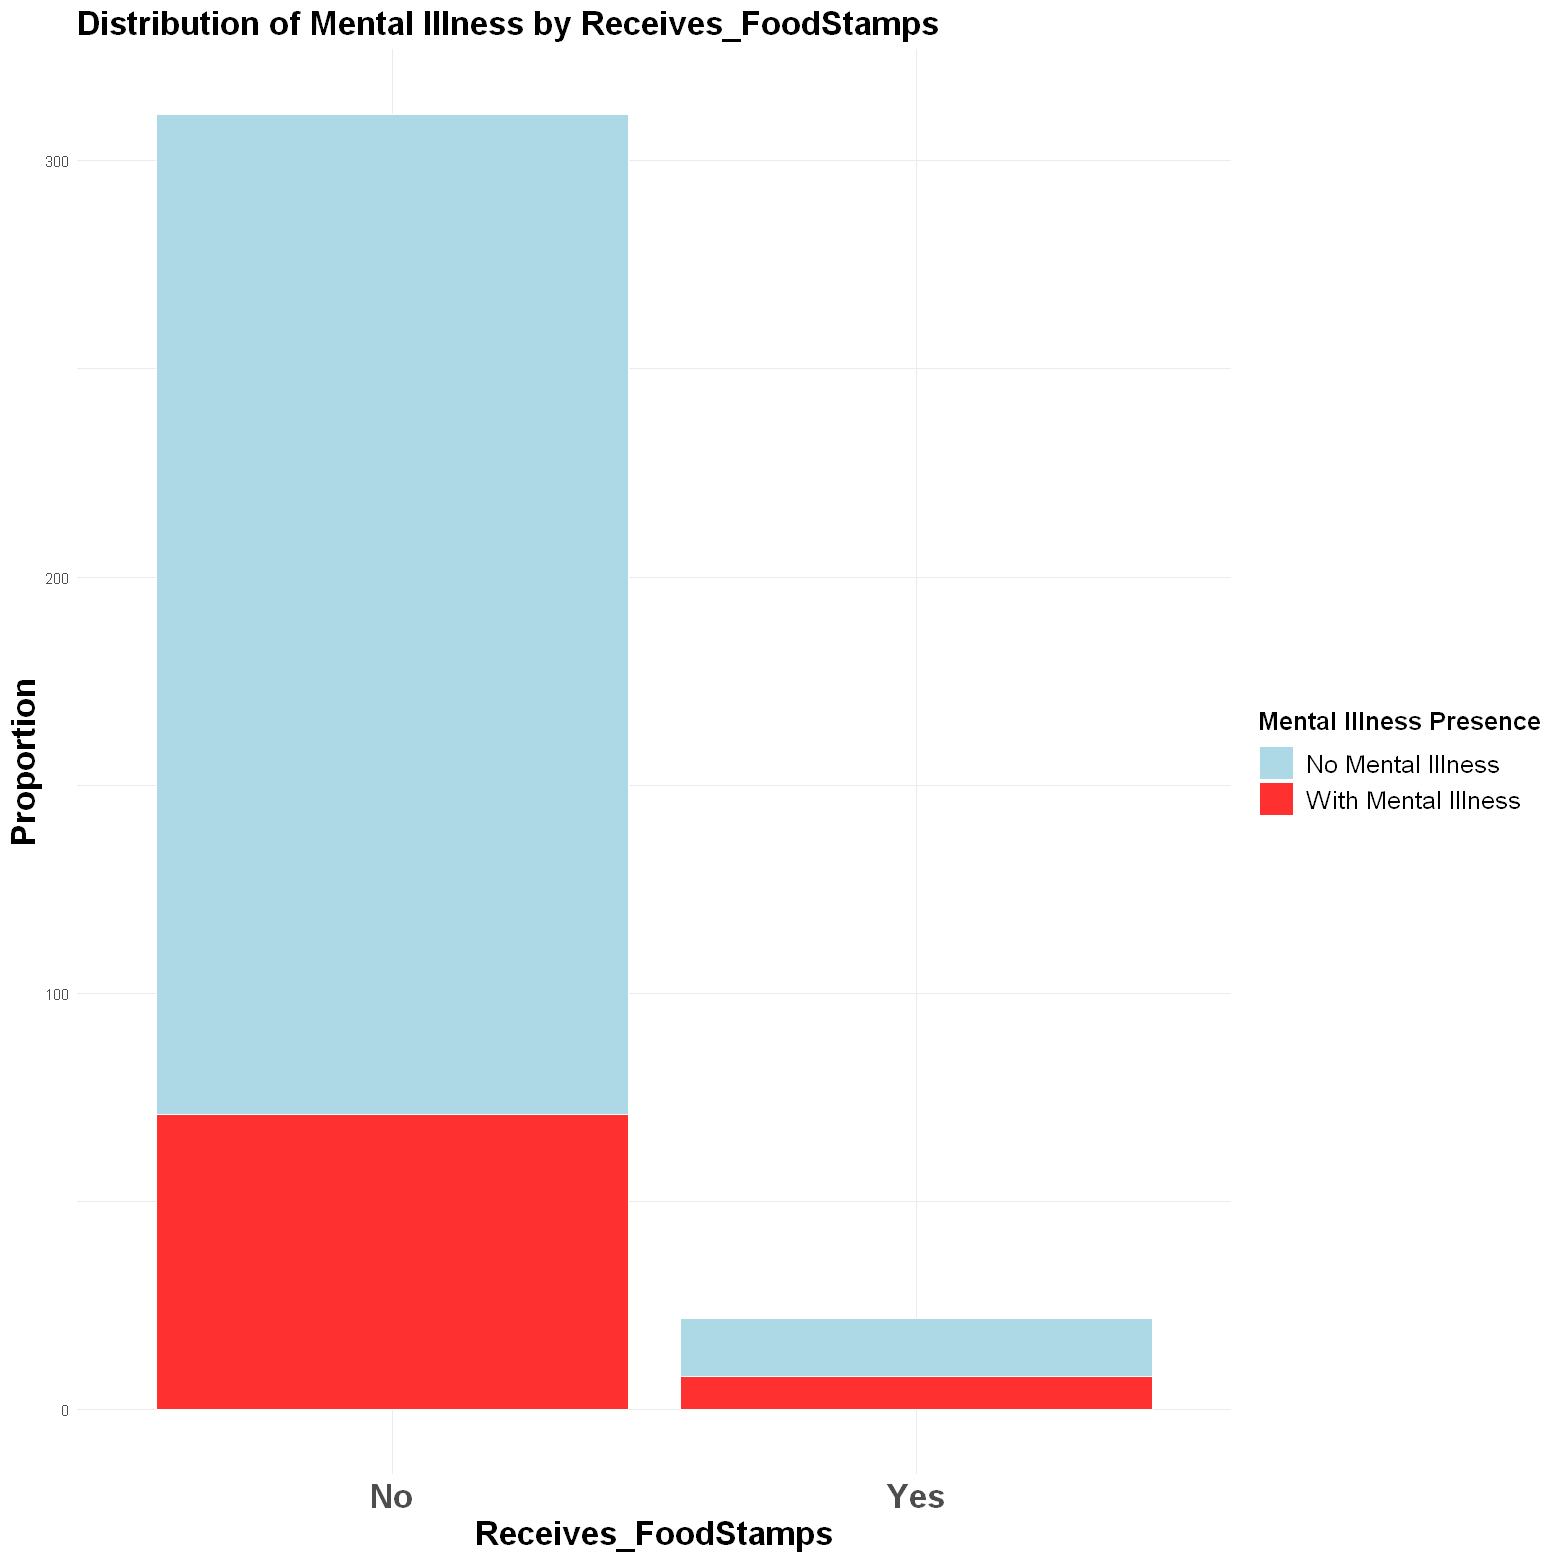

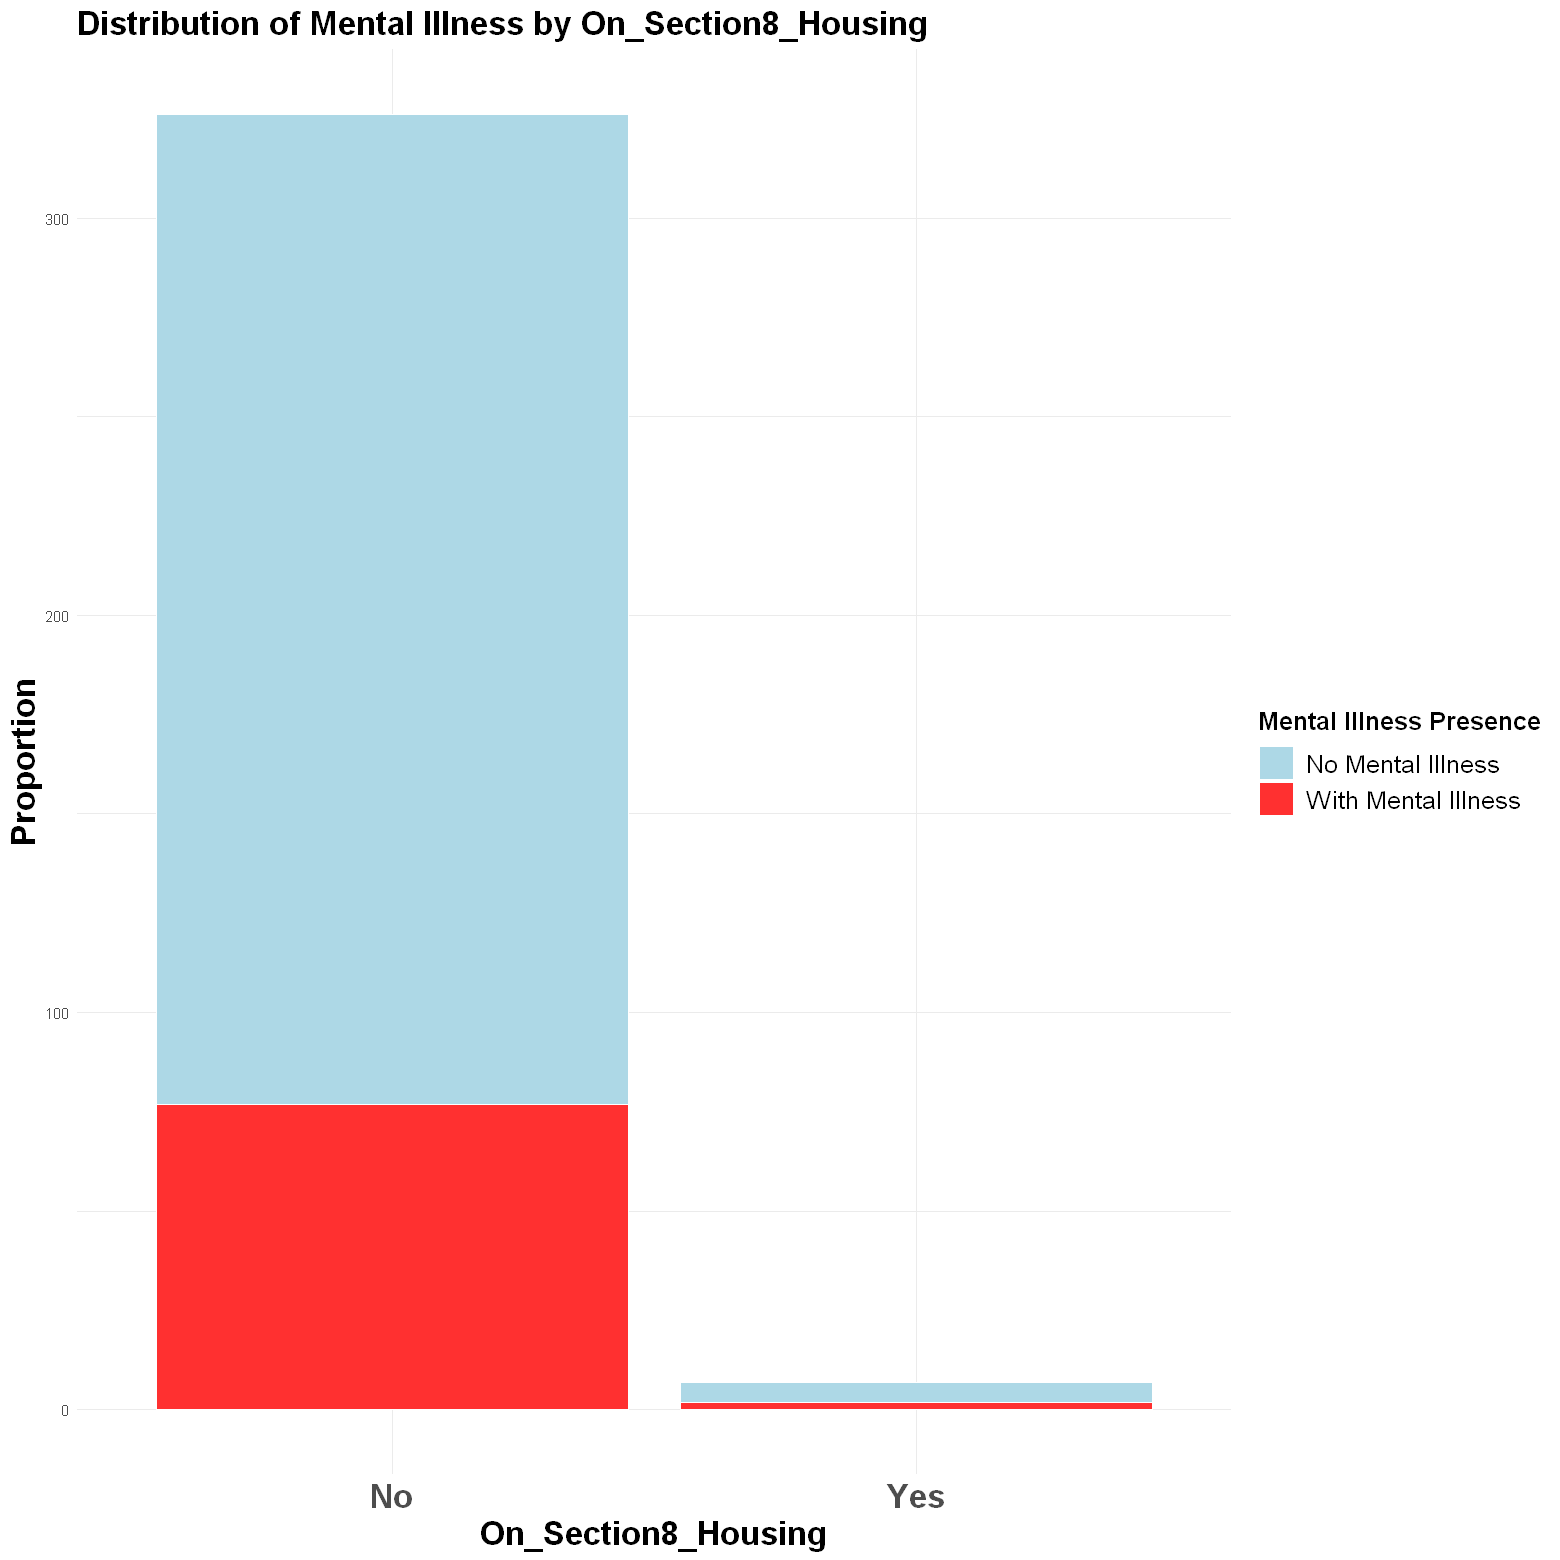

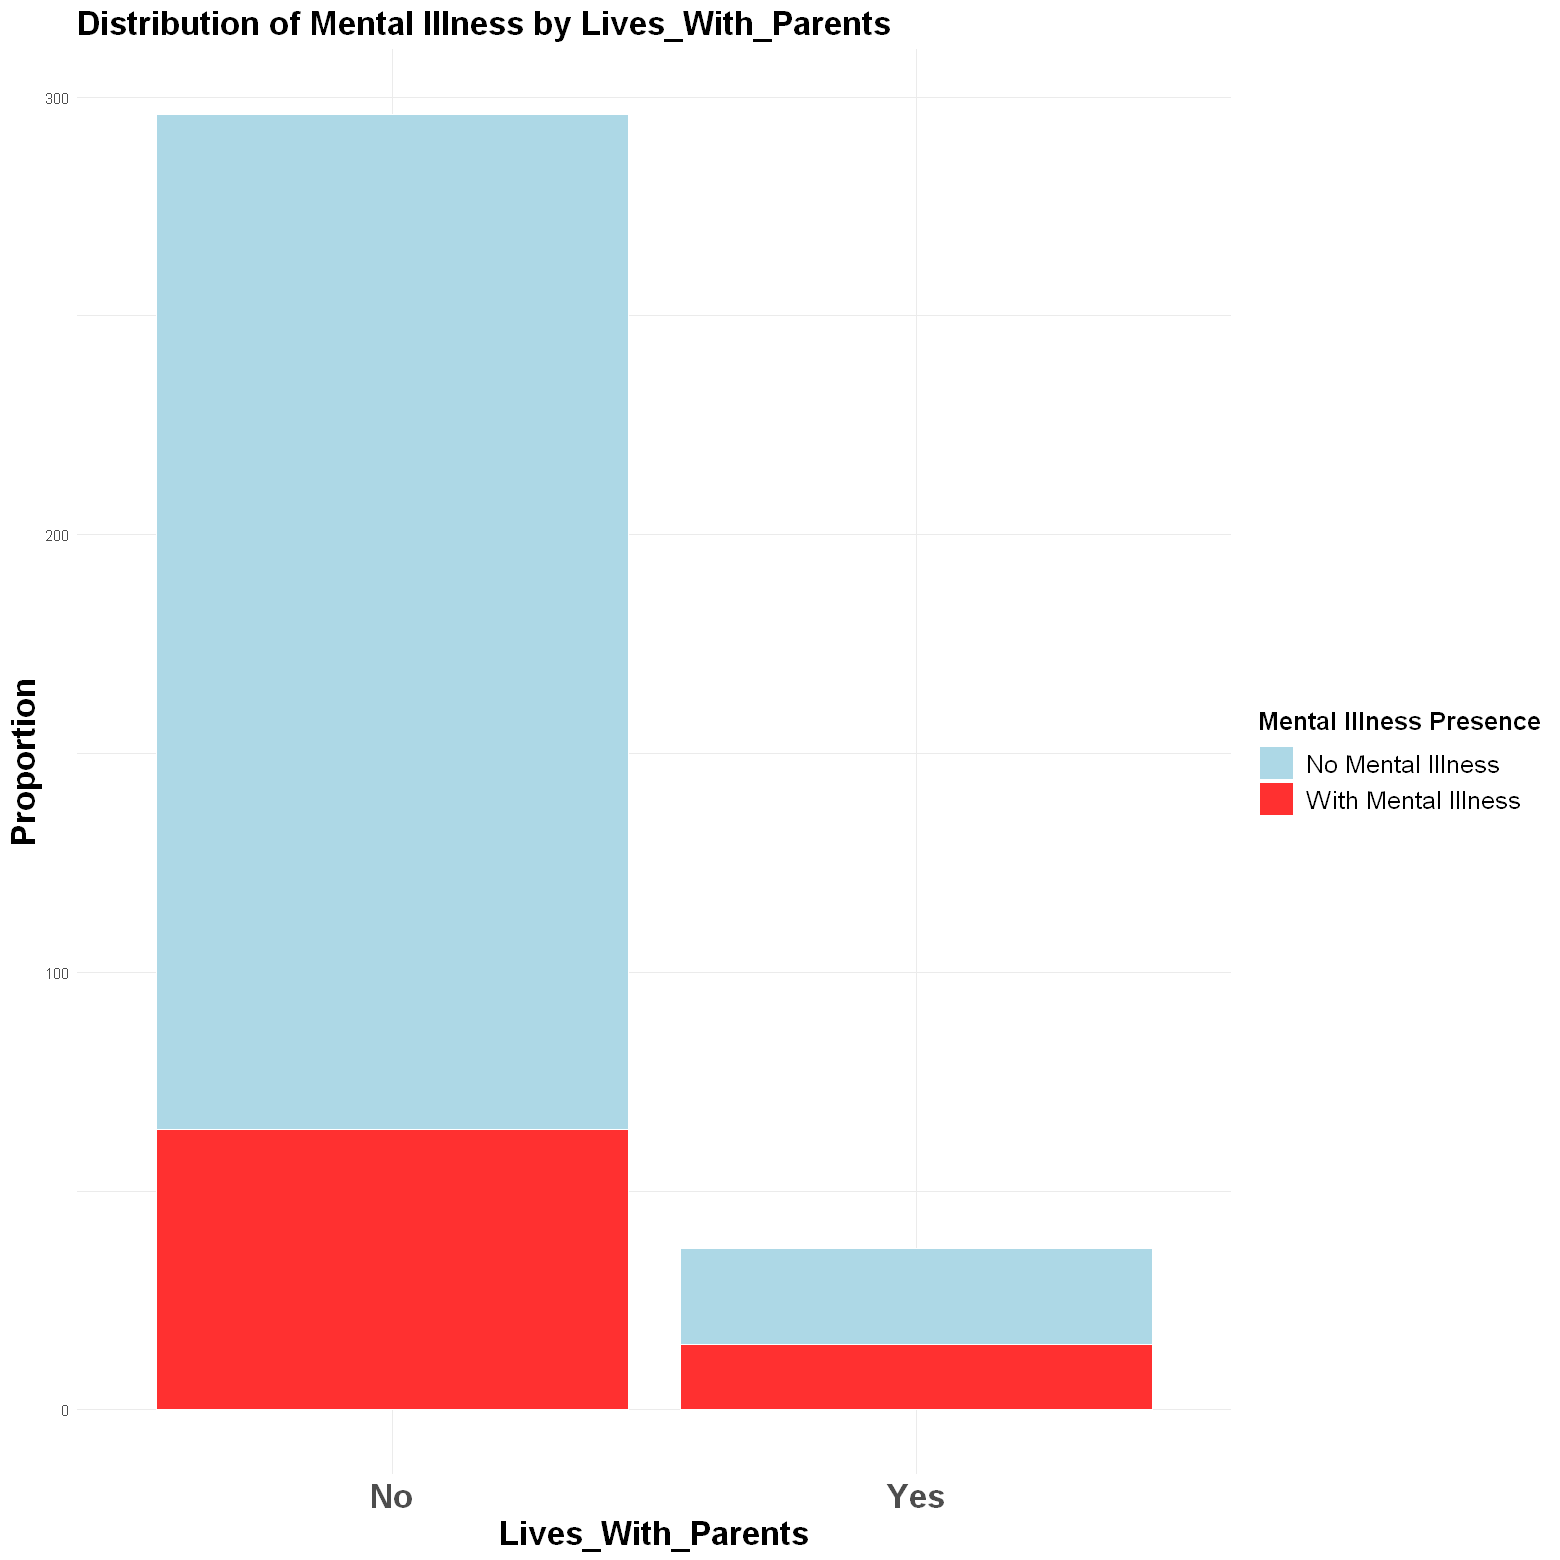

In [39]:
conditions <- c("Regular_Internet_Access", "Receives_FoodStamps", "On_Section8_Housing", "Lives_With_Parents")

options(repr.plot.width = 13, repr.plot.height = 13)

for (feature in conditions){
    print(
        ggplot(df, aes_string(x = feature, fill = "Mental_Illness")) +
        geom_bar(binwidth = 10, col = "white") +
        labs(title = paste("Distribution of Mental Illness by", feature),
             x = feature,
             y = "Proportion",
             fill = "Mental Illness Presence") +
        scale_fill_manual(values = c("0" = "lightblue", "1" = "firebrick1"),
                          labels = c("No Mental Illness", "With Mental Illness")) +
        theme_minimal() +
        theme(
            plot.title = element_text(size = 20, face = "bold"),
            axis.title = element_text(size = 20, face = "bold"),
            axis.text.x = element_text(size = 20, face = "bold"),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 15, face = "bold"),  
            legend.key.size = unit(1.5, "lines")
        )
    )
}

In [40]:
logistic_model5 <- glm(Mental_Illness ~ Receives_FoodStamps + Welfare_AnnualIncome_USD + 
                       On_Section8_Housing, data = df, family = "binomial")
summary(logistic_model5)


Call:
glm(formula = Mental_Illness ~ Receives_FoodStamps + Welfare_AnnualIncome_USD + 
    On_Section8_Housing, family = "binomial", data = df)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.254386   0.140245  -8.944   <2e-16 ***
Receives_FoodStampsYes    0.635964   0.489762   1.299    0.194    
Welfare_AnnualIncome_USD  0.010613   0.009182   1.156    0.248    
On_Section8_HousingYes   -0.084818   0.901689  -0.094    0.925    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 364.88  on 332  degrees of freedom
Residual deviance: 361.71  on 329  degrees of freedom
AIC: 369.71

Number of Fisher Scoring iterations: 4


In [44]:
logistic_model6 <- glm(Unemployed ~ Receives_FoodStamps + Welfare_AnnualIncome_USD + 
                       On_Section8_Housing, data = df, family = "binomial")
summary(logistic_model6)


Call:
glm(formula = Unemployed ~ Receives_FoodStamps + Welfare_AnnualIncome_USD + 
    On_Section8_Housing, family = "binomial", data = df)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.245962   0.140036  -8.897  < 2e-16 ***
Receives_FoodStampsYes    1.881257   0.496328   3.790  0.00015 ***
Welfare_AnnualIncome_USD  0.006762   0.009524   0.710  0.47771    
On_Section8_HousingYes    0.486053   0.891471   0.545  0.58560    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 380.44  on 332  degrees of freedom
Residual deviance: 360.91  on 329  degrees of freedom
AIC: 368.91

Number of Fisher Scoring iterations: 4


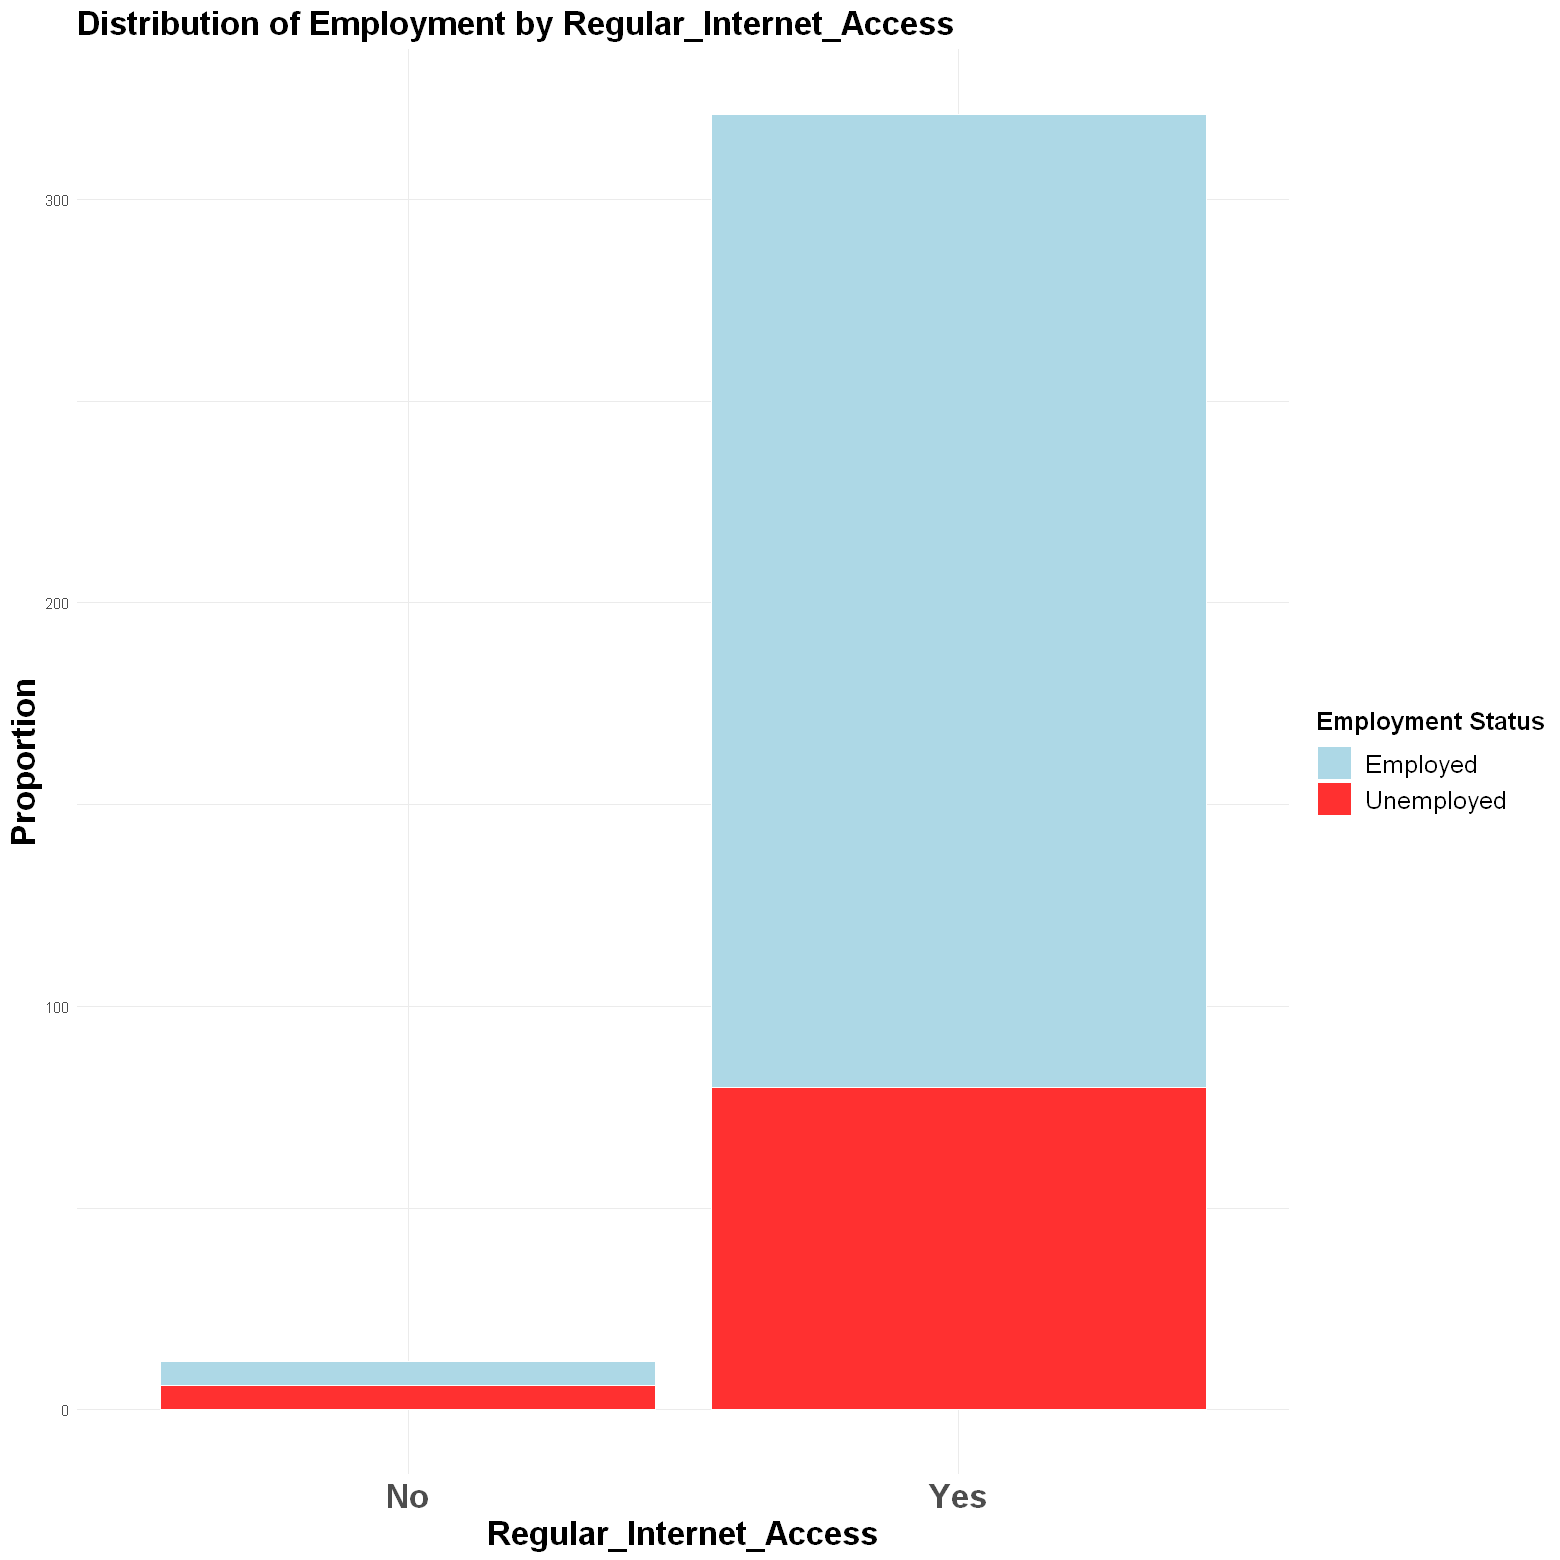

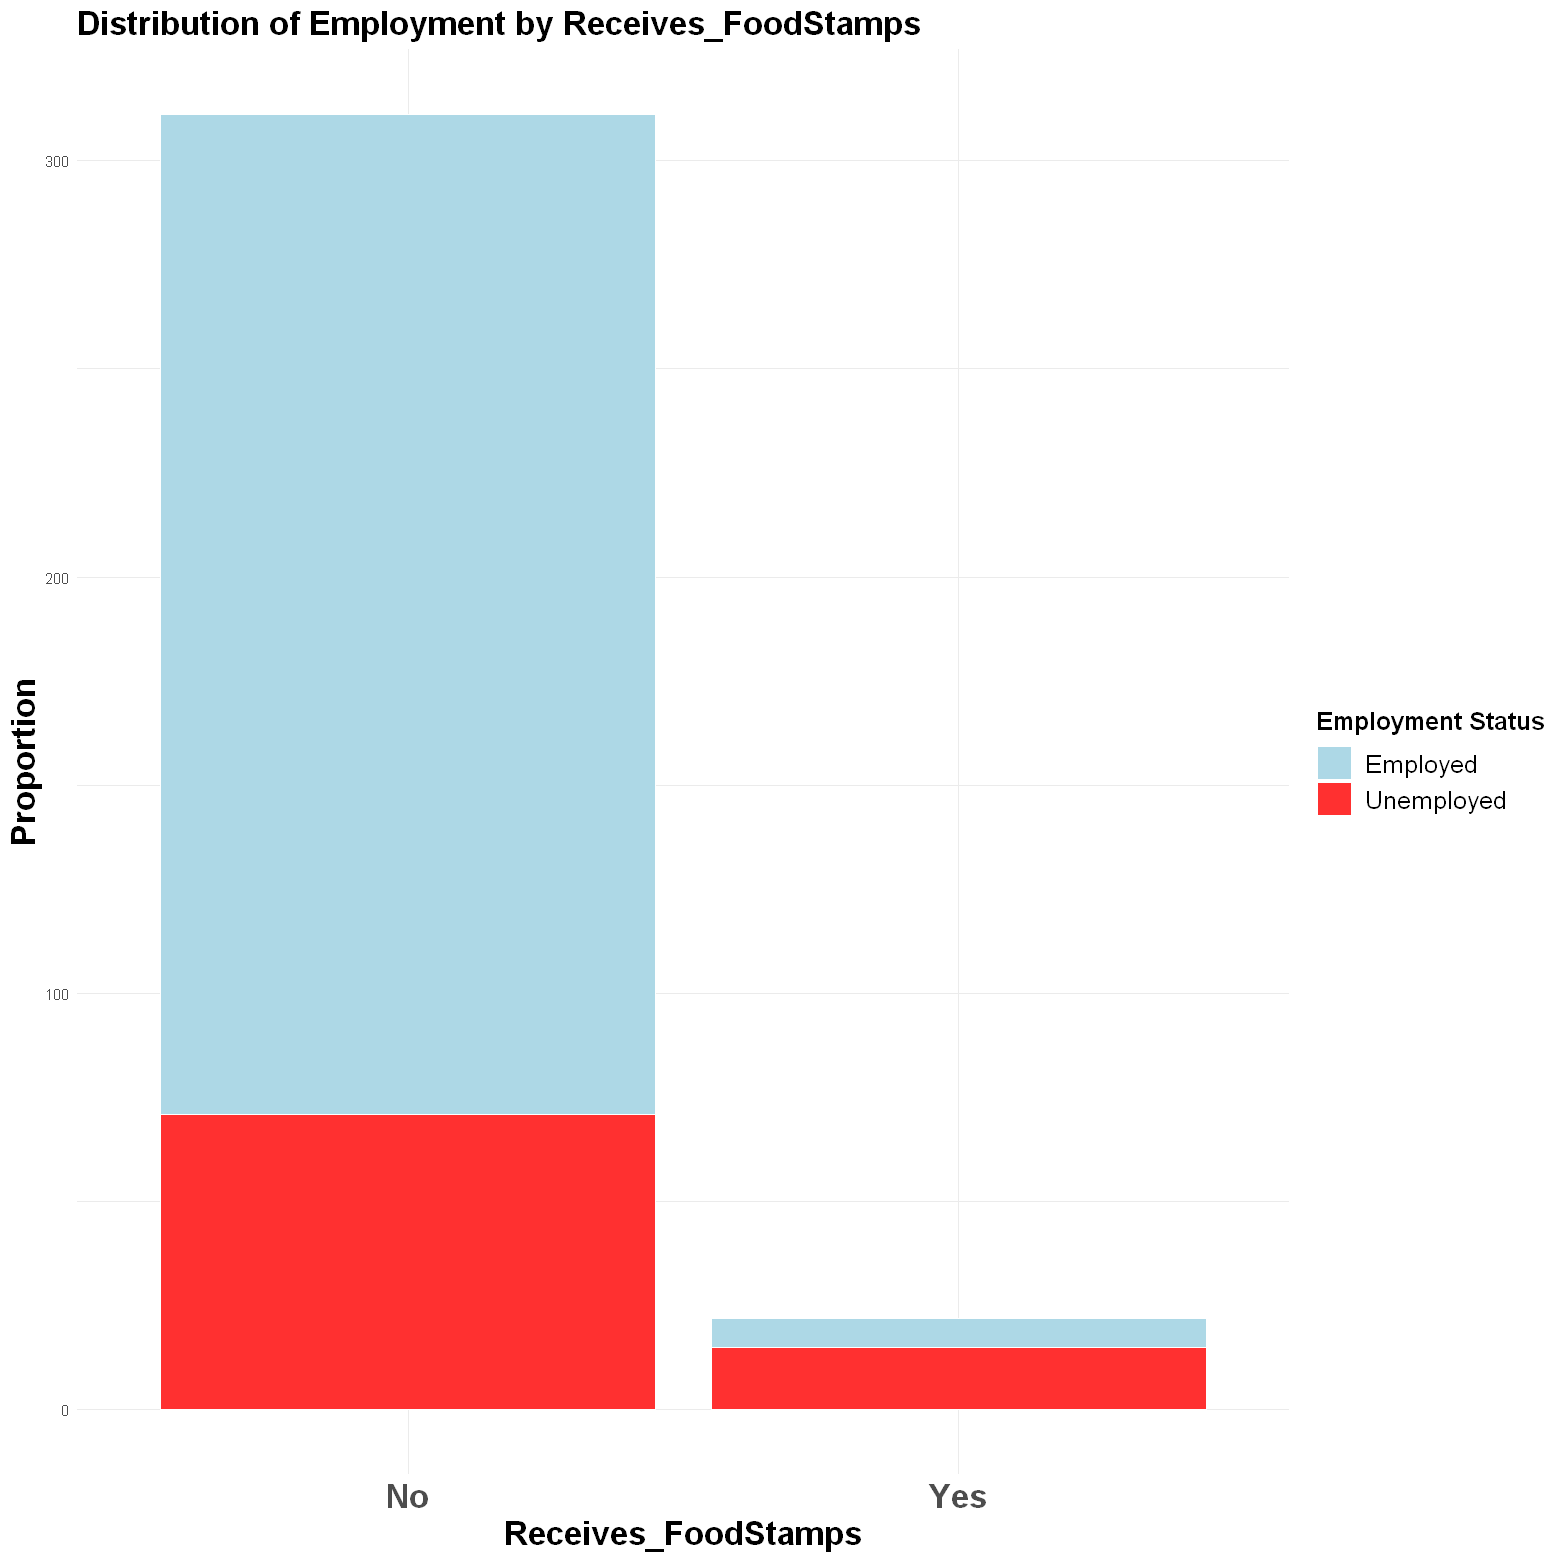

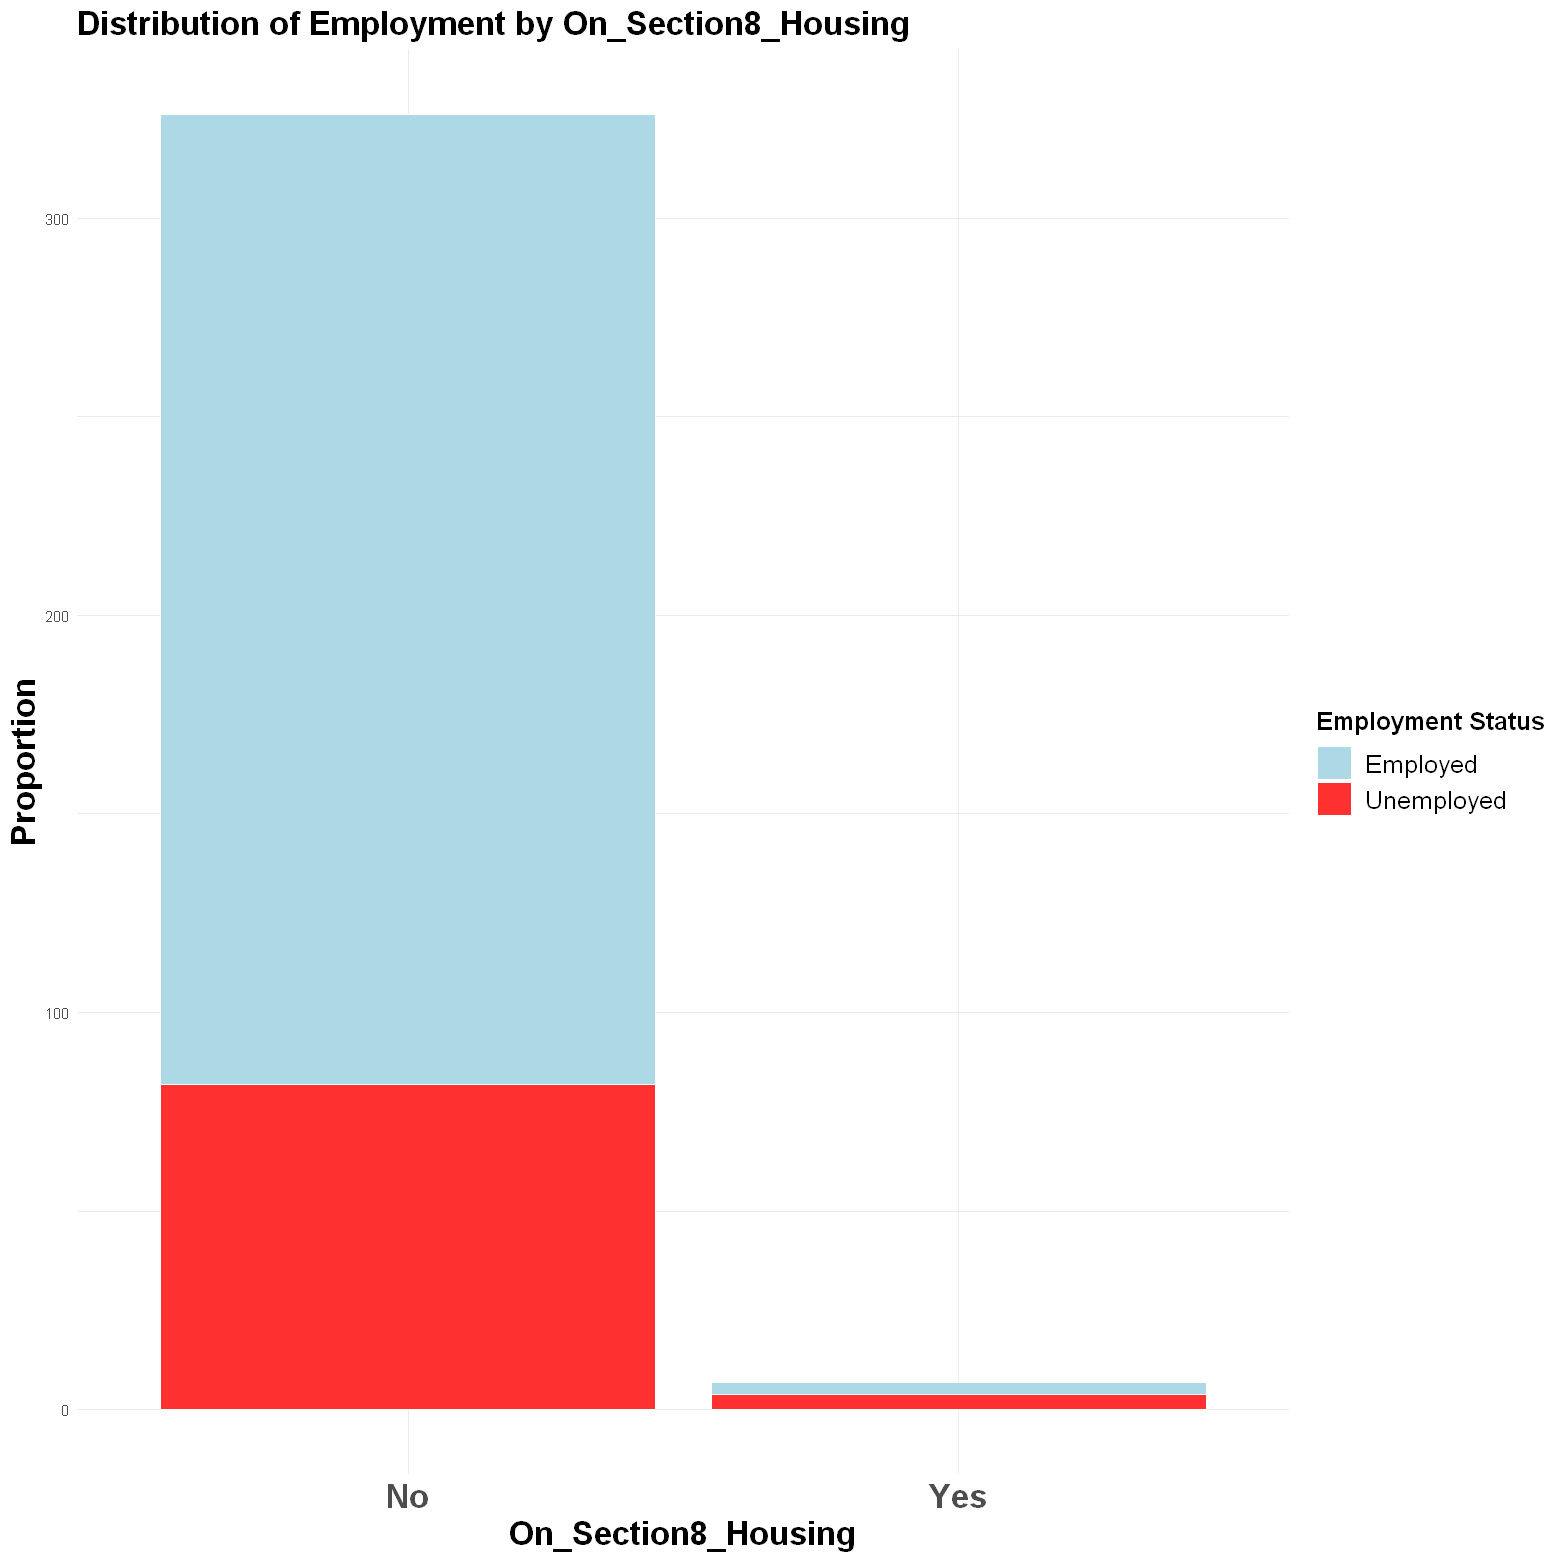

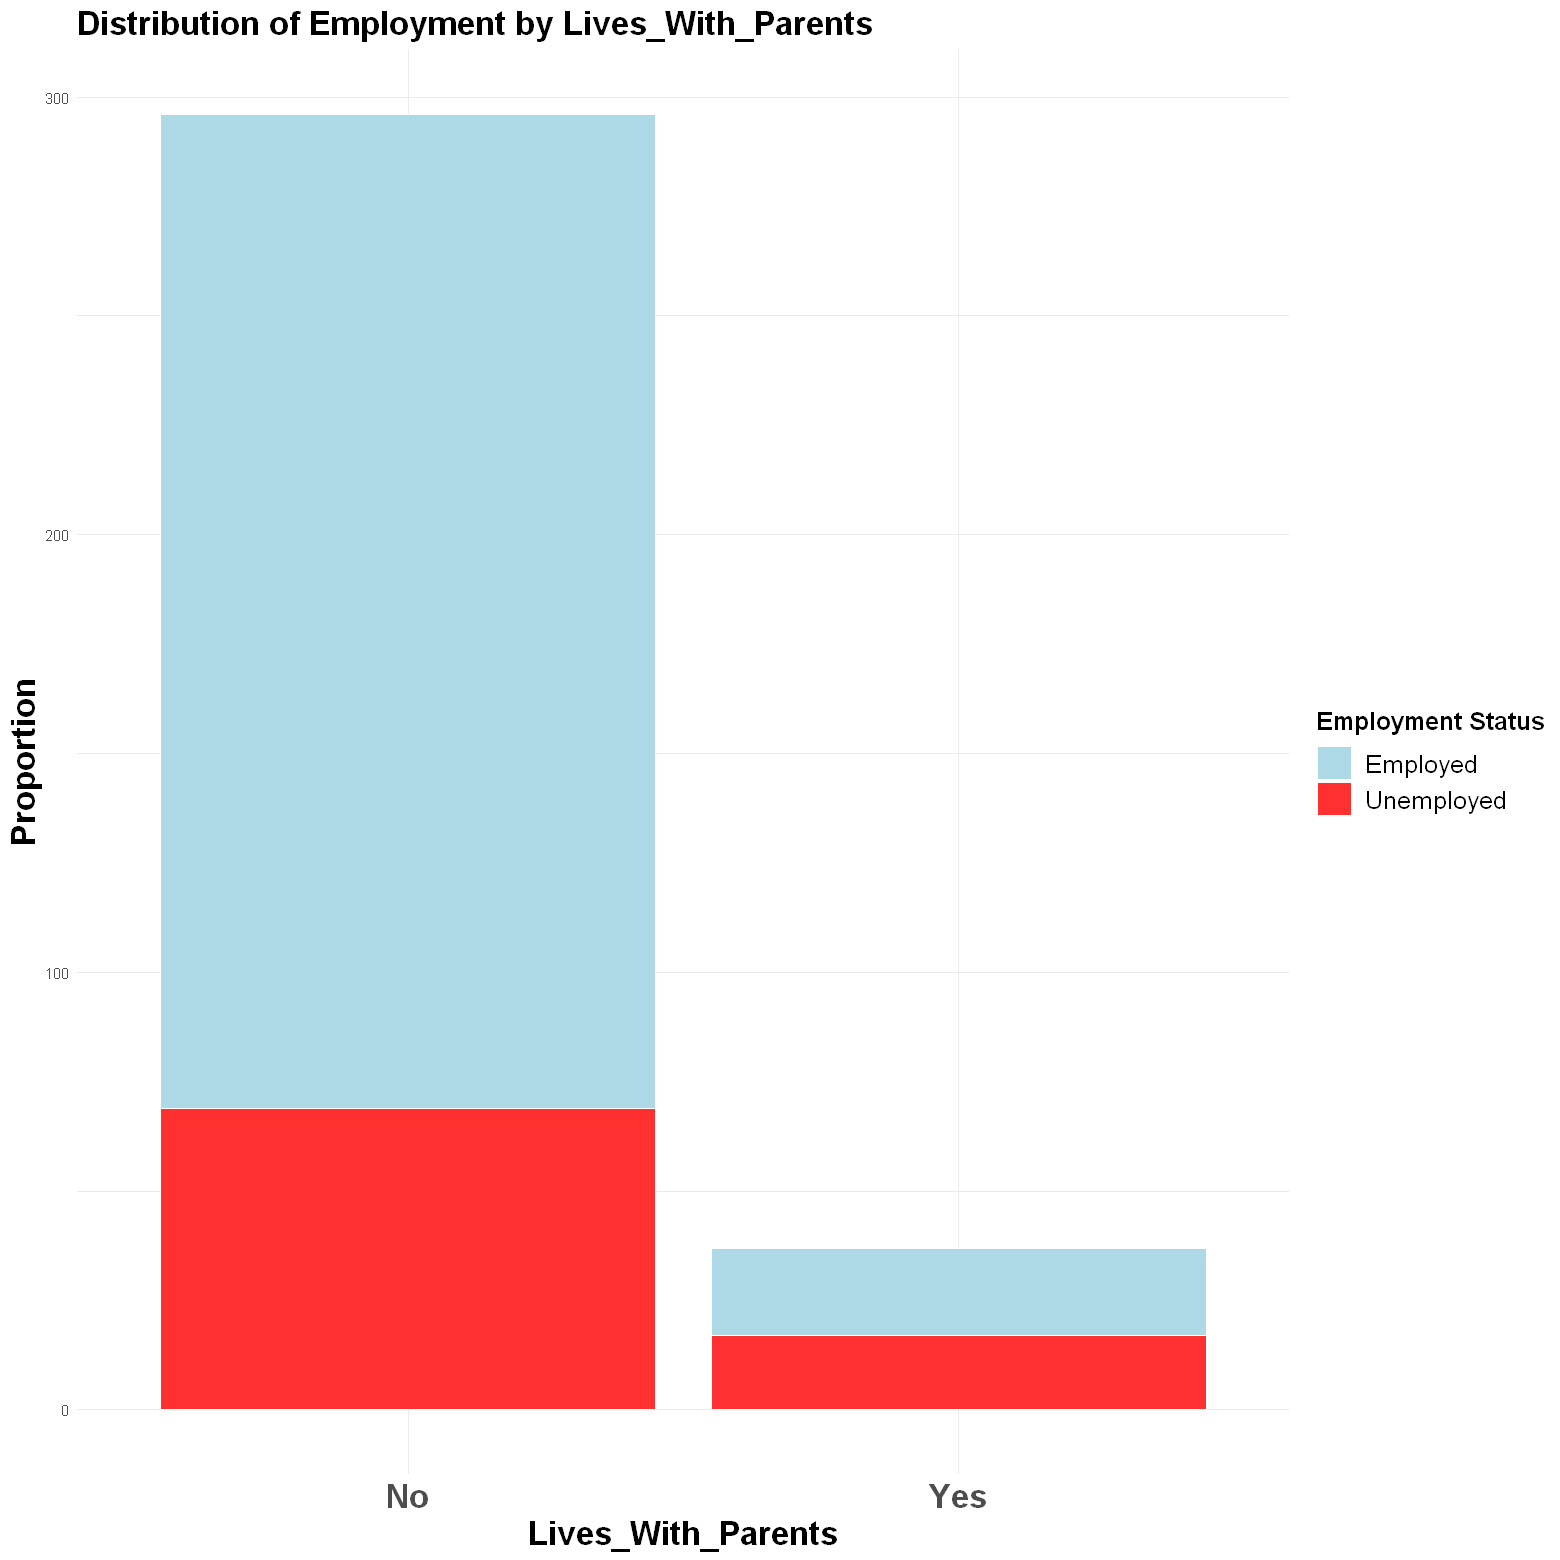

In [41]:
options(repr.plot.width = 13, repr.plot.height = 13)

for (feature in conditions){
    print(
        ggplot(df, aes_string(x = feature, fill = "Unemployed")) +
        geom_bar(binwidth = 10, col = "white") +
        labs(title = paste("Distribution of Employment by", feature),
             x = feature,
             y = "Proportion",
             fill = "Employment Status") +
        scale_fill_manual(values = c("0" = "lightblue", "1" = "firebrick1"),
                          labels = c("Employed", "Unemployed")) +
        theme_minimal() +
        theme(
            plot.title = element_text(size = 20, face = "bold"),
            axis.title = element_text(size = 20, face = "bold"),
            axis.text.x = element_text(size = 20, face = "bold"),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 15, face = "bold"),  
            legend.key.size = unit(1.5, "lines")
        )
    )
}

In [42]:
df$Anxiety <- factor(df$Anxiety, levels = c(0, 1), labels = c("No", "Yes"))
df$Depression <- factor(df$Depression, levels = c(0, 1), labels = c("No", "Yes"))
df$Mental_Illness <- factor(df$Mental_Illness, levels = c(0, 1), labels = c("No", "Yes"))
df$Panic_attacks <- factor(df$Panic_attacks, levels = c(0, 1), labels = c("No", "Yes"))
df$Resume_Gap <- factor(df$Resume_Gap, levels = c(0, 1), labels = c("No", "Yes"))

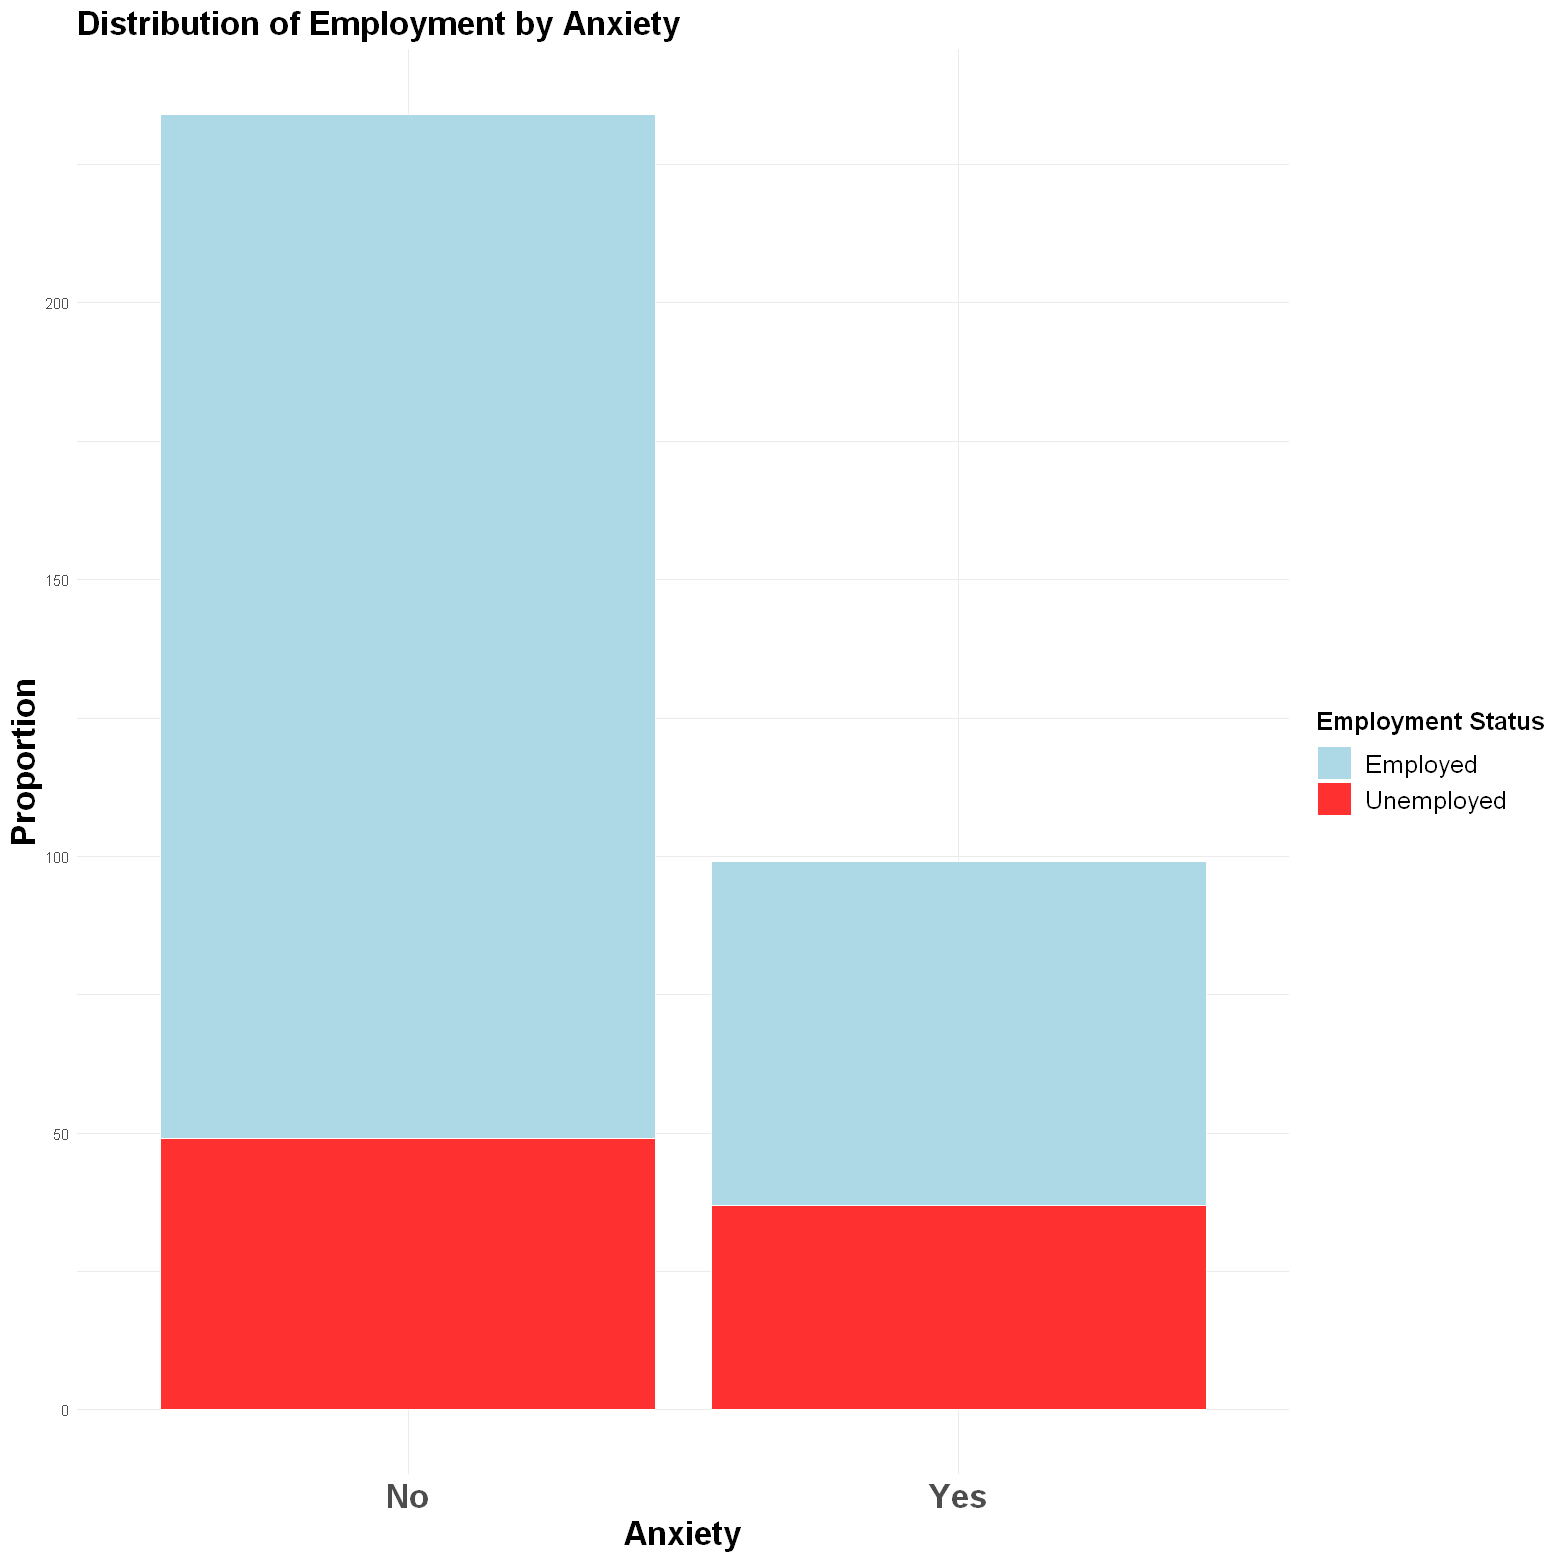

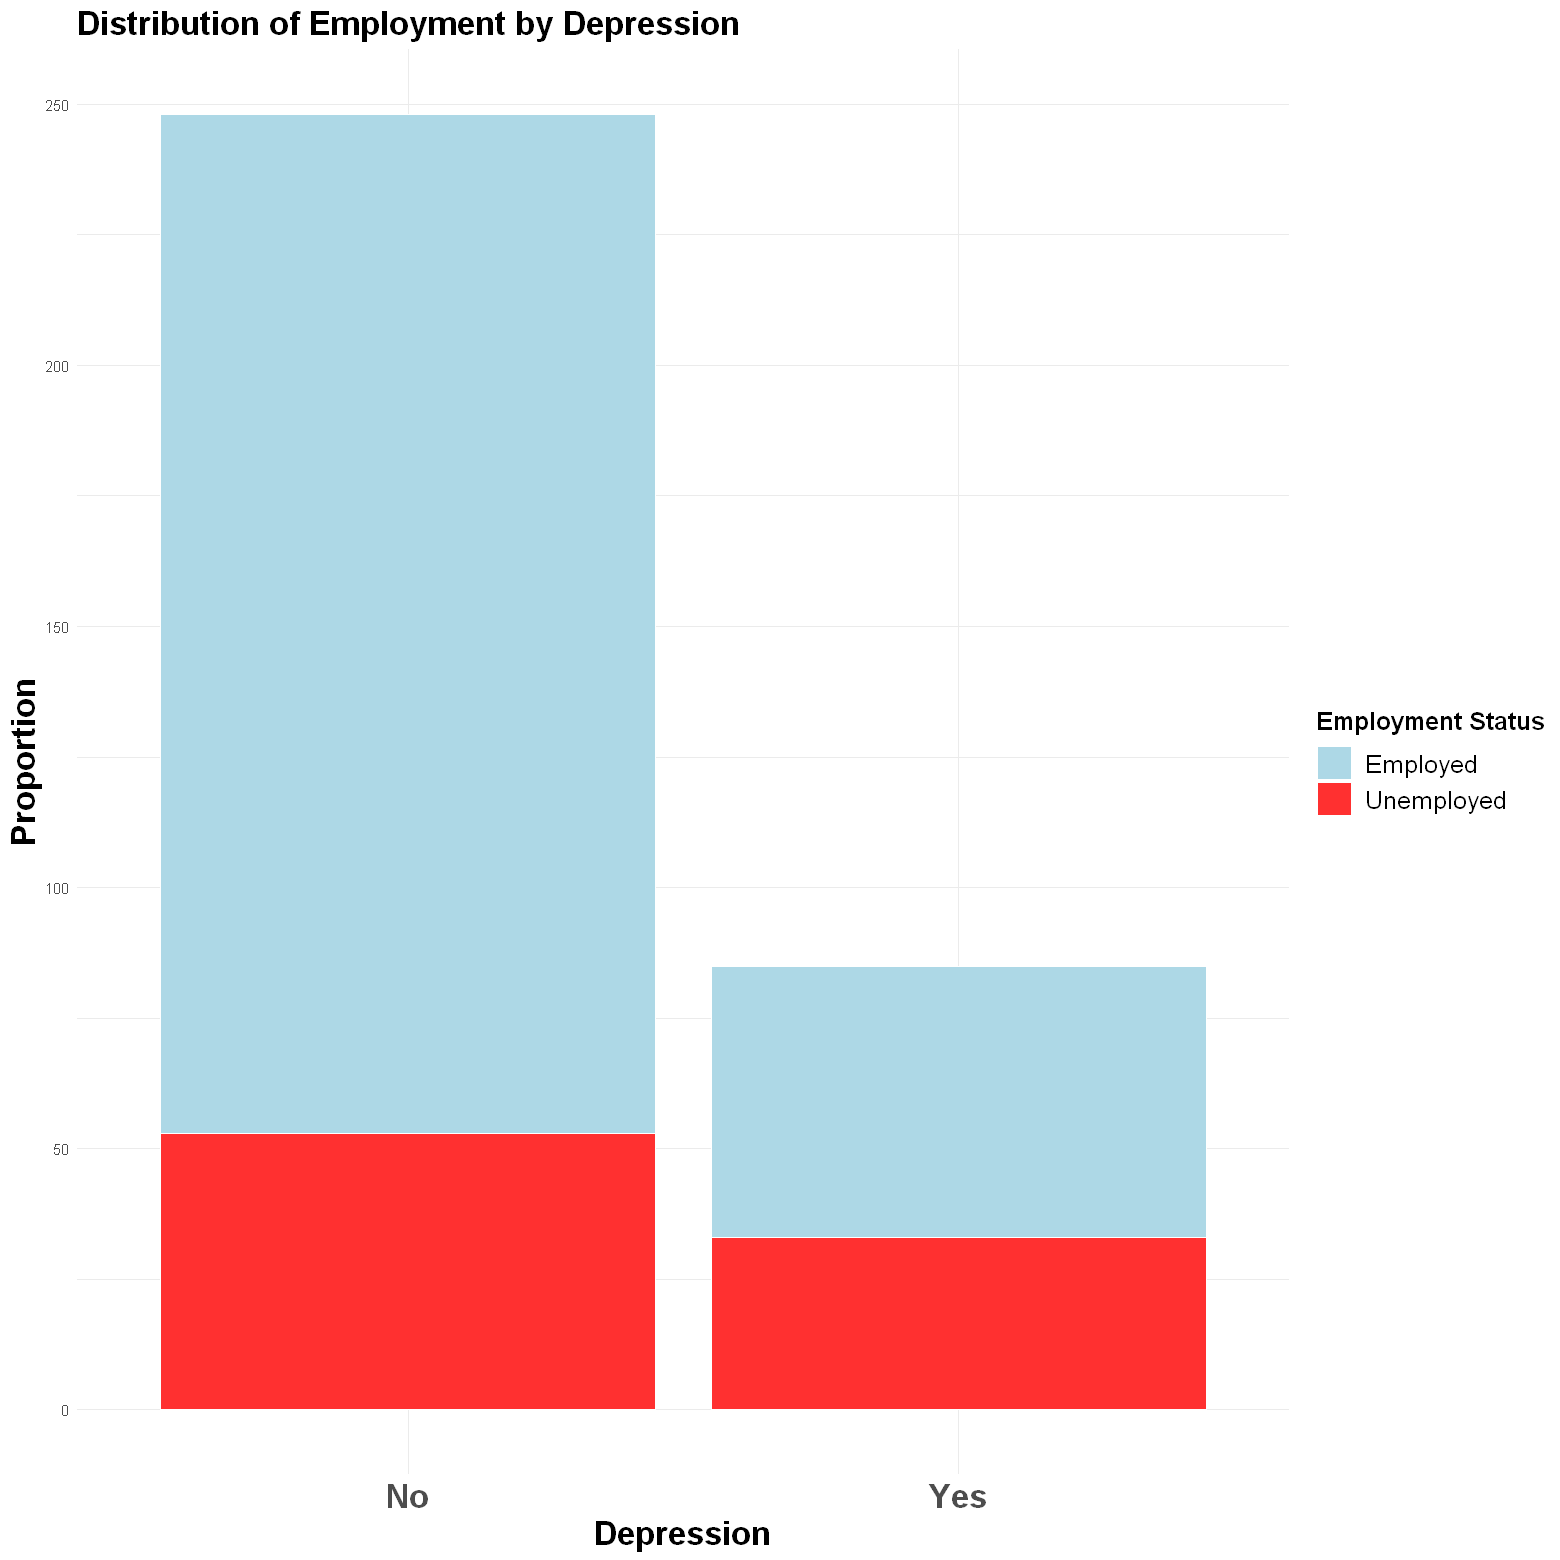

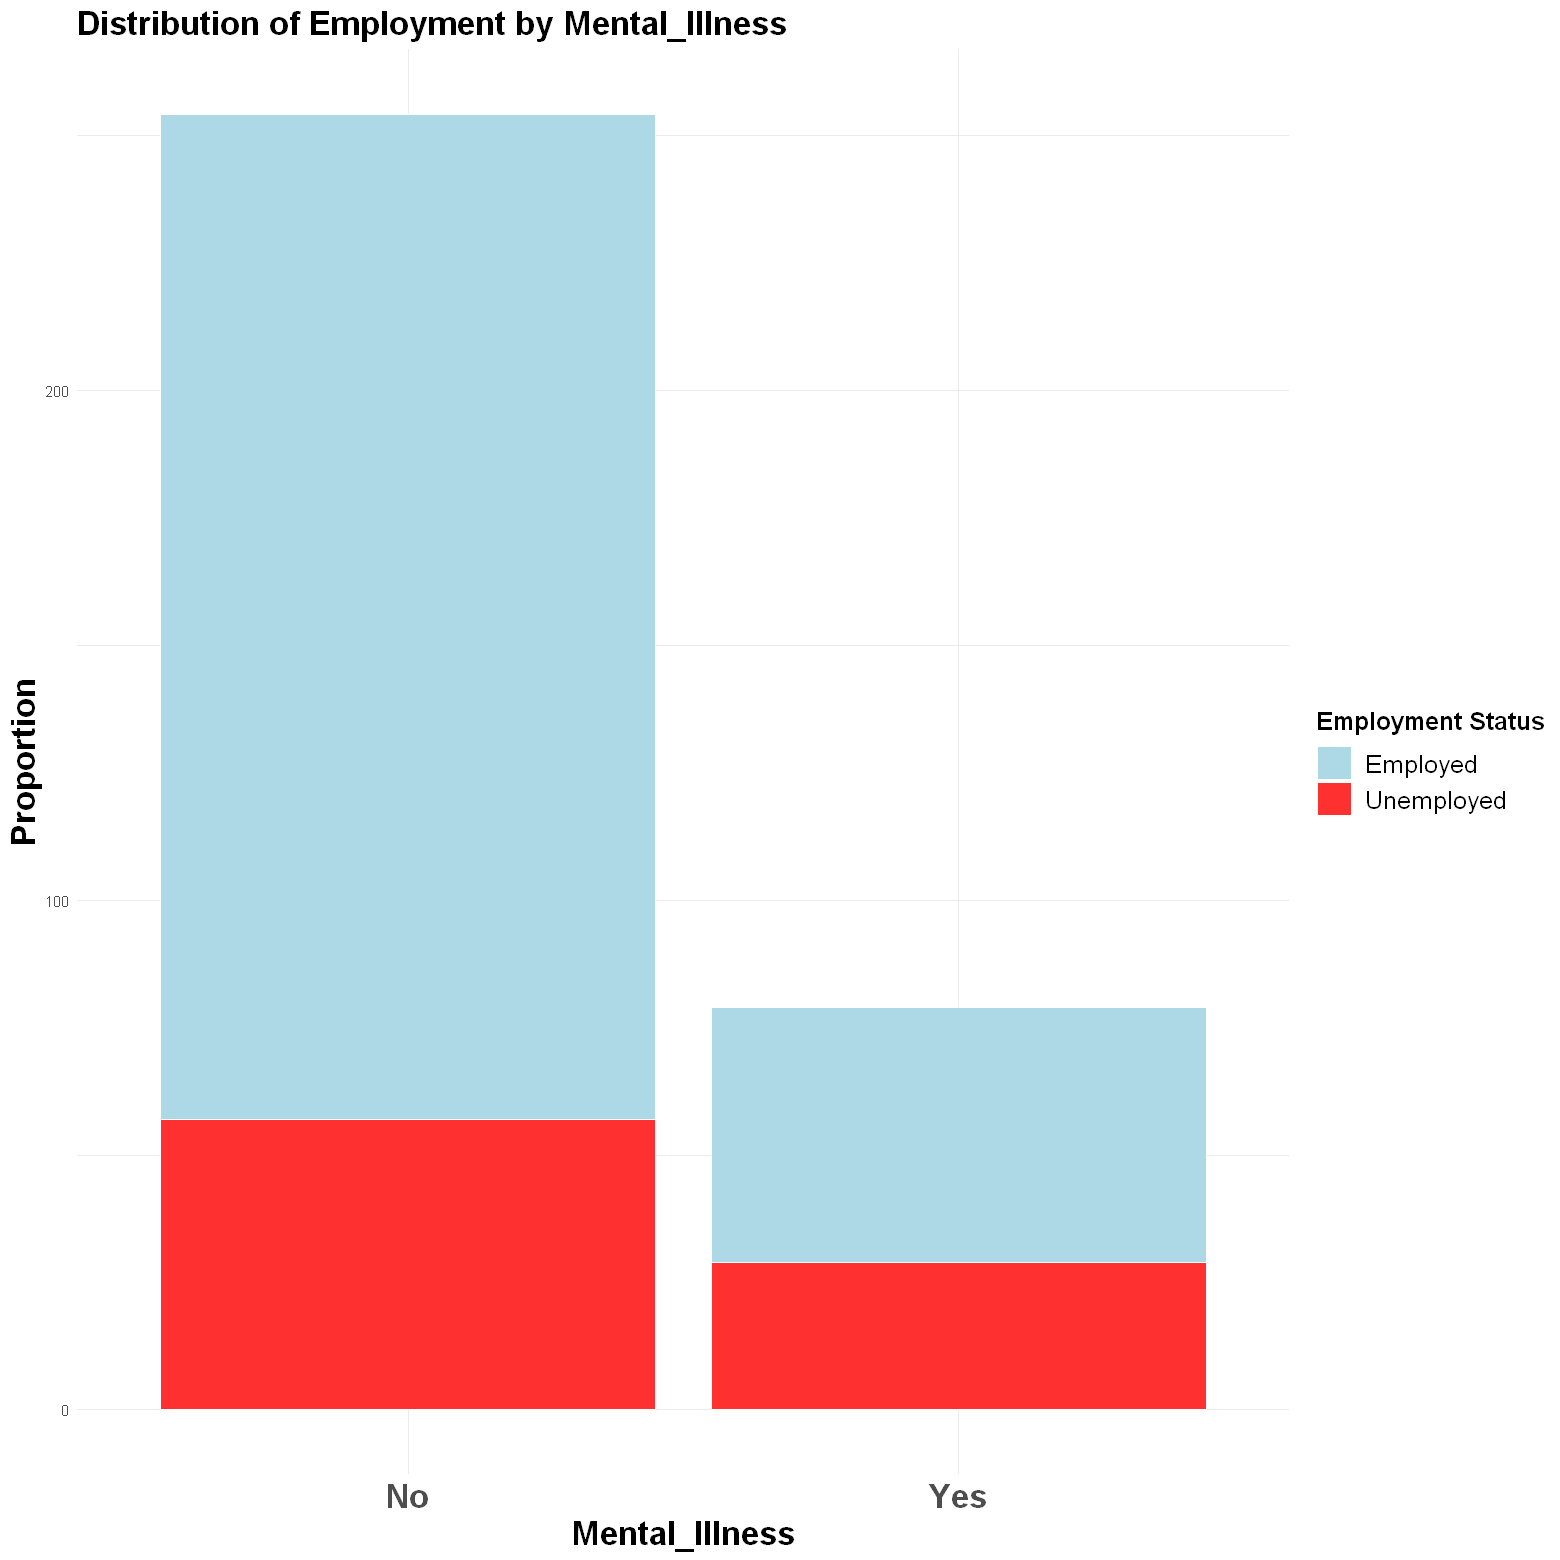

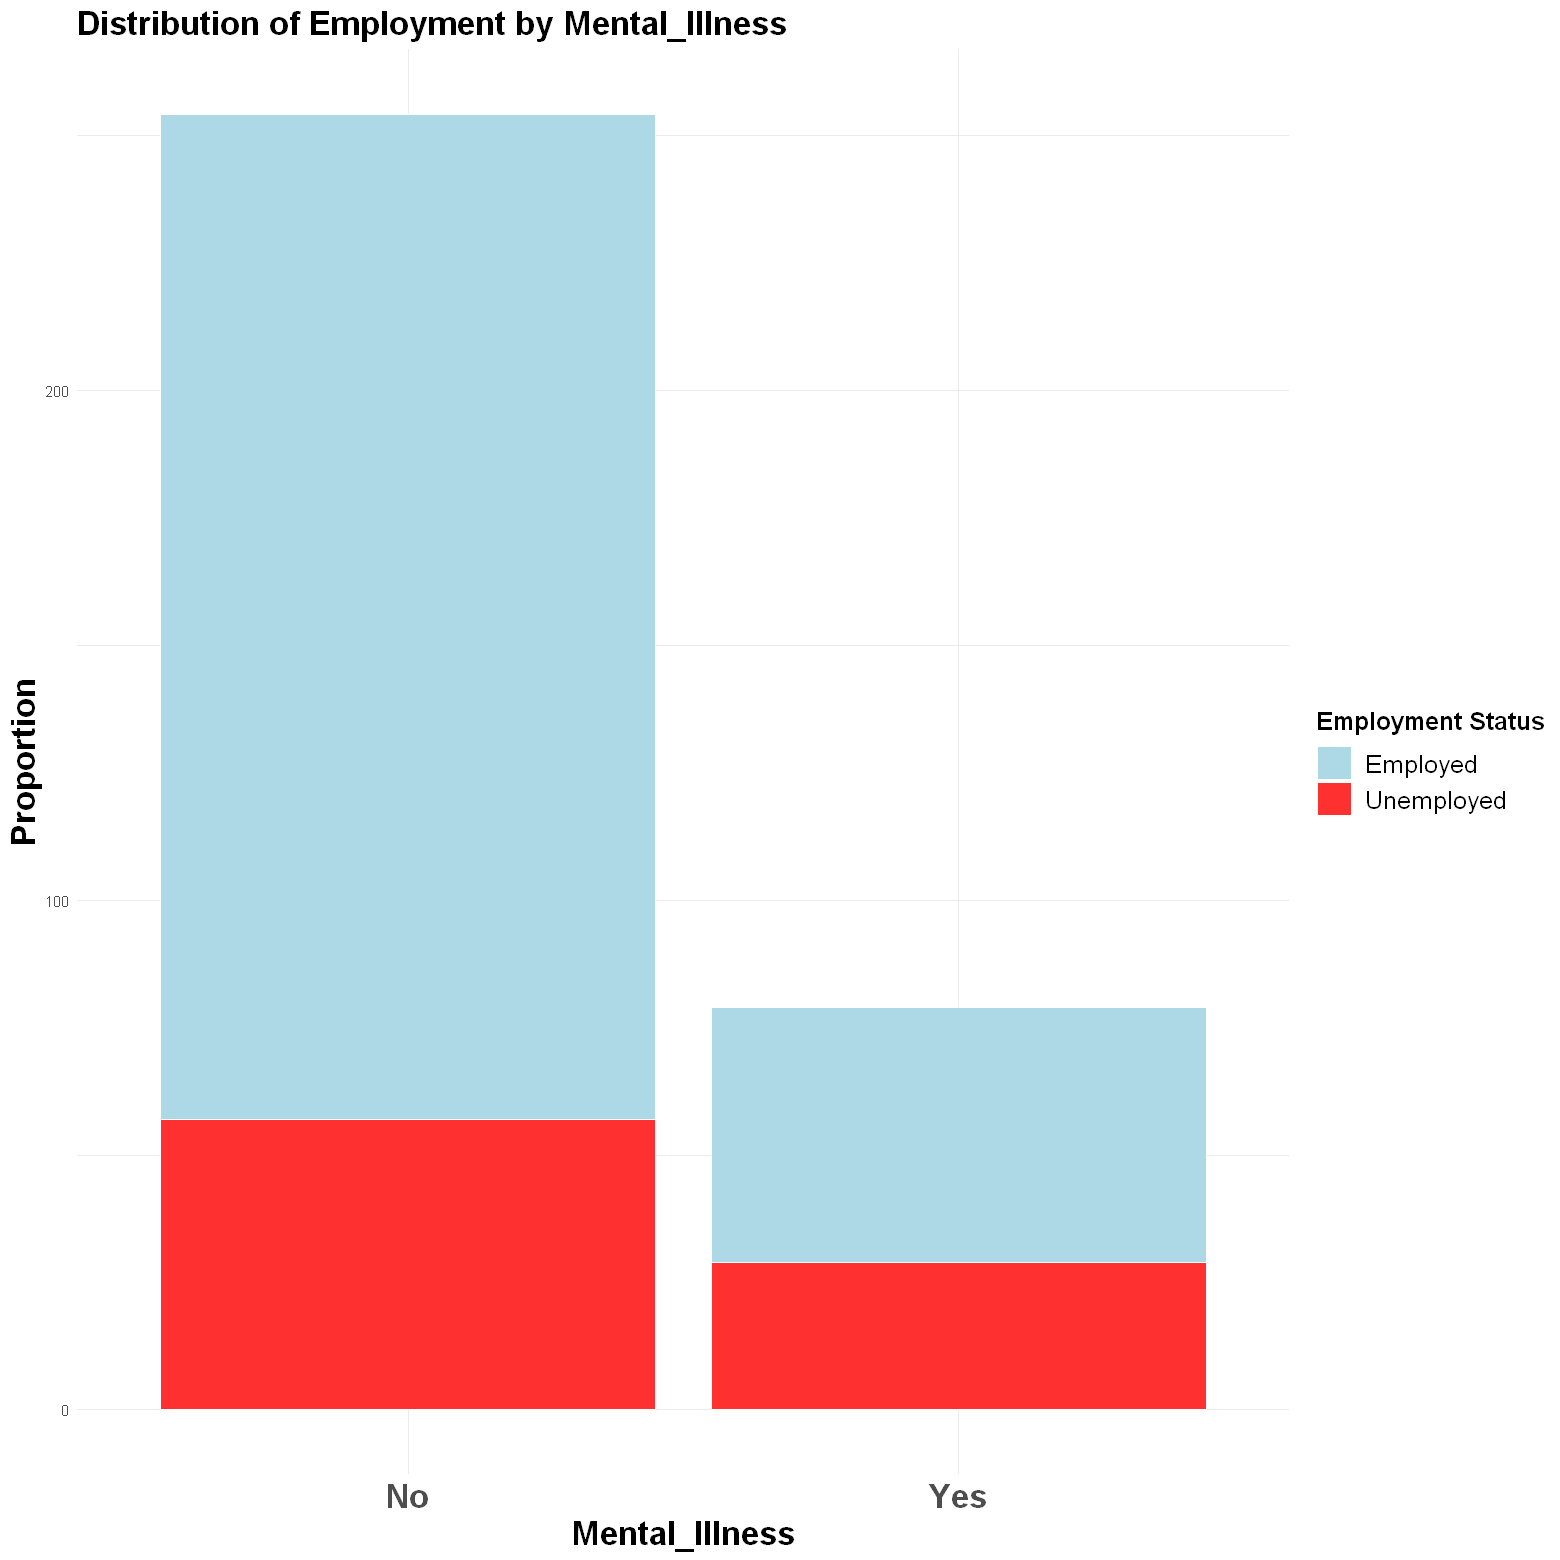

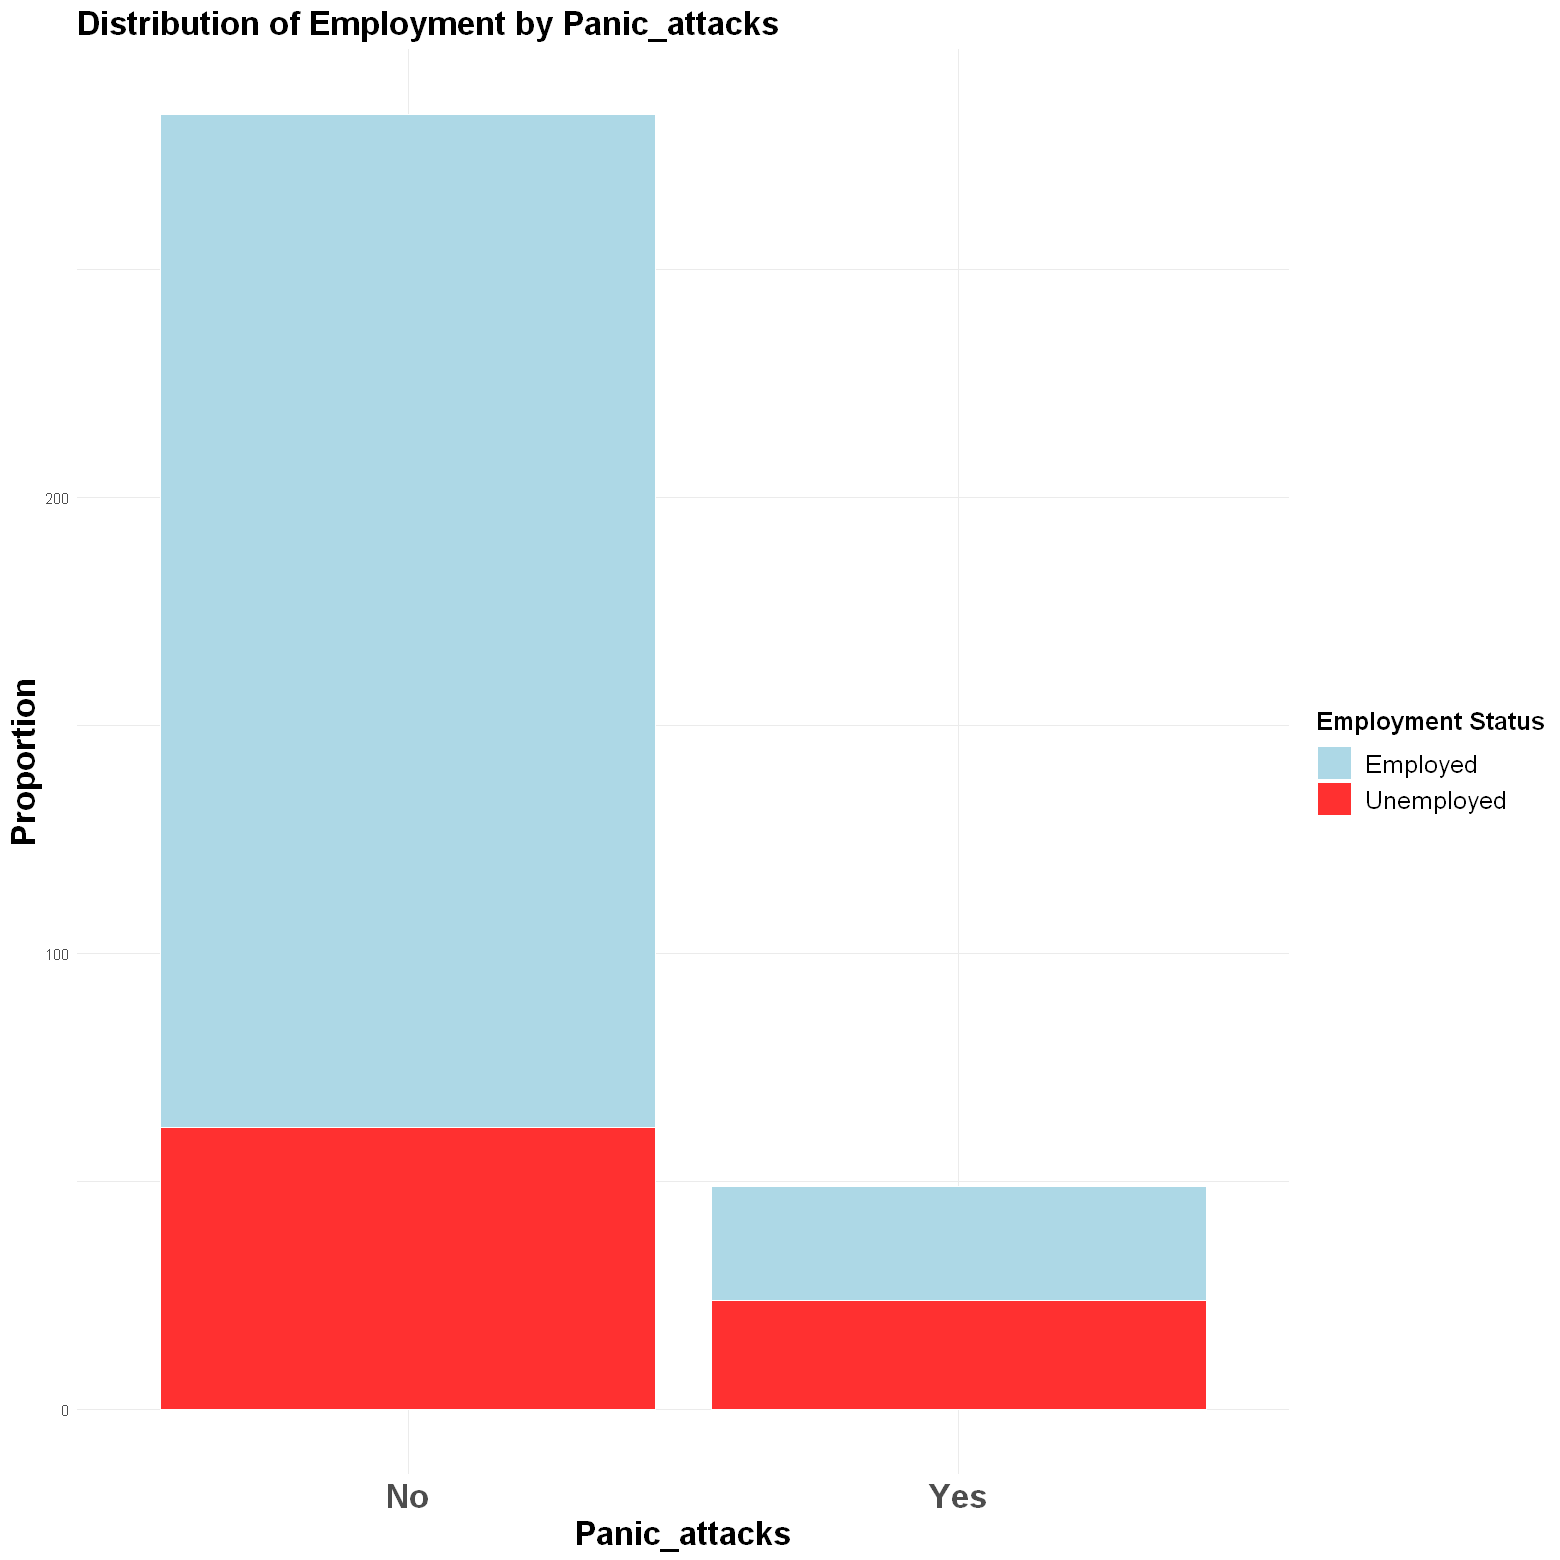

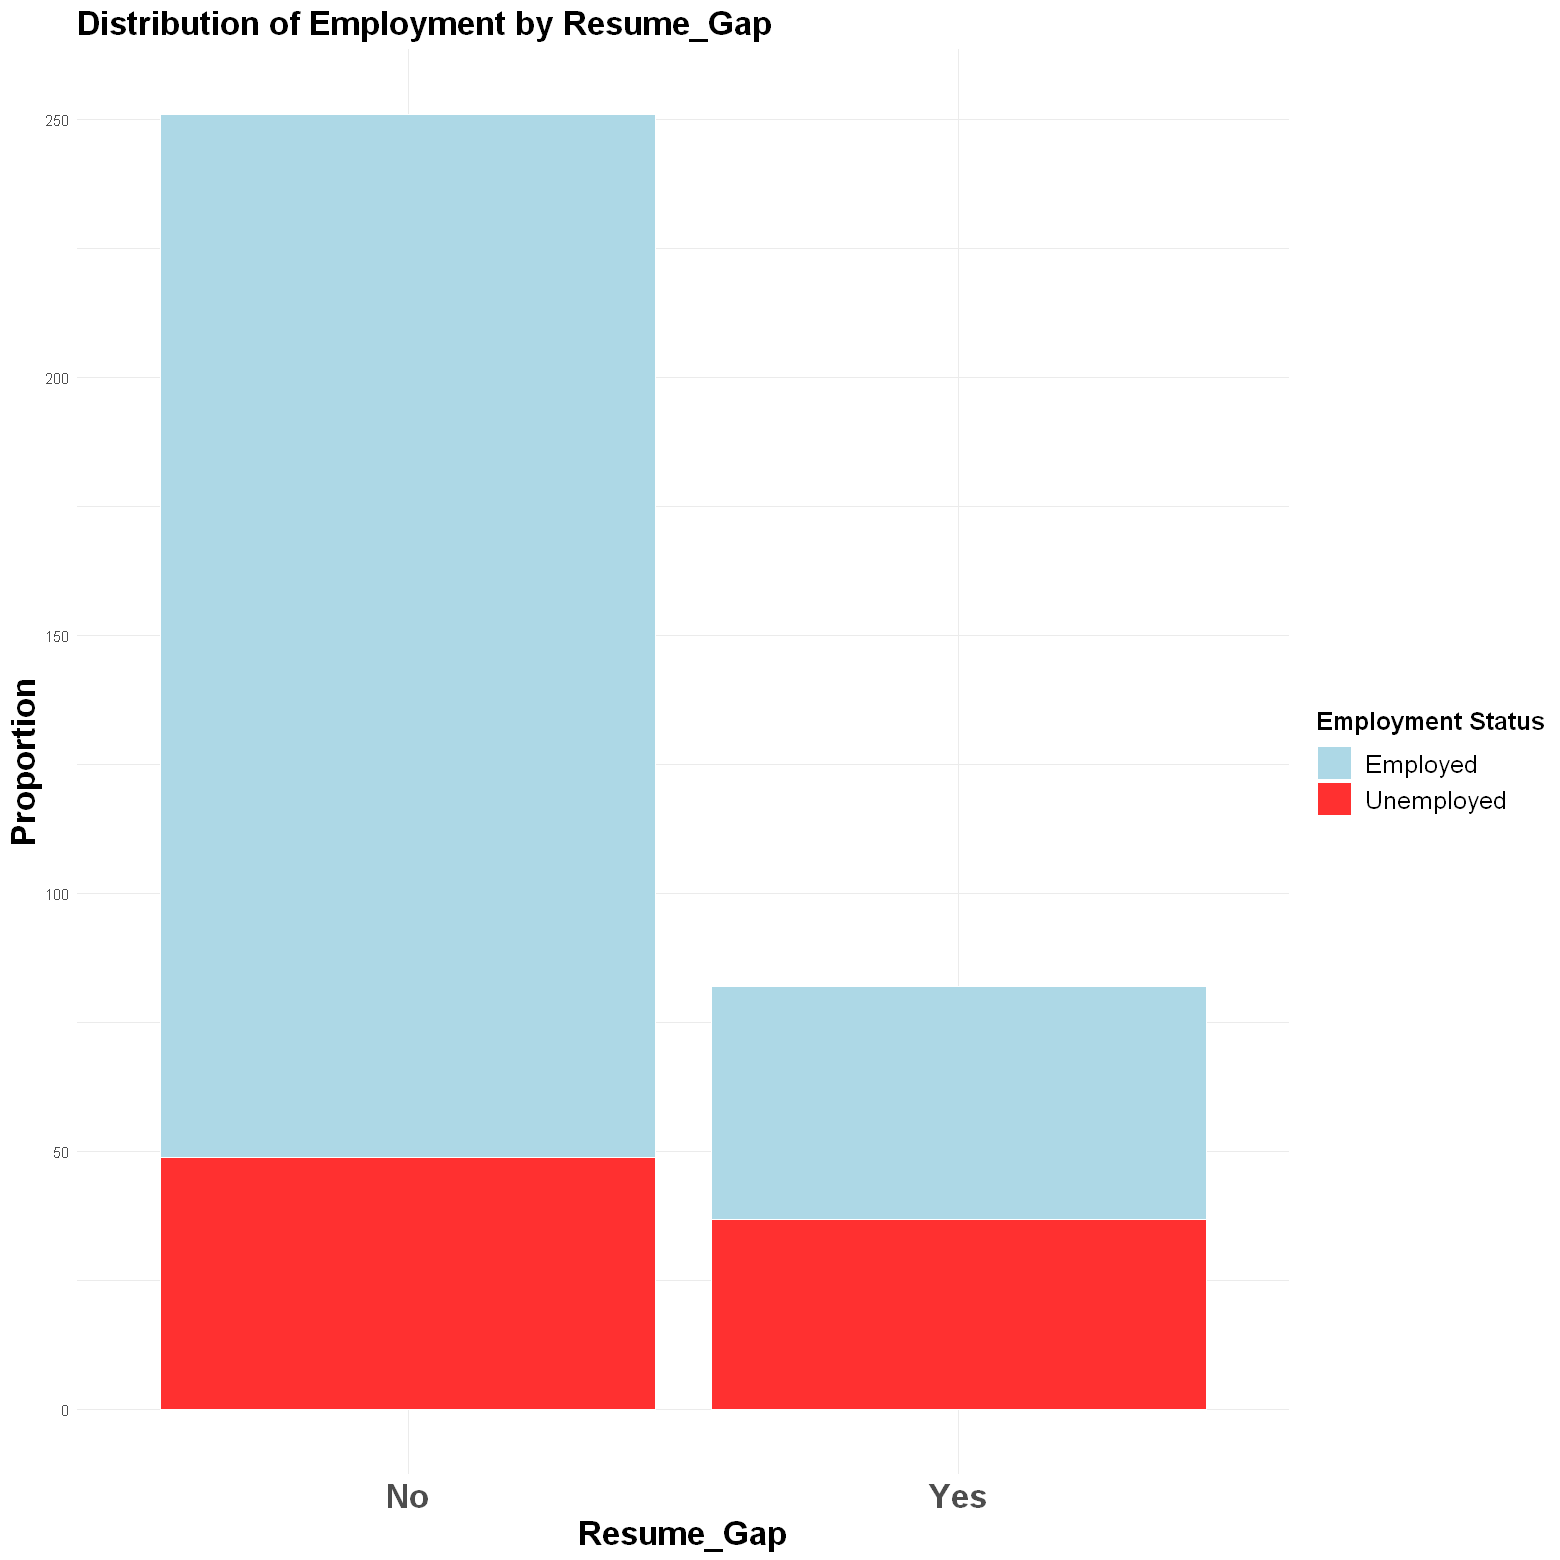

In [43]:
conditions <- c("Anxiety", "Depression", "Mental_Illness", "Mental_Illness", "Panic_attacks", "Resume_Gap")

# Convert Mental_Illness to a factor
df$Unemployed <- factor(df$Unemployed, levels = c(0, 1))

options(repr.plot.width = 13, repr.plot.height = 13)

for (feature in conditions){
    print(
        ggplot(df, aes_string(x = feature, fill = "Unemployed")) +
        geom_bar(binwidth = 10, col = "white") +
        labs(title = paste("Distribution of Employment by", feature),
             x = feature,
             y = "Proportion",
             fill = "Employment Status") +
        scale_fill_manual(values = c("0" = "lightblue", "1" = "firebrick1"),
                          labels = c("Employed", "Unemployed")) +
        theme_minimal() +
        theme(
            plot.title = element_text(size = 20, face = "bold"),
            axis.title = element_text(size = 20, face = "bold"),
            axis.text.x = element_text(size = 20, face = "bold"),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 15, face = "bold"),  
            legend.key.size = unit(1.5, "lines")
        )
    )
}


## Final Takeaways & Interpretations:


•	Correlation Between Mental Health and Unemployment: 

The analysis reveals a strong correlation between mental health conditions like anxiety, depression, and panic attacks, and unemployment rates. This suggests that mental health challenges significantly impact an individual’s ability to obtain and maintain employment.

•	Socioeconomic Status and Mental Health:

There is a clear link between lower socioeconomic status, as indicated by reliance on financial assistance programs like food stamps and Section 8 housing, and higher incidences of mental health issues. This highlights the cyclical nature of poverty and mental health challenges.

•	Impact of Education on Employment and Mental Health:

Higher levels of education correlate with lower unemployment rates and fewer mental health issues. This underscores the importance of educational attainment in securing stable employment and maintaining good mental health.

•	Regional Variations:

Certain regions, such as the East North Central and West North Central, showed higher unemployment rates. This regional disparity suggests that location-specific factors, possibly including economic opportunities and social support systems, play a significant role in employment status.

•	Income, Education, and Age Connection: 

The analysis confirms a significant association between household income and education levels, as well as household income and age. This implies that as people age and attain higher education, their income potential increases, reducing their risk of unemployment and associated mental health issues.

•	Resume Gaps and Unemployment: 

Having a resume gap and the duration of the gap are strongly associated with higher unemployment rates. This highlights the challenges faced by individuals with gaps in their employment history, potentially due to mental health issues.

•	Interaction of Multiple Factors: 

The combined effect of having a resume gap and experiencing anxiety and depression is a significant predictor of unemployment. This indicates that these factors may interact in ways that intensify the challenges of securing employment.
